In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import time
from sklearn.metrics import confusion_matrix

from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from phik import phik_matrix
from sklearn.inspection import permutation_importance

#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#imbalanced methods
from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import AllKNN

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Importing the Csv's for modeling

In [3]:
X_binary = pd.read_csv('X_binary.csv', index_col='encounter_id')
y_binary = pd.read_csv('y_binary.csv', index_col='encounter_id')
test_binary = pd.read_csv('test_binary.csv')

In [4]:
test_binary_copy = test_binary.copy() 

In [5]:
X_binary.shape

(71236, 38)

# Feature Selection

Previous used columns:
'discharge_disposition_Discharged to home', 'inpatient_visits', 'outpatient_visits', 'emergency_visits', 'number_diagnoses',
'diabetes_meds_binary', 'average_pulse_bpm', 'number_of_medications', 'number_lab_tests', 'Midpoint_Age'

### Univariate Methods

In [6]:
metric_features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
            'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'outpatient_visits','number_encounters_total',
            'emergency_visits', 'inpatient_visits', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']

In [7]:
X_binary[metric_features].var()

average_pulse_bpm             530.865611
length_of_stay                  8.932562
number_lab_tests              385.844265
non_lab_procedures              2.912702
number_of_medications          65.972521
number_diagnoses                3.755102
number_generic_medications      0.845240
outpatient_visits               1.657577
number_encounters_total         3.344978
emergency_visits                0.829654
inpatient_visits                1.605976
Midpoint_Age                  249.683263
Total_visits                    5.268215
Serious_condition_visits        3.063149
dtype: float64

Since the is no variance equal to 0, then there is no numerical variable that is univariate. With that in mind, we don´t need to drop any column. Adding to this, we can say that there are some numerical variables with high variance like Midpoint_Age, number_lab_tests and average_pulse_bpm (we could also say number_of_medications), and some with low variance like emergency_visits and number_prescriptions.

### Correlation indices

In [8]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [9]:
cor_spearman = X_binary[metric_features].corr(method='spearman')
cor_spearman

average_pulse_bpm  length_of_stay  \
average_pulse_bpm                    1.000000        0.003006   
length_of_stay                       0.003006        1.000000   
number_lab_tests                    -0.000470        0.334732   
non_lab_procedures                  -0.001664        0.187432   
number_of_medications                0.003578        0.464411   
number_diagnoses                    -0.000995        0.238345   
number_generic_medications           0.000246        0.087923   
outpatient_visits                    0.004919       -0.011770   
number_encounters_total             -0.001290        0.069399   
emergency_visits                    -0.000605       -0.002405   
inpatient_visits                     0.003648        0.095458   
Midpoint_Age                         0.004508        0.122952   
Total_visits                         0.004480        0.057833   
Serious_condition_visits             0.003557        0.082313   

                            number_lab_tests  non_lab_procedures  \
average_pulse_bpm                  -0.000470           -0.001664   
length_of_stay                      0.334732            0.187432   
number_lab_tests                    1.000000            0.019744   
non_lab_procedures                  0.019744            1.000000   
number_of_medications               0.248156            0.351296   
number_diagnoses                    0.170754            0.067938   
number_generic_medications          0.029600           -0.005732   
outpatient_visits                  -0.024084           -0.022472   
number_encounters_total            -0.010114           -0.076963   
emergency_visits                    0.006062           -0.044001   
inpatient_visits                    0.042622           -0.063171   
Midpoint_Age                        0.029129           -0.061946   
Total_visits                        0.017129           -0.069209   
Serious_condition_visits            0.039038           -0.072427   

                            number_of_medications  number_diagnoses  \
average_pulse_bpm                        0.003578         -0.000995   
length_of_stay                           0.464411          0.238345   
number_lab_tests                         0.248156          0.170754   
non_lab_procedures                       0.351296          0.067938   
number_of_medications                    1.000000          0.295009   
number_diagnoses                         0.295009          1.000000   
number_generic_medications               0.237610          0.011204   
outpatient_visits                        0.073333          0.111084   
number_encounters_total                  0.085056          0.131426   
emergency_visits                         0.044138          0.091856   
inpatient_visits                         0.101668          0.138303   
Midpoint_Age                             0.027903          0.198487   
Total_visits                             0.109820          0.170281   
Serious_condition_visits                 0.098966          0.151112   

                            number_generic_medications  outpatient_visits  \
average_pulse_bpm                             0.000246           0.004919   
length_of_stay                                0.087923          -0.011770   
number_lab_tests                              0.029600          -0.024084   
non_lab_procedures                           -0.005732          -0.022472   
number_of_medications                         0.237610           0.073333   
number_diagnoses                              0.011204           0.111084   
number_generic_medications                    1.000000           0.004139   
outpatient_visits                             0.004139           1.000000   
number_encounters_total                       0.008618           0.132218   
emergency_visits                              0.016973           0.178881   
inpatient_visits                             -0.017076           0.155495   
Midpoint_Age                             

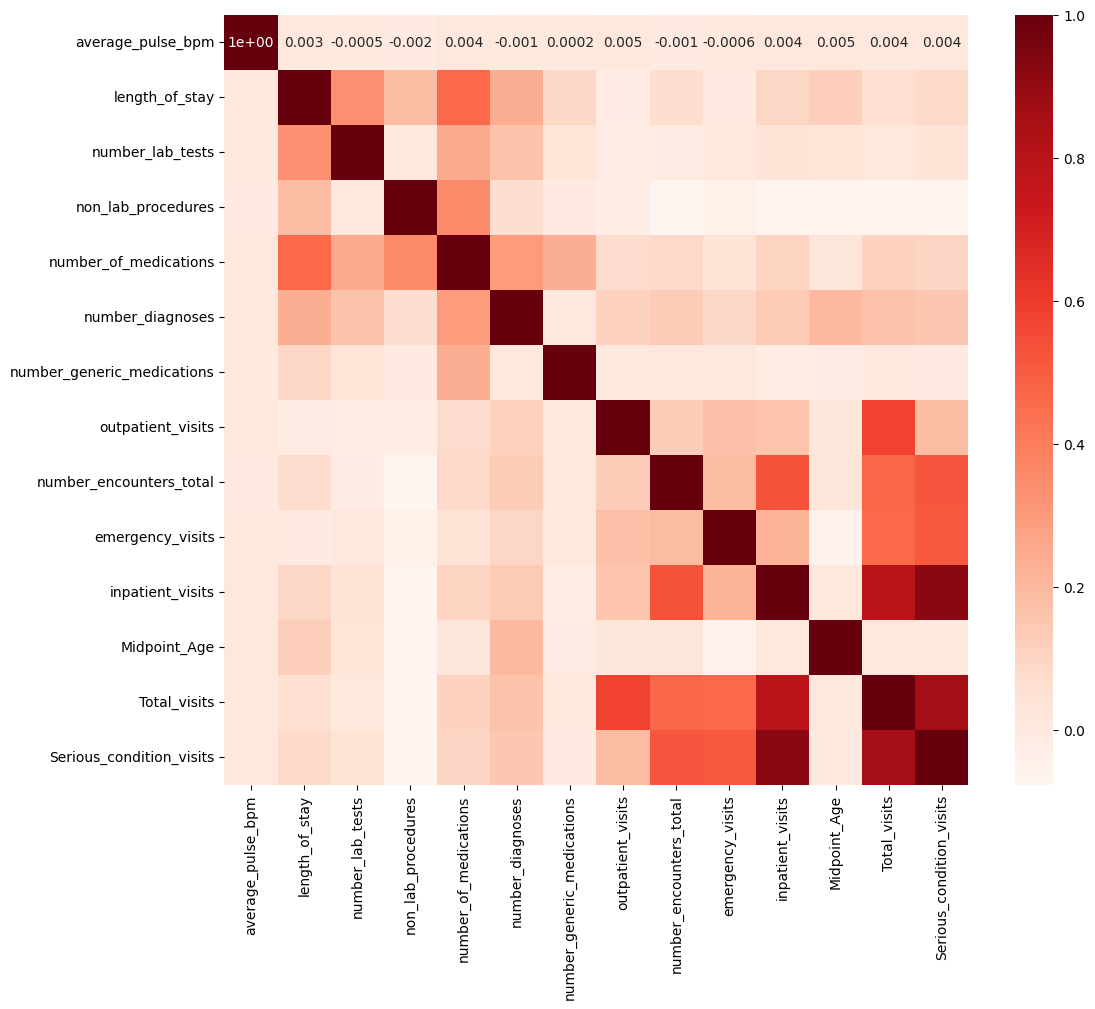

In [10]:
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are three pairs of variables that are highly correlated:
    - inpatient_visits vs Total_visits (0.80) 
    - inpatient_visits vs Serious_condition_visists (0.92)
    - Total_visits vs Serious_condition_visists (0.87)

### Chi-square

Based on Chi-square we should discard these variables from the model:
- Sulfonylureas 
- Thiazolidinediones 
- Alpha_Glucosidase_Inhibitors 
- Combination_Medications
- gender_binary 
- is_normal_pulse 

In [12]:
# We drop here the glucose test because its highly correlated with a1c test and a1c test are better for predicting if a patient
# has diabetes (glucose is instantenous and a1c is about the last 120 days)

In [13]:
# X_train_binary_2.drop(['glucose_test_result_High','glucose_test_result_Norm', 'glucose_test_result_Not_taken'],
#                       axis=1,inplace=True)
# X_val_binary_2.drop(['glucose_test_result_High','glucose_test_result_Norm', 'glucose_test_result_Not_taken'],
#                       axis=1,inplace=True)

### Visualize the weight of the dependent variable in categorical data

Based on the visualizations we have seen on the Cleaning&PreProcessing notebook (we in the future will merge the notebooks, but I think putting every visualization here will fill too much this notebook), these are the conclusions we take:

Columns that are not correlated with the target: 

- medication
- admission_type (maybe Emergency a bit)
- admission_source (maybe Emergency_room a bit)
- is_normal_pulse
- average_pulse_bpm
- gender_binary
- number_lab_tests
- number_prescriptions

Columns that have some correlation with the target: 

- race (other)
- MidPointAge
- discharge_disposition (Expired, Other, Transferred to another medical facility)
- medical_specialty (Cardiology)
- primary_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, Injury and poisoning)
- secondary_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, External causes of injury and supplemental classification)
- additional_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, Diseases of the genitourinary system)
- glucose_test_result (>300)
- a1c_test_result (None)
- diabetes_meds_binary
- change_in_meds_binary
- length_of_stay
- non_lab_procedures
- number_of_medications
- number_diagnoses
- emergency_visits
- inpatient_visits


Maybe yes/Maybe no: 

- payer_code
- outpatient_visits


### Point Biserial Correlation

More than 0.01 Corr: 
- length_of_stay
- number_lab_tests 
- non_lab_procedures 
- number_of_medications 
- number_diagnoses 
- outpatient_visits 
- emergency_visits 
- inpatient_visits
- Midpoint_Age
- Total_visits
- Serious_condition_visits
- number_encounters_total

So by this method, it suggests to not use: 
- average_pulse_bpm
- number_generic_medications

### Recursive Feature Selection

In [16]:
y_binary = y_binary[y_binary.columns[0]].map({'Yes': 1, 'No': 0})
y_binary

encounter_id
533253    0
426224    0
634063    0
890610    0
654194    0
         ..
660160    0
826429    0
332030    1
757560    0
459757    0
Name: readmitted_binary, Length: 71236, dtype: int64

In [68]:
X_binary_metric = X_binary[metric_features]
X_binary_metric.head()

average_pulse_bpm  length_of_stay  number_lab_tests  \
encounter_id                                                        
533253                      127               2                48   
426224                      128              14                71   
634063                       94               6                60   
890610                       81               6                48   
654194                      126               6                47   

              non_lab_procedures  number_of_medications  number_diagnoses  \
encounter_id                                                                
533253                         0                     20                 8   
426224                         0                     25                 9   
634063                         1                     22                 6   
890610                         2                      9                 5   
654194                         1                     15                 9   

              number_generic_medications  outpatient_visits  \
encounter_id                                                  
533253                                 0                  0   
426224                                 1                  0   
634063                                 2                  0   
890610                                 0                  0   
654194                                 0                  1   

              number_encounters_total  emergency_visits  inpatient_visits  \
encounter_id                                                                
533253                              6                 0                 2   
426224                              1                 0                 0   
634063                              1                 0                 1   
890610                              1                 0                 1   
654194                              2                 0                 0   

              Midpoint_Age  Total_visits  Serious_condition_visits  
encounter_id                                                        
533253                75.0             2                         2  
426224                55.0             0                         0  
634063                65.0             1                         1  
890610                65.0             1                         1  
654194                75.0             1                         0

In [69]:
X_binary_metric_sqrt = np.sqrt(X_binary_metric) 
# X_val_new[metric_features_stand] = np.sqrt(X_val_new[metric_features_stand]) 
# data_test[metric_features_stand] = np.sqrt(data_test[metric_features_stand])

In [70]:
min_max_before = MinMaxScaler()
X_binary_before_sqrt = min_max_before.fit_transform(X_binary_metric_sqrt)

In [71]:
# min_max_before = MinMaxScaler()
X_binary_before = min_max_before.fit_transform(X_binary_metric)
# X_val_min_max_before = min_max_before.transform(X_val_binary_2)

In [72]:
stand_before = StandardScaler()
X_binary_before_sqrt_stand = stand_before.fit_transform(X_binary_metric_sqrt)

In [73]:
X_binary_before_stand = stand_before.fit_transform(X_binary_metric)

### Random Forest

In [74]:
X_binary_metric.columns

Index(['average_pulse_bpm', 'length_of_stay', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
       'number_generic_medications', 'outpatient_visits',
       'number_encounters_total', 'emergency_visits', 'inpatient_visits',
       'Midpoint_Age', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

Ranking of the features:  [12  4  9 13  8  6 11 10  1  7  1  5  3  2]
Optimal number of features: 2
Selected features: number_encounters_total, inpatient_visits


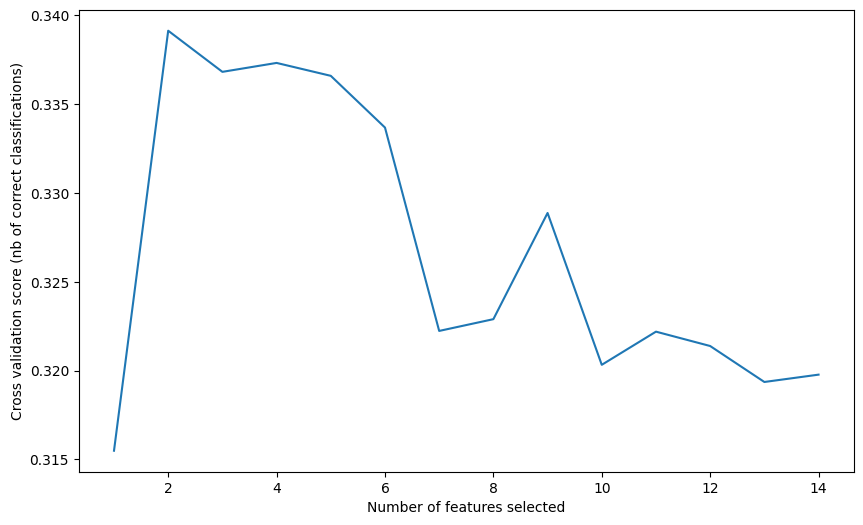

In [75]:
# Model
rf = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,random_state=19,n_jobs=-1)

# Define the method of cross-validation
cv = StratifiedKFold(5)

# Create the RFECV object
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring='f1', n_jobs=-1)

# Fit the RFECV to the training data
rfecv.fit(X_binary_before_sqrt_stand, y_binary)

print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
selected_features = X_binary_metric.columns[rfecv.support_]
print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

### Logistic Regression

Ranking of the features:  [5 1 1 3 1 1 2 1 1 4 1 1 1 1]
Optimal number of features: 10
Selected features: length_of_stay, number_lab_tests, number_of_medications, number_diagnoses, outpatient_visits, number_encounters_total, inpatient_visits, Midpoint_Age, Total_visits, Serious_condition_visits


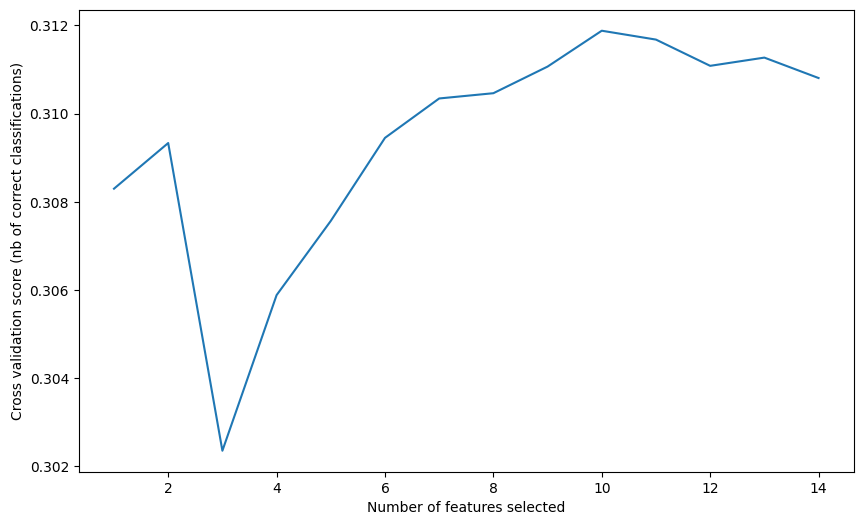

In [76]:
# Model
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
cv = StratifiedKFold(5)

# Create the RFECV object
rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1', n_jobs=-1)

# Fit the RFECV to the training data
rfecv.fit(X_binary_before, y_binary)

print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
selected_features = X_binary_metric.columns[rfecv.support_]
print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

Ranking of the features:  [14  6  8 13 10  5  9  4  1  7 11  2  3 12]
Optimal number of features: 1
Selected features: number_encounters_total


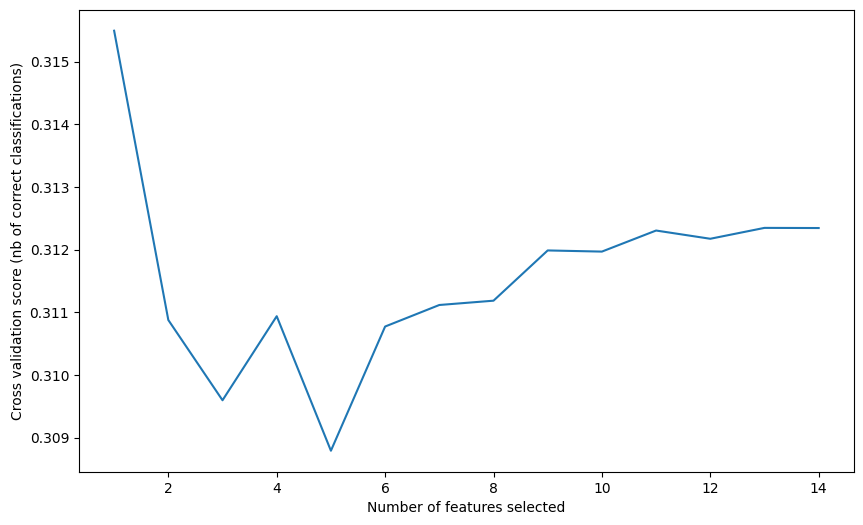

In [77]:
# Model
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
cv = StratifiedKFold(5)

# Create the RFECV object
rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1', n_jobs=-1)

# Fit the RFECV to the training data
rfecv.fit(X_binary_before_sqrt, y_binary)

print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
selected_features = X_binary_metric.columns[rfecv.support_]
print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

Ranking of the features:  [13  3  5  7  6  4 11  8  1 10  2  1 12  9]
Optimal number of features: 2
Selected features: number_encounters_total, Midpoint_Age


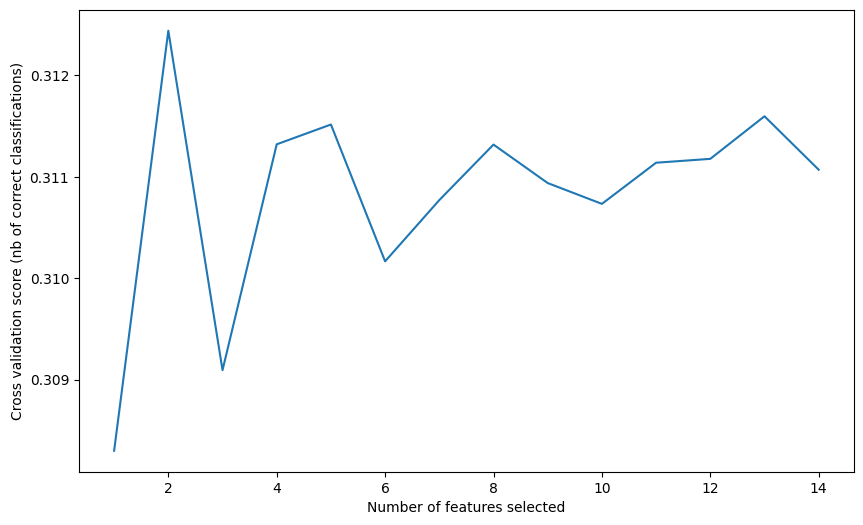

In [78]:
# Model
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
cv = StratifiedKFold(5)

# Create the RFECV object
rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1', n_jobs=-1)

# Fit the RFECV to the training data
rfecv.fit(X_binary_before_stand, y_binary)

print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
selected_features = X_binary_metric.columns[rfecv.support_]
print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

Ranking of the features:  [12  1  5 11  8  4  6  3  1  9 10  1  2  7]
Optimal number of features: 3
Selected features: length_of_stay, number_encounters_total, Midpoint_Age


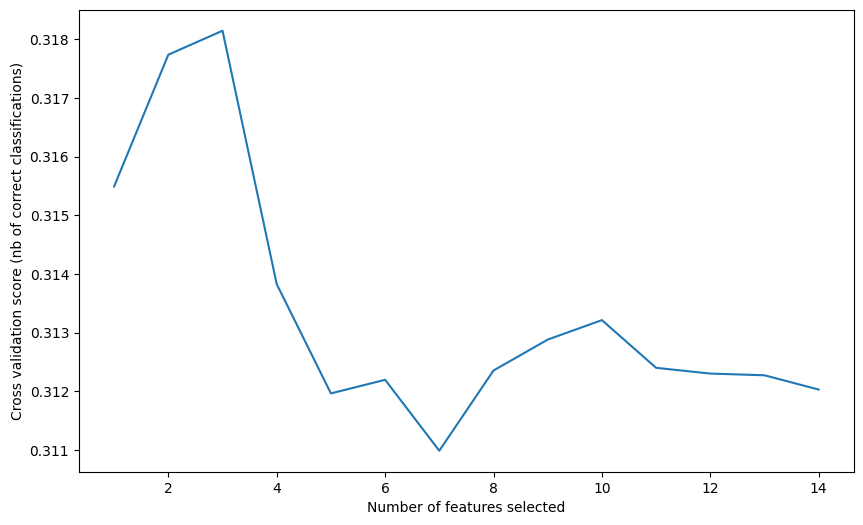

In [79]:
# Model
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
cv = StratifiedKFold(5)

# Create the RFECV object
rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1', n_jobs=-1)

# Fit the RFECV to the training data
rfecv.fit(X_binary_before_sqrt_stand, y_binary)

print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
selected_features = X_binary_metric.columns[rfecv.support_]
print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

### SVC

Ranking of the features:  [ 7  9  6 12  1 10 11  8  4  2  1  5  3  1]
Optimal number of features: 3
Selected features: number_encounters, inpatient_visits, Serious_condition_visits


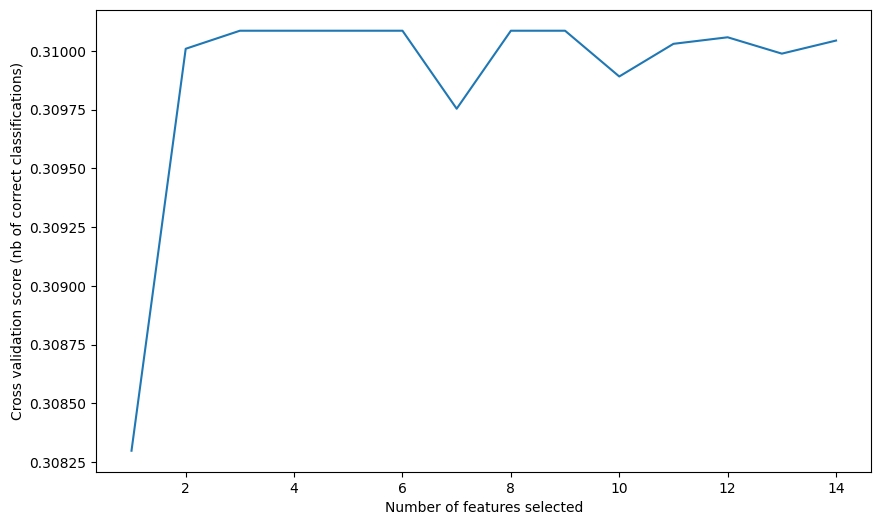

In [29]:
# Model
svc = SVC(C=0.5,gamma='auto',kernel='linear',class_weight = 'balanced',random_state=19)

# Define the method of cross-validation
cv = StratifiedKFold(5)

# Create the RFECV object
rfecv = RFECV(estimator=svc, step=1, cv=cv, scoring='f1', n_jobs=-1)

# Fit the RFECV to the training data
rfecv.fit(X_binary_before_sqrt_stand, y_binary)

print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
selected_features = X_binary_metric.columns[rfecv.support_]
print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

### Sequential Feature Selection

#### With Logistic Regression

In [114]:
# Sequential Feature Selection
sfs = SequentialFeatureSelector(lr, k_features='best', scoring='f1', n_jobs=-1)
sfs.fit(X_binary_before_sqrt_stand, y_binary)
features = list(sfs.k_feature_names_)
print(sfs.k_score_)
print('Number of Selected features:', str(len(features)))

0.3201152475639123
Number of Selected features: 5


In [117]:
features_indexes = [int(i) for i in features]  
features_names = X_binary_metric.columns[features_indexes]
filtered_train = X_binary_metric[features_names]
filtered_train.columns

Index(['number_lab_tests', 'non_lab_procedures', 'number_generic_medications',
       'number_encounters_total', 'Midpoint_Age'],
      dtype='object')

#### With Random Forest

In [118]:
sfs = SequentialFeatureSelector(rf, k_features='best', scoring='f1', n_jobs=-1)
sfs.fit(X_binary_before_sqrt_stand, y_binary)
features = list(sfs.k_feature_names_)
print(sfs.k_score_)
print('Number of Selected features:', str(len(features)))

0.3391306684632419
Number of Selected features: 2


In [120]:
features_indexes = [int(i) for i in features]  
features_names = X_binary_metric.columns[features_indexes]
filtered_train = X_binary_metric[features_names]
filtered_train.columns

Index(['number_encounters_total', 'inpatient_visits'], dtype='object')

### Feature Importance with Random Forest Classifier

In [80]:
X_binary.shape

(71236, 38)

In [81]:
X_binary_non_metric = X_binary.drop(metric_features, axis=1)

In [82]:
X_binary_non_metric.shape

(71236, 24)

In [83]:
X_binary_non_metric.head()

race  payer_code  admission_type  medical_specialty  \
encounter_id                                                         
533253        51779       28201           50779               5217   
426224        12977       28201           50779              34922   
634063        51779       28201            7246               5217   
890610        12977       22683           50779              12561   
654194        51779        4319           13211              34922   

              discharge_disposition  admission_source  \
encounter_id                                            
533253                        51342             40319   
426224                        12978             21586   
634063                        51342              4913   
890610                        51342              4418   
654194                        51342             21586   

              primary_diagnosis_types  secondary_diagnosis_types  \
encounter_id                                                       
533253                          10137                       5746   
426224                           1968                      22345   
634063                           6667                       1358   
890610                           6667                       2897   
654194                           3443                       5866   

              additional_diagnosis_types  glucose_test_result  \
encounter_id                                                    
533253                              5130                67548   
426224                              1297                67548   
634063                             11927                67548   
890610                             21234                67548   
654194                             21234                67548   

              a1c_test_result  race_caucasian  insulin  metformin  \
encounter_id                                                        
533253                  59320               1        0          0   
426224                  59320               0        1          0   
634063                  59320               1        1          0   
890610                  59320               0        0          0   
654194                  59320               1        0          0   

              Sulfonylureas  Meglitinides  Thiazolidinediones  \
encounter_id                                                    
533253                    0             0                   0   
426224                    0             0                   0   
634063                    0             0                   0   
890610                    0             0                   0   
654194                    0             0                   0   

              Alpha_Glucosidase_Inhibitors  Combination_Medications  \
encounter_id                                                          
533253                                   0                        0   
426224                                   0                        0   
634063                                   0                        0   
890610                                   0                        0   
654194                                   0                        0   

              gender_binary  presc_diabetes_meds_binary  \
encounter_id                                              
533253                    0                           0   
426224                    1                           1   
634063                    0                           1   
890610                    1                           0   
654194                    0                           0   

              change_in_meds_binary  Has_Insurance  is_normal_pulse  
encounter_id                                                         
533253                            0              0                0  
426224                            0              0                0  
634063                            1              0         

In [84]:
X_binary_metric_sqrt_2 = np.sqrt(X_binary_metric) 

In [85]:
X_binary_metric_sqrt_2.shape

(71236, 14)

In [86]:
X_binary_metric_sqrt_2.head()

average_pulse_bpm  length_of_stay  number_lab_tests  \
encounter_id                                                        
533253                11.269428        1.414214          6.928203   
426224                11.313708        3.741657          8.426150   
634063                 9.695360        2.449490          7.745967   
890610                 9.000000        2.449490          6.928203   
654194                11.224972        2.449490          6.855655   

              non_lab_procedures  number_of_medications  number_diagnoses  \
encounter_id                                                                
533253                  0.000000               4.472136          2.828427   
426224                  0.000000               5.000000          3.000000   
634063                  1.000000               4.690416          2.449490   
890610                  1.414214               3.000000          2.236068   
654194                  1.000000               3.872983          3.000000   

              number_generic_medications  outpatient_visits  \
encounter_id                                                  
533253                          0.000000                0.0   
426224                          1.000000                0.0   
634063                          1.414214                0.0   
890610                          0.000000                0.0   
654194                          0.000000                1.0   

              number_encounters_total  emergency_visits  inpatient_visits  \
encounter_id                                                                
533253                       2.449490               0.0          1.414214   
426224                       1.000000               0.0          0.000000   
634063                       1.000000               0.0          1.000000   
890610                       1.000000               0.0          1.000000   
654194                       1.414214               0.0          0.000000   

              Midpoint_Age  Total_visits  Serious_condition_visits  
encounter_id                                                        
533253            8.660254      1.414214                  1.414214  
426224            7.416198      0.000000                  0.000000  
634063            8.062258      1.000000                  1.000000  
890610            8.062258      1.000000                  1.000000  
654194            8.660254      1.000000                  0.000000

In [87]:
X_combined = pd.concat([X_binary_non_metric, X_binary_metric_sqrt_2], axis=1)
X_combined.head()

race  payer_code  admission_type  medical_specialty  \
encounter_id                                                         
533253        51779       28201           50779               5217   
426224        12977       28201           50779              34922   
634063        51779       28201            7246               5217   
890610        12977       22683           50779              12561   
654194        51779        4319           13211              34922   

              discharge_disposition  admission_source  \
encounter_id                                            
533253                        51342             40319   
426224                        12978             21586   
634063                        51342              4913   
890610                        51342              4418   
654194                        51342             21586   

              primary_diagnosis_types  secondary_diagnosis_types  \
encounter_id                                                       
533253                          10137                       5746   
426224                           1968                      22345   
634063                           6667                       1358   
890610                           6667                       2897   
654194                           3443                       5866   

              additional_diagnosis_types  glucose_test_result  \
encounter_id                                                    
533253                              5130                67548   
426224                              1297                67548   
634063                             11927                67548   
890610                             21234                67548   
654194                             21234                67548   

              a1c_test_result  race_caucasian  insulin  metformin  \
encounter_id                                                        
533253                  59320               1        0          0   
426224                  59320               0        1          0   
634063                  59320               1        1          0   
890610                  59320               0        0          0   
654194                  59320               1        0          0   

              Sulfonylureas  Meglitinides  Thiazolidinediones  \
encounter_id                                                    
533253                    0             0                   0   
426224                    0             0                   0   
634063                    0             0                   0   
890610                    0             0                   0   
654194                    0             0                   0   

              Alpha_Glucosidase_Inhibitors  Combination_Medications  \
encounter_id                                                          
533253                                   0                        0   
426224                                   0                        0   
634063                                   0                        0   
890610                                   0                        0   
654194                                   0                        0   

              gender_binary  presc_diabetes_meds_binary  \
encounter_id                                              
533253                    0                           0   
426224                    1                           1   
634063                    0                           1   
890610                    1                           0   
654194                    0                           0   

              change_in_meds_binary  Has_Insurance  is_normal_pulse  \
encounter_id                                                          
533253                            0              0                0   
426224                            0              0                0   
634063                            1              0     

In [88]:
X_binary_before_sqrt_stand_2 = stand_before.fit_transform(X_combined)

In [89]:
model = RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=19)
model.fit(X_binary_before_sqrt_stand_2, y_binary)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=19)

In [90]:
intermediate_dictionary = {'Column name':X_combined.columns, 'Feature Importance':model.feature_importances_}

feature_importance_df = pd.DataFrame(intermediate_dictionary)
feature_importance_df.sort_values('Feature Importance', ascending=False, inplace=True)

In [91]:
feature_importance_df

Column name  Feature Importance
32       number_encounters_total            0.390581
34              inpatient_visits            0.068701
37      Serious_condition_visits            0.063858
36                  Total_visits            0.048736
4          discharge_disposition            0.048616
26              number_lab_tests            0.033007
28         number_of_medications            0.032215
24             average_pulse_bpm            0.029123
25                length_of_stay            0.024646
35                  Midpoint_Age            0.022994
6        primary_diagnosis_types            0.021068
29              number_diagnoses            0.020502
7      secondary_diagnosis_types            0.019888
8     additional_diagnosis_types            0.019756
1                     payer_code            0.018843
3              medical_specialty            0.015014
27            non_lab_procedures            0.013584
31             outpatient_visits            0.009906
0                           race            0.009763
30    number_generic_medications            0.009739
5               admission_source            0.008739
33              emergency_visits            0.008548
2                 admission_type            0.007233
22                 Has_Insurance            0.006937
10               a1c_test_result            0.005684
12                       insulin            0.004789
13                     metformin            0.004233
21         change_in_meds_binary            0.004056
11                race_caucasian            0.004056
20    presc_diabetes_meds_binary            0.004018
19                 gender_binary            0.004012
14                 Sulfonylureas            0.003802
9            glucose_test_result            0.003724
23               is_normal_pulse            0.003367
16            Thiazolidinediones            0.003267
15                  Meglitinides            0.001713
17  Alpha_Glucosidase_Inhibitors            0.000717
18       Combination_Medications            0.000565

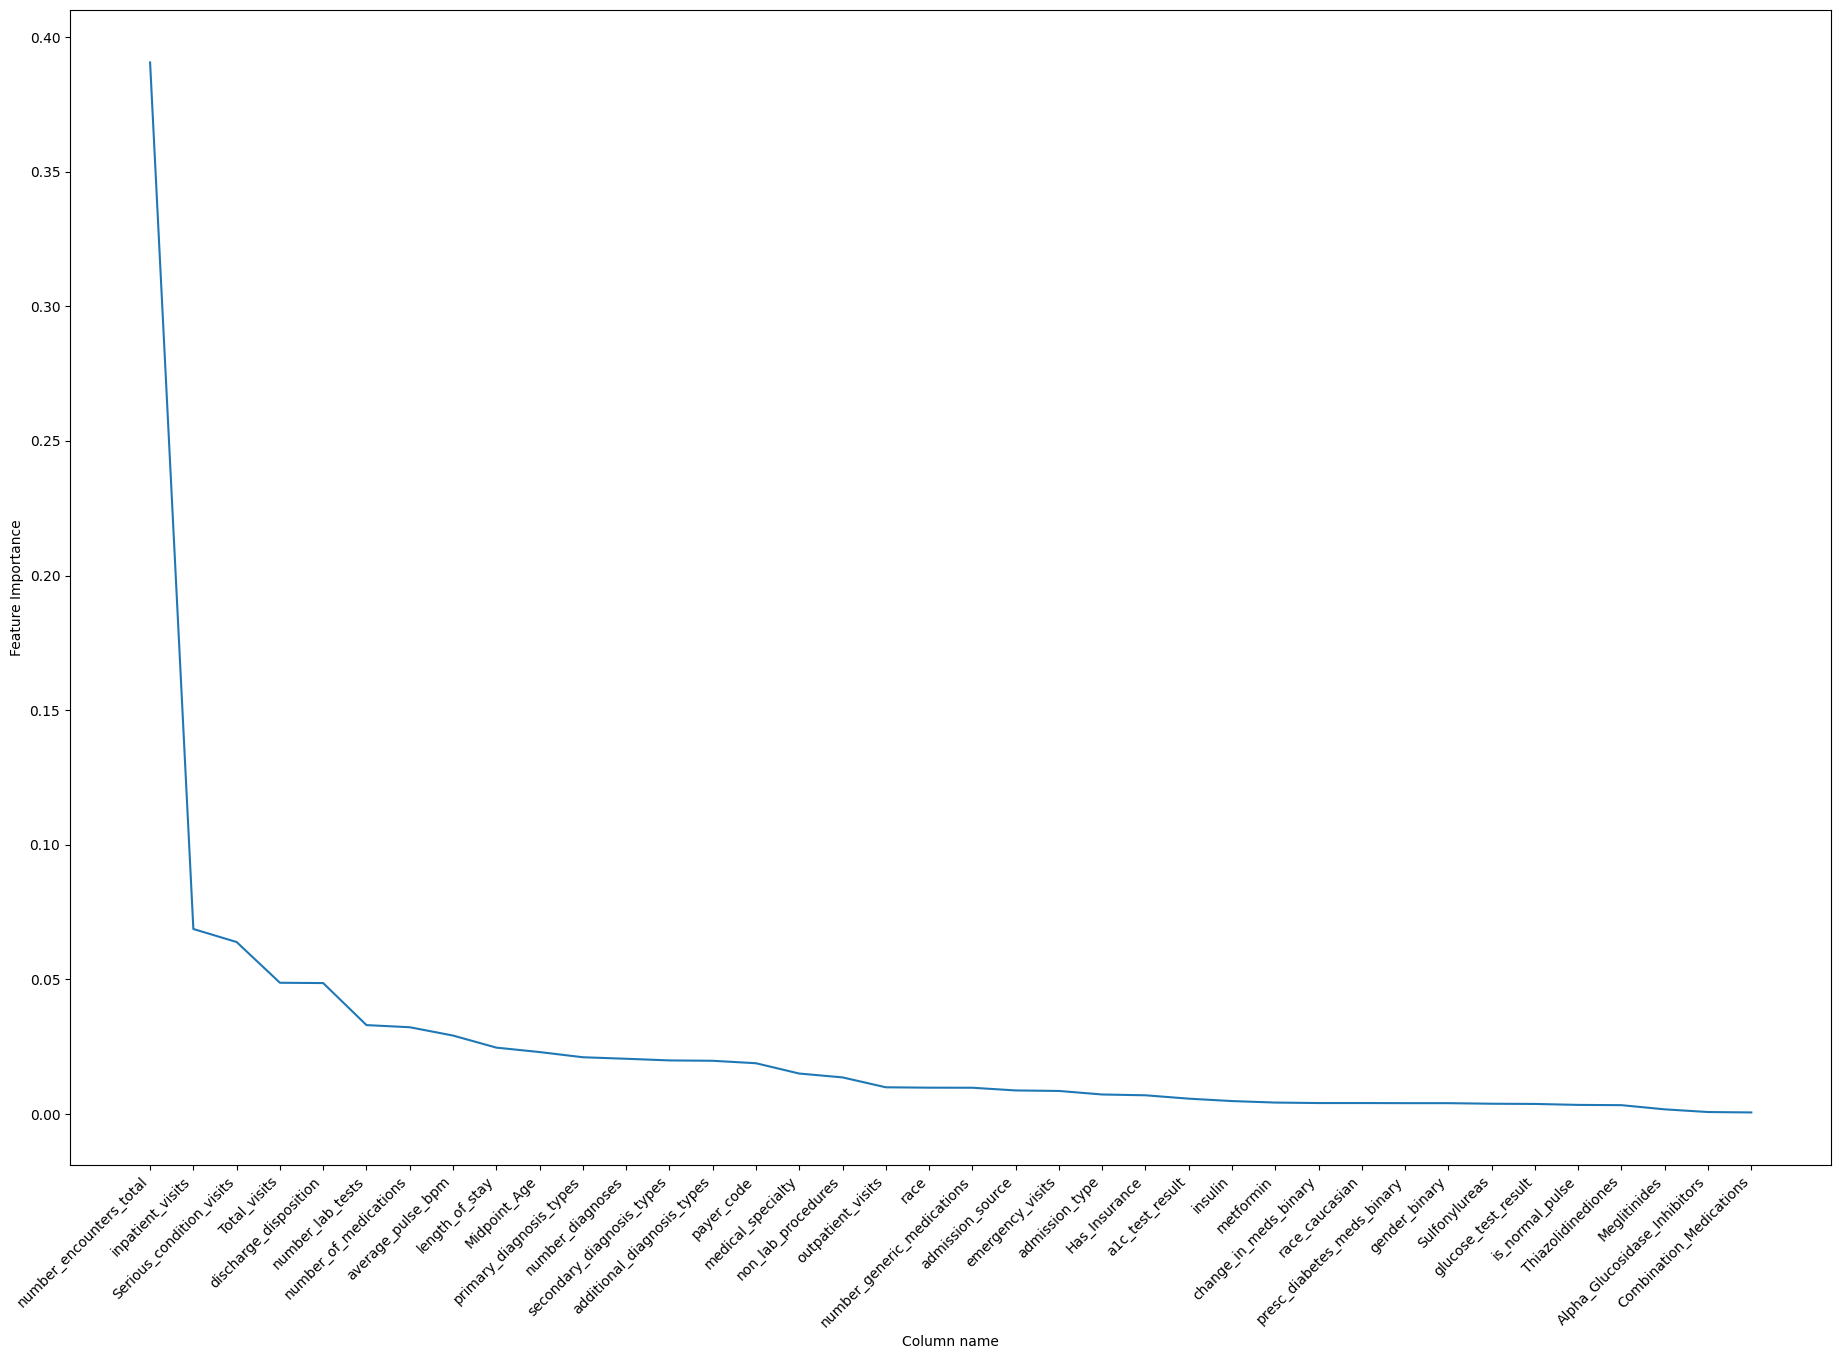

In [92]:
fig = plt.figure(figsize=(50, 15))
plt.subplot(122)
sns.lineplot(feature_importance_df, x='Column name', y="Feature Importance")
plt.xticks(rotation=45, ha="right")
plt.show()

In [93]:
feature_importance_df.to_csv('feature_importance_random_forest_3.csv')

### Lasso Regression (Embedded Methods)

In [94]:
X_binary_before_sqrt_stand_2.shape

(71236, 38)

In [95]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [96]:
reg = LassoCV()
reg.fit(X_binary_before_sqrt_stand_2, y_binary)

LassoCV()

In [97]:
coef = pd.Series(reg.coef_, index = X_combined.columns)

In [98]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 32 variables and eliminated the other 6 variables


In [99]:
coef.sort_values(ascending=False)

number_encounters_total         0.076236
presc_diabetes_meds_binary      0.006464
Midpoint_Age                    0.004117
medical_specialty               0.003492
race_caucasian                  0.003477
number_diagnoses                0.003205
insulin                         0.002659
number_lab_tests                0.002616
emergency_visits                0.002518
Total_visits                    0.002326
length_of_stay                  0.002315
a1c_test_result                 0.001789
payer_code                      0.001694
number_of_medications           0.001313
glucose_test_result             0.001212
inpatient_visits                0.000871
gender_binary                   0.000751
Meglitinides                    0.000748
non_lab_procedures              0.000687
primary_diagnosis_types         0.000462
change_in_meds_binary           0.000092
is_normal_pulse                 0.000000
average_pulse_bpm              -0.000000
race                            0.000000
Thiazolidinedion

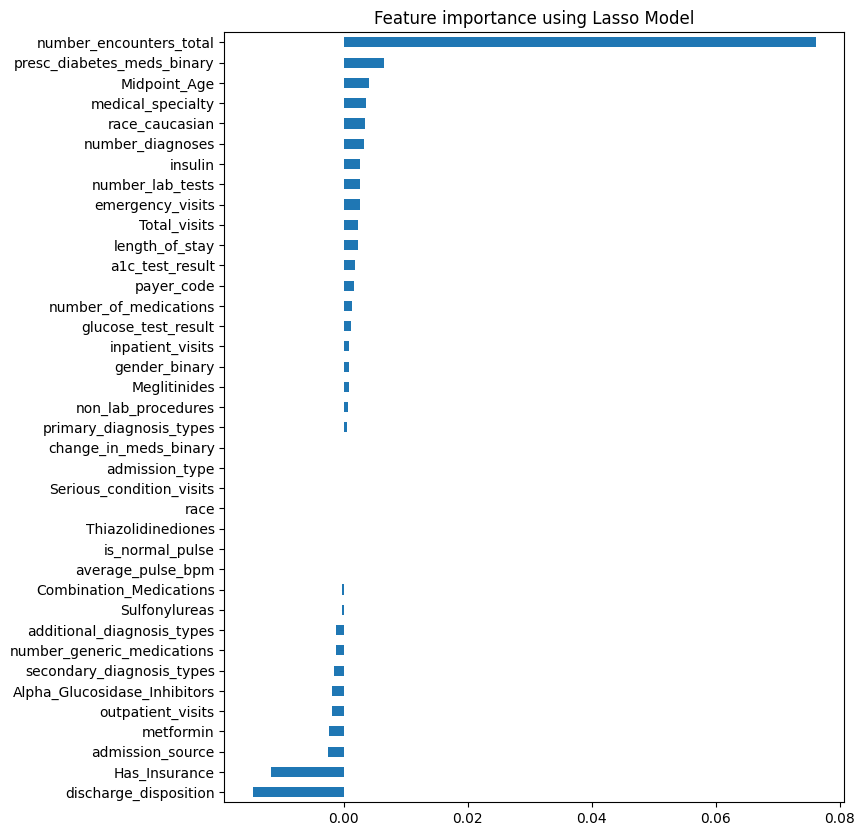

In [100]:
plot_importance(coef,'Lasso')

Based on the results of Lasso Regression: 
- It removed admission_type, race, Thiazolidinediones, is_normal_pulse and average_pulse_bpm
- Other variables like Sulfonylureas, Combination_Medications, outpatient_visits, Meglitinides, gender_binary,                 non_lab_procedures, primary_diagnosis_types, change_in_meds_binary have a corr < 0.001        

### Analysis of Variance for Categorical Variables, or ANOVA-C

In [101]:
non_metric_X_train = X_binary.drop(['outpatient_visits','emergency_visits','inpatient_visits','average_pulse_bpm',
 'length_of_stay','number_lab_tests','non_lab_procedures','number_of_medications','number_diagnoses','number_encounters_total',
 'number_generic_medications','Midpoint_Age','Total_visits', 'Serious_condition_visits'], axis=1)

In [102]:
non_metric_X_train.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'race_caucasian', 'insulin',
       'metformin', 'Sulfonylureas', 'Meglitinides', 'Thiazolidinediones',
       'Alpha_Glucosidase_Inhibitors', 'Combination_Medications',
       'gender_binary', 'presc_diabetes_meds_binary', 'change_in_meds_binary',
       'Has_Insurance', 'is_normal_pulse'],
      dtype='object')

In [31]:
# # Instantiate a SelectKBest object
# selector = SelectKBest(score_func=chi2, k=15)  # select 15 features

# # Fit the selector to the training data
# selector.fit(non_metric_X_train, y_train_binary_2)

# # Transform the training and testing data
# # X_train_selected = selector.transform(X_train)
# # X_test_selected = selector.transform(X_test)

# # Get the selected features
# selected_features = non_metric_X_train.columns[selector.get_support()]
# selected_features

In [54]:
# Instantiate a SelectKBest object
# selector2 = SelectKBest(score_func=f_classif, k=9)  # select 9 numerical features

# # Fit the selector to the training data
# selector2.fit(X_binary_metric_sqrt_2, y_binary)

# # Get the selected features
# selected_features2 = X_binary_metric_sqrt_2.columns[selector2.get_support()]
# selected_features2

Index(['length_of_stay', 'number_lab_tests', 'number_of_medications',
       'number_diagnoses', 'outpatient_visits', 'number_encounters_total',
       'emergency_visits', 'inpatient_visits', 'Midpoint_Age'],
      dtype='object')

In [103]:
# Instantiate a SelectKBest object
selector3 = SelectKBest(score_func=mutual_info_classif, k=20)  # select 20 features

# Fit the selector to the training data
selector3.fit(X_binary_before_sqrt_stand_2, y_binary)

# Get the selected features
selected_features3 = X_combined.columns[selector3.get_support()]
selected_features3

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'glucose_test_result', 'race_caucasian',
       'insulin', 'metformin', 'Sulfonylureas', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary',
       'is_normal_pulse', 'outpatient_visits', 'number_encounters_total',
       'emergency_visits', 'inpatient_visits', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [104]:
# Instantiate a SelectKBest object
selector4 = SelectKBest(score_func=mutual_info_classif, k=15)  # select 15 features

# Fit the selector to the training data
selector4.fit(X_binary_before_sqrt_stand_2, y_binary)

# Get the selected features
selected_features4 = X_combined.columns[selector4.get_support()]
selected_features4

Index(['race', 'discharge_disposition', 'race_caucasian', 'insulin',
       'metformin', 'Sulfonylureas', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'is_normal_pulse', 'number_encounters_total', 'inpatient_visits',
       'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [105]:
# Instantiate a SelectKBest object
selector5 = SelectKBest(score_func=mutual_info_classif, k=12)  # select 12 features

# Fit the selector to the training data
selector5.fit(X_binary_before_sqrt_stand_2, y_binary)

# Get the selected features
selected_features5 = X_combined.columns[selector5.get_support()]
selected_features5

Index(['race', 'discharge_disposition', 'race_caucasian', 'Sulfonylureas',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'is_normal_pulse', 'number_encounters_total', 'inpatient_visits',
       'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [106]:
# Instantiate a SelectKBest object
selector6 = SelectKBest(score_func=mutual_info_classif, k=10)  # select 10 features

# Fit the selector to the training data
selector6.fit(X_binary_before_sqrt_stand_2, y_binary)

# Get the selected features
selected_features6 = X_combined.columns[selector6.get_support()]
selected_features6

Index(['race', 'discharge_disposition', 'race_caucasian', 'insulin',
       'Has_Insurance', 'is_normal_pulse', 'number_encounters_total',
       'inpatient_visits', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [107]:
# Instantiate a SelectKBest object
selector6 = SelectKBest(score_func=mutual_info_classif, k=8)  # select 8 features

# Fit the selector to the training data
selector6.fit(X_binary_before_sqrt_stand_2, y_binary)

# Get the selected features
selected_features6 = X_combined.columns[selector6.get_support()]
selected_features6

Index(['discharge_disposition', 'insulin', 'change_in_meds_binary',
       'Has_Insurance', 'number_encounters_total', 'inpatient_visits',
       'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [108]:
# Instantiate a SelectKBest object
selector6 = SelectKBest(score_func=mutual_info_classif, k=6)  # select 6 features

# Fit the selector to the training data
selector6.fit(X_binary_before_sqrt_stand_2, y_binary)

# Get the selected features
selected_features6 = X_combined.columns[selector6.get_support()]
selected_features6

Index(['discharge_disposition', 'presc_diabetes_meds_binary',
       'number_encounters_total', 'inpatient_visits', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

### Phik Correlation Matrix (Correlation between categorical variables)

interval columns not set, guessing: ['race', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis_types', 'secondary_diagnosis_types', 'additional_diagnosis_types', 'glucose_test_result', 'a1c_test_result', 'race_caucasian', 'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides', 'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors', 'Combination_Medications', 'gender_binary', 'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance', 'is_normal_pulse']


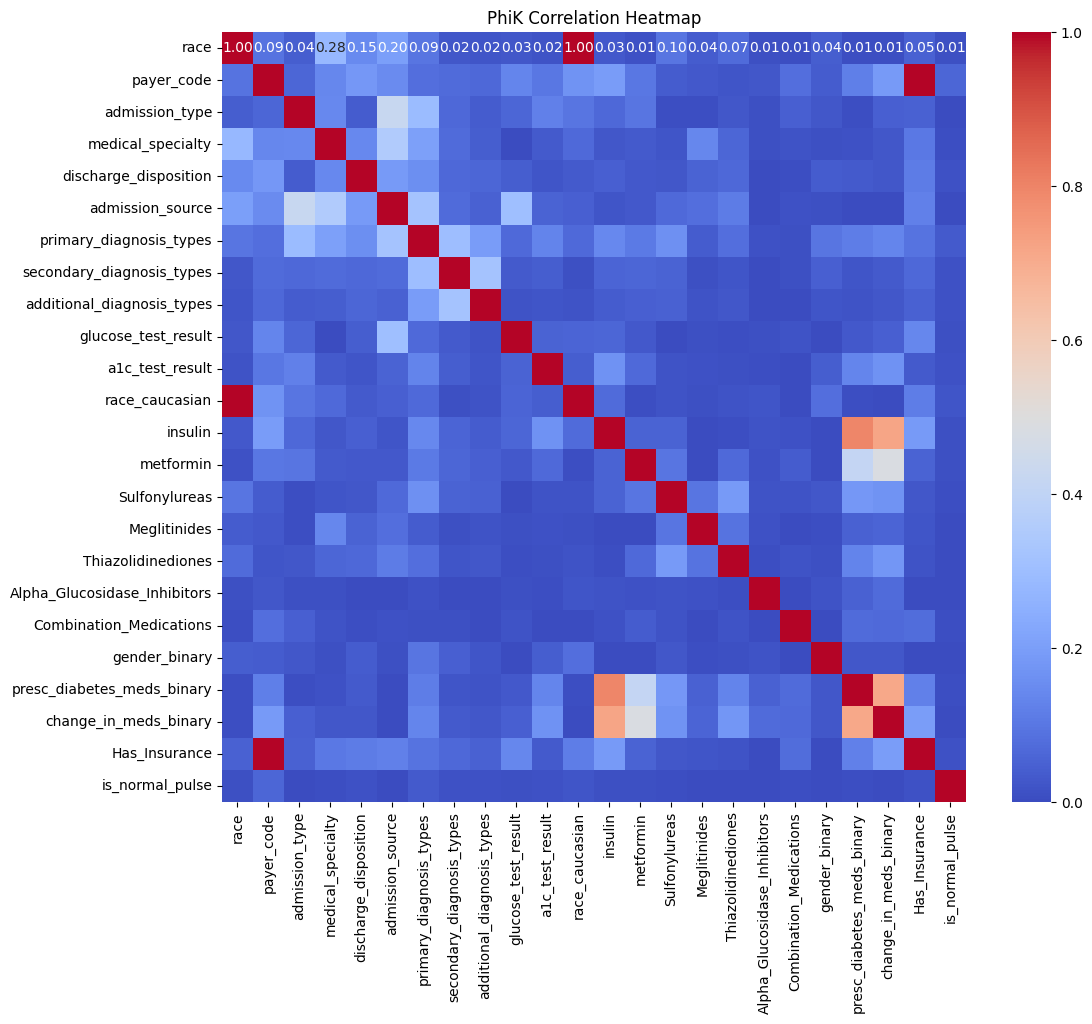

In [109]:
phik_corr_matrix = non_metric_X_train.phik_matrix()

# Plotting a heatmap for the PhiK correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PhiK Correlation Heatmap')
plt.show()

In [110]:
pd.set_option('display.max_columns', None)
phik_corr_matrix[phik_corr_matrix>0.5]

race  payer_code  admission_type  \
race                           1.0         NaN             NaN   
payer_code                     NaN         1.0             NaN   
admission_type                 NaN         NaN             1.0   
medical_specialty              NaN         NaN             NaN   
discharge_disposition          NaN         NaN             NaN   
admission_source               NaN         NaN             NaN   
primary_diagnosis_types        NaN         NaN             NaN   
secondary_diagnosis_types      NaN         NaN             NaN   
additional_diagnosis_types     NaN         NaN             NaN   
glucose_test_result            NaN         NaN             NaN   
a1c_test_result                NaN         NaN             NaN   
race_caucasian                 1.0         NaN             NaN   
insulin                        NaN         NaN             NaN   
metformin                      NaN         NaN             NaN   
Sulfonylureas                  NaN         NaN             NaN   
Meglitinides                   NaN         NaN             NaN   
Thiazolidinediones             NaN         NaN             NaN   
Alpha_Glucosidase_Inhibitors   NaN         NaN             NaN   
Combination_Medications        NaN         NaN             NaN   
gender_binary                  NaN         NaN             NaN   
presc_diabetes_meds_binary     NaN         NaN             NaN   
change_in_meds_binary          NaN         NaN             NaN   
Has_Insurance                  NaN         1.0             NaN   
is_normal_pulse                NaN         NaN             NaN   

                              medical_specialty  discharge_disposition  \
race                                        NaN                    NaN   
payer_code                                  NaN                    NaN   
admission_type                              NaN                    NaN   
medical_specialty                           1.0                    NaN   
discharge_disposition                       NaN                    1.0   
admission_source                            NaN                    NaN   
primary_diagnosis_types                     NaN                    NaN   
secondary_diagnosis_types                   NaN                    NaN   
additional_diagnosis_types                  NaN                    NaN   
glucose_test_result                         NaN                    NaN   
a1c_test_result                             NaN                    NaN   
race_caucasian                              NaN                    NaN   
insulin                                     NaN                    NaN   
metformin                                   NaN                    NaN   
Sulfonylureas                               NaN                    NaN   
Meglitinides                                NaN                    NaN   
Thiazolidinediones                          NaN                    NaN   
Alpha_Glucosidase_Inhibitors                NaN                    NaN   
Combination_Medications                     NaN                    NaN   
gender_binary                               NaN                    NaN   
presc_diabetes_meds_binary                  NaN                    NaN   
change_in_meds_binary                       NaN                    NaN   
Has_Insurance                               NaN                    NaN   
is_normal_pulse                             NaN                    NaN   

                              admission_source  primary_diagnosis_types  \
race                                       NaN                      NaN   
payer_code                                 NaN                      NaN   
admission_type                             NaN                      NaN   
medical_specialty                          NaN                      NaN   
discharge_disposition                      NaN                      NaN   
admission_source                           1.0                      NaN   
pri

In [111]:
metric_features

['average_pulse_bpm',
 'length_of_stay',
 'number_lab_tests',
 'non_lab_procedures',
 'number_of_medications',
 'number_diagnoses',
 'number_generic_medications',
 'outpatient_visits',
 'number_encounters_total',
 'emergency_visits',
 'inpatient_visits',
 'Midpoint_Age',
 'Total_visits',
 'Serious_condition_visits']

In [112]:
len(metric_features)

14

<hr>

### Numerical Data

| Predictor | Spearman | RFECV LR| RFECV RF | Lasso | Mutual Info | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- | --- | --- | --- |
| Outpatient_visits | Keep | Discard | Keep | Keep | Discard | Try with and without |
| Emergency_visits | Keep | Keep | Keep | Keep| Discard | Include in the model |
| Inpatient_visits | Keep| Keep | Keep | Keep | Keep |  |
| Average_pulse_bpm | Keep | Discard | Keep | Keep? | Discard | Discard |
| Length_of_stay | Keep | Discard | Keep | Keep | Keep |  |
| Number_lab_tests | Keep | Discard | Keep | Keep | Discard |  |
| Non_lab_procedures | Keep | Discard |Keep | Keep | Discard |  |
| Number_of_medications | Keep | Keep |Keep | Keep | Keep |  |
| Number_diagnoses | Keep | Keep |Keep | Keep | Keep |  |
| Number_generic_medications | Keep | Keep | Keep | Keep? | Keep |  |
| Midpoint_Age | Keep | Keep |Keep | Keep | Keep |  |
| Total_visits | Keep | Keep |Keep | Keep | Keep |  |
| Serious_condition_visits | Keep | Keep |Keep | Keep | Keep |  |
| number_encounters_total | Keep | Keep |Keep | Keep | Keep |  |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Cabin | Keep |  
| Embarked | Keep | 
| First Name| Discard|
| Last Name| Discard|
| Sex | Keep | 
| Ticket | Discard | 
| Title | Keep |
| Embarked Flag | Discard | 

<hr>

## Final result (Features choosen)

In [246]:
X_binary.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'outpatient_visits',
       'emergency_visits', 'inpatient_visits', 'average_pulse_bpm',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'race_caucasian',
       'number_generic_medications', 'insulin', 'metformin', 'Sulfonylureas',
       'Meglitinides', 'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'is_normal_pulse', 'number_encounters_total', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [70]:
# selected_features=['emergency_visits','inpatient_visits','outpatient_visits','discharge_disposition_Discharged_to_home',
#                    'length_of_stay', 'non_lab_procedures', 'number_lab_tests', 'number_of_medications', 'number_diagnoses',
#                   'number_generic_medications', 'Midpoint_Age', 'discharge_disposition_Expired', 'medical_specialty_Cardiology',
#                   'primary_diagnosis_types_Diabetes', 'insulin', 'a1c_test_result_Not_taken', 'secondary_diagnosis_types_Neoplasms']

In [247]:
selected_features=['admission_type','number_encounters_total','inpatient_visits','a1c_test_result','medical_specialty',
                    'primary_diagnosis_types','presc_diabetes_meds_binary','secondary_diagnosis_types',
                    'discharge_disposition','glucose_test_result','race_caucasian','Has_Insurance','metformin']

In [248]:
len(selected_features)

13

# Normalization Methods

In [249]:
X_binary_non_metric_final = X_binary.drop(metric_features, axis=1)
X_binary_metric_sqrt_final = np.sqrt(X_binary[metric_features]) 
X_combined_final = pd.concat([X_binary_non_metric_final, X_binary_metric_sqrt_final], axis=1)
X_combined_final.head()

race  payer_code  admission_type  medical_specialty  \
encounter_id                                                         
533253        51779       28201           50779               5217   
426224        12977       28201           50779              34922   
634063        51779       28201            7246               5217   
890610        12977       22683           50779              12561   
654194        51779        4319           13211              34922   

              discharge_disposition  admission_source  \
encounter_id                                            
533253                        51342             40319   
426224                        12978             21586   
634063                        51342              4913   
890610                        51342              4418   
654194                        51342             21586   

              primary_diagnosis_types  secondary_diagnosis_types  \
encounter_id                                                       
533253                          10137                       5746   
426224                           1968                      22345   
634063                           6667                       1358   
890610                           6667                       2897   
654194                           3443                       5866   

              additional_diagnosis_types  glucose_test_result  \
encounter_id                                                    
533253                              5130                67548   
426224                              1297                67548   
634063                             11927                67548   
890610                             21234                67548   
654194                             21234                67548   

              a1c_test_result  race_caucasian  insulin  metformin  \
encounter_id                                                        
533253                  59320               1        0          0   
426224                  59320               0        1          0   
634063                  59320               1        1          0   
890610                  59320               0        0          0   
654194                  59320               1        0          0   

              Sulfonylureas  Meglitinides  Thiazolidinediones  \
encounter_id                                                    
533253                    0             0                   0   
426224                    0             0                   0   
634063                    0             0                   0   
890610                    0             0                   0   
654194                    0             0                   0   

              Alpha_Glucosidase_Inhibitors  Combination_Medications  \
encounter_id                                                          
533253                                   0                        0   
426224                                   0                        0   
634063                                   0                        0   
890610                                   0                        0   
654194                                   0                        0   

              gender_binary  presc_diabetes_meds_binary  \
encounter_id                                              
533253                    0                           0   
426224                    1                           1   
634063                    0                           1   
890610                    1                           0   
654194                    0                           0   

              change_in_meds_binary  Has_Insurance  is_normal_pulse  \
encounter_id                                                          
533253                            0              0                0   
426224                            0              0                0   
634063                            1              0     

In [250]:
test_binary_non_metric_final = test_binary.drop(metric_features, axis=1)
test_binary_metric_sqrt_final = np.sqrt(test_binary[metric_features]) 
test_combined_final = pd.concat([test_binary_non_metric_final, test_binary_metric_sqrt_final], axis=1)
test_combined_final.head()

encounter_id   race  payer_code  admission_type  medical_specialty  \
0        499502  51779        4319           50779              34922   
1        447319  51779        4319           50779              34922   
2        309126  12977       28201           50779              12561   
3        181183  51779        3292            7246              34922   
4        359339  51779       28201           50779              12561   

   discharge_disposition  admission_source  primary_diagnosis_types  \
0                  51342             40319                    10137   
1                  51342             40319                     6104   
2                  51342             40319                    10137   
3                  51342             40319                     4881   
4                  51342             40319                     3589   

   secondary_diagnosis_types  additional_diagnosis_types  glucose_test_result  \
0                      22345                       11927                67548   
1                       1358                        1964                 1882   
2                       8938                        2766                67548   
3                       1723                        4550                67548   
4                      22345                       21234                67548   

   a1c_test_result  race_caucasian  insulin  metformin  Sulfonylureas  \
0            59320               1        0          1              0   
1            59320               1        0          0              0   
2            59320               0        1          0              0   
3            59320               1        1          1              1   
4            59320               1        0          1              0   

   Meglitinides  Thiazolidinediones  Alpha_Glucosidase_Inhibitors  \
0             0                   0                             0   
1             0                   0                             0   
2             0                   0                             0   
3             0                   0                             0   
4             0                   0                             0   

   Combination_Medications  gender_binary  presc_diabetes_meds_binary  \
0                        0              1                           1   
1                        0              1                           0   
2                        0              1                           1   
3                        0              1                           1   
4                        0              1                           1   

   change_in_meds_binary  Has_Insurance  is_normal_pulse  average_pulse_bpm  \
0                      0              1                0          11.789826   
1                      0              1                1          10.148892   
2                      0              0                1           9.949874   
3                      1              1                0          11.661904   
4                      0              0                0          11.704700   

   length_of_stay  number_lab_tests  non_lab_procedures  \
0        1.732051          6.928203            0.000000   
1        3.162278          8.774964            1.000000   
2        1.414214          6.633250            1.732051   
3        2.000000          6.928203            1.000000   
4        1.000000          6.557439            0.000000   

   number_of_medications  number_diagnoses  number_generic_medications  \
0               3.741657          2.449490                    1.000000   
1               2.645751          2.645751                    0.000000   
2               3.464102          2.449490                    1.000000   
3               4.000000          3.000000                    1.732051   
4               3.162278          3.000000                    1.000000   

   outpatient_visits  number_encounters_total  emergency_visits  \
0              

In [251]:
X_binary_1 = X_combined_final[selected_features]
test_binary_1 = test_combined_final[selected_features]

In [252]:
X_binary_1.shape

(71236, 13)

In [253]:
test_binary_1.shape

(30530, 13)

In [254]:
# Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_binary_1)
test_scaled = scaler.transform(test_binary_1)

In [16]:
# Min Max Scaler
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_binary_1)
# X_val_minmax = min_max_scaler.transform(X_val_binary_2)
test_minmax = min_max_scaler.transform(test_binary_1)

In [ ]:
# Min Max Scaler between -1 and 1
min_max_scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))
X_train_minmax_neg1_1 = min_max_scaler_neg1_1.fit_transform(X_train_binary_1)
X_val_minmax_neg1_1 = min_max_scaler_neg1_1.transform(X_val_binary_1)

In [21]:
# Robust Scaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train_binary_1)
X_val_robust = robust_scaler.transform(X_val_binary_1)

### Testing Features

In [ ]:
# models = [
#     ('gau', GaussianNB()),
#     ('lr', LogisticRegression(class_weight='balanced',random_state=19)),
#     ('dt', DecisionTreeClassifier(class_weight='balanced',random_state=19)),
#     ('mlp', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19)),
#     ('svc', SVC(class_weight='balanced'random_state=19)),
#     ('rf', RandomForestClassifier(class_weight='balanced', random_state=19)),
#     ('gbc', GradientBoostingClassifier(subsample=0.5, random_state=19))    
# ]

In [80]:
def evaluate_models(models, X, y):
    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['Model', 'F1 Score', 'Standard Deviation', 'Time'])

    for model_name, model in models:
        cv = StratifiedKFold(n_splits=10)

        # Start the timer
        start_time = time.time()
        scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
        print(scores)
        score = np.mean(scores)
        std = np.std(scores)

        # Stop the timer and calculate the elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time

        print('F1 Score: %.3f' % score)
        print('Time: %.2f seconds' % elapsed_time)

        # Append the model name, score, and time to the results DataFrame
        results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'F1 Score': [score], 'Standard Deviation': [std], 'Time': [elapsed_time]})], ignore_index=True)

    return results

In [279]:
models = [('rf', RandomForestClassifier(max_depth=10,min_samples_leaf=20,min_samples_split=100,n_estimators=300,class_weight='balanced',random_state=19))]

In [40]:
evaluate_models(models,X_minmax,y_binary)

[0.33454545 0.34041262 0.34700699 0.31276726 0.32205438 0.33546423
 0.33824432 0.33515483 0.32731649 0.33551847]
F1 Score: 0.333
Time: 11.93 seconds


Model  F1 Score  Standard Deviation       Time
0    rf  0.332849             0.00927  11.932263

In [432]:
selected_features_2=['admission_type','number_encounters','inpatient_visits','a1c_test_result','medical_specialty',
                    'primary_diagnosis_types','presc_diabetes_meds_binary','secondary_diagnosis_types',
                    'discharge_disposition','glucose_test_result','race_caucasian','Has_Insurance',
                    'Combination_Medications','metformin','Meglitinides']

In [433]:
len(selected_features_2)

16

In [101]:
scaler = StandardScaler()

In [434]:
X_binary_2 = X_binary[selected_features_2]
test_binary_2 = test_binary[selected_features_2]
X_minmax_2 = scaler.fit_transform(X_binary_2)
test_minmax_2 = scaler.transform(test_binary_2)

In [435]:
evaluate_models(models,X_minmax_2,y_binary)

[0.32868129 0.34698795 0.32886115 0.33611575 0.35640559 0.32882477
 0.32746285 0.34706239 0.33126165 0.33378415]
F1 Score: 0.337
Time: 11.49 seconds


Model  F1 Score  Standard Deviation      Time
0    rf  0.336545            0.009554  11.48873

# Testing Imbalanced Learning Methods

In [135]:
def evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2):
    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['Model', 'F1 Score', 'Time'])

    for model_name, model in models:
        steps = [(imbalance_method.__class__.__name__, imbalance_method), (model_name, model)]
        pipeline = ImbPipeline(steps=steps)
        cv = StratifiedKFold()

        # Start the timer
        start_time = time.time()

        scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
        score = np.mean(scores)

        # Stop the timer and calculate the elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time

        print('F1 Score: %.3f' % score)
        print('Time: %.2f seconds' % elapsed_time)

        # Append the model name, score, and time to the results DataFrame
        results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'F1 Score': [score], 'Time': [elapsed_time]})], ignore_index=True)

    return results

In [85]:
models = [
    ('gau', GaussianNB()),
    ('lr', LogisticRegression(random_state=19)),
    ('dt', DecisionTreeClassifier(random_state=19)),
    ('knn', KNeighborsClassifier()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19)),
    ('svc', SVC(random_state=19)),
    ('rf', RandomForestClassifier(random_state=19)),
    ('gbc', GradientBoostingClassifier(subsample=0.5, random_state=19))    
]

In [ ]:
# Using RandomUnderSampler
imbalance_method = RandomUnderSampler(random_state=19)
results_RandomUnderSampler = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [88]:
results_RandomUnderSampler

Model  F1 Score       Time
0   gau  0.203729   0.122684
1    lr  0.264416   0.422287
2    dt  0.211113   0.420452
3   knn  0.216751   0.935227
4   mlp  0.263614  24.894552
5   svc  0.260491  53.201982
6    rf  0.248210  10.053624
7   gbc  0.265460   3.556464

In [87]:
results_RandomUnderSampler.to_csv('results_RandomUnderSampler.csv')

In [ ]:
# Using SMOTE
imbalance_method = SMOTE(random_state=19)
results_Smote = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [90]:
results_Smote

Model  F1 Score         Time
0   gau  0.203475     0.602184
1    lr  0.262963     2.590961
2    dt  0.154211     3.504869
3   knn  0.207243     6.748509
4   mlp  0.258950   369.226959
5   svc  0.262821  1330.919461
6    rf  0.054839    88.002949
7   gbc  0.094869    62.992306

In [91]:
results_Smote.to_csv('results_Smote.csv')

In [ ]:
# Using RandomOverSampler
imbalance_method = RandomOverSampler(random_state=19)
results_RandomOverSampler = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [95]:
results_RandomOverSampler

Model  F1 Score         Time
0   gau  0.203646     0.291117
1    lr  0.265264     2.166903
2    dt  0.150749     1.956968
3   knn  0.202657     6.630564
4   mlp  0.262224   124.642613
5   svc  0.262719  1402.938566
6    rf  0.061284    46.371867
7   gbc  0.265483    25.361750

In [96]:
results_RandomOverSampler.to_csv('results_RandomOverSampler.csv')

In [ ]:
# Using ADASYN
imbalance_method = ADASYN(random_state=19)
results_Adasyn = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [98]:
results_Adasyn

Model  F1 Score         Time
0   gau  0.203383     2.298271
1    lr  0.261456     4.179191
2    dt  0.160514     5.110312
3   knn  0.207131     8.530415
4   mlp  0.257635   345.873306
5   svc  0.262598  1309.208824
6    rf  0.050237    85.358880
7   gbc  0.077728    61.217526

In [99]:
results_Adasyn.to_csv('results_Adasyn.csv')

In [ ]:
# Using NearMiss 1
imbalance_method = NearMiss(version=1)
results_nearmiss1 = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [103]:
results_nearmiss1

Model  F1 Score       Time
0   gau  0.191273   1.276375
1    lr  0.203369   1.625528
2    dt  0.199892   1.491422
3   knn  0.197528   1.941483
4   mlp  0.204075  42.299061
5   svc  0.201750  29.840470
6    rf  0.203163   9.017541
7   gbc  0.203478   4.559503

In [104]:
results_nearmiss1.to_csv('results_nearmiss1.csv')

In [106]:
# Using NearMiss 2
imbalance_method = NearMiss(version=2)
results_nearmiss2 = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.168
Time: 19.17 seconds
F1 Score: 0.192
Time: 19.51 seconds
F1 Score: 0.194
Time: 18.55 seconds
F1 Score: 0.192
Time: 19.05 seconds
F1 Score: 0.194
Time: 55.51 seconds
F1 Score: 0.192
Time: 38.41 seconds
F1 Score: 0.193
Time: 24.79 seconds
F1 Score: 0.193
Time: 21.50 seconds


In [107]:
results_nearmiss2

Model  F1 Score       Time
0   gau  0.167741  19.171536
1    lr  0.191674  19.511422
2    dt  0.193535  18.545423
3   knn  0.191624  19.045506
4   mlp  0.193917  55.512751
5   svc  0.192471  38.411235
6    rf  0.193021  24.791069
7   gbc  0.193106  21.497524

In [108]:
results_nearmiss2.to_csv('results_nearmiss2.csv')

In [109]:
# Using NearMiss 3
imbalance_method = NearMiss(version=3)
results_nearmiss3 = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.198
Time: 2.04 seconds
F1 Score: 0.195
Time: 2.23 seconds
F1 Score: 0.191
Time: 2.29 seconds
F1 Score: 0.192
Time: 2.61 seconds
F1 Score: 0.199
Time: 29.78 seconds
F1 Score: 0.191
Time: 47.04 seconds
F1 Score: 0.199
Time: 11.41 seconds
F1 Score: 0.201
Time: 5.49 seconds


In [110]:
results_nearmiss3

Model  F1 Score       Time
0   gau  0.197784   2.042212
1    lr  0.194866   2.227928
2    dt  0.190782   2.293071
3   knn  0.192124   2.608993
4   mlp  0.198831  29.778420
5   svc  0.191436  47.037407
6    rf  0.199191  11.414696
7   gbc  0.200512   5.488959

In [111]:
results_nearmiss3.to_csv('results_nearmiss3.csv')

In [112]:
# Using Tomek Links
imbalance_method = TomekLinks()
results_tomeklinks = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 7.81 seconds
F1 Score: 0.028
Time: 8.93 seconds
F1 Score: 0.160
Time: 9.36 seconds
F1 Score: 0.072
Time: 11.69 seconds
F1 Score: 0.021
Time: 48.48 seconds
F1 Score: 0.000
Time: 573.87 seconds
F1 Score: 0.027
Time: 36.54 seconds
F1 Score: 0.027
Time: 20.66 seconds


In [113]:
results_tomeklinks

Model  F1 Score        Time
0   gau  0.203706    7.805324
1    lr  0.027905    8.933269
2    dt  0.159943    9.357019
3   knn  0.071834   11.691424
4   mlp  0.020728   48.477707
5   svc  0.000000  573.867851
6    rf  0.027025   36.539320
7   gbc  0.026768   20.658265

In [114]:
results_tomeklinks.to_csv('results_tomeklinks.csv')

In [116]:
# Using EditedNearestNeighbours with Majority
imbalance_method = EditedNearestNeighbours(kind_sel='mode')
results_EditedNearestNeighbours_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 16.58 seconds
F1 Score: 0.032
Time: 17.50 seconds
F1 Score: 0.167
Time: 17.71 seconds
F1 Score: 0.078
Time: 20.07 seconds
F1 Score: 0.035
Time: 53.28 seconds
F1 Score: 0.000
Time: 632.50 seconds
F1 Score: 0.042
Time: 44.87 seconds
F1 Score: 0.034
Time: 29.01 seconds


In [117]:
results_EditedNearestNeighbours_majority

Model  F1 Score        Time
0   gau  0.203654   16.583304
1    lr  0.032206   17.498999
2    dt  0.167055   17.709221
3   knn  0.078401   20.066185
4   mlp  0.034647   53.277503
5   svc  0.000000  632.499250
6    rf  0.041871   44.872832
7   gbc  0.033870   29.012435

In [118]:
results_EditedNearestNeighbours_majority.to_csv('results_EditedNearestNeighbours_majority.csv')

In [119]:
# Using EditedNearestNeighbours with All
imbalance_method = EditedNearestNeighbours(kind_sel='all')
results_EditedNearestNeighbours_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 7.14 seconds
F1 Score: 0.084
Time: 7.95 seconds
F1 Score: 0.191
Time: 7.88 seconds
F1 Score: 0.147
Time: 10.06 seconds
F1 Score: 0.092
Time: 56.89 seconds
F1 Score: 0.007
Time: 261.57 seconds
F1 Score: 0.106
Time: 30.36 seconds
F1 Score: 0.097
Time: 17.12 seconds


In [120]:
results_EditedNearestNeighbours_all

Model  F1 Score        Time
0   gau  0.203668    7.135063
1    lr  0.084001    7.952037
2    dt  0.190894    7.884449
3   knn  0.147196   10.059474
4   mlp  0.092035   56.893388
5   svc  0.007334  261.573524
6    rf  0.106244   30.355045
7   gbc  0.096634   17.122725

In [121]:
results_EditedNearestNeighbours_all.to_csv('results_EditedNearestNeighbours_all.csv')

In [122]:
# Using RepeatedEditedNearestNeighbours with Majority
imbalance_method = RepeatedEditedNearestNeighbours(kind_sel='mode')
results_RepeatedEditedNearestNeighbours_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 98.09 seconds
F1 Score: 0.038
Time: 99.72 seconds
F1 Score: 0.162
Time: 99.05 seconds
F1 Score: 0.085
Time: 101.33 seconds
F1 Score: 0.045
Time: 138.64 seconds
F1 Score: 0.000
Time: 687.81 seconds
F1 Score: 0.045
Time: 126.62 seconds
F1 Score: 0.038
Time: 110.94 seconds


In [123]:
results_RepeatedEditedNearestNeighbours_majority

Model  F1 Score        Time
0   gau  0.203647   98.091736
1    lr  0.038082   99.715766
2    dt  0.162402   99.045186
3   knn  0.085431  101.328923
4   mlp  0.045182  138.644982
5   svc  0.000000  687.809563
6    rf  0.044683  126.620183
7   gbc  0.037736  110.938931

In [124]:
results_RepeatedEditedNearestNeighbours_majority.to_csv('results_RepeatedEditedNearestNeighbours_majority.csv')

In [125]:
# Using RepeatedEditedNearestNeighbours with All
imbalance_method = RepeatedEditedNearestNeighbours(kind_sel='all')
results_RepeatedEditedNearestNeighbours_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 41.26 seconds
F1 Score: 0.145
Time: 41.32 seconds
F1 Score: 0.207
Time: 41.14 seconds
F1 Score: 0.187
Time: 43.08 seconds
F1 Score: 0.160
Time: 101.79 seconds
F1 Score: 0.057
Time: 170.29 seconds
F1 Score: 0.185
Time: 60.02 seconds
F1 Score: 0.156
Time: 48.96 seconds


In [126]:
results_RepeatedEditedNearestNeighbours_all

Model  F1 Score        Time
0   gau  0.204242   41.256845
1    lr  0.145073   41.315871
2    dt  0.207042   41.140385
3   knn  0.186714   43.082337
4   mlp  0.160061  101.794310
5   svc  0.056816  170.290198
6    rf  0.185440   60.022063
7   gbc  0.155886   48.963447

In [127]:
results_RepeatedEditedNearestNeighbours_all.to_csv('results_RepeatedEditedNearestNeighbours_all.csv')

In [128]:
# Using AllKNN with Majority
imbalance_method = AllKNN(kind_sel='mode')
results_AllKNN_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 44.24 seconds
F1 Score: 0.054
Time: 44.55 seconds
F1 Score: 0.172
Time: 44.71 seconds
F1 Score: 0.108
Time: 47.39 seconds
F1 Score: 0.059
Time: 96.42 seconds
F1 Score: 0.000
Time: 466.90 seconds
F1 Score: 0.066
Time: 70.55 seconds
F1 Score: 0.053
Time: 55.50 seconds


In [129]:
results_AllKNN_majority

Model  F1 Score        Time
0   gau  0.203653   44.236460
1    lr  0.053581   44.552834
2    dt  0.171603   44.710514
3   knn  0.108195   47.391541
4   mlp  0.058954   96.418337
5   svc  0.000335  466.896959
6    rf  0.065598   70.547451
7   gbc  0.052653   55.499592

In [130]:
results_AllKNN_majority.to_csv('results_AllKNN_majority.csv')

In [131]:
# Using AllKNN with All
imbalance_method = AllKNN(kind_sel='all')
results_AllKNN_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 17.48 seconds
F1 Score: 0.106
Time: 18.29 seconds
F1 Score: 0.195
Time: 18.21 seconds
F1 Score: 0.165
Time: 20.19 seconds
F1 Score: 0.124
Time: 75.20 seconds
F1 Score: 0.015
Time: 211.35 seconds
F1 Score: 0.140
Time: 39.60 seconds
F1 Score: 0.123
Time: 26.70 seconds


In [132]:
results_AllKNN_all

Model  F1 Score        Time
0   gau  0.203801   17.484474
1    lr  0.106354   18.285569
2    dt  0.194668   18.209017
3   knn  0.164614   20.193073
4   mlp  0.123610   75.203058
5   svc  0.014541  211.351533
6    rf  0.140440   39.603948
7   gbc  0.122871   26.698530

In [133]:
results_AllKNN_all.to_csv('results_AllKNN_all.csv')

In [ ]:
# # Using CondensedNearestNeighbour
# imbalance_method = CondensedNearestNeighbour(random_state=19)
# results_CondensedNearestNeighbour = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

Criticism for the Condensed Nearest Neighbor Rule is that examples are selected randomly especially initially which results in retention of unnecessary samples. Thus to address the issue the CNN is modified to Tomek Links- under-sampling techniques. Also it takes too long to run (20224 seconds only for GaussianNB() which is more than 5 hours and a half on the fastest model), so we are not going to test it now (maybe we can test it in the future in other way that decreases the duration time, like less models, no cross-validation, or doing the CondensedNearestNeighbour one time and then using that result for all the models.

In [ ]:
# results_CondensedNearestNeighbour

In [ ]:
# results_CondensedNearestNeighbour.to_csv('results_CondensedNearestNeighbour.csv')

In [148]:
# Using OneSidedSelection
imbalance_method = OneSidedSelection(random_state=19)
results_OneSidedSelection = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 11.66 seconds
F1 Score: 0.028
Time: 12.25 seconds
F1 Score: 0.160
Time: 11.96 seconds
F1 Score: 0.072
Time: 14.52 seconds
F1 Score: 0.023
Time: 28.31 seconds
F1 Score: 0.000
Time: 153.75 seconds
F1 Score: 0.029
Time: 18.31 seconds
F1 Score: 0.026
Time: 15.30 seconds


In [149]:
results_OneSidedSelection

Model  F1 Score        Time
0   gau  0.203706   11.663980
1    lr  0.027905   12.251982
2    dt  0.159818   11.959967
3   knn  0.071834   14.515104
4   mlp  0.023242   28.308756
5   svc  0.000000  153.754509
6    rf  0.029485   18.313947
7   gbc  0.026104   15.301462

In [150]:
results_OneSidedSelection.to_csv('results_OneSidedSelection.csv')

In [142]:
# Using NeighbourhoodCleaningRule with Majority
imbalance_method = NeighbourhoodCleaningRule(kind_sel='mode')
results_NeighbourhoodCleaningRule_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 13.93 seconds
F1 Score: 0.063
Time: 14.32 seconds
F1 Score: 0.177
Time: 13.31 seconds
F1 Score: 0.143
Time: 15.00 seconds
F1 Score: 0.069
Time: 28.27 seconds
F1 Score: 0.001
Time: 91.93 seconds
F1 Score: 0.087
Time: 18.01 seconds
F1 Score: 0.070
Time: 15.30 seconds


In [143]:
results_NeighbourhoodCleaningRule_majority

Model  F1 Score       Time
0   gau  0.203735  13.934167
1    lr  0.062784  14.318670
2    dt  0.176801  13.306470
3   knn  0.142716  14.998307
4   mlp  0.069496  28.269780
5   svc  0.001005  91.932815
6    rf  0.087238  18.012717
7   gbc  0.070396  15.297329

In [144]:
results_NeighbourhoodCleaningRule_majority.to_csv('results_NeighbourhoodCleaningRule_majority.csv')

In [145]:
# Using NeighbourhoodCleaningRule with All
imbalance_method = NeighbourhoodCleaningRule(kind_sel='all')
results_NeighbourhoodCleaningRule_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 12.91 seconds
F1 Score: 0.064
Time: 12.83 seconds
F1 Score: 0.181
Time: 12.92 seconds
F1 Score: 0.145
Time: 14.68 seconds
F1 Score: 0.068
Time: 29.87 seconds
F1 Score: 0.002
Time: 92.59 seconds
F1 Score: 0.094
Time: 18.18 seconds
F1 Score: 0.071
Time: 15.47 seconds


In [146]:
results_NeighbourhoodCleaningRule_all

Model  F1 Score       Time
0   gau  0.203732  12.905717
1    lr  0.063891  12.828699
2    dt  0.180582  12.918865
3   knn  0.145314  14.681703
4   mlp  0.067746  29.869842
5   svc  0.001674  92.594493
6    rf  0.093739  18.178955
7   gbc  0.071109  15.465496

In [147]:
results_NeighbourhoodCleaningRule_all.to_csv('results_NeighbourhoodCleaningRule_all.csv')

In [136]:
# Over-sampling using SMOTE and cleaning using ENN
imbalance_method = SMOTEENN(random_state=19)
results_SMOTEENN = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 35.94 seconds
F1 Score: 0.241
Time: 35.62 seconds
F1 Score: 0.189
Time: 36.43 seconds
F1 Score: 0.219
Time: 38.55 seconds
F1 Score: 0.249
Time: 98.40 seconds
F1 Score: 0.237
Time: 225.49 seconds
F1 Score: 0.191
Time: 49.47 seconds
F1 Score: 0.234
Time: 46.27 seconds


In [137]:
results_SMOTEENN

Model  F1 Score        Time
0   gau  0.203636   35.942277
1    lr  0.240692   35.622710
2    dt  0.188742   36.428874
3   knn  0.218786   38.549656
4   mlp  0.249068   98.398691
5   svc  0.236759  225.489152
6    rf  0.190525   49.471224
7   gbc  0.233811   46.269017

In [138]:
results_SMOTEENN.to_csv('results_SMOTEENN.csv')

In [139]:
# Over-sampling using SMOTE and cleaning using ENN
imbalance_method = SMOTETomek(random_state=19)
results_SMOTETomek = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.203
Time: 34.79 seconds
F1 Score: 0.263
Time: 35.74 seconds
F1 Score: 0.158
Time: 34.82 seconds
F1 Score: 0.208
Time: 38.63 seconds
F1 Score: 0.259
Time: 120.52 seconds
F1 Score: 0.263
Time: 426.16 seconds
F1 Score: 0.054
Time: 52.27 seconds
F1 Score: 0.095
Time: 47.93 seconds


In [140]:
results_SMOTETomek

Model  F1 Score        Time
0   gau  0.203475   34.789883
1    lr  0.263119   35.735600
2    dt  0.158070   34.815757
3   knn  0.207557   38.630724
4   mlp  0.259306  120.518484
5   svc  0.262756  426.161914
6    rf  0.054424   52.273340
7   gbc  0.095073   47.926416

In [141]:
results_SMOTETomek.to_csv('results_SMOTETomek.csv')

In [155]:
dfs = ['results_RandomUnderSampler','results_Smote','results_RandomOverSampler','results_Adasyn','results_nearmiss1',
       'results_nearmiss2','results_nearmiss3','results_tomeklinks','results_EditedNearestNeighbours_majority',
       'results_EditedNearestNeighbours_all','results_RepeatedEditedNearestNeighbours_majority',
       'results_RepeatedEditedNearestNeighbours_all','results_AllKNN_majority','results_AllKNN_all','results_OneSidedSelection',
       'results_NeighbourhoodCleaningRule_majority','results_NeighbourhoodCleaningRule_all','results_SMOTEENN',
       'results_SMOTETomek']  

methods = ['RandomUnderSampler','Smote','RandomOverSampler','Adasyn','NearMiss1','NearMiss2','NearMiss3','TomekLinks',
          'EditedNearestNeighbours_Majority','EditedNearestNeighbours_All','RepeatedEditedNearestNeighbours_Majority',
          'RepeatedEditedNearestNeighbours_All','AllKNN_Majority','AllKNN_All','OneSidedSelection',
           'NeighbourhoodCleaningRule_Majority','NeighbourhoodCleaningRule_All','SMOTEENN','SMOTETomek']

# Convert dataframe names to actual dataframes
dfs = [globals()[df] for df in dfs]

# Add a new column to each dataframe with the corresponding method name
for df, method in zip(dfs, methods):
    df['Imbalanced_Method'] = method

# Concatenate all dataframes
result_all_imbalanced_methods = pd.concat(dfs)

In [159]:
# Get a list of all the columns
cols = list(result_all_imbalanced_methods.columns)

# Remove 'Method' from the list
cols.remove('Imbalanced_Method')

# Reorder the columns
result_all_imbalanced_methods = result_all_imbalanced_methods[['Imbalanced_Method'] + cols]

In [162]:
result_all_imbalanced_methods = result_all_imbalanced_methods.sort_values(by=['Model', 'F1 Score'], ascending=[True, False])

In [163]:
result_all_imbalanced_methods

Imbalanced_Method Model  F1 Score        Time
2                         RandomUnderSampler    dt  0.211113    0.420452
2        RepeatedEditedNearestNeighbours_All    dt  0.207042   41.140385
2                                  NearMiss1    dt  0.199892    1.491422
2                                 AllKNN_All    dt  0.194668   18.209017
2                                  NearMiss2    dt  0.193535   18.545423
..                                       ...   ...       ...         ...
5                            AllKNN_Majority   svc  0.000335  466.896959
5                                 TomekLinks   svc  0.000000  573.867851
5           EditedNearestNeighbours_Majority   svc  0.000000  632.499250
5   RepeatedEditedNearestNeighbours_Majority   svc  0.000000  687.809563
5                          OneSidedSelection   svc  0.000000  153.754509

[152 rows x 4 columns]

In [164]:
result_all_imbalanced_methods.to_csv('result_all_imbalanced_methods.csv')

# Random Undersampling

### GaussianNB

In [165]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [166]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [167]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [168]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [169]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [170]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


### Logistic Regression

In [295]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.052


In [296]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.093


In [297]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.141


In [298]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.188


In [299]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.220


In [300]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.240


In [301]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.254


In [302]:
model = LogisticRegression(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    0.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    0.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.8s finished


F1 Score: 0.265


### Decision Tree Classifier

In [193]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.175


In [186]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.190


In [187]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.197


In [188]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.200


In [189]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.203


In [190]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.205


In [191]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.208


In [294]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    0.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


F1 Score: 0.148


### KNeighbors Classifier

In [194]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.104


In [195]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.154


In [196]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.181


In [197]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.198


In [198]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.206


In [199]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.212


In [200]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.216


In [307]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.217


### MLP Classifier

In [208]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.046


In [209]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.094


In [210]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.157


In [211]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.211


In [212]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.240


In [213]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.257


In [303]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.75, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.261


In [214]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [269]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [270]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [271]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.95, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


In [273]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


### SVC

In [284]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.6, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    9.5s remaining:    6.3s


F1 Score: 0.171


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished


In [283]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.7, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.7s finished


F1 Score: 0.239


In [285]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.8, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.1s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    8.2s remaining:    5.4s


F1 Score: 0.257


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.8s finished


In [286]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.7s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.7s remaining:    5.1s


F1 Score: 0.259


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.3s finished


In [287]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.0s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


F1 Score: 0.259


In [268]:
model = SVC(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.1min


F1 Score: 0.262


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


### Gradient Boosting Classifer

In [215]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.045


In [216]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.101


In [217]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.165


In [218]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.207


In [219]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.242


In [220]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.259


In [221]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.79, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [222]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.267


In [224]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.268


In [225]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.266


### Random Forest Classifier

In [226]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.060


In [227]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.124


In [228]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.181


In [229]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.217


In [230]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.237


In [231]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.245


In [232]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.248


In [233]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.250


In [234]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.250


In [292]:
model = RandomForestClassifier(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.016


### ExtraTreesClassifier

In [235]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.081


In [236]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.143


In [237]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.186


In [238]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.215


In [239]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.230


In [240]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.239


In [241]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.243


In [242]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.243


In [243]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.242


In [293]:
model = ExtraTreesClassifier(class_weight='balanced', random_state=19, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.030


### Bagging Classifier

In [244]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.099


In [245]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.151


In [246]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.184


In [247]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.200


In [248]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.214


In [249]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.223


In [250]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.225


In [310]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.226


In [251]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.224


In [252]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.227


### AdaBoost Classifier

In [255]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.2, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.044


In [256]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.3, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.106


In [257]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.4, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.170


In [258]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.5, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.209


In [259]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.6, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.239


In [260]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.7, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.253


In [261]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.8, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.260


In [263]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


In [264]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.264


In [265]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.95, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


In [266]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.262


# Imbalanced Learning

Cost-sensitive learning: This involves assigning a higher cost to misclassifying minority classes.

In [311]:
y_train_binary_2.value_counts(normalize=True)

readmitted_binary
0    0.888402
1    0.111598
Name: proportion, dtype: float64

In [312]:
y_val_binary_2.value_counts(normalize=True)

readmitted_binary
0    0.888371
1    0.111629
Name: proportion, dtype: float64

### Random Undersampling

We are going to use MinMaxScaler, because RobustScaler can only be a last resource option (said by the professor) and because we dont have normal or normalike distributions (also because we have binary features which dont have normal distributions).

In [345]:
print("Number transactions X_train dataset: ", X_minmax.shape)
print("Number transactions y_train dataset: ", y_binary.shape)
# print("Number transactions X_val dataset: ", X_val_binary_2.shape)
# print("Number transactions y_val dataset: ", y_val_binary_2.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_binary==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_binary==0)))

rus = RandomUnderSampler(sampling_strategy=0.85, random_state=19)
X_train_res, y_train_res = rus.fit_resample(X_minmax, y_binary.values.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (71236, 9)
Number transactions y_train dataset:  (71236,)
Before OverSampling, counts of label '1': 7950
Before OverSampling, counts of label '0': 63286 

After OverSampling, the shape of train_X: (17302, 9)
After OverSampling, the shape of train_y: (17302,) 

After OverSampling, counts of label '1': 7950
After OverSampling, counts of label '0': 9352


In [ ]:
# def metrics(y_train, pred_train , y_val, pred_val):
#     print('___________________________________________________________________________________________________________')
#     print('                                                     TRAIN                                                 ')
#     print('-----------------------------------------------------------------------------------------------------------')
#     print(classification_report(y_train, pred_train))
#     print(confusion_matrix(y_train, pred_train))


#     print('___________________________________________________________________________________________________________')
#     print('                                                VALIDATION                                                 ')
#     print('-----------------------------------------------------------------------------------------------------------')
#     print(classification_report(y_val, pred_val))
#     print(confusion_matrix(y_val, pred_val))

# Algorithms

### Decision Trees

In [521]:
# Define the models
models = [
    DecisionTreeClassifier(class_weight='balanced',random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'criterion': ['gini','entropy'],
        'splitter': ['random','best'],
        'max_depth': [8,9,10,11,12],
        'min_samples_split': range(20,200),
        'min_samples_leaf': range(2,40)
    } # Decision Tree
]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    
    gs = RandomizedSearchCV(model, params, cv=10, n_iter=200, scoring='f1', verbose=10)
    
    gs.fit(X_minmax_2, y_binary)
    
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV 1/10; 1/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=20, splitter=random
[CV 1/10; 1/200] END criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=20, splitter=random;, score=0.317 total time=   0.0s
[CV 2/10; 1/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=20, splitter=random
[CV 2/10; 1/200] END criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=20, splitter=random;, score=0.319 total time=   0.0s
[CV 3/10; 1/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=20, splitter=random
[CV 3/10; 1/200] END criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=20, splitter=random;, score=0.306 total time=   0.0s
[CV 4/10; 1/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=20, splitter=random
[CV 4/10; 1/200] END criterion=gini, max_depth=12, min_sam

[CV 5/10; 4/200] END criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=best;, score=0.353 total time=   0.0s
[CV 6/10; 4/200] START criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=best
[CV 6/10; 4/200] END criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=best;, score=0.327 total time=   0.0s
[CV 7/10; 4/200] START criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=best
[CV 7/10; 4/200] END criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=best;, score=0.319 total time=   0.0s
[CV 8/10; 4/200] START criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=best
[CV 8/10; 4/200] END criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=best;, score=0.341 total time=   0.0s
[CV 9/10; 4/200] START criterion=gini, max_depth=11, min_samples_leaf=8, min_samples_split=163, splitter=b

[CV 9/10; 7/200] END criterion=entropy, max_depth=9, min_samples_leaf=24, min_samples_split=152, splitter=best;, score=0.315 total time=   0.0s
[CV 10/10; 7/200] START criterion=entropy, max_depth=9, min_samples_leaf=24, min_samples_split=152, splitter=best
[CV 10/10; 7/200] END criterion=entropy, max_depth=9, min_samples_leaf=24, min_samples_split=152, splitter=best;, score=0.333 total time=   0.0s
[CV 1/10; 8/200] START criterion=gini, max_depth=10, min_samples_leaf=16, min_samples_split=42, splitter=best
[CV 1/10; 8/200] END criterion=gini, max_depth=10, min_samples_leaf=16, min_samples_split=42, splitter=best;, score=0.328 total time=   0.0s
[CV 2/10; 8/200] START criterion=gini, max_depth=10, min_samples_leaf=16, min_samples_split=42, splitter=best
[CV 2/10; 8/200] END criterion=gini, max_depth=10, min_samples_leaf=16, min_samples_split=42, splitter=best;, score=0.350 total time=   0.0s
[CV 3/10; 8/200] START criterion=gini, max_depth=10, min_samples_leaf=16, min_samples_split=42,

[CV 4/10; 11/200] END criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, splitter=best;, score=0.314 total time=   0.0s
[CV 5/10; 11/200] START criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, splitter=best
[CV 5/10; 11/200] END criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, splitter=best;, score=0.340 total time=   0.0s
[CV 6/10; 11/200] START criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, splitter=best
[CV 6/10; 11/200] END criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, splitter=best;, score=0.303 total time=   0.0s
[CV 7/10; 11/200] START criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, splitter=best
[CV 7/10; 11/200] END criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, splitter=best;, score=0.314 total time=   0.0s
[CV 8/10; 11/200] START criterion=gini, max_depth=12, min_samples_leaf=19, min_samples_split=61, sp

[CV 7/10; 14/200] END criterion=gini, max_depth=9, min_samples_leaf=36, min_samples_split=160, splitter=best;, score=0.323 total time=   0.0s
[CV 8/10; 14/200] START criterion=gini, max_depth=9, min_samples_leaf=36, min_samples_split=160, splitter=best
[CV 8/10; 14/200] END criterion=gini, max_depth=9, min_samples_leaf=36, min_samples_split=160, splitter=best;, score=0.349 total time=   0.0s
[CV 9/10; 14/200] START criterion=gini, max_depth=9, min_samples_leaf=36, min_samples_split=160, splitter=best
[CV 9/10; 14/200] END criterion=gini, max_depth=9, min_samples_leaf=36, min_samples_split=160, splitter=best;, score=0.314 total time=   0.0s
[CV 10/10; 14/200] START criterion=gini, max_depth=9, min_samples_leaf=36, min_samples_split=160, splitter=best
[CV 10/10; 14/200] END criterion=gini, max_depth=9, min_samples_leaf=36, min_samples_split=160, splitter=best;, score=0.330 total time=   0.0s
[CV 1/10; 15/200] START criterion=gini, max_depth=11, min_samples_leaf=36, min_samples_split=195,

[CV 9/10; 17/200] END criterion=gini, max_depth=12, min_samples_leaf=27, min_samples_split=92, splitter=random;, score=0.311 total time=   0.0s
[CV 10/10; 17/200] START criterion=gini, max_depth=12, min_samples_leaf=27, min_samples_split=92, splitter=random
[CV 10/10; 17/200] END criterion=gini, max_depth=12, min_samples_leaf=27, min_samples_split=92, splitter=random;, score=0.333 total time=   0.0s
[CV 1/10; 18/200] START criterion=gini, max_depth=12, min_samples_leaf=18, min_samples_split=127, splitter=best
[CV 1/10; 18/200] END criterion=gini, max_depth=12, min_samples_leaf=18, min_samples_split=127, splitter=best;, score=0.320 total time=   0.0s
[CV 2/10; 18/200] START criterion=gini, max_depth=12, min_samples_leaf=18, min_samples_split=127, splitter=best
[CV 2/10; 18/200] END criterion=gini, max_depth=12, min_samples_leaf=18, min_samples_split=127, splitter=best;, score=0.349 total time=   0.0s
[CV 3/10; 18/200] START criterion=gini, max_depth=12, min_samples_leaf=18, min_samples_

[CV 1/10; 21/200] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=34, splitter=best;, score=0.318 total time=   0.0s
[CV 2/10; 21/200] START criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=34, splitter=best
[CV 2/10; 21/200] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=34, splitter=best;, score=0.338 total time=   0.0s
[CV 3/10; 21/200] START criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=34, splitter=best
[CV 3/10; 21/200] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=34, splitter=best;, score=0.302 total time=   0.0s
[CV 4/10; 21/200] START criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=34, splitter=best
[CV 4/10; 21/200] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=34, splitter=best;, score=0.323 total time=   0.0s
[CV 5/10; 21/200] START criterion=entropy, max_depth=12, min_samples_leaf=9, min_samp

[CV 4/10; 24/200] END criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=127, splitter=random;, score=0.320 total time=   0.0s
[CV 5/10; 24/200] START criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=127, splitter=random
[CV 5/10; 24/200] END criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=127, splitter=random;, score=0.343 total time=   0.0s
[CV 6/10; 24/200] START criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=127, splitter=random
[CV 6/10; 24/200] END criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=127, splitter=random;, score=0.315 total time=   0.0s
[CV 7/10; 24/200] START criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=127, splitter=random
[CV 7/10; 24/200] END criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=127, splitter=random;, score=0.316 total time=   0.0s
[CV 8/10; 24/200] START criterion=entropy, max_depth=11, min_sam

[CV 6/10; 27/200] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=73, splitter=random;, score=0.304 total time=   0.0s
[CV 7/10; 27/200] START criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=73, splitter=random
[CV 7/10; 27/200] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=73, splitter=random;, score=0.307 total time=   0.0s
[CV 8/10; 27/200] START criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=73, splitter=random
[CV 8/10; 27/200] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=73, splitter=random;, score=0.323 total time=   0.0s
[CV 9/10; 27/200] START criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=73, splitter=random
[CV 9/10; 27/200] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=73, splitter=random;, score=0.319 total time=   0.0s
[CV 10/10; 27/200] START criterion=entropy, max_depth=8, min_samples_leaf=8, m

[CV 10/10; 30/200] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=193, splitter=best;, score=0.327 total time=   0.0s
[CV 1/10; 31/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=181, splitter=best
[CV 1/10; 31/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=181, splitter=best;, score=0.324 total time=   0.0s
[CV 2/10; 31/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=181, splitter=best
[CV 2/10; 31/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=181, splitter=best;, score=0.349 total time=   0.0s
[CV 3/10; 31/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=181, splitter=best
[CV 3/10; 31/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=181, splitter=best;, score=0.315 total time=   0.0s
[CV 4/10; 31/200] START criterion=entropy, max_depth=11, min_samples_leaf

[CV 4/10; 34/200] END criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split=109, splitter=best;, score=0.327 total time=   0.0s
[CV 5/10; 34/200] START criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split=109, splitter=best
[CV 5/10; 34/200] END criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split=109, splitter=best;, score=0.353 total time=   0.0s
[CV 6/10; 34/200] START criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split=109, splitter=best
[CV 6/10; 34/200] END criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split=109, splitter=best;, score=0.318 total time=   0.0s
[CV 7/10; 34/200] START criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split=109, splitter=best
[CV 7/10; 34/200] END criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split=109, splitter=best;, score=0.315 total time=   0.0s
[CV 8/10; 34/200] START criterion=gini, max_depth=11, min_samples_leaf=37, min_samples_split

[CV 7/10; 37/200] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=24, splitter=best;, score=0.319 total time=   0.0s
[CV 8/10; 37/200] START criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=24, splitter=best
[CV 8/10; 37/200] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=24, splitter=best;, score=0.350 total time=   0.0s
[CV 9/10; 37/200] START criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=24, splitter=best
[CV 9/10; 37/200] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=24, splitter=best;, score=0.325 total time=   0.0s
[CV 10/10; 37/200] START criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=24, splitter=best
[CV 10/10; 37/200] END criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=24, splitter=best;, score=0.329 total time=   0.0s
[CV 1/10; 38/200] START criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=83, split

[CV 2/10; 41/200] END criterion=entropy, max_depth=10, min_samples_leaf=31, min_samples_split=176, splitter=random;, score=0.329 total time=   0.0s
[CV 3/10; 41/200] START criterion=entropy, max_depth=10, min_samples_leaf=31, min_samples_split=176, splitter=random
[CV 3/10; 41/200] END criterion=entropy, max_depth=10, min_samples_leaf=31, min_samples_split=176, splitter=random;, score=0.316 total time=   0.0s
[CV 4/10; 41/200] START criterion=entropy, max_depth=10, min_samples_leaf=31, min_samples_split=176, splitter=random
[CV 4/10; 41/200] END criterion=entropy, max_depth=10, min_samples_leaf=31, min_samples_split=176, splitter=random;, score=0.313 total time=   0.0s
[CV 5/10; 41/200] START criterion=entropy, max_depth=10, min_samples_leaf=31, min_samples_split=176, splitter=random
[CV 5/10; 41/200] END criterion=entropy, max_depth=10, min_samples_leaf=31, min_samples_split=176, splitter=random;, score=0.323 total time=   0.0s
[CV 6/10; 41/200] START criterion=entropy, max_depth=10, 

[CV 6/10; 44/200] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, splitter=best;, score=0.308 total time=   0.0s
[CV 7/10; 44/200] START criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, splitter=best
[CV 7/10; 44/200] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, splitter=best;, score=0.320 total time=   0.0s
[CV 8/10; 44/200] START criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, splitter=best
[CV 8/10; 44/200] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, splitter=best;, score=0.336 total time=   0.0s
[CV 9/10; 44/200] START criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, splitter=best
[CV 9/10; 44/200] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, splitter=best;, score=0.319 total time=   0.0s
[CV 10/10; 44/200] START criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=75, s

[CV 9/10; 47/200] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=115, splitter=best;, score=0.310 total time=   0.0s
[CV 10/10; 47/200] START criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=115, splitter=best
[CV 10/10; 47/200] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=115, splitter=best;, score=0.318 total time=   0.0s
[CV 1/10; 48/200] START criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=26, splitter=best
[CV 1/10; 48/200] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=26, splitter=best;, score=0.327 total time=   0.0s
[CV 2/10; 48/200] START criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=26, splitter=best
[CV 2/10; 48/200] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=26, splitter=best;, score=0.349 total time=   0.0s
[CV 3/10; 48/200] START criterion=entropy, max_depth=9, min_samples_leaf=2, min_samp

[CV 1/10; 51/200] END criterion=entropy, max_depth=10, min_samples_leaf=29, min_samples_split=50, splitter=random;, score=0.321 total time=   0.0s
[CV 2/10; 51/200] START criterion=entropy, max_depth=10, min_samples_leaf=29, min_samples_split=50, splitter=random
[CV 2/10; 51/200] END criterion=entropy, max_depth=10, min_samples_leaf=29, min_samples_split=50, splitter=random;, score=0.343 total time=   0.0s
[CV 3/10; 51/200] START criterion=entropy, max_depth=10, min_samples_leaf=29, min_samples_split=50, splitter=random
[CV 3/10; 51/200] END criterion=entropy, max_depth=10, min_samples_leaf=29, min_samples_split=50, splitter=random;, score=0.312 total time=   0.0s
[CV 4/10; 51/200] START criterion=entropy, max_depth=10, min_samples_leaf=29, min_samples_split=50, splitter=random
[CV 4/10; 51/200] END criterion=entropy, max_depth=10, min_samples_leaf=29, min_samples_split=50, splitter=random;, score=0.312 total time=   0.0s
[CV 5/10; 51/200] START criterion=entropy, max_depth=10, min_sam

[CV 5/10; 54/200] END criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, splitter=best;, score=0.352 total time=   0.0s
[CV 6/10; 54/200] START criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, splitter=best
[CV 6/10; 54/200] END criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, splitter=best;, score=0.318 total time=   0.0s
[CV 7/10; 54/200] START criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, splitter=best
[CV 7/10; 54/200] END criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, splitter=best;, score=0.320 total time=   0.0s
[CV 8/10; 54/200] START criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, splitter=best
[CV 8/10; 54/200] END criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, splitter=best;, score=0.352 total time=   0.0s
[CV 9/10; 54/200] START criterion=gini, max_depth=8, min_samples_leaf=32, min_samples_split=188, sp

[CV 7/10; 57/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=169, splitter=random;, score=0.287 total time=   0.0s
[CV 8/10; 57/200] START criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=169, splitter=random
[CV 8/10; 57/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=169, splitter=random;, score=0.304 total time=   0.0s
[CV 9/10; 57/200] START criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=169, splitter=random
[CV 9/10; 57/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=169, splitter=random;, score=0.311 total time=   0.0s
[CV 10/10; 57/200] START criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=169, splitter=random
[CV 10/10; 57/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=169, splitter=random;, score=0.315 total time=   0.0s
[CV 1/10; 58/200] START criterion=entropy, max_depth=11, min_s

[CV 9/10; 60/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=62, splitter=random;, score=0.305 total time=   0.0s
[CV 10/10; 60/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=62, splitter=random
[CV 10/10; 60/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=62, splitter=random;, score=0.327 total time=   0.0s
[CV 1/10; 61/200] START criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=113, splitter=best
[CV 1/10; 61/200] END criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=113, splitter=best;, score=0.326 total time=   0.0s
[CV 2/10; 61/200] START criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=113, splitter=best
[CV 2/10; 61/200] END criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=113, splitter=best;, score=0.350 total time=   0.0s
[CV 3/10; 61/200] START criterion=entropy, max_depth=9, min_samples_leaf=

[CV 1/10; 64/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=120, splitter=best;, score=0.326 total time=   0.0s
[CV 2/10; 64/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=120, splitter=best
[CV 2/10; 64/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=120, splitter=best;, score=0.352 total time=   0.0s
[CV 3/10; 64/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=120, splitter=best
[CV 3/10; 64/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=120, splitter=best;, score=0.318 total time=   0.0s
[CV 4/10; 64/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=120, splitter=best
[CV 4/10; 64/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=120, splitter=best;, score=0.320 total time=   0.0s
[CV 5/10; 64/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split

[CV 5/10; 67/200] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=169, splitter=best;, score=0.352 total time=   0.0s
[CV 6/10; 67/200] START criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=169, splitter=best
[CV 6/10; 67/200] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=169, splitter=best;, score=0.317 total time=   0.0s
[CV 7/10; 67/200] START criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=169, splitter=best
[CV 7/10; 67/200] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=169, splitter=best;, score=0.317 total time=   0.0s
[CV 8/10; 67/200] START criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=169, splitter=best
[CV 8/10; 67/200] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=169, splitter=best;, score=0.352 total time=   0.0s
[CV 9/10; 67/200] START criterion=entropy, max_depth=8, min_samples_leaf=7, min_sampl

[CV 8/10; 70/200] END criterion=gini, max_depth=11, min_samples_leaf=23, min_samples_split=116, splitter=best;, score=0.335 total time=   0.0s
[CV 9/10; 70/200] START criterion=gini, max_depth=11, min_samples_leaf=23, min_samples_split=116, splitter=best
[CV 9/10; 70/200] END criterion=gini, max_depth=11, min_samples_leaf=23, min_samples_split=116, splitter=best;, score=0.315 total time=   0.0s
[CV 10/10; 70/200] START criterion=gini, max_depth=11, min_samples_leaf=23, min_samples_split=116, splitter=best
[CV 10/10; 70/200] END criterion=gini, max_depth=11, min_samples_leaf=23, min_samples_split=116, splitter=best;, score=0.326 total time=   0.0s
[CV 1/10; 71/200] START criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples_split=34, splitter=best
[CV 1/10; 71/200] END criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples_split=34, splitter=best;, score=0.323 total time=   0.0s
[CV 2/10; 71/200] START criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples

[CV 1/10; 74/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=111, splitter=best;, score=0.329 total time=   0.0s
[CV 2/10; 74/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=111, splitter=best
[CV 2/10; 74/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=111, splitter=best;, score=0.345 total time=   0.0s
[CV 3/10; 74/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=111, splitter=best
[CV 3/10; 74/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=111, splitter=best;, score=0.322 total time=   0.0s
[CV 4/10; 74/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=111, splitter=best
[CV 4/10; 74/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=111, splitter=best;, score=0.332 total time=   0.0s
[CV 5/10; 74/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, m

[CV 4/10; 77/200] END criterion=entropy, max_depth=8, min_samples_leaf=36, min_samples_split=49, splitter=best;, score=0.331 total time=   0.0s
[CV 5/10; 77/200] START criterion=entropy, max_depth=8, min_samples_leaf=36, min_samples_split=49, splitter=best
[CV 5/10; 77/200] END criterion=entropy, max_depth=8, min_samples_leaf=36, min_samples_split=49, splitter=best;, score=0.352 total time=   0.0s
[CV 6/10; 77/200] START criterion=entropy, max_depth=8, min_samples_leaf=36, min_samples_split=49, splitter=best
[CV 6/10; 77/200] END criterion=entropy, max_depth=8, min_samples_leaf=36, min_samples_split=49, splitter=best;, score=0.314 total time=   0.0s
[CV 7/10; 77/200] START criterion=entropy, max_depth=8, min_samples_leaf=36, min_samples_split=49, splitter=best
[CV 7/10; 77/200] END criterion=entropy, max_depth=8, min_samples_leaf=36, min_samples_split=49, splitter=best;, score=0.317 total time=   0.0s
[CV 8/10; 77/200] START criterion=entropy, max_depth=8, min_samples_leaf=36, min_samp

[CV 6/10; 80/200] END criterion=entropy, max_depth=9, min_samples_leaf=29, min_samples_split=72, splitter=random;, score=0.311 total time=   0.0s
[CV 7/10; 80/200] START criterion=entropy, max_depth=9, min_samples_leaf=29, min_samples_split=72, splitter=random
[CV 7/10; 80/200] END criterion=entropy, max_depth=9, min_samples_leaf=29, min_samples_split=72, splitter=random;, score=0.314 total time=   0.0s
[CV 8/10; 80/200] START criterion=entropy, max_depth=9, min_samples_leaf=29, min_samples_split=72, splitter=random
[CV 8/10; 80/200] END criterion=entropy, max_depth=9, min_samples_leaf=29, min_samples_split=72, splitter=random;, score=0.343 total time=   0.0s
[CV 9/10; 80/200] START criterion=entropy, max_depth=9, min_samples_leaf=29, min_samples_split=72, splitter=random
[CV 9/10; 80/200] END criterion=entropy, max_depth=9, min_samples_leaf=29, min_samples_split=72, splitter=random;, score=0.297 total time=   0.0s
[CV 10/10; 80/200] START criterion=entropy, max_depth=9, min_samples_le

[CV 10/10; 83/200] END criterion=entropy, max_depth=11, min_samples_leaf=20, min_samples_split=114, splitter=best;, score=0.324 total time=   0.0s
[CV 1/10; 84/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=197, splitter=best
[CV 1/10; 84/200] END criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=197, splitter=best;, score=0.325 total time=   0.0s
[CV 2/10; 84/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=197, splitter=best
[CV 2/10; 84/200] END criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=197, splitter=best;, score=0.353 total time=   0.0s
[CV 3/10; 84/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=197, splitter=best
[CV 3/10; 84/200] END criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_split=197, splitter=best;, score=0.314 total time=   0.0s
[CV 4/10; 84/200] START criterion=gini, max_depth=12, min_samples_leaf=31, min_samples_s

[CV 2/10; 87/200] END criterion=gini, max_depth=12, min_samples_leaf=10, min_samples_split=158, splitter=random;, score=0.349 total time=   0.0s
[CV 3/10; 87/200] START criterion=gini, max_depth=12, min_samples_leaf=10, min_samples_split=158, splitter=random
[CV 3/10; 87/200] END criterion=gini, max_depth=12, min_samples_leaf=10, min_samples_split=158, splitter=random;, score=0.306 total time=   0.0s
[CV 4/10; 87/200] START criterion=gini, max_depth=12, min_samples_leaf=10, min_samples_split=158, splitter=random
[CV 4/10; 87/200] END criterion=gini, max_depth=12, min_samples_leaf=10, min_samples_split=158, splitter=random;, score=0.320 total time=   0.0s
[CV 5/10; 87/200] START criterion=gini, max_depth=12, min_samples_leaf=10, min_samples_split=158, splitter=random
[CV 5/10; 87/200] END criterion=gini, max_depth=12, min_samples_leaf=10, min_samples_split=158, splitter=random;, score=0.347 total time=   0.0s
[CV 6/10; 87/200] START criterion=gini, max_depth=12, min_samples_leaf=10, min

[CV 4/10; 90/200] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=145, splitter=random;, score=0.315 total time=   0.0s
[CV 5/10; 90/200] START criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=145, splitter=random
[CV 5/10; 90/200] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=145, splitter=random;, score=0.352 total time=   0.0s
[CV 6/10; 90/200] START criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=145, splitter=random
[CV 6/10; 90/200] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=145, splitter=random;, score=0.316 total time=   0.0s
[CV 7/10; 90/200] START criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=145, splitter=random
[CV 7/10; 90/200] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=145, splitter=random;, score=0.321 total time=   0.0s
[CV 8/10; 90/200] START criterion=gini, max_depth=10, min_samples_leaf=7, min_samples

[CV 6/10; 93/200] END criterion=gini, max_depth=10, min_samples_leaf=12, min_samples_split=74, splitter=random;, score=0.315 total time=   0.0s
[CV 7/10; 93/200] START criterion=gini, max_depth=10, min_samples_leaf=12, min_samples_split=74, splitter=random
[CV 7/10; 93/200] END criterion=gini, max_depth=10, min_samples_leaf=12, min_samples_split=74, splitter=random;, score=0.314 total time=   0.0s
[CV 8/10; 93/200] START criterion=gini, max_depth=10, min_samples_leaf=12, min_samples_split=74, splitter=random
[CV 8/10; 93/200] END criterion=gini, max_depth=10, min_samples_leaf=12, min_samples_split=74, splitter=random;, score=0.326 total time=   0.0s
[CV 9/10; 93/200] START criterion=gini, max_depth=10, min_samples_leaf=12, min_samples_split=74, splitter=random
[CV 9/10; 93/200] END criterion=gini, max_depth=10, min_samples_leaf=12, min_samples_split=74, splitter=random;, score=0.317 total time=   0.0s
[CV 10/10; 93/200] START criterion=gini, max_depth=10, min_samples_leaf=12, min_sampl

[CV 8/10; 96/200] END criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples_split=24, splitter=best;, score=0.347 total time=   0.0s
[CV 9/10; 96/200] START criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples_split=24, splitter=best
[CV 9/10; 96/200] END criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples_split=24, splitter=best;, score=0.309 total time=   0.0s
[CV 10/10; 96/200] START criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples_split=24, splitter=best
[CV 10/10; 96/200] END criterion=entropy, max_depth=9, min_samples_leaf=32, min_samples_split=24, splitter=best;, score=0.335 total time=   0.0s
[CV 1/10; 97/200] START criterion=entropy, max_depth=9, min_samples_leaf=27, min_samples_split=122, splitter=best
[CV 1/10; 97/200] END criterion=entropy, max_depth=9, min_samples_leaf=27, min_samples_split=122, splitter=best;, score=0.325 total time=   0.0s
[CV 2/10; 97/200] START criterion=entropy, max_depth=9, min_samples_leaf=27, min_

[CV 10/10; 99/200] END criterion=entropy, max_depth=12, min_samples_leaf=10, min_samples_split=174, splitter=random;, score=0.318 total time=   0.0s
[CV 1/10; 100/200] START criterion=gini, max_depth=9, min_samples_leaf=29, min_samples_split=98, splitter=random
[CV 1/10; 100/200] END criterion=gini, max_depth=9, min_samples_leaf=29, min_samples_split=98, splitter=random;, score=0.314 total time=   0.0s
[CV 2/10; 100/200] START criterion=gini, max_depth=9, min_samples_leaf=29, min_samples_split=98, splitter=random
[CV 2/10; 100/200] END criterion=gini, max_depth=9, min_samples_leaf=29, min_samples_split=98, splitter=random;, score=0.331 total time=   0.0s
[CV 3/10; 100/200] START criterion=gini, max_depth=9, min_samples_leaf=29, min_samples_split=98, splitter=random
[CV 3/10; 100/200] END criterion=gini, max_depth=9, min_samples_leaf=29, min_samples_split=98, splitter=random;, score=0.306 total time=   0.0s
[CV 4/10; 100/200] START criterion=gini, max_depth=9, min_samples_leaf=29, min_s

[CV 4/10; 103/200] END criterion=entropy, max_depth=8, min_samples_leaf=37, min_samples_split=155, splitter=random;, score=0.307 total time=   0.0s
[CV 5/10; 103/200] START criterion=entropy, max_depth=8, min_samples_leaf=37, min_samples_split=155, splitter=random
[CV 5/10; 103/200] END criterion=entropy, max_depth=8, min_samples_leaf=37, min_samples_split=155, splitter=random;, score=0.352 total time=   0.0s
[CV 6/10; 103/200] START criterion=entropy, max_depth=8, min_samples_leaf=37, min_samples_split=155, splitter=random
[CV 6/10; 103/200] END criterion=entropy, max_depth=8, min_samples_leaf=37, min_samples_split=155, splitter=random;, score=0.312 total time=   0.0s
[CV 7/10; 103/200] START criterion=entropy, max_depth=8, min_samples_leaf=37, min_samples_split=155, splitter=random
[CV 7/10; 103/200] END criterion=entropy, max_depth=8, min_samples_leaf=37, min_samples_split=155, splitter=random;, score=0.310 total time=   0.0s
[CV 8/10; 103/200] START criterion=entropy, max_depth=8, 

[CV 8/10; 106/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=144, splitter=best;, score=0.343 total time=   0.0s
[CV 9/10; 106/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=144, splitter=best
[CV 9/10; 106/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=144, splitter=best;, score=0.319 total time=   0.0s
[CV 10/10; 106/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=144, splitter=best
[CV 10/10; 106/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=144, splitter=best;, score=0.327 total time=   0.0s
[CV 1/10; 107/200] START criterion=gini, max_depth=9, min_samples_leaf=19, min_samples_split=111, splitter=best
[CV 1/10; 107/200] END criterion=gini, max_depth=9, min_samples_leaf=19, min_samples_split=111, splitter=best;, score=0.327 total time=   0.0s
[CV 2/10; 107/200] START criterion=gini, max_depth=9, min_samples_leaf

[CV 10/10; 109/200] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=118, splitter=best;, score=0.323 total time=   0.0s
[CV 1/10; 110/200] START criterion=gini, max_depth=8, min_samples_leaf=33, min_samples_split=97, splitter=best
[CV 1/10; 110/200] END criterion=gini, max_depth=8, min_samples_leaf=33, min_samples_split=97, splitter=best;, score=0.327 total time=   0.0s
[CV 2/10; 110/200] START criterion=gini, max_depth=8, min_samples_leaf=33, min_samples_split=97, splitter=best
[CV 2/10; 110/200] END criterion=gini, max_depth=8, min_samples_leaf=33, min_samples_split=97, splitter=best;, score=0.348 total time=   0.0s
[CV 3/10; 110/200] START criterion=gini, max_depth=8, min_samples_leaf=33, min_samples_split=97, splitter=best
[CV 3/10; 110/200] END criterion=gini, max_depth=8, min_samples_leaf=33, min_samples_split=97, splitter=best;, score=0.319 total time=   0.0s
[CV 4/10; 110/200] START criterion=gini, max_depth=8, min_samples_leaf=33, min_samples_split=97,

[CV 2/10; 113/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=24, splitter=random;, score=0.347 total time=   0.0s
[CV 3/10; 113/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=24, splitter=random
[CV 3/10; 113/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=24, splitter=random;, score=0.312 total time=   0.0s
[CV 4/10; 113/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=24, splitter=random
[CV 4/10; 113/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=24, splitter=random;, score=0.332 total time=   0.0s
[CV 5/10; 113/200] START criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=24, splitter=random
[CV 5/10; 113/200] END criterion=entropy, max_depth=8, min_samples_leaf=24, min_samples_split=24, splitter=random;, score=0.345 total time=   0.0s
[CV 6/10; 113/200] START criterion=entropy, max_depth=8, min_sam

[CV 5/10; 116/200] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=193, splitter=random;, score=0.345 total time=   0.0s
[CV 6/10; 116/200] START criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=193, splitter=random
[CV 6/10; 116/200] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=193, splitter=random;, score=0.301 total time=   0.0s
[CV 7/10; 116/200] START criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=193, splitter=random
[CV 7/10; 116/200] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=193, splitter=random;, score=0.322 total time=   0.0s
[CV 8/10; 116/200] START criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=193, splitter=random
[CV 8/10; 116/200] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=193, splitter=random;, score=0.342 total time=   0.0s
[CV 9/10; 116/200] START criterion=gini, max_depth=9, min_samples_leaf=5, min_samples

[CV 10/10; 119/200] END criterion=entropy, max_depth=11, min_samples_leaf=30, min_samples_split=62, splitter=random;, score=0.312 total time=   0.0s
[CV 1/10; 120/200] START criterion=entropy, max_depth=12, min_samples_leaf=24, min_samples_split=156, splitter=random
[CV 1/10; 120/200] END criterion=entropy, max_depth=12, min_samples_leaf=24, min_samples_split=156, splitter=random;, score=0.313 total time=   0.0s
[CV 2/10; 120/200] START criterion=entropy, max_depth=12, min_samples_leaf=24, min_samples_split=156, splitter=random
[CV 2/10; 120/200] END criterion=entropy, max_depth=12, min_samples_leaf=24, min_samples_split=156, splitter=random;, score=0.346 total time=   0.0s
[CV 3/10; 120/200] START criterion=entropy, max_depth=12, min_samples_leaf=24, min_samples_split=156, splitter=random
[CV 3/10; 120/200] END criterion=entropy, max_depth=12, min_samples_leaf=24, min_samples_split=156, splitter=random;, score=0.310 total time=   0.0s
[CV 4/10; 120/200] START criterion=entropy, max_de

[CV 4/10; 123/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=44, splitter=random;, score=0.330 total time=   0.0s
[CV 5/10; 123/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=44, splitter=random
[CV 5/10; 123/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=44, splitter=random;, score=0.338 total time=   0.0s
[CV 6/10; 123/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=44, splitter=random
[CV 6/10; 123/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=44, splitter=random;, score=0.315 total time=   0.0s
[CV 7/10; 123/200] START criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=44, splitter=random
[CV 7/10; 123/200] END criterion=entropy, max_depth=11, min_samples_leaf=25, min_samples_split=44, splitter=random;, score=0.316 total time=   0.0s
[CV 8/10; 123/200] START criterion=entropy, max_depth=11,

[CV 7/10; 126/200] END criterion=gini, max_depth=11, min_samples_leaf=29, min_samples_split=85, splitter=random;, score=0.318 total time=   0.0s
[CV 8/10; 126/200] START criterion=gini, max_depth=11, min_samples_leaf=29, min_samples_split=85, splitter=random
[CV 8/10; 126/200] END criterion=gini, max_depth=11, min_samples_leaf=29, min_samples_split=85, splitter=random;, score=0.331 total time=   0.0s
[CV 9/10; 126/200] START criterion=gini, max_depth=11, min_samples_leaf=29, min_samples_split=85, splitter=random
[CV 9/10; 126/200] END criterion=gini, max_depth=11, min_samples_leaf=29, min_samples_split=85, splitter=random;, score=0.322 total time=   0.0s
[CV 10/10; 126/200] START criterion=gini, max_depth=11, min_samples_leaf=29, min_samples_split=85, splitter=random
[CV 10/10; 126/200] END criterion=gini, max_depth=11, min_samples_leaf=29, min_samples_split=85, splitter=random;, score=0.326 total time=   0.0s
[CV 1/10; 127/200] START criterion=gini, max_depth=11, min_samples_leaf=16, 

[CV 10/10; 129/200] END criterion=entropy, max_depth=10, min_samples_leaf=37, min_samples_split=113, splitter=best;, score=0.323 total time=   0.0s
[CV 1/10; 130/200] START criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=169, splitter=random
[CV 1/10; 130/200] END criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=169, splitter=random;, score=0.314 total time=   0.0s
[CV 2/10; 130/200] START criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=169, splitter=random
[CV 2/10; 130/200] END criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=169, splitter=random;, score=0.332 total time=   0.0s
[CV 3/10; 130/200] START criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=169, splitter=random
[CV 3/10; 130/200] END criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=169, splitter=random;, score=0.318 total time=   0.0s
[CV 4/10; 130/200] START criterion=gini, max_depth=12, min_samples_le

[CV 3/10; 133/200] END criterion=entropy, max_depth=10, min_samples_leaf=26, min_samples_split=170, splitter=random;, score=0.322 total time=   0.0s
[CV 4/10; 133/200] START criterion=entropy, max_depth=10, min_samples_leaf=26, min_samples_split=170, splitter=random
[CV 4/10; 133/200] END criterion=entropy, max_depth=10, min_samples_leaf=26, min_samples_split=170, splitter=random;, score=0.318 total time=   0.0s
[CV 5/10; 133/200] START criterion=entropy, max_depth=10, min_samples_leaf=26, min_samples_split=170, splitter=random
[CV 5/10; 133/200] END criterion=entropy, max_depth=10, min_samples_leaf=26, min_samples_split=170, splitter=random;, score=0.347 total time=   0.0s
[CV 6/10; 133/200] START criterion=entropy, max_depth=10, min_samples_leaf=26, min_samples_split=170, splitter=random
[CV 6/10; 133/200] END criterion=entropy, max_depth=10, min_samples_leaf=26, min_samples_split=170, splitter=random;, score=0.309 total time=   0.0s
[CV 7/10; 133/200] START criterion=entropy, max_de

[CV 5/10; 136/200] END criterion=entropy, max_depth=8, min_samples_leaf=32, min_samples_split=132, splitter=best;, score=0.351 total time=   0.0s
[CV 6/10; 136/200] START criterion=entropy, max_depth=8, min_samples_leaf=32, min_samples_split=132, splitter=best
[CV 6/10; 136/200] END criterion=entropy, max_depth=8, min_samples_leaf=32, min_samples_split=132, splitter=best;, score=0.315 total time=   0.0s
[CV 7/10; 136/200] START criterion=entropy, max_depth=8, min_samples_leaf=32, min_samples_split=132, splitter=best
[CV 7/10; 136/200] END criterion=entropy, max_depth=8, min_samples_leaf=32, min_samples_split=132, splitter=best;, score=0.319 total time=   0.0s
[CV 8/10; 136/200] START criterion=entropy, max_depth=8, min_samples_leaf=32, min_samples_split=132, splitter=best
[CV 8/10; 136/200] END criterion=entropy, max_depth=8, min_samples_leaf=32, min_samples_split=132, splitter=best;, score=0.353 total time=   0.0s
[CV 9/10; 136/200] START criterion=entropy, max_depth=8, min_samples_le

[CV 7/10; 139/200] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=90, splitter=best;, score=0.323 total time=   0.0s
[CV 8/10; 139/200] START criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=90, splitter=best
[CV 8/10; 139/200] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=90, splitter=best;, score=0.333 total time=   0.0s
[CV 9/10; 139/200] START criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=90, splitter=best
[CV 9/10; 139/200] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=90, splitter=best;, score=0.311 total time=   0.0s
[CV 10/10; 139/200] START criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=90, splitter=best
[CV 10/10; 139/200] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=90, splitter=best;, score=0.318 total time=   0.0s
[CV 1/10; 140/200] START criterion=entropy, max_depth=9, min_samples_leaf=8,

[CV 10/10; 142/200] END criterion=gini, max_depth=11, min_samples_leaf=11, min_samples_split=112, splitter=random;, score=0.309 total time=   0.0s
[CV 1/10; 143/200] START criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=113, splitter=best
[CV 1/10; 143/200] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=113, splitter=best;, score=0.327 total time=   0.0s
[CV 2/10; 143/200] START criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=113, splitter=best
[CV 2/10; 143/200] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=113, splitter=best;, score=0.347 total time=   0.0s
[CV 3/10; 143/200] START criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=113, splitter=best
[CV 3/10; 143/200] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=113, splitter=best;, score=0.325 total time=   0.0s
[CV 4/10; 143/200] START criterion=entropy, max_depth=8, min_samples_leaf=6,

[CV 2/10; 146/200] END criterion=entropy, max_depth=10, min_samples_leaf=11, min_samples_split=154, splitter=best;, score=0.350 total time=   0.0s
[CV 3/10; 146/200] START criterion=entropy, max_depth=10, min_samples_leaf=11, min_samples_split=154, splitter=best
[CV 3/10; 146/200] END criterion=entropy, max_depth=10, min_samples_leaf=11, min_samples_split=154, splitter=best;, score=0.326 total time=   0.0s
[CV 4/10; 146/200] START criterion=entropy, max_depth=10, min_samples_leaf=11, min_samples_split=154, splitter=best
[CV 4/10; 146/200] END criterion=entropy, max_depth=10, min_samples_leaf=11, min_samples_split=154, splitter=best;, score=0.327 total time=   0.0s
[CV 5/10; 146/200] START criterion=entropy, max_depth=10, min_samples_leaf=11, min_samples_split=154, splitter=best
[CV 5/10; 146/200] END criterion=entropy, max_depth=10, min_samples_leaf=11, min_samples_split=154, splitter=best;, score=0.345 total time=   0.0s
[CV 6/10; 146/200] START criterion=entropy, max_depth=10, min_sa

[CV 6/10; 149/200] END criterion=gini, max_depth=12, min_samples_leaf=32, min_samples_split=29, splitter=random;, score=0.322 total time=   0.0s
[CV 7/10; 149/200] START criterion=gini, max_depth=12, min_samples_leaf=32, min_samples_split=29, splitter=random
[CV 7/10; 149/200] END criterion=gini, max_depth=12, min_samples_leaf=32, min_samples_split=29, splitter=random;, score=0.311 total time=   0.0s
[CV 8/10; 149/200] START criterion=gini, max_depth=12, min_samples_leaf=32, min_samples_split=29, splitter=random
[CV 8/10; 149/200] END criterion=gini, max_depth=12, min_samples_leaf=32, min_samples_split=29, splitter=random;, score=0.334 total time=   0.0s
[CV 9/10; 149/200] START criterion=gini, max_depth=12, min_samples_leaf=32, min_samples_split=29, splitter=random
[CV 9/10; 149/200] END criterion=gini, max_depth=12, min_samples_leaf=32, min_samples_split=29, splitter=random;, score=0.305 total time=   0.0s
[CV 10/10; 149/200] START criterion=gini, max_depth=12, min_samples_leaf=32, m

[CV 1/10; 153/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=131, splitter=best;, score=0.327 total time=   0.0s
[CV 2/10; 153/200] START criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=131, splitter=best
[CV 2/10; 153/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=131, splitter=best;, score=0.348 total time=   0.0s
[CV 3/10; 153/200] START criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=131, splitter=best
[CV 3/10; 153/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=131, splitter=best;, score=0.315 total time=   0.0s
[CV 4/10; 153/200] START criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=131, splitter=best
[CV 4/10; 153/200] END criterion=entropy, max_depth=9, min_samples_leaf=18, min_samples_split=131, splitter=best;, score=0.330 total time=   0.0s
[CV 5/10; 153/200] START criterion=entropy, max_depth=9, min_samples_le

[CV 5/10; 156/200] END criterion=gini, max_depth=11, min_samples_leaf=13, min_samples_split=165, splitter=best;, score=0.353 total time=   0.0s
[CV 6/10; 156/200] START criterion=gini, max_depth=11, min_samples_leaf=13, min_samples_split=165, splitter=best
[CV 6/10; 156/200] END criterion=gini, max_depth=11, min_samples_leaf=13, min_samples_split=165, splitter=best;, score=0.327 total time=   0.0s
[CV 7/10; 156/200] START criterion=gini, max_depth=11, min_samples_leaf=13, min_samples_split=165, splitter=best
[CV 7/10; 156/200] END criterion=gini, max_depth=11, min_samples_leaf=13, min_samples_split=165, splitter=best;, score=0.317 total time=   0.0s
[CV 8/10; 156/200] START criterion=gini, max_depth=11, min_samples_leaf=13, min_samples_split=165, splitter=best
[CV 8/10; 156/200] END criterion=gini, max_depth=11, min_samples_leaf=13, min_samples_split=165, splitter=best;, score=0.341 total time=   0.0s
[CV 9/10; 156/200] START criterion=gini, max_depth=11, min_samples_leaf=13, min_sampl

[CV 9/10; 159/200] END criterion=entropy, max_depth=11, min_samples_leaf=35, min_samples_split=76, splitter=random;, score=0.309 total time=   0.0s
[CV 10/10; 159/200] START criterion=entropy, max_depth=11, min_samples_leaf=35, min_samples_split=76, splitter=random
[CV 10/10; 159/200] END criterion=entropy, max_depth=11, min_samples_leaf=35, min_samples_split=76, splitter=random;, score=0.323 total time=   0.0s
[CV 1/10; 160/200] START criterion=entropy, max_depth=10, min_samples_leaf=39, min_samples_split=114, splitter=random
[CV 1/10; 160/200] END criterion=entropy, max_depth=10, min_samples_leaf=39, min_samples_split=114, splitter=random;, score=0.283 total time=   0.0s
[CV 2/10; 160/200] START criterion=entropy, max_depth=10, min_samples_leaf=39, min_samples_split=114, splitter=random
[CV 2/10; 160/200] END criterion=entropy, max_depth=10, min_samples_leaf=39, min_samples_split=114, splitter=random;, score=0.324 total time=   0.0s
[CV 3/10; 160/200] START criterion=entropy, max_dep

[CV 3/10; 163/200] END criterion=gini, max_depth=10, min_samples_leaf=11, min_samples_split=146, splitter=random;, score=0.307 total time=   0.0s
[CV 4/10; 163/200] START criterion=gini, max_depth=10, min_samples_leaf=11, min_samples_split=146, splitter=random
[CV 4/10; 163/200] END criterion=gini, max_depth=10, min_samples_leaf=11, min_samples_split=146, splitter=random;, score=0.330 total time=   0.0s
[CV 5/10; 163/200] START criterion=gini, max_depth=10, min_samples_leaf=11, min_samples_split=146, splitter=random
[CV 5/10; 163/200] END criterion=gini, max_depth=10, min_samples_leaf=11, min_samples_split=146, splitter=random;, score=0.345 total time=   0.0s
[CV 6/10; 163/200] START criterion=gini, max_depth=10, min_samples_leaf=11, min_samples_split=146, splitter=random
[CV 6/10; 163/200] END criterion=gini, max_depth=10, min_samples_leaf=11, min_samples_split=146, splitter=random;, score=0.320 total time=   0.0s
[CV 7/10; 163/200] START criterion=gini, max_depth=10, min_samples_leaf

[CV 7/10; 166/200] END criterion=entropy, max_depth=10, min_samples_leaf=38, min_samples_split=172, splitter=best;, score=0.323 total time=   0.0s
[CV 8/10; 166/200] START criterion=entropy, max_depth=10, min_samples_leaf=38, min_samples_split=172, splitter=best
[CV 8/10; 166/200] END criterion=entropy, max_depth=10, min_samples_leaf=38, min_samples_split=172, splitter=best;, score=0.340 total time=   0.0s
[CV 9/10; 166/200] START criterion=entropy, max_depth=10, min_samples_leaf=38, min_samples_split=172, splitter=best
[CV 9/10; 166/200] END criterion=entropy, max_depth=10, min_samples_leaf=38, min_samples_split=172, splitter=best;, score=0.319 total time=   0.0s
[CV 10/10; 166/200] START criterion=entropy, max_depth=10, min_samples_leaf=38, min_samples_split=172, splitter=best
[CV 10/10; 166/200] END criterion=entropy, max_depth=10, min_samples_leaf=38, min_samples_split=172, splitter=best;, score=0.327 total time=   0.0s
[CV 1/10; 167/200] START criterion=gini, max_depth=11, min_sam

[CV 10/10; 169/200] END criterion=entropy, max_depth=10, min_samples_leaf=12, min_samples_split=98, splitter=best;, score=0.324 total time=   0.0s
[CV 1/10; 170/200] START criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=149, splitter=best
[CV 1/10; 170/200] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=149, splitter=best;, score=0.334 total time=   0.0s
[CV 2/10; 170/200] START criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=149, splitter=best
[CV 2/10; 170/200] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=149, splitter=best;, score=0.354 total time=   0.0s
[CV 3/10; 170/200] START criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=149, splitter=best
[CV 3/10; 170/200] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=149, splitter=best;, score=0.312 total time=   0.0s
[CV 4/10; 170/200] START criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_s

[CV 3/10; 173/200] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=182, splitter=random;, score=0.299 total time=   0.0s
[CV 4/10; 173/200] START criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=182, splitter=random
[CV 4/10; 173/200] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=182, splitter=random;, score=0.338 total time=   0.0s
[CV 5/10; 173/200] START criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=182, splitter=random
[CV 5/10; 173/200] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=182, splitter=random;, score=0.304 total time=   0.0s
[CV 6/10; 173/200] START criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=182, splitter=random
[CV 6/10; 173/200] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=182, splitter=random;, score=0.326 total time=   0.0s
[CV 7/10; 173/200] START criterion=gini, max_depth=8, min_samples_leaf=4, min_samples

[CV 7/10; 176/200] END criterion=entropy, max_depth=11, min_samples_leaf=10, min_samples_split=163, splitter=random;, score=0.316 total time=   0.0s
[CV 8/10; 176/200] START criterion=entropy, max_depth=11, min_samples_leaf=10, min_samples_split=163, splitter=random
[CV 8/10; 176/200] END criterion=entropy, max_depth=11, min_samples_leaf=10, min_samples_split=163, splitter=random;, score=0.335 total time=   0.0s
[CV 9/10; 176/200] START criterion=entropy, max_depth=11, min_samples_leaf=10, min_samples_split=163, splitter=random
[CV 9/10; 176/200] END criterion=entropy, max_depth=11, min_samples_leaf=10, min_samples_split=163, splitter=random;, score=0.321 total time=   0.0s
[CV 10/10; 176/200] START criterion=entropy, max_depth=11, min_samples_leaf=10, min_samples_split=163, splitter=random
[CV 10/10; 176/200] END criterion=entropy, max_depth=11, min_samples_leaf=10, min_samples_split=163, splitter=random;, score=0.334 total time=   0.0s
[CV 1/10; 177/200] START criterion=gini, max_dep

[CV 2/10; 180/200] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=67, splitter=random;, score=0.330 total time=   0.0s
[CV 3/10; 180/200] START criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=67, splitter=random
[CV 3/10; 180/200] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=67, splitter=random;, score=0.308 total time=   0.0s
[CV 4/10; 180/200] START criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=67, splitter=random
[CV 4/10; 180/200] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=67, splitter=random;, score=0.321 total time=   0.0s
[CV 5/10; 180/200] START criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=67, splitter=random
[CV 5/10; 180/200] END criterion=entropy, max_depth=9, min_samples_leaf=25, min_samples_split=67, splitter=random;, score=0.333 total time=   0.0s
[CV 6/10; 180/200] START criterion=entropy, max_depth=9, min_sam

[CV 5/10; 183/200] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, splitter=best;, score=0.351 total time=   0.0s
[CV 6/10; 183/200] START criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, splitter=best
[CV 6/10; 183/200] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, splitter=best;, score=0.321 total time=   0.0s
[CV 7/10; 183/200] START criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, splitter=best
[CV 7/10; 183/200] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, splitter=best;, score=0.318 total time=   0.0s
[CV 8/10; 183/200] START criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, splitter=best
[CV 8/10; 183/200] END criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, splitter=best;, score=0.350 total time=   0.0s
[CV 9/10; 183/200] START criterion=gini, max_depth=8, min_samples_leaf=11, min_samples_split=92, sp

[CV 8/10; 186/200] END criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=94, splitter=random;, score=0.345 total time=   0.0s
[CV 9/10; 186/200] START criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=94, splitter=random
[CV 9/10; 186/200] END criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=94, splitter=random;, score=0.306 total time=   0.0s
[CV 10/10; 186/200] START criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=94, splitter=random
[CV 10/10; 186/200] END criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=94, splitter=random;, score=0.313 total time=   0.0s
[CV 1/10; 187/200] START criterion=entropy, max_depth=8, min_samples_leaf=17, min_samples_split=59, splitter=best
[CV 1/10; 187/200] END criterion=entropy, max_depth=8, min_samples_leaf=17, min_samples_split=59, splitter=best;, score=0.328 total time=   0.0s
[CV 2/10; 187/200] START criterion=entropy, max_depth=8, min_sampl

[CV 3/10; 190/200] END criterion=gini, max_depth=9, min_samples_leaf=34, min_samples_split=159, splitter=random;, score=0.297 total time=   0.0s
[CV 4/10; 190/200] START criterion=gini, max_depth=9, min_samples_leaf=34, min_samples_split=159, splitter=random
[CV 4/10; 190/200] END criterion=gini, max_depth=9, min_samples_leaf=34, min_samples_split=159, splitter=random;, score=0.335 total time=   0.0s
[CV 5/10; 190/200] START criterion=gini, max_depth=9, min_samples_leaf=34, min_samples_split=159, splitter=random
[CV 5/10; 190/200] END criterion=gini, max_depth=9, min_samples_leaf=34, min_samples_split=159, splitter=random;, score=0.346 total time=   0.0s
[CV 6/10; 190/200] START criterion=gini, max_depth=9, min_samples_leaf=34, min_samples_split=159, splitter=random
[CV 6/10; 190/200] END criterion=gini, max_depth=9, min_samples_leaf=34, min_samples_split=159, splitter=random;, score=0.324 total time=   0.0s
[CV 7/10; 190/200] START criterion=gini, max_depth=9, min_samples_leaf=34, min

[CV 5/10; 193/200] END criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=97, splitter=random;, score=0.292 total time=   0.0s
[CV 6/10; 193/200] START criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=97, splitter=random
[CV 6/10; 193/200] END criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=97, splitter=random;, score=0.334 total time=   0.0s
[CV 7/10; 193/200] START criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=97, splitter=random
[CV 7/10; 193/200] END criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=97, splitter=random;, score=0.312 total time=   0.0s
[CV 8/10; 193/200] START criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=97, splitter=random
[CV 8/10; 193/200] END criterion=entropy, max_depth=8, min_samples_leaf=29, min_samples_split=97, splitter=random;, score=0.345 total time=   0.0s
[CV 9/10; 193/200] START criterion=entropy, max_depth=8, min_sam

[CV 9/10; 196/200] END criterion=entropy, max_depth=8, min_samples_leaf=28, min_samples_split=156, splitter=best;, score=0.331 total time=   0.0s
[CV 10/10; 196/200] START criterion=entropy, max_depth=8, min_samples_leaf=28, min_samples_split=156, splitter=best
[CV 10/10; 196/200] END criterion=entropy, max_depth=8, min_samples_leaf=28, min_samples_split=156, splitter=best;, score=0.332 total time=   0.0s
[CV 1/10; 197/200] START criterion=entropy, max_depth=10, min_samples_leaf=14, min_samples_split=55, splitter=best
[CV 1/10; 197/200] END criterion=entropy, max_depth=10, min_samples_leaf=14, min_samples_split=55, splitter=best;, score=0.329 total time=   0.0s
[CV 2/10; 197/200] START criterion=entropy, max_depth=10, min_samples_leaf=14, min_samples_split=55, splitter=best
[CV 2/10; 197/200] END criterion=entropy, max_depth=10, min_samples_leaf=14, min_samples_split=55, splitter=best;, score=0.350 total time=   0.0s
[CV 3/10; 197/200] START criterion=entropy, max_depth=10, min_samples

[CV 1/10; 200/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=118, splitter=best;, score=0.327 total time=   0.0s
[CV 2/10; 200/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=118, splitter=best
[CV 2/10; 200/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=118, splitter=best;, score=0.352 total time=   0.0s
[CV 3/10; 200/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=118, splitter=best
[CV 3/10; 200/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=118, splitter=best;, score=0.318 total time=   0.0s
[CV 4/10; 200/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=118, splitter=best
[CV 4/10; 200/200] END criterion=gini, max_depth=12, min_samples_leaf=35, min_samples_split=118, splitter=best;, score=0.322 total time=   0.0s
[CV 5/10; 200/200] START criterion=gini, max_depth=12, min_samples_leaf=35, min_sampl

In [522]:
test_scores_df

best_score                                        best_params
0    0.333426  {'splitter': 'best', 'min_samples_split': 132,...

In [523]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
135       0.076034      0.004318         0.001572        0.004717   
195       0.074286      0.006539         0.002334        0.004556   
15        0.074652      0.007031         0.001667        0.003653   
173       0.071710      0.010085         0.001743        0.001442   
73        0.079553      0.010463         0.006284        0.005551   

    param_splitter param_min_samples_split param_min_samples_leaf  \
135           best                     132                     32   
195           best                     156                     28   
15            best                     177                     13   
173           best                     144                     26   
73            best                     111                     24   

    param_max_depth param_criterion  \
135               8         entropy   
195               8         entropy   
15                8         entropy   
173               8         entropy   
73                8         entropy   

                                                params  ...  \
135  {'splitter': 'best', 'min_samples_split': 132,...  ...   
195  {'splitter': 'best', 'min_samples_split': 156,...  ...   
15   {'splitter': 'best', 'min_samples_split': 177,...  ...   
173  {'splitter': 'best', 'min_samples_split': 144,...  ...   
73   {'splitter': 'best', 'min_samples_split': 111,...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
135           0.333427           0.351192           0.315198   
195           0.333618           0.351601           0.315414   
15            0.332031           0.351771           0.318168   
173           0.332575           0.351136           0.315602   
73            0.332192           0.352393           0.314787   

     split6_test_score  split7_test_score  split8_test_score  \
135           0.318856           0.352572           0.332564   
195           0.318071           0.352572           0.331252   
15            0.316671           0.351806           0.331800   
173           0.318046           0.352498           0.332241   
73            0.318651           0.352387           0.332568   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
135           0.330656         0.333426        0.012278                1  
195           0.331586         0.333116        0.012784                2  
15            0.330108         0.332962        0.012280                3  
173           0.330744         0.332950        0.012430                4  
73            0.328889         0.332792        0.012601                5  

[5 rows x 23 columns]

In [524]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_dt_1.csv', index = False, encoding='utf-8')

### Random Forest

In [79]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [80]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

In [81]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_scaled, y_binary)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

#### The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

>1 0.317 (0.007)
>2 0.317 (0.007)
>4 0.319 (0.006)
>6 0.320 (0.006)
>8 0.328 (0.006)
>10 0.336 (0.006)
>12 0.339 (0.006)
>14 0.327 (0.007)
>16 0.299 (0.008)
>18 0.256 (0.011)
>20 0.211 (0.011)
>None 0.155 (0.013)


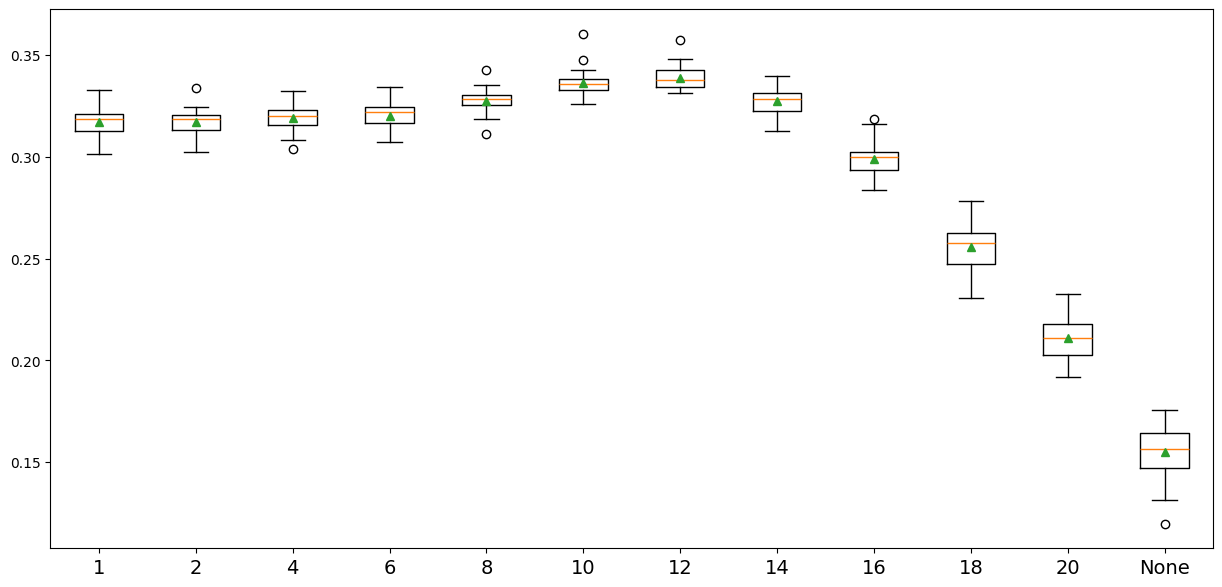

In [82]:
def get_models(value_depth):
    models = dict()
    for value in value_depth:
        models[str(value)] = RandomForestClassifier(class_weight='balanced', max_depth=value, random_state=19)      
    return models

models = get_models([1,2,4,6,8,10,12,14,16,18,20,None])
return_results(models)

Since max_depth=12 was the best depth, we are going to use it in the next visualizations, both for performance and time (not use the default max_depth=None).

#### Number of estimators (The number of trees in the forest)

>10 0.331 (0.006)
>20 0.334 (0.006)
>50 0.338 (0.005)
>100 0.339 (0.006)
>200 0.339 (0.006)
>300 0.340 (0.006)
>400 0.340 (0.006)
>500 0.340 (0.006)


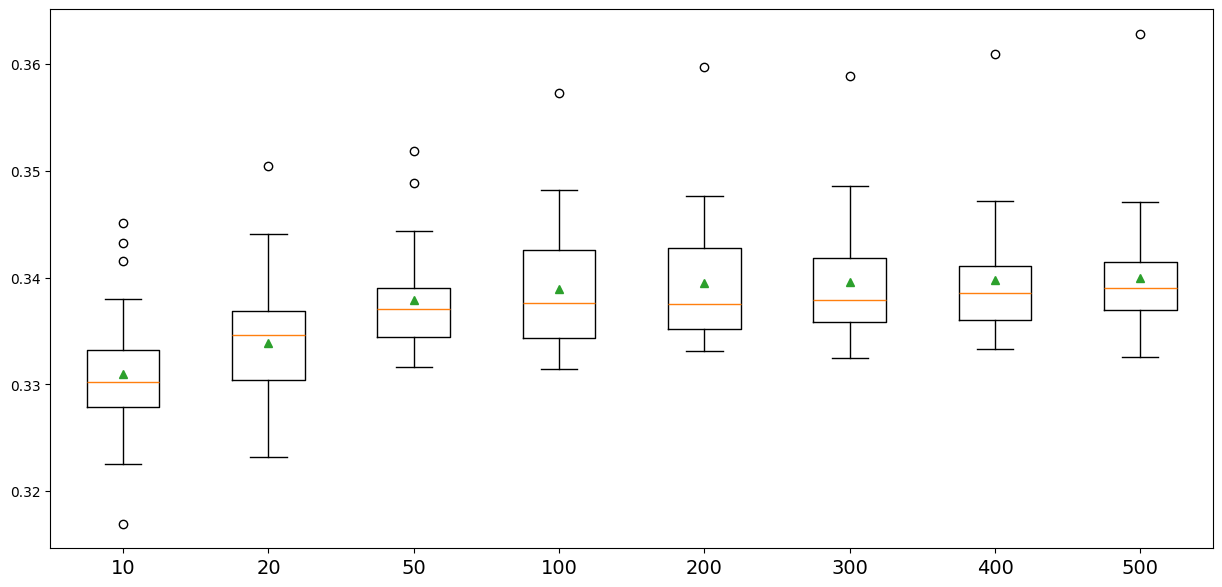

In [83]:
def get_models(value_estimators):
    models = dict()
    for value in value_estimators:
        models[str(value)] = RandomForestClassifier(n_estimators=value,max_depth=12,class_weight='balanced',random_state=19)      
    return models

models = get_models([10,20,50,100,200,300,400,500])
return_results(models)

We can see that after 100 estimators (the default value) it does not improve the score significantly. Having said that, estimators are normally a good parameter to optimize (increase the number) when you have overfitting (for example, when the score in test/kaggle is much lower than on the training).

#### Bootstrap (Whether or not bootstrap samples are used when builiding trees. If False, then the whole dataset is used to build each tree)

>True 0.339 (0.006)
>False 0.338 (0.006)


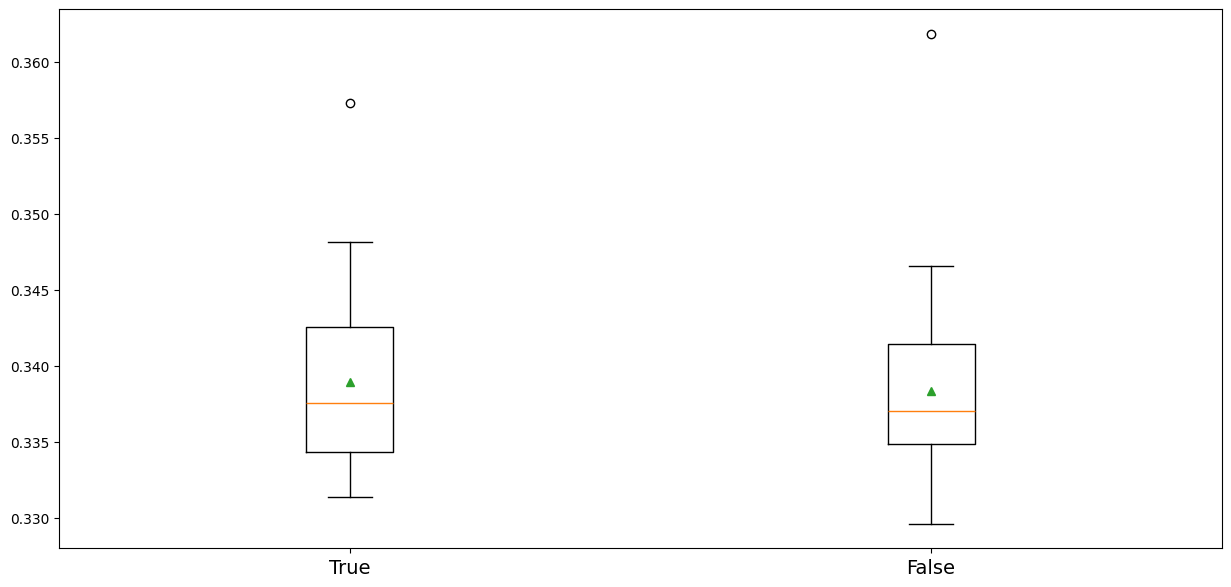

In [84]:
def get_models(value_bootstrap):
    models = dict()
    for value in value_bootstrap:
        models[str(value)] = RandomForestClassifier(bootstrap=value,max_depth=12,class_weight='balanced',random_state=19)      
    return models

models = get_models([True,False])
return_results(models)

#### Max Samples : If bootstrap is True, the number of samples to draw from X to train each base estimator.

>0.2 0.322 (0.008)
>0.4 0.333 (0.007)
>0.6 0.337 (0.006)
>0.8 0.337 (0.006)
>None 0.339 (0.006)


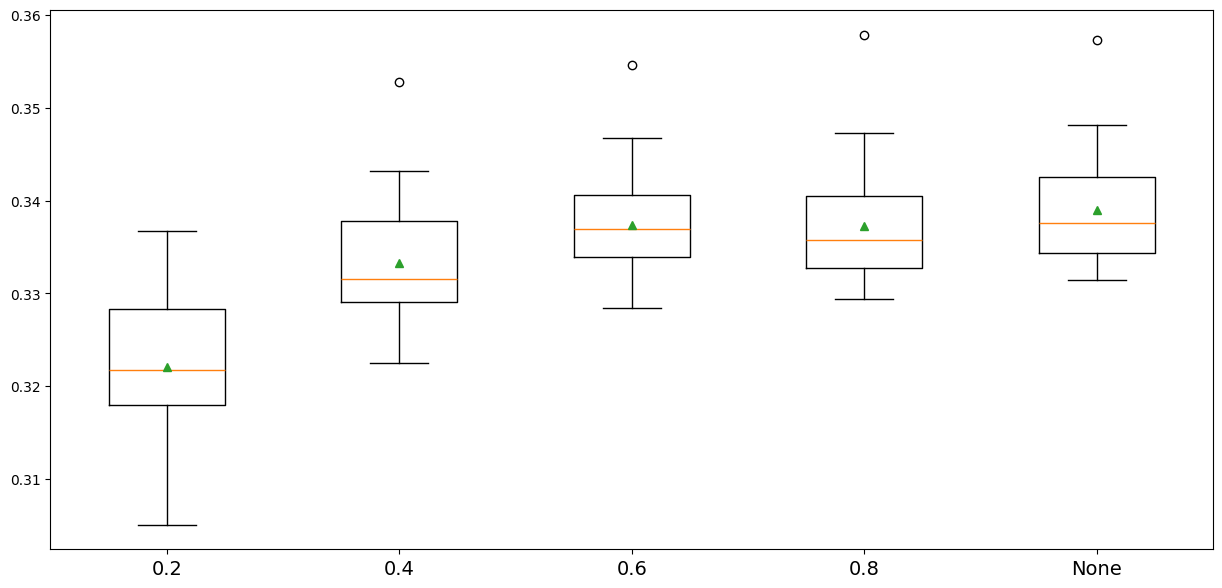

In [85]:
def get_models(value_samples):
    models = dict()
    for value in value_samples:
        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=12,max_samples=value, random_state=19)      
    return models

models = get_models([0.2,0.4,0.6,0.8,None])
return_results(models)

>2 0.339 (0.006)
>10 0.342 (0.007)
>25 0.344 (0.005)
>50 0.343 (0.006)
>100 0.341 (0.006)
>200 0.338 (0.006)
>300 0.336 (0.005)
>400 0.334 (0.006)
>500 0.332 (0.006)


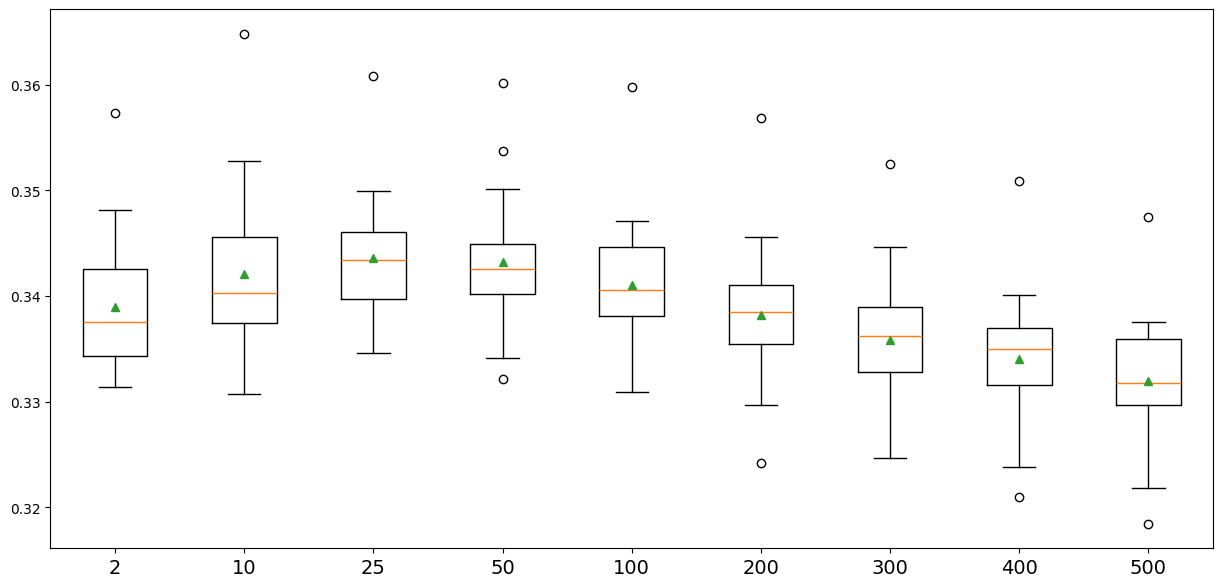

In [155]:
def get_models(value_samples):
    models = dict()
    for value in value_samples:
        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=12,min_samples_split=value, random_state=19)      
    return models

models = get_models([2,10,25,50,100,200,300,400,500])
return_results(models)

>2 0.341 (0.005)
>10 0.344 (0.006)
>25 0.341 (0.006)
>50 0.338 (0.006)
>100 0.333 (0.006)
>200 0.327 (0.006)
>300 0.323 (0.006)
>400 0.320 (0.006)
>500 0.319 (0.006)


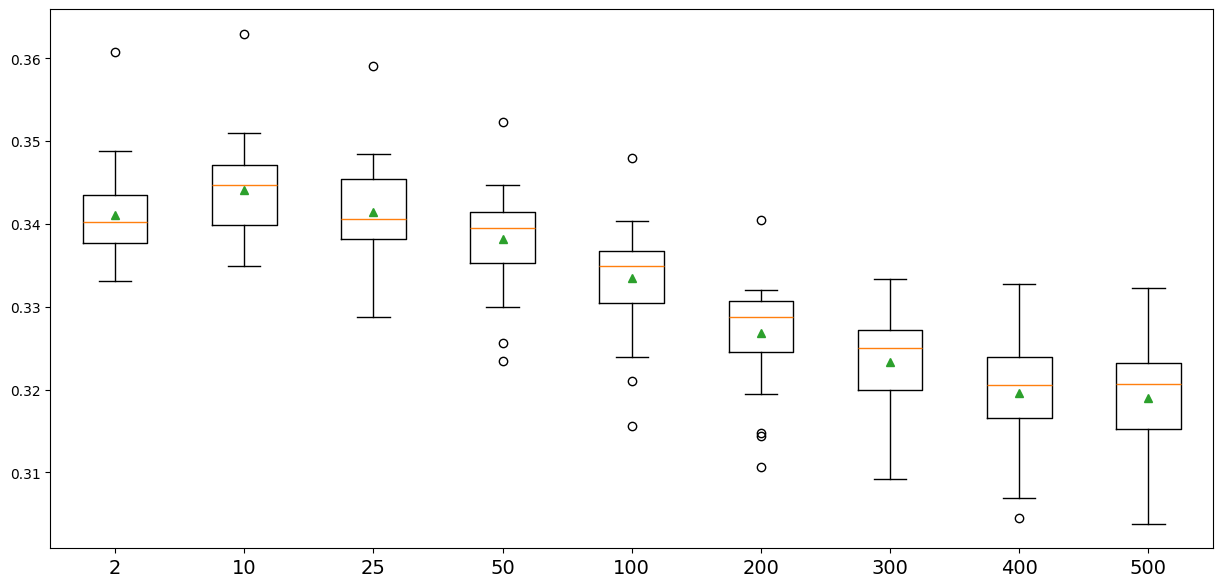

In [156]:
def get_models(value_samples):
    models = dict()
    for value in value_samples:
        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=12,min_samples_leaf=value, random_state=19)      
    return models

models = get_models([2,10,25,50,100,200,300,400,500])
return_results(models)

>gini 0.339 (0.006)
>entropy 0.339 (0.007)
>log_loss 0.339 (0.007)


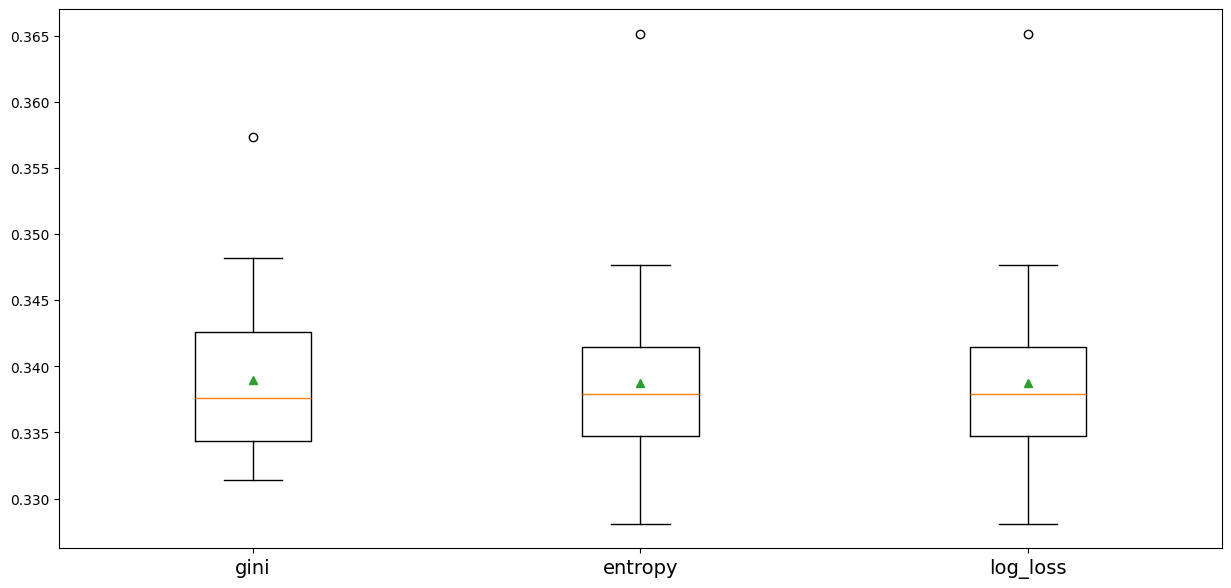

In [157]:
def get_models(value_samples):
    models = dict()
    for value in value_samples:
        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=12,criterion=value, random_state=19)      
    return models

models = get_models(['gini', 'entropy', 'log_loss'])
return_results(models)

>sqrt 0.339 (0.006)
>log2 0.339 (0.006)
>None 0.334 (0.007)


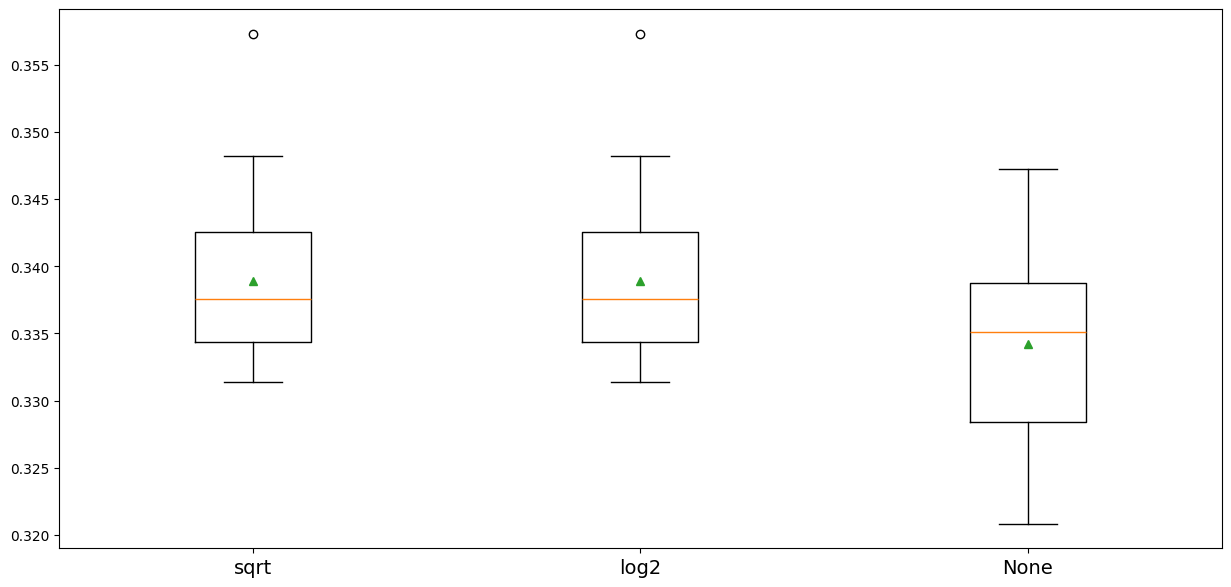

In [158]:
def get_models(value_samples):
    models = dict()
    for value in value_samples:
        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=12,max_features=value, random_state=19)      
    return models

models = get_models(['sqrt', 'log2', None])
return_results(models)

#### Check the feature importance of the variables

In [92]:
model = RandomForestClassifier(class_weight='balanced', max_depth=12, random_state=19)

scores = cross_val_score(model, X_scaled, y_binary, scoring='f1', cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {np.mean(scores)}")

Cross-validation scores: [0.33873691 0.32980973 0.35133641 0.34148777 0.33114414]
Average cross-validation score: 0.33850299065421324


In [93]:
importances = model.fit(X_scaled, y_binary).feature_importances_
pd.Series(importances, index=X_binary_1.columns).sort_values(ascending = False)

number_encounters             0.428321
inpatient_visits              0.144606
discharge_disposition         0.081834
secondary_diagnosis_types     0.079075
primary_diagnosis_types       0.078604
medical_specialty             0.051897
admission_type                0.027229
Has_Insurance                 0.023176
a1c_test_result               0.022938
race_caucasian                0.017619
presc_diabetes_meds_binary    0.015128
glucose_test_result           0.014977
metformin                     0.014597
dtype: float64

In [99]:
result = permutation_importance(
    model.fit(X_scaled, y_binary),  
    X_scaled, 
    y_binary, 
    scoring='f1',
    n_repeats=10, 
    random_state=19, 
    n_jobs=2
)

importances2 = pd.Series(result.importances_mean, index=X_binary_1.columns)
print(importances2.sort_values(ascending=False))

number_encounters             0.180649
inpatient_visits              0.074979
discharge_disposition         0.032729
secondary_diagnosis_types     0.027915
primary_diagnosis_types       0.027493
medical_specialty             0.025340
Has_Insurance                 0.020461
admission_type                0.016207
presc_diabetes_meds_binary    0.015277
race_caucasian                0.013216
metformin                     0.013165
a1c_test_result               0.012013
glucose_test_result           0.006036
dtype: float64


#### Apply out-of-bag samples

#### Out-of-Bag Scoring
If we are using bagging, there’s a chance that a sample would never be selected, while anothers may be selected multiple times. The probability of not selecting a specific sample is (1–1/n), where n is the number of samples. Therefore, the probability of not picking n samples in n draws is (1–1/n)^n. When the value of n is big, we can approximate this probability to 1/e, which is approximately 0.3678. This means that when the dataset is big enough, 37% of its samples are never selected and we could use it to test our model. This is called Out-of-Bag scoring, or OOB Scoring.

Source: https://medium.com/@juniormiranda_23768/ensemble-methods-bagging-and-pasting-in-scikit-learn-723f4183cdf4


#### Advantages of using OOB_Score:
- __No leakage of data:__ Since the model is validated on the OOB Sample, which means data hasn’t been used while training the model in any way, so there isn’t any leakage of data and henceforth ensures a better predictive model. <br>
- __Less Variance :__  [More Variance ~ Overfitting]. Since OOB_Score ensures no leakage, so there is no overfitting of the data and hence least variance. <br>
- __Better Predictive Model:__ OOB_Score helps in the least variance and hence it makes a much better predictive model than a model using other validation techniques. <br>
- __Less Computation:__ It requires less computation as it allows one to test the data as it is being trained.<br>
    
#### Disadvantages of using OOB_Error :
- __Time Consuming:__  The method allows to test the data as it is being trained, but the overall process is a bit time-consuming as compared to other validation techniques. <br>
- __Not good for Large Datasets:__ As the process can be a bit time-consuming in comparison with the other techniques, so if the data size is huge, it may take a lot more time while training the model.<br>
- __Best for Small and medium-size datasets:__ Even if the process is time-consuming, but if the dataset is medium or small sized, OOB_Score should be preferred over other techniques for a much better predictive model.<br>

Source: https://www.analyticsvidhya.com/blog/2020/12/out-of-bag-oob-score-in-the-random-forest-algorithm/

In [130]:
ensemble_clfs_depth = {
        "RF, max_features='sqrt'": RandomForestClassifier(oob_score=True,class_weight='balanced',random_state=19),
        "RF, max_features='log2'": RandomForestClassifier(oob_score=True,max_features='log2',class_weight='balanced',random_state=19),
        "RF, max_features=None": RandomForestClassifier(oob_score=True,max_features=None,class_weight='balanced',random_state=19)
}

In [131]:
min_depth_=8
max_depth_=40

In [132]:
error_rate = dict((label, []) for label in ensemble_clfs_depth)
for label, clf in ensemble_clfs_depth.items():
    for i in range(min_depth_, max_depth_ + 1):
        clf.set_params(max_depth=i)
        clf.fit(X_scaled, y_binary)

        # Record the OOB error for each `max_depth=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

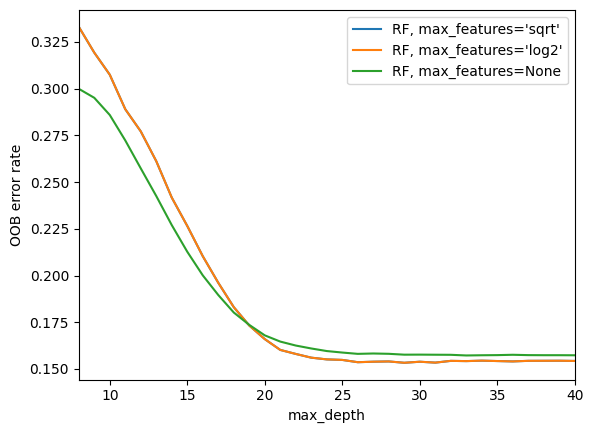

In [133]:
# Generate the "OOB error rate" vs. "max_depth" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_depth_, max_depth_)
plt.xlabel("max_depth")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [119]:
ensemble_clfs = {
        "RF, max_features='sqrt'": RandomForestClassifier(oob_score=True,max_depth=21,class_weight='balanced',random_state=19),
        "RF, max_features='log2'": RandomForestClassifier(oob_score=True,max_features='log2',max_depth=21,class_weight='balanced',random_state=19),
        "RF, max_features=None": RandomForestClassifier(oob_score=True,max_features=None,max_depth=21,class_weight='balanced',random_state=19)
}

In [124]:
min_estimators=50
max_estimators=1000

In [125]:
error_rate = dict((label, []) for label in ensemble_clfs)
for label, clf in ensemble_clfs.items():
    for i in range(min_estimators, max_estimators + 1,10):
        clf.set_params(n_estimators=i)
        clf.fit(X_scaled, y_binary)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

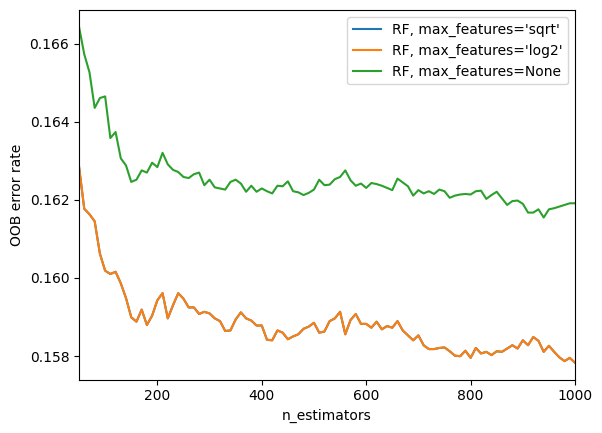

In [126]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [134]:
ensemble_clfs_samples_split = {
        "RF, max_features='log2'": RandomForestClassifier(oob_score=True,max_features='log2',n_estimators=400,max_depth=21,class_weight='balanced',random_state=19),
        "RF, max_features=None": RandomForestClassifier(oob_score=True,max_features=None,n_estimators=400,max_depth=21,class_weight='balanced',random_state=19)
}

In [135]:
number_min_samples_split=10
number_max_samples_split=400

In [136]:
error_rate = dict((label, []) for label in ensemble_clfs_samples_split)
for label, clf in ensemble_clfs_samples_split.items():
    for i in range(number_min_samples_split, number_max_samples_split + 1,10):
        clf.set_params(min_samples_split=i)
        clf.fit(X_scaled, y_binary)

        # Record the OOB error for each `min_samples_split=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

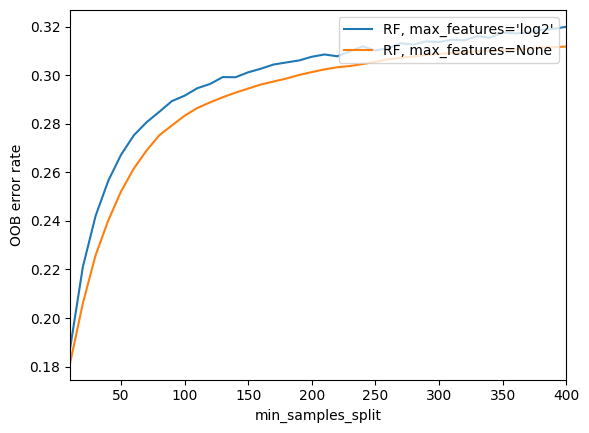

In [137]:
# Generate the "OOB error rate" vs. "min_samples_split" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(number_min_samples_split, number_max_samples_split)
plt.xlabel("min_samples_split")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [141]:
number_min_samples_split_1=2
number_max_samples_split_10=10

In [142]:
error_rate = dict((label, []) for label in ensemble_clfs_samples_split)
for label, clf in ensemble_clfs_samples_split.items():
    for i in range(number_min_samples_split_1, number_max_samples_split_10 + 1):
        clf.set_params(min_samples_split=i)
        clf.fit(X_scaled, y_binary)

        # Record the OOB error for each `min_samples_split=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

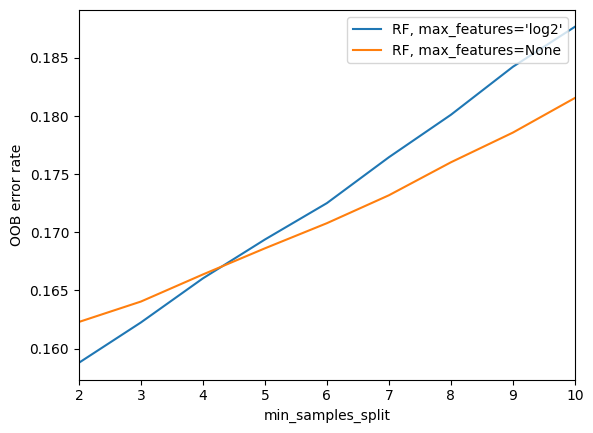

In [143]:
# Generate the "OOB error rate" vs. "min_samples_split" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(number_min_samples_split_1, number_max_samples_split_10)
plt.xlabel("min_samples_split")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [147]:
number_min_samples_leaf=1
number_max_samples_leaf=30

In [148]:
error_rate = dict((label, []) for label in ensemble_clfs_samples_split)
for label, clf in ensemble_clfs_samples_split.items():
    for i in range(number_min_samples_leaf, number_max_samples_leaf + 1):
        clf.set_params(min_samples_leaf=i)
        clf.fit(X_scaled, y_binary)

        # Record the OOB error for each `min_samples_leaf=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

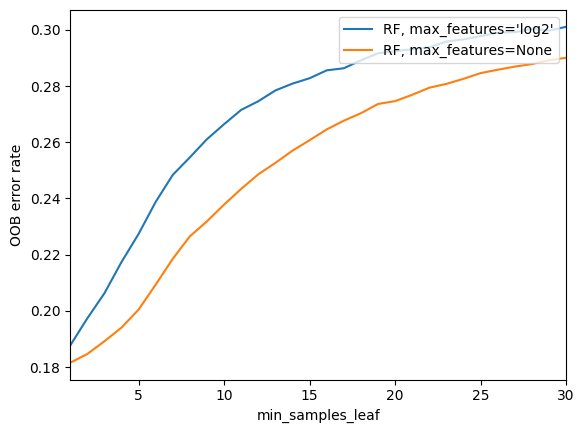

In [149]:
# Generate the "OOB error rate" vs. "min_samples_leaf" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(number_min_samples_leaf, number_max_samples_leaf)
plt.xlabel("min_samples_leaf")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### Grid & Randomized Search

In [268]:
# Define the models
models = [
    RandomForestClassifier(random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'n_estimators': range(200,500,10),
        'criterion': ['gini', 'entropy'],
        'max_depth': [12,13],
        'min_samples_split': range(5,75),
        'min_samples_leaf': range(2,24),
        'max_features': ['sqrt','log2'],
        'class_weight': ['balanced','balanced_subsample']
    } # Random Forest
]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    
    # cv_strat = StratifiedKFold()
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(model, params, cv=10, n_iter=300, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_scaled, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV 1/10; 1/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=47, n_estimators=460
[CV 1/10; 1/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=47, n_estimators=460;, score=0.339 total time=   8.6s
[CV 2/10; 1/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=47, n_estimators=460
[CV 2/10; 1/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=47, n_estimators=460;, score=0.347 total time=   8.5s
[CV 3/10; 1/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=47, n_estimators=460
[CV 3/10; 1/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_fe

[CV 4/10; 3/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=34, n_estimators=440;, score=0.324 total time=  11.1s
[CV 5/10; 3/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=34, n_estimators=440
[CV 5/10; 3/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=34, n_estimators=440;, score=0.336 total time=  11.1s
[CV 6/10; 3/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=34, n_estimators=440
[CV 6/10; 3/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=34, n_estimators=440;, score=0.346 total time=  10.8s
[CV 7/10; 3/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, m

[CV 8/10; 5/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=12, min_samples_split=61, n_estimators=470;, score=0.356 total time=   8.3s
[CV 9/10; 5/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=12, min_samples_split=61, n_estimators=470
[CV 9/10; 5/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=12, min_samples_split=61, n_estimators=470;, score=0.339 total time=   8.6s
[CV 10/10; 5/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=12, min_samples_split=61, n_estimators=470
[CV 10/10; 5/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=12, min_samples_split=61, n_estimators=470;, score=0.343 total time=   8.2s
[CV 1/10; 6/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_sam

[CV 2/10; 8/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=72, n_estimators=260;, score=0.346 total time=   6.2s
[CV 3/10; 8/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=72, n_estimators=260
[CV 3/10; 8/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=72, n_estimators=260;, score=0.360 total time=   6.5s
[CV 4/10; 8/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=72, n_estimators=260
[CV 4/10; 8/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=72, n_estimators=260;, score=0.325 total time=   6.2s
[CV 5/10; 8/300] START class_weight=balanced_subsample, criterion=e

[CV 5/10; 10/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=20, n_estimators=470;, score=0.337 total time=   8.4s
[CV 6/10; 10/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=20, n_estimators=470
[CV 6/10; 10/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=20, n_estimators=470;, score=0.345 total time=   8.0s
[CV 7/10; 10/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=20, n_estimators=470
[CV 7/10; 10/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=20, n_estimators=470;, score=0.338 total time=   8.4s
[CV 8/10; 10/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_sample

[CV 9/10; 12/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=53, n_estimators=350;, score=0.336 total time=   5.9s
[CV 10/10; 12/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=53, n_estimators=350
[CV 10/10; 12/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=53, n_estimators=350;, score=0.342 total time=   5.9s
[CV 1/10; 13/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_samples_split=41, n_estimators=300
[CV 1/10; 13/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_samples_split=41, n_estimators=300;, score=0.342 total time=   7.4s
[CV 2/10; 13/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_featu

[CV 2/10; 15/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=13, min_samples_split=55, n_estimators=380;, score=0.349 total time=   6.6s
[CV 3/10; 15/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=13, min_samples_split=55, n_estimators=380
[CV 3/10; 15/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=13, min_samples_split=55, n_estimators=380;, score=0.363 total time=   6.9s
[CV 4/10; 15/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=13, min_samples_split=55, n_estimators=380
[CV 4/10; 15/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=13, min_samples_split=55, n_estimators=380;, score=0.323 total time=   6.8s
[CV 5/10; 15/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_l

[CV 6/10; 17/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=39, n_estimators=340;, score=0.344 total time=   5.8s
[CV 7/10; 17/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=39, n_estimators=340
[CV 7/10; 17/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=39, n_estimators=340;, score=0.339 total time=   6.2s
[CV 8/10; 17/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=39, n_estimators=340
[CV 8/10; 17/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=39, n_estimators=340;, score=0.353 total time=   5.9s
[CV 9/10; 17/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6

[CV 9/10; 19/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=67, n_estimators=450;, score=0.337 total time=  10.8s
[CV 10/10; 19/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=67, n_estimators=450
[CV 10/10; 19/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=67, n_estimators=450;, score=0.341 total time=  10.8s
[CV 1/10; 20/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=21, min_samples_split=33, n_estimators=370
[CV 1/10; 20/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=21, min_samples_split=33, n_estimators=370;, score=0.339 total time=   6.7s
[CV 2/10; 20/300] START class_weight=balanced, criterion=entropy, max_depth=13, max

[CV 3/10; 22/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=23, min_samples_split=69, n_estimators=240;, score=0.358 total time=   4.3s
[CV 4/10; 22/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=23, min_samples_split=69, n_estimators=240
[CV 4/10; 22/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=23, min_samples_split=69, n_estimators=240;, score=0.326 total time=   4.1s
[CV 5/10; 22/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=23, min_samples_split=69, n_estimators=240
[CV 5/10; 22/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=23, min_samples_split=69, n_estimators=240;, score=0.335 total time=   4.0s
[CV 6/10; 22/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=23, min_sample

[CV 6/10; 24/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=40, n_estimators=350;, score=0.346 total time=   9.0s
[CV 7/10; 24/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=40, n_estimators=350
[CV 7/10; 24/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=40, n_estimators=350;, score=0.338 total time=   8.9s
[CV 8/10; 24/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=40, n_estimators=350
[CV 8/10; 24/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=40, n_estimators=350;, score=0.358 total time=   8.7s
[CV 9/10; 24/300] START class_weight=balanced_subsample, criterion=gini, max_depth

[CV 9/10; 26/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=19, n_estimators=220;, score=0.339 total time=   5.4s
[CV 10/10; 26/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=19, n_estimators=220
[CV 10/10; 26/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=19, n_estimators=220;, score=0.344 total time=   5.7s
[CV 1/10; 27/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=55, n_estimators=300
[CV 1/10; 27/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=55, n_estimators=300;, score=0.342 total time=   7.0s
[CV 2/10; 27/300] START class_weight=balanced_subsample, criterion=gini, max_d

[CV 2/10; 29/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=6, min_samples_split=61, n_estimators=320;, score=0.347 total time=   7.7s
[CV 3/10; 29/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=6, min_samples_split=61, n_estimators=320
[CV 3/10; 29/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=6, min_samples_split=61, n_estimators=320;, score=0.358 total time=   7.8s
[CV 4/10; 29/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=6, min_samples_split=61, n_estimators=320
[CV 4/10; 29/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=6, min_samples_split=61, n_estimators=320;, score=0.322 total time=   7.6s
[CV 5/10; 29/300] START class_weight=balanced_subsample, criterion=

[CV 6/10; 31/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=19, min_samples_split=27, n_estimators=450;, score=0.348 total time=  11.2s
[CV 7/10; 31/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=19, min_samples_split=27, n_estimators=450
[CV 7/10; 31/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=19, min_samples_split=27, n_estimators=450;, score=0.344 total time=  11.2s
[CV 8/10; 31/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=19, min_samples_split=27, n_estimators=450
[CV 8/10; 31/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=19, min_samples_split=27, n_estimators=450;, score=0.355 total time=  10.9s
[CV 9/10; 31/300] START class_weight=balanced_subsample, criterion=gini, max_

[CV 9/10; 33/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=19, min_samples_split=62, n_estimators=460;, score=0.338 total time=  11.3s
[CV 10/10; 33/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=19, min_samples_split=62, n_estimators=460
[CV 10/10; 33/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=19, min_samples_split=62, n_estimators=460;, score=0.340 total time=  11.1s
[CV 1/10; 34/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=61, n_estimators=330
[CV 1/10; 34/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=61, n_estimators=330;, score=0.342 total time=   7.9s
[CV 2/10; 34/300] START class_weight=balanced_subsample, cri

[CV 2/10; 36/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=420;, score=0.347 total time=   7.4s
[CV 3/10; 36/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=420
[CV 3/10; 36/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=420;, score=0.359 total time=   7.1s
[CV 4/10; 36/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=420
[CV 4/10; 36/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=420;, score=0.322 total time=   7.2s
[CV 5/10; 36/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_sample

[CV 6/10; 38/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=37, n_estimators=340;, score=0.347 total time=   8.9s
[CV 7/10; 38/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=37, n_estimators=340
[CV 7/10; 38/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=37, n_estimators=340;, score=0.340 total time=   8.5s
[CV 8/10; 38/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=37, n_estimators=340
[CV 8/10; 38/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=37, n_estimators=340;, score=0.358 total time=   8.9s
[CV 9/10; 38/300] START class_weight=balanced_subsample, criterion=

[CV 10/10; 40/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=21, min_samples_split=8, n_estimators=210;, score=0.339 total time=   3.4s
[CV 1/10; 41/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=68, n_estimators=250
[CV 1/10; 41/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=68, n_estimators=250;, score=0.343 total time=   6.3s
[CV 2/10; 41/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=68, n_estimators=250
[CV 2/10; 41/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=68, n_estimators=250;, score=0.350 total time=   6.0s
[CV 3/10; 41/300] START class_weight=balanced_subsample, criterion=entropy, max

[CV 3/10; 43/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=10, min_samples_split=25, n_estimators=240;, score=0.361 total time=   4.1s
[CV 4/10; 43/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=10, min_samples_split=25, n_estimators=240
[CV 4/10; 43/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=10, min_samples_split=25, n_estimators=240;, score=0.326 total time=   4.4s
[CV 5/10; 43/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=10, min_samples_split=25, n_estimators=240
[CV 5/10; 43/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=10, min_samples_split=25, n_estimators=240;, score=0.338 total time=   4.1s
[CV 6/10; 43/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=10, min_sample

[CV 7/10; 45/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=12, min_samples_split=29, n_estimators=280;, score=0.337 total time=   6.6s
[CV 8/10; 45/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=12, min_samples_split=29, n_estimators=280
[CV 8/10; 45/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=12, min_samples_split=29, n_estimators=280;, score=0.358 total time=   7.1s
[CV 9/10; 45/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=12, min_samples_split=29, n_estimators=280
[CV 9/10; 45/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=12, min_samples_split=29, n_estimators=280;, score=0.337 total time=   6.7s
[CV 10/10; 45/300] START class_weight=balanced_subsample, criterion=gini, max

[CV 1/10; 48/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=31, n_estimators=330;, score=0.341 total time=   8.2s
[CV 2/10; 48/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=31, n_estimators=330
[CV 2/10; 48/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=31, n_estimators=330;, score=0.346 total time=   7.9s
[CV 3/10; 48/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=31, n_estimators=330
[CV 3/10; 48/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=31, n_estimators=330;, score=0.360 total time=   8.3s
[CV 4/10; 48/300] START class_weight=balanced_subsample, criterion=gini, max_

[CV 5/10; 50/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=13, min_samples_split=32, n_estimators=300;, score=0.337 total time=   5.0s
[CV 6/10; 50/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=13, min_samples_split=32, n_estimators=300
[CV 6/10; 50/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=13, min_samples_split=32, n_estimators=300;, score=0.346 total time=   5.4s
[CV 7/10; 50/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=13, min_samples_split=32, n_estimators=300
[CV 7/10; 50/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=13, min_samples_split=32, n_estimators=300;, score=0.341 total time=   5.1s
[CV 8/10; 50/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=13, min_sample

[CV 9/10; 52/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=280;, score=0.341 total time=   5.8s
[CV 10/10; 52/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=280
[CV 10/10; 52/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=280;, score=0.349 total time=   5.5s
[CV 1/10; 53/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=11, min_samples_split=58, n_estimators=370
[CV 1/10; 53/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=11, min_samples_split=58, n_estimators=370;, score=0.340 total time=   6.3s
[CV 2/10; 53/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=11, min_s

[CV 3/10; 55/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=16, min_samples_split=49, n_estimators=410;, score=0.361 total time=   7.0s
[CV 4/10; 55/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=16, min_samples_split=49, n_estimators=410
[CV 4/10; 55/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=16, min_samples_split=49, n_estimators=410;, score=0.323 total time=   7.6s
[CV 5/10; 55/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=16, min_samples_split=49, n_estimators=410
[CV 5/10; 55/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=16, min_samples_split=49, n_estimators=410;, score=0.336 total time=   7.1s
[CV 6/10; 55/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=16, min_sample

[CV 7/10; 57/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=15, min_samples_split=74, n_estimators=330;, score=0.338 total time=   7.6s
[CV 8/10; 57/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=15, min_samples_split=74, n_estimators=330
[CV 8/10; 57/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=15, min_samples_split=74, n_estimators=330;, score=0.353 total time=   8.0s
[CV 9/10; 57/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=15, min_samples_split=74, n_estimators=330
[CV 9/10; 57/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=15, min_samples_split=74, n_estimators=330;, score=0.336 total time=   7.7s
[CV 10/10; 57/300] START class_weight=balanced_subsample, crit

[CV 1/10; 60/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=59, n_estimators=410;, score=0.344 total time=  10.3s
[CV 2/10; 60/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=59, n_estimators=410
[CV 2/10; 60/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=59, n_estimators=410;, score=0.348 total time=  10.0s
[CV 3/10; 60/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=59, n_estimators=410
[CV 3/10; 60/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=59, n_estimators=410;, score=0.361 total time=  10.4s
[CV 4/10; 60/300] START class_weight=balanced_subsample, criterion=

[CV 4/10; 62/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=67, n_estimators=370;, score=0.322 total time=   8.7s
[CV 5/10; 62/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=67, n_estimators=370
[CV 5/10; 62/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=67, n_estimators=370;, score=0.335 total time=   9.1s
[CV 6/10; 62/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=67, n_estimators=370
[CV 6/10; 62/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=67, n_estimators=370;, score=0.343 total time=   8.8s
[CV 7/10; 62/300] START class_weight=balanced_subsample, criterion=

[CV 7/10; 64/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=70, n_estimators=460;, score=0.340 total time=  11.2s
[CV 8/10; 64/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=70, n_estimators=460
[CV 8/10; 64/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=70, n_estimators=460;, score=0.355 total time=  11.2s
[CV 9/10; 64/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=70, n_estimators=460
[CV 9/10; 64/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22, min_samples_split=70, n_estimators=460;, score=0.338 total time=  11.0s
[CV 10/10; 64/300] START class_weight=balanced_subsample, crit

[CV 10/10; 66/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=21, n_estimators=400;, score=0.345 total time=   7.2s
[CV 1/10; 67/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=30, n_estimators=200
[CV 1/10; 67/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=30, n_estimators=200;, score=0.344 total time=   3.4s
[CV 2/10; 67/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=30, n_estimators=200
[CV 2/10; 67/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=30, n_estimators=200;, score=0.351 total time=   3.5s
[CV 3/10; 67/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_spl

[CV 4/10; 69/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=40, n_estimators=270;, score=0.325 total time=   4.5s
[CV 5/10; 69/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=40, n_estimators=270
[CV 5/10; 69/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=40, n_estimators=270;, score=0.335 total time=   4.7s
[CV 6/10; 69/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=40, n_estimators=270
[CV 6/10; 69/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15, min_samples_split=40, n_estimators=270;, score=0.343 total time=   4.7s
[CV 7/10; 69/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_l

[CV 8/10; 71/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimators=370;, score=0.357 total time=   9.1s
[CV 9/10; 71/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimators=370
[CV 9/10; 71/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimators=370;, score=0.341 total time=   9.4s
[CV 10/10; 71/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimators=370
[CV 10/10; 71/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimators=370;, score=0.347 total time=   9.3s
[CV 1/10; 72/300] START class_weight=balanced, criterion=entropy, max_depth=12, 

[CV 1/10; 74/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=14, min_samples_split=32, n_estimators=360;, score=0.343 total time=   6.5s
[CV 2/10; 74/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=14, min_samples_split=32, n_estimators=360
[CV 2/10; 74/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=14, min_samples_split=32, n_estimators=360;, score=0.351 total time=   6.4s
[CV 3/10; 74/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=14, min_samples_split=32, n_estimators=360
[CV 3/10; 74/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=14, min_samples_split=32, n_estimators=360;, score=0.365 total time=   6.3s
[CV 4/10; 74/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=14, min_sample

[CV 5/10; 76/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=66, n_estimators=390;, score=0.336 total time=   9.3s
[CV 6/10; 76/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=66, n_estimators=390
[CV 6/10; 76/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=66, n_estimators=390;, score=0.344 total time=   9.0s
[CV 7/10; 76/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=66, n_estimators=390
[CV 7/10; 76/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=66, n_estimators=390;, score=0.338 total time=   9.5s
[CV 8/10; 76/300] START class_weight=balanced_subsample, criterion=gini, max_

[CV 9/10; 78/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=13, min_samples_split=48, n_estimators=300;, score=0.340 total time=   5.5s
[CV 10/10; 78/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=13, min_samples_split=48, n_estimators=300
[CV 10/10; 78/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=13, min_samples_split=48, n_estimators=300;, score=0.346 total time=   5.2s
[CV 1/10; 79/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=17, n_estimators=430
[CV 1/10; 79/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=17, n_estimators=430;, score=0.334 total time=  11.7s
[CV 2/10; 79/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_feature

[CV 2/10; 81/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=320;, score=0.345 total time=   7.8s
[CV 3/10; 81/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=320
[CV 3/10; 81/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=320;, score=0.360 total time=   7.5s
[CV 4/10; 81/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=320
[CV 4/10; 81/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=320;, score=0.324 total time=   7.8s
[CV 5/10; 81/300] START class_weight=balanced_subsample, criterion=gini, max_

[CV 5/10; 83/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=35, n_estimators=490;, score=0.337 total time=  12.5s
[CV 6/10; 83/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=35, n_estimators=490
[CV 6/10; 83/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=35, n_estimators=490;, score=0.345 total time=  12.4s
[CV 7/10; 83/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=35, n_estimators=490
[CV 7/10; 83/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=35, n_estimators=490;, score=0.342 total time=  12.4s
[CV 8/10; 83/300] START class_weight=balanced_subsample, criterion=gini, max_depth

[CV 8/10; 85/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=320;, score=0.354 total time=   8.1s
[CV 9/10; 85/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=320
[CV 9/10; 85/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=320;, score=0.338 total time=   8.1s
[CV 10/10; 85/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=320
[CV 10/10; 85/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=320;, score=0.343 total time=   8.1s
[CV 1/10; 86/300] START class_weight=balanced_subsample, criterio

[CV 1/10; 88/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=67, n_estimators=480;, score=0.342 total time=   8.4s
[CV 2/10; 88/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=67, n_estimators=480
[CV 2/10; 88/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=67, n_estimators=480;, score=0.352 total time=   8.8s
[CV 3/10; 88/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=67, n_estimators=480
[CV 3/10; 88/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=67, n_estimators=480;, score=0.364 total time=   8.6s
[CV 4/10; 88/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_spli

[CV 5/10; 90/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=420;, score=0.338 total time=  10.3s
[CV 6/10; 90/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=420
[CV 6/10; 90/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=420;, score=0.348 total time=  10.0s
[CV 7/10; 90/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=420
[CV 7/10; 90/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=420;, score=0.343 total time=  10.4s
[CV 8/10; 90/300] START class_weight=balanced_subsample, criterion=gini, max_

[CV 8/10; 92/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=19, n_estimators=210;, score=0.358 total time=   5.3s
[CV 9/10; 92/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=19, n_estimators=210
[CV 9/10; 92/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=19, n_estimators=210;, score=0.340 total time=   5.4s
[CV 10/10; 92/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=19, n_estimators=210
[CV 10/10; 92/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=19, n_estimators=210;, score=0.349 total time=   5.5s
[CV 1/10; 93/300] START class_weight=balanced, criterion=entropy,

[CV 1/10; 95/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=21, min_samples_split=28, n_estimators=480;, score=0.343 total time=  11.5s
[CV 2/10; 95/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=21, min_samples_split=28, n_estimators=480
[CV 2/10; 95/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=21, min_samples_split=28, n_estimators=480;, score=0.349 total time=  11.9s
[CV 3/10; 95/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=21, min_samples_split=28, n_estimators=480
[CV 3/10; 95/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=21, min_samples_split=28, n_estimators=480;, score=0.361 total time=  12.0s
[CV 4/10; 95/300] START class_weight=balanced_subsample, criterion=gini, max_

[CV 4/10; 97/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=69, n_estimators=390;, score=0.323 total time=   6.8s
[CV 5/10; 97/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=69, n_estimators=390
[CV 5/10; 97/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=69, n_estimators=390;, score=0.337 total time=   6.5s
[CV 6/10; 97/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=69, n_estimators=390
[CV 6/10; 97/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=69, n_estimators=390;, score=0.343 total time=   6.8s
[CV 7/10; 97/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_spli

[CV 7/10; 99/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=69, n_estimators=370;, score=0.337 total time=   8.9s
[CV 8/10; 99/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=69, n_estimators=370
[CV 8/10; 99/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=69, n_estimators=370;, score=0.354 total time=   9.0s
[CV 9/10; 99/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=69, n_estimators=370
[CV 9/10; 99/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=69, n_estimators=370;, score=0.337 total time=   8.8s
[CV 10/10; 99/300] START class_weight=balanced_subsample, criterion=gini, max_dept

[CV 10/10; 101/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=16, min_samples_split=70, n_estimators=410;, score=0.343 total time=  10.0s
[CV 1/10; 102/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18, min_samples_split=13, n_estimators=310
[CV 1/10; 102/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18, min_samples_split=13, n_estimators=310;, score=0.341 total time=   5.3s
[CV 2/10; 102/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18, min_samples_split=13, n_estimators=310
[CV 2/10; 102/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18, min_samples_split=13, n_estimators=310;, score=0.346 total time=   5.3s
[CV 3/10; 102/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_le

[CV 3/10; 104/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=68, n_estimators=400;, score=0.361 total time=   9.5s
[CV 4/10; 104/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=68, n_estimators=400
[CV 4/10; 104/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=68, n_estimators=400;, score=0.324 total time=   9.8s
[CV 5/10; 104/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=68, n_estimators=400
[CV 5/10; 104/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=68, n_estimators=400;, score=0.335 total time=   9.7s
[CV 6/10; 104/300] START class_weight=balanced_subsample, crit

[CV 6/10; 106/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=260;, score=0.349 total time=   5.2s
[CV 7/10; 106/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=260
[CV 7/10; 106/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=260;, score=0.342 total time=   4.9s
[CV 8/10; 106/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=260
[CV 8/10; 106/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=260;, score=0.361 total time=   4.9s
[CV 9/10; 106/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_sample

[CV 9/10; 108/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=370;, score=0.339 total time=   9.4s
[CV 10/10; 108/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=370
[CV 10/10; 108/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=370;, score=0.345 total time=   9.4s
[CV 1/10; 109/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=310
[CV 1/10; 109/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=310;, score=0.342 total time=   5.2s
[CV 2/10; 109/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2,

[CV 2/10; 111/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=390;, score=0.353 total time=  10.2s
[CV 3/10; 111/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=390
[CV 3/10; 111/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=390;, score=0.367 total time=  10.3s
[CV 4/10; 111/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=390
[CV 4/10; 111/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=390;, score=0.320 total time=   9.9s
[CV 5/10; 111/300] START class_weight=balanced_subsample, crit

[CV 6/10; 113/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_samples_split=74, n_estimators=360;, score=0.347 total time=   6.0s
[CV 7/10; 113/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_samples_split=74, n_estimators=360
[CV 7/10; 113/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_samples_split=74, n_estimators=360;, score=0.340 total time=   6.2s
[CV 8/10; 113/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_samples_split=74, n_estimators=360
[CV 8/10; 113/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_samples_split=74, n_estimators=360;, score=0.354 total time=   6.1s
[CV 9/10; 113/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=23, min_

[CV 10/10; 115/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=58, n_estimators=490;, score=0.342 total time=   8.7s
[CV 1/10; 116/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=18, min_samples_split=42, n_estimators=450
[CV 1/10; 116/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=18, min_samples_split=42, n_estimators=450;, score=0.340 total time=   7.4s
[CV 2/10; 116/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=18, min_samples_split=42, n_estimators=450
[CV 2/10; 116/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=18, min_samples_split=42, n_estimators=450;, score=0.346 total time=   7.8s
[CV 3/10; 116/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=18, m

[CV 4/10; 118/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=71, n_estimators=330;, score=0.324 total time=   6.0s
[CV 5/10; 118/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=71, n_estimators=330
[CV 5/10; 118/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=71, n_estimators=330;, score=0.339 total time=   5.8s
[CV 6/10; 118/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=71, n_estimators=330
[CV 6/10; 118/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=71, n_estimators=330;, score=0.343 total time=   5.7s
[CV 7/10; 118/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_

[CV 7/10; 120/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=270;, score=0.340 total time=   6.9s
[CV 8/10; 120/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=270
[CV 8/10; 120/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=270;, score=0.354 total time=   6.6s
[CV 9/10; 120/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=270
[CV 9/10; 120/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=270;, score=0.338 total time=   6.6s
[CV 10/10; 120/300] START class_weight=balanced_subsample, criterion=gini, ma

[CV 1/10; 123/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=9, n_estimators=360;, score=0.341 total time=   6.0s
[CV 2/10; 123/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=9, n_estimators=360
[CV 2/10; 123/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=9, n_estimators=360;, score=0.347 total time=   6.2s
[CV 3/10; 123/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=9, n_estimators=360
[CV 3/10; 123/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=18, min_samples_split=9, n_estimators=360;, score=0.360 total time=   6.2s
[CV 4/10; 123/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_

[CV 4/10; 125/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=17, n_estimators=320;, score=0.323 total time=   8.5s
[CV 5/10; 125/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=17, n_estimators=320
[CV 5/10; 125/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=17, n_estimators=320;, score=0.339 total time=   8.1s
[CV 6/10; 125/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=17, n_estimators=320
[CV 6/10; 125/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=17, n_estimators=320;, score=0.347 total time=   8.5s
[CV 7/10; 125/300] START class_weight=balanced_subsample, criterion=gini, max

[CV 7/10; 127/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=410;, score=0.345 total time=  10.6s
[CV 8/10; 127/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=410
[CV 8/10; 127/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=410;, score=0.359 total time=  10.6s
[CV 9/10; 127/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=410
[CV 9/10; 127/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=410;, score=0.340 total time=  10.3s
[CV 10/10; 127/300] START class_weight=balanced_subsample

[CV 10/10; 129/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=23, n_estimators=220;, score=0.345 total time=   5.3s
[CV 1/10; 130/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=42, n_estimators=480
[CV 1/10; 130/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=42, n_estimators=480;, score=0.339 total time=  11.5s
[CV 2/10; 130/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=42, n_estimators=480
[CV 2/10; 130/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=23, min_samples_split=42, n_estimators=480;, score=0.346 total time=  11.6s
[CV 3/10; 130/300] START class_weight=balanced_subsample

[CV 3/10; 132/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=19, n_estimators=420;, score=0.365 total time=  10.6s
[CV 4/10; 132/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=19, n_estimators=420
[CV 4/10; 132/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=19, n_estimators=420;, score=0.322 total time=  10.6s
[CV 5/10; 132/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=19, n_estimators=420
[CV 5/10; 132/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=19, n_estimators=420;, score=0.341 total time=  10.3s
[CV 6/10; 132/300] START class_weight=balanced_subsample, criterion=gini, max

[CV 7/10; 134/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=22, n_estimators=340;, score=0.343 total time=   6.2s
[CV 8/10; 134/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=22, n_estimators=340
[CV 8/10; 134/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=22, n_estimators=340;, score=0.356 total time=   6.5s
[CV 9/10; 134/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=22, n_estimators=340
[CV 9/10; 134/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=22, n_estimators=340;, score=0.341 total time=   6.2s
[CV 10/10; 134/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min

[CV 1/10; 137/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=11, n_estimators=480;, score=0.342 total time=  12.5s
[CV 2/10; 137/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=11, n_estimators=480
[CV 2/10; 137/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=11, n_estimators=480;, score=0.359 total time=  12.6s
[CV 3/10; 137/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=11, n_estimators=480
[CV 3/10; 137/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=11, n_estimators=480;, score=0.365 total time=  12.7s
[CV 4/10; 137/300] START class_weight=balanced_subsample, criterion=gini, max

[CV 5/10; 139/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=68, n_estimators=490;, score=0.335 total time=   8.1s
[CV 6/10; 139/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=68, n_estimators=490
[CV 6/10; 139/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=68, n_estimators=490;, score=0.346 total time=   8.3s
[CV 7/10; 139/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=68, n_estimators=490
[CV 7/10; 139/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=68, n_estimators=490;, score=0.338 total time=   8.0s
[CV 8/10; 139/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_

[CV 9/10; 141/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=430;, score=0.338 total time=  10.3s
[CV 10/10; 141/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=430
[CV 10/10; 141/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=430;, score=0.344 total time=  10.7s
[CV 1/10; 142/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=52, n_estimators=430
[CV 1/10; 142/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=52, n_estimators=430;, score=0.344 total time=  10.4s
[CV 2/10; 142/300] START class_weight=balanced_subsample, criterion=gi

[CV 2/10; 144/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=470;, score=0.350 total time=  11.7s
[CV 3/10; 144/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=470
[CV 3/10; 144/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=470;, score=0.362 total time=  11.8s
[CV 4/10; 144/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=470
[CV 4/10; 144/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=470;, score=0.322 total time=  11.8s
[CV 5/10; 144/300] START class_weight=balanced_subsample, crit

[CV 5/10; 146/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=30, n_estimators=430;, score=0.336 total time=  11.0s
[CV 6/10; 146/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=30, n_estimators=430
[CV 6/10; 146/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=30, n_estimators=430;, score=0.343 total time=  10.8s
[CV 7/10; 146/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=30, n_estimators=430
[CV 7/10; 146/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=30, n_estimators=430;, score=0.339 total time=  11.0s
[CV 8/10; 146/300] START class_weight=balanced_subsample, crit

[CV 9/10; 148/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=30, n_estimators=270;, score=0.339 total time=   4.6s
[CV 10/10; 148/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=30, n_estimators=270
[CV 10/10; 148/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=30, n_estimators=270;, score=0.341 total time=   4.5s
[CV 1/10; 149/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=74, n_estimators=380
[CV 1/10; 149/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=74, n_estimators=380;, score=0.341 total time=   9.3s
[CV 2/10; 149/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features

[CV 2/10; 151/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=69, n_estimators=480;, score=0.350 total time=  12.0s
[CV 3/10; 151/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=69, n_estimators=480
[CV 3/10; 151/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=69, n_estimators=480;, score=0.363 total time=  12.1s
[CV 4/10; 151/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=69, n_estimators=480
[CV 4/10; 151/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=69, n_estimators=480;, score=0.323 total time=  12.1s
[CV 5/10; 151/300] START class_weight=balanced_subsample, crit

[CV 5/10; 153/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=17, min_samples_split=18, n_estimators=480;, score=0.338 total time=   8.0s
[CV 6/10; 153/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=17, min_samples_split=18, n_estimators=480
[CV 6/10; 153/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=17, min_samples_split=18, n_estimators=480;, score=0.348 total time=   9.0s
[CV 7/10; 153/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=17, min_samples_split=18, n_estimators=480
[CV 7/10; 153/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=17, min_samples_split=18, n_estimators=480;, score=0.340 total time=  10.0s
[CV 8/10; 153/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_sam

[CV 8/10; 155/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=410;, score=0.355 total time=   7.1s
[CV 9/10; 155/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=410
[CV 9/10; 155/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=410;, score=0.336 total time=   7.2s
[CV 10/10; 155/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=410
[CV 10/10; 155/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=410;, score=0.342 total time=   7.4s
[CV 1/10; 156/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_s

[CV 2/10; 158/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=44, n_estimators=380;, score=0.348 total time=   6.8s
[CV 3/10; 158/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=44, n_estimators=380
[CV 3/10; 158/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=44, n_estimators=380;, score=0.361 total time=   6.9s
[CV 4/10; 158/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=44, n_estimators=380
[CV 4/10; 158/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=44, n_estimators=380;, score=0.322 total time=   6.8s
[CV 5/10; 158/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_

[CV 5/10; 160/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=68, n_estimators=490;, score=0.335 total time=   8.4s
[CV 6/10; 160/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=68, n_estimators=490
[CV 6/10; 160/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=68, n_estimators=490;, score=0.343 total time=   8.1s
[CV 7/10; 160/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=68, n_estimators=490
[CV 7/10; 160/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=68, n_estimators=490;, score=0.338 total time=   8.2s
[CV 8/10; 160/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_

[CV 9/10; 162/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=49, n_estimators=430;, score=0.340 total time=   8.3s
[CV 10/10; 162/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=49, n_estimators=430
[CV 10/10; 162/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=49, n_estimators=430;, score=0.347 total time=   7.9s
[CV 1/10; 163/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=14, min_samples_split=26, n_estimators=380
[CV 1/10; 163/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=14, min_samples_split=26, n_estimators=380;, score=0.343 total time=   9.9s
[CV 2/10; 163/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sq

[CV 2/10; 165/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=21, min_samples_split=20, n_estimators=300;, score=0.344 total time=   5.1s
[CV 3/10; 165/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=21, min_samples_split=20, n_estimators=300
[CV 3/10; 165/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=21, min_samples_split=20, n_estimators=300;, score=0.359 total time=   5.2s
[CV 4/10; 165/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=21, min_samples_split=20, n_estimators=300
[CV 4/10; 165/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=21, min_samples_split=20, n_estimators=300;, score=0.327 total time=   5.6s
[CV 5/10; 165/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=21, min_

[CV 6/10; 167/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=14, min_samples_split=59, n_estimators=260;, score=0.348 total time=   4.6s
[CV 7/10; 167/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=14, min_samples_split=59, n_estimators=260
[CV 7/10; 167/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=14, min_samples_split=59, n_estimators=260;, score=0.338 total time=   4.8s
[CV 8/10; 167/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=14, min_samples_split=59, n_estimators=260
[CV 8/10; 167/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=14, min_samples_split=59, n_estimators=260;, score=0.357 total time=   4.8s
[CV 9/10; 167/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_sam

[CV 9/10; 169/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=9, min_samples_split=48, n_estimators=390;, score=0.335 total time=   6.9s
[CV 10/10; 169/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=9, min_samples_split=48, n_estimators=390
[CV 10/10; 169/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=9, min_samples_split=48, n_estimators=390;, score=0.341 total time=   7.0s
[CV 1/10; 170/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=420
[CV 1/10; 170/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=420;, score=0.341 total time=   7.4s
[CV 2/10; 170/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=7, m

[CV 2/10; 172/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=25, n_estimators=430;, score=0.352 total time=  11.2s
[CV 3/10; 172/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=25, n_estimators=430
[CV 3/10; 172/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=25, n_estimators=430;, score=0.366 total time=  11.0s
[CV 4/10; 172/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=25, n_estimators=430
[CV 4/10; 172/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=25, n_estimators=430;, score=0.319 total time=  10.5s
[CV 5/10; 172/300] START class_weight=balanced_subsample, crit

[CV 5/10; 174/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=46, n_estimators=470;, score=0.335 total time=   8.3s
[CV 6/10; 174/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=46, n_estimators=470
[CV 6/10; 174/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=46, n_estimators=470;, score=0.343 total time=   7.9s
[CV 7/10; 174/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=46, n_estimators=470
[CV 7/10; 174/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=46, n_estimators=470;, score=0.336 total time=   8.3s
[CV 8/10; 174/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_

[CV 9/10; 176/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=70, n_estimators=420;, score=0.339 total time=   7.2s
[CV 10/10; 176/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=70, n_estimators=420
[CV 10/10; 176/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=70, n_estimators=420;, score=0.345 total time=   7.9s
[CV 1/10; 177/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=66, n_estimators=450
[CV 1/10; 177/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=66, n_estimators=450;, score=0.342 total time=   8.4s
[CV 2/10; 177/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_le

[CV 3/10; 179/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=37, n_estimators=320;, score=0.363 total time=   8.6s
[CV 4/10; 179/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=37, n_estimators=320
[CV 4/10; 179/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=37, n_estimators=320;, score=0.322 total time=   8.3s
[CV 5/10; 179/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=37, n_estimators=320
[CV 5/10; 179/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=37, n_estimators=320;, score=0.336 total time=   9.2s
[CV 6/10; 179/300] START class_weight=balanced_subsample, criterion=gini, max

[CV 7/10; 181/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=62, n_estimators=410;, score=0.339 total time=   7.2s
[CV 8/10; 181/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=62, n_estimators=410
[CV 8/10; 181/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=62, n_estimators=410;, score=0.355 total time=   7.6s
[CV 9/10; 181/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=62, n_estimators=410
[CV 9/10; 181/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=62, n_estimators=410;, score=0.335 total time=   7.8s
[CV 10/10; 181/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=8, min_sampl

[CV 1/10; 184/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=69, n_estimators=330;, score=0.340 total time=   5.5s
[CV 2/10; 184/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=69, n_estimators=330
[CV 2/10; 184/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=69, n_estimators=330;, score=0.344 total time=   6.0s
[CV 3/10; 184/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=69, n_estimators=330
[CV 3/10; 184/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=19, min_samples_split=69, n_estimators=330;, score=0.356 total time=   5.8s
[CV 4/10; 184/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_sam

[CV 4/10; 186/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=52, n_estimators=250;, score=0.322 total time=   4.4s
[CV 5/10; 186/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=52, n_estimators=250
[CV 5/10; 186/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=52, n_estimators=250;, score=0.335 total time=   4.2s
[CV 6/10; 186/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=52, n_estimators=250
[CV 6/10; 186/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=52, n_estimators=250;, score=0.344 total time=   4.1s
[CV 7/10; 186/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 8/10; 188/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=45, n_estimators=280;, score=0.356 total time=   6.8s
[CV 9/10; 188/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=45, n_estimators=280
[CV 9/10; 188/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=45, n_estimators=280;, score=0.337 total time=   6.8s
[CV 10/10; 188/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=45, n_estimators=280
[CV 10/10; 188/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=45, n_estimators=280;, score=0.341 total time=   6.6s
[CV 1/10; 189/300] START class_weight=balanced_subsample, criterion=gi

[CV 1/10; 191/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=48, n_estimators=380;, score=0.343 total time=   9.7s
[CV 2/10; 191/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=48, n_estimators=380
[CV 2/10; 191/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=48, n_estimators=380;, score=0.351 total time=   9.3s
[CV 3/10; 191/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=48, n_estimators=380
[CV 3/10; 191/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=48, n_estimators=380;, score=0.361 total time=   9.7s
[CV 4/10; 191/300] START class_weight=balanced_subsample, criterion=gini, max

[CV 4/10; 193/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=270;, score=0.324 total time=   6.7s
[CV 5/10; 193/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=270
[CV 5/10; 193/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=270;, score=0.337 total time=   6.3s
[CV 6/10; 193/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=270
[CV 6/10; 193/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19, min_samples_split=29, n_estimators=270;, score=0.346 total time=   6.6s
[CV 7/10; 193/300] START class_weight=balanced_subsample, criterion=gini

[CV 7/10; 195/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=55, n_estimators=490;, score=0.342 total time=   8.6s
[CV 8/10; 195/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=55, n_estimators=490
[CV 8/10; 195/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=55, n_estimators=490;, score=0.357 total time=   9.1s
[CV 9/10; 195/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=55, n_estimators=490
[CV 9/10; 195/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=55, n_estimators=490;, score=0.338 total time=   8.9s
[CV 10/10; 195/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples

[CV 10/10; 197/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=21, min_samples_split=9, n_estimators=330;, score=0.339 total time=   7.9s
[CV 1/10; 198/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=400
[CV 1/10; 198/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=400;, score=0.337 total time=   7.9s
[CV 2/10; 198/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=400
[CV 2/10; 198/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=400;, score=0.360 total time=   8.0s
[CV 3/10; 198/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min

[CV 4/10; 200/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=14, min_samples_split=59, n_estimators=430;, score=0.323 total time=  10.3s
[CV 5/10; 200/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=14, min_samples_split=59, n_estimators=430
[CV 5/10; 200/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=14, min_samples_split=59, n_estimators=430;, score=0.337 total time=  10.2s
[CV 6/10; 200/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=14, min_samples_split=59, n_estimators=430
[CV 6/10; 200/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=14, min_samples_split=59, n_estimators=430;, score=0.344 total time=  10.0s
[CV 7/10; 200/300] START class_weight=balanced_subsample, criterion=gini

[CV 7/10; 202/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=8, min_samples_split=34, n_estimators=390;, score=0.338 total time=   9.4s
[CV 8/10; 202/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=8, min_samples_split=34, n_estimators=390
[CV 8/10; 202/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=8, min_samples_split=34, n_estimators=390;, score=0.356 total time=   9.7s
[CV 9/10; 202/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=8, min_samples_split=34, n_estimators=390
[CV 9/10; 202/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=8, min_samples_split=34, n_estimators=390;, score=0.339 total time=   9.7s
[CV 10/10; 202/300] START class_weight=balanced_subsample, criterion=gini, ma

[CV 10/10; 204/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=6, n_estimators=290;, score=0.344 total time=   5.3s
[CV 1/10; 205/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=240
[CV 1/10; 205/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=240;, score=0.340 total time=   5.7s
[CV 2/10; 205/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=240
[CV 2/10; 205/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=72, n_estimators=240;, score=0.344 total time=   5.6s
[CV 3/10; 205/300] START class_weight=balanced_subsample, criterion=gini, max_d

[CV 3/10; 207/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=17, min_samples_split=42, n_estimators=340;, score=0.360 total time=   5.7s
[CV 4/10; 207/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=17, min_samples_split=42, n_estimators=340
[CV 4/10; 207/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=17, min_samples_split=42, n_estimators=340;, score=0.323 total time=   6.0s
[CV 5/10; 207/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=17, min_samples_split=42, n_estimators=340
[CV 5/10; 207/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=17, min_samples_split=42, n_estimators=340;, score=0.336 total time=   5.7s
[CV 6/10; 207/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 6/10; 209/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=21, n_estimators=410;, score=0.343 total time=  10.3s
[CV 7/10; 209/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=21, n_estimators=410
[CV 7/10; 209/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=21, n_estimators=410;, score=0.341 total time=  10.6s
[CV 8/10; 209/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=21, n_estimators=410
[CV 8/10; 209/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=21, n_estimators=410;, score=0.356 total time=  10.5s
[CV 9/10; 209/300] START class_weight=balanced_subsample, criterion=gini

[CV 9/10; 211/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=230;, score=0.337 total time=   5.8s
[CV 10/10; 211/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=230
[CV 10/10; 211/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=33, n_estimators=230;, score=0.348 total time=   6.1s
[CV 1/10; 212/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=51, n_estimators=460
[CV 1/10; 212/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=51, n_estimators=460;, score=0.342 total time=  11.1s
[CV 2/10; 212/300] START class_weight=balanced_subsample, cr

[CV 2/10; 214/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=71, n_estimators=200;, score=0.352 total time=   3.4s
[CV 3/10; 214/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=71, n_estimators=200
[CV 3/10; 214/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=71, n_estimators=200;, score=0.364 total time=   3.4s
[CV 4/10; 214/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=71, n_estimators=200
[CV 4/10; 214/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=71, n_estimators=200;, score=0.322 total time=   3.4s
[CV 5/10; 214/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_sample

[CV 6/10; 216/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=27, n_estimators=480;, score=0.342 total time=  12.0s
[CV 7/10; 216/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=27, n_estimators=480
[CV 7/10; 216/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=27, n_estimators=480;, score=0.336 total time=  11.6s
[CV 8/10; 216/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=27, n_estimators=480
[CV 8/10; 216/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=27, n_estimators=480;, score=0.355 total time=  11.9s
[CV 9/10; 216/300] START class_weight=balanced_subsample, criterion=gini, max

[CV 9/10; 218/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=11, n_estimators=480;, score=0.342 total time=  12.5s
[CV 10/10; 218/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=11, n_estimators=480
[CV 10/10; 218/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=11, n_estimators=480;, score=0.351 total time=  12.5s
[CV 1/10; 219/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=36, n_estimators=370
[CV 1/10; 219/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=36, n_estimators=370;, score=0.340 total time=   6.3s
[CV 2/10; 219/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt

[CV 3/10; 221/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=61, n_estimators=300;, score=0.364 total time=   5.4s
[CV 4/10; 221/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=61, n_estimators=300
[CV 4/10; 221/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=61, n_estimators=300;, score=0.323 total time=   5.5s
[CV 5/10; 221/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=61, n_estimators=300
[CV 5/10; 221/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=61, n_estimators=300;, score=0.337 total time=   5.2s
[CV 6/10; 221/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_sample

[CV 7/10; 223/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=310;, score=0.344 total time=   5.7s
[CV 8/10; 223/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=310
[CV 8/10; 223/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=310;, score=0.354 total time=   5.3s
[CV 9/10; 223/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=310
[CV 9/10; 223/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=310;, score=0.339 total time=   5.3s
[CV 10/10; 223/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=20, min

[CV 10/10; 225/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=18, min_samples_split=19, n_estimators=400;, score=0.345 total time=   7.3s
[CV 1/10; 226/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=11, min_samples_split=38, n_estimators=210
[CV 1/10; 226/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=11, min_samples_split=38, n_estimators=210;, score=0.343 total time=   5.1s
[CV 2/10; 226/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=11, min_samples_split=38, n_estimators=210
[CV 2/10; 226/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=11, min_samples_split=38, n_estimators=210;, score=0.351 total time=   5.4s
[CV 3/10; 226/300] START class_weight=balanced_subsample, criterio

[CV 3/10; 228/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=47, n_estimators=360;, score=0.360 total time=   6.0s
[CV 4/10; 228/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=47, n_estimators=360
[CV 4/10; 228/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=47, n_estimators=360;, score=0.323 total time=   6.3s
[CV 5/10; 228/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=47, n_estimators=360
[CV 5/10; 228/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=47, n_estimators=360;, score=0.338 total time=   6.1s
[CV 6/10; 228/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_sam

[CV 7/10; 230/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=59, n_estimators=360;, score=0.338 total time=   6.0s
[CV 8/10; 230/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=59, n_estimators=360
[CV 8/10; 230/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=59, n_estimators=360;, score=0.354 total time=   6.0s
[CV 9/10; 230/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=59, n_estimators=360
[CV 9/10; 230/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=59, n_estimators=360;, score=0.335 total time=   5.8s
[CV 10/10; 230/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min

[CV 1/10; 233/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=7, min_samples_split=50, n_estimators=450;, score=0.341 total time=   7.7s
[CV 2/10; 233/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=7, min_samples_split=50, n_estimators=450
[CV 2/10; 233/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=7, min_samples_split=50, n_estimators=450;, score=0.350 total time=   7.7s
[CV 3/10; 233/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=7, min_samples_split=50, n_estimators=450
[CV 3/10; 233/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=7, min_samples_split=50, n_estimators=450;, score=0.362 total time=   7.7s
[CV 4/10; 233/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=7, min_sample

[CV 5/10; 235/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=35, n_estimators=350;, score=0.336 total time=   6.0s
[CV 6/10; 235/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=35, n_estimators=350
[CV 6/10; 235/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=35, n_estimators=350;, score=0.347 total time=   6.4s
[CV 7/10; 235/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=35, n_estimators=350
[CV 7/10; 235/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=35, n_estimators=350;, score=0.342 total time=   6.0s
[CV 8/10; 235/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_sam

[CV 8/10; 237/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=36, n_estimators=280;, score=0.353 total time=   4.8s
[CV 9/10; 237/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=36, n_estimators=280
[CV 9/10; 237/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=36, n_estimators=280;, score=0.337 total time=   4.7s
[CV 10/10; 237/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=36, n_estimators=280
[CV 10/10; 237/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=36, n_estimators=280;, score=0.344 total time=   5.1s
[CV 1/10; 238/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min

[CV 2/10; 240/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=17, n_estimators=480;, score=0.343 total time=   7.9s
[CV 3/10; 240/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=17, n_estimators=480
[CV 3/10; 240/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=17, n_estimators=480;, score=0.357 total time=   8.2s
[CV 4/10; 240/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=17, n_estimators=480
[CV 4/10; 240/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=17, n_estimators=480;, score=0.324 total time=   8.0s
[CV 5/10; 240/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 5/10; 242/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=59, n_estimators=210;, score=0.334 total time=   3.4s
[CV 6/10; 242/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=59, n_estimators=210
[CV 6/10; 242/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=59, n_estimators=210;, score=0.344 total time=   3.6s
[CV 7/10; 242/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=59, n_estimators=210
[CV 7/10; 242/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=59, n_estimators=210;, score=0.338 total time=   3.5s
[CV 8/10; 242/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 9/10; 244/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=49, n_estimators=290;, score=0.336 total time=   7.2s
[CV 10/10; 244/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=49, n_estimators=290
[CV 10/10; 244/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=49, n_estimators=290;, score=0.343 total time=   6.8s
[CV 1/10; 245/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=9, n_estimators=460
[CV 1/10; 245/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=9, n_estimators=460;, score=0.347 total time=   8.4s
[CV 2/10; 245/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt

[CV 3/10; 247/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=350;, score=0.364 total time=   6.3s
[CV 4/10; 247/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=350
[CV 4/10; 247/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=350;, score=0.322 total time=   6.2s
[CV 5/10; 247/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=350
[CV 5/10; 247/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=350;, score=0.337 total time=   6.1s
[CV 6/10; 247/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=6, min_sample

[CV 7/10; 249/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=48, n_estimators=410;, score=0.342 total time=   7.7s
[CV 8/10; 249/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=48, n_estimators=410
[CV 8/10; 249/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=48, n_estimators=410;, score=0.358 total time=   7.3s
[CV 9/10; 249/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=48, n_estimators=410
[CV 9/10; 249/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=48, n_estimators=410;, score=0.342 total time=   7.7s
[CV 10/10; 249/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_sampl

[CV 1/10; 252/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=51, n_estimators=470;, score=0.343 total time=   8.5s
[CV 2/10; 252/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=51, n_estimators=470
[CV 2/10; 252/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=51, n_estimators=470;, score=0.351 total time=   8.1s
[CV 3/10; 252/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=51, n_estimators=470
[CV 3/10; 252/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=15, min_samples_split=51, n_estimators=470;, score=0.361 total time=   8.5s
[CV 4/10; 252/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_sam

[CV 5/10; 254/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=460;, score=0.338 total time=  12.5s
[CV 6/10; 254/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=460
[CV 6/10; 254/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=460;, score=0.347 total time=  12.3s
[CV 7/10; 254/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=460
[CV 7/10; 254/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=460;, score=0.334 total time=  12.6s
[CV 8/10; 254/300] START class_weight=balanced_subsample, crit

[CV 8/10; 256/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=57, n_estimators=300;, score=0.358 total time=   7.0s
[CV 9/10; 256/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=57, n_estimators=300
[CV 9/10; 256/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=57, n_estimators=300;, score=0.339 total time=   7.4s
[CV 10/10; 256/300] START class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=57, n_estimators=300
[CV 10/10; 256/300] END class_weight=balanced_subsample, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=57, n_estimators=300;, score=0.343 total time=   7.0s
[CV 1/10; 257/300] START class_weight=balanced, criterion=entropy, max_dept

[CV 1/10; 259/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimators=410;, score=0.342 total time=   7.8s
[CV 2/10; 259/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimators=410
[CV 2/10; 259/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimators=410;, score=0.355 total time=   7.5s
[CV 3/10; 259/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimators=410
[CV 3/10; 259/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimators=410;, score=0.366 total time=   7.7s
[CV 4/10; 259/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_sample

[CV 5/10; 261/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=11, min_samples_split=52, n_estimators=490;, score=0.336 total time=   8.6s
[CV 6/10; 261/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=11, min_samples_split=52, n_estimators=490
[CV 6/10; 261/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=11, min_samples_split=52, n_estimators=490;, score=0.345 total time=   8.1s
[CV 7/10; 261/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=11, min_samples_split=52, n_estimators=490
[CV 7/10; 261/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=11, min_samples_split=52, n_estimators=490;, score=0.338 total time=   8.5s
[CV 8/10; 261/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=11, min_

[CV 9/10; 263/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=450;, score=0.339 total time=   8.0s
[CV 10/10; 263/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=450
[CV 10/10; 263/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=11, min_samples_split=72, n_estimators=450;, score=0.344 total time=   7.6s
[CV 1/10; 264/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=55, n_estimators=230
[CV 1/10; 264/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, min_samples_split=55, n_estimators=230;, score=0.339 total time=   4.0s
[CV 2/10; 264/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=23, mi

[CV 3/10; 266/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=210;, score=0.358 total time=   5.1s
[CV 4/10; 266/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=210
[CV 4/10; 266/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=210;, score=0.325 total time=   5.1s
[CV 5/10; 266/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=210
[CV 5/10; 266/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=210;, score=0.339 total time=   5.4s
[CV 6/10; 266/300] START class_weight=balanced_subsample,

[CV 6/10; 268/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=68, n_estimators=400;, score=0.346 total time=   7.1s
[CV 7/10; 268/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=68, n_estimators=400
[CV 7/10; 268/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=68, n_estimators=400;, score=0.339 total time=   7.0s
[CV 8/10; 268/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=68, n_estimators=400
[CV 8/10; 268/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=68, n_estimators=400;, score=0.355 total time=   7.3s
[CV 9/10; 268/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_

[CV 9/10; 270/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=31, n_estimators=290;, score=0.340 total time=   7.3s
[CV 10/10; 270/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=31, n_estimators=290
[CV 10/10; 270/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=31, n_estimators=290;, score=0.350 total time=   7.5s
[CV 1/10; 271/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=36, n_estimators=200
[CV 1/10; 271/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=36, n_estimators=200;, score=0.342 total time=   3.3s
[CV 2/10; 271/300] START class_weight=balanced, criterion=entropy, max_depth=12,

[CV 3/10; 273/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=23, n_estimators=230;, score=0.360 total time=   4.4s
[CV 4/10; 273/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=23, n_estimators=230
[CV 4/10; 273/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=23, n_estimators=230;, score=0.323 total time=   4.2s
[CV 5/10; 273/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=23, n_estimators=230
[CV 5/10; 273/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=12, min_samples_split=23, n_estimators=230;, score=0.340 total time=   4.1s
[CV 6/10; 273/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=sqrt, min_sam

[CV 7/10; 275/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=74, n_estimators=420;, score=0.340 total time=   7.2s
[CV 8/10; 275/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=74, n_estimators=420
[CV 8/10; 275/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=74, n_estimators=420;, score=0.354 total time=   7.3s
[CV 9/10; 275/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=74, n_estimators=420
[CV 9/10; 275/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_samples_split=74, n_estimators=420;, score=0.340 total time=   7.3s
[CV 10/10; 275/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=9, min_sampl

[CV 10/10; 277/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=9, min_samples_split=42, n_estimators=410;, score=0.342 total time=   9.7s
[CV 1/10; 278/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=38, n_estimators=370
[CV 1/10; 278/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=38, n_estimators=370;, score=0.344 total time=   9.4s
[CV 2/10; 278/300] START class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=38, n_estimators=370
[CV 2/10; 278/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=38, n_estimators=370;, score=0.355 total time=   9.1s
[CV 3/10; 278/300] START class_weight=balanced_subsample, criterion=gini,

[CV 3/10; 280/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=200;, score=0.362 total time=   5.1s
[CV 4/10; 280/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=200
[CV 4/10; 280/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=200;, score=0.321 total time=   5.0s
[CV 5/10; 280/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=200
[CV 5/10; 280/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=200;, score=0.338 total time=   4.9s
[CV 6/10; 280/300] START class_weight=balanced_subsample, criterion

[CV 6/10; 282/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=32, n_estimators=250;, score=0.344 total time=   4.3s
[CV 7/10; 282/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=32, n_estimators=250
[CV 7/10; 282/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=32, n_estimators=250;, score=0.341 total time=   4.2s
[CV 8/10; 282/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=32, n_estimators=250
[CV 8/10; 282/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=13, min_samples_split=32, n_estimators=250;, score=0.353 total time=   4.3s
[CV 9/10; 282/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=13, min_

[CV 9/10; 284/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=29, n_estimators=210;, score=0.338 total time=   5.0s
[CV 10/10; 284/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=29, n_estimators=210
[CV 10/10; 284/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=29, n_estimators=210;, score=0.342 total time=   5.3s
[CV 1/10; 285/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=35, n_estimators=400
[CV 1/10; 285/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=22, min_samples_split=35, n_estimators=400;, score=0.343 total time=   9.5s
[CV 2/10; 285/300] START class_weight=balanced_subsampl

[CV 2/10; 287/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=56, n_estimators=310;, score=0.350 total time=   5.4s
[CV 3/10; 287/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=56, n_estimators=310
[CV 3/10; 287/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=56, n_estimators=310;, score=0.362 total time=   5.3s
[CV 4/10; 287/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=56, n_estimators=310
[CV 4/10; 287/300] END class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=17, min_samples_split=56, n_estimators=310;, score=0.325 total time=   5.6s
[CV 5/10; 287/300] START class_weight=balanced, criterion=entropy, max_depth=13, max_features=log2, min_sam

[CV 6/10; 289/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=13, n_estimators=470;, score=0.346 total time=   7.8s
[CV 7/10; 289/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=13, n_estimators=470
[CV 7/10; 289/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=13, n_estimators=470;, score=0.339 total time=   8.1s
[CV 8/10; 289/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=13, n_estimators=470
[CV 8/10; 289/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=13, n_estimators=470;, score=0.355 total time=   7.8s
[CV 9/10; 289/300] START class_weight=balanced, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_

[CV 10/10; 291/300] END class_weight=balanced, criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=14, min_samples_split=15, n_estimators=430;, score=0.344 total time=   7.2s
[CV 1/10; 292/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=34, n_estimators=200
[CV 1/10; 292/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=34, n_estimators=200;, score=0.343 total time=   3.5s
[CV 2/10; 292/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=34, n_estimators=200
[CV 2/10; 292/300] END class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=34, n_estimators=200;, score=0.355 total time=   3.9s
[CV 3/10; 292/300] START class_weight=balanced, criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samp

[CV 4/10; 294/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=74, n_estimators=250;, score=0.323 total time=   5.9s
[CV 5/10; 294/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=74, n_estimators=250
[CV 5/10; 294/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=74, n_estimators=250;, score=0.333 total time=   6.0s
[CV 6/10; 294/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=74, n_estimators=250
[CV 6/10; 294/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=74, n_estimators=250;, score=0.341 total time=   5.9s
[CV 7/10; 294/300] START class_weight=balanced_subsample, crit

[CV 7/10; 296/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=450;, score=0.339 total time=  11.0s
[CV 8/10; 296/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=450
[CV 8/10; 296/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=450;, score=0.354 total time=  11.0s
[CV 9/10; 296/300] START class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=450
[CV 9/10; 296/300] END class_weight=balanced_subsample, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=450;, score=0.340 total time=  10.7s
[CV 10/10; 296/300] START class_weight=balanced_subsample

[CV 10/10; 298/300] END class_weight=balanced_subsample, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=13, min_samples_split=10, n_estimators=480;, score=0.349 total time=  12.1s
[CV 1/10; 299/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=52, n_estimators=240
[CV 1/10; 299/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=52, n_estimators=240;, score=0.343 total time=   3.9s
[CV 2/10; 299/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=52, n_estimators=240
[CV 2/10; 299/300] END class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=14, min_samples_split=52, n_estimators=240;, score=0.345 total time=   3.9s
[CV 3/10; 299/300] START class_weight=balanced, criterion=entropy, max_depth=12, max_features=sqrt,

In [269]:
test_scores_df

best_score                                        best_params
0    0.347108  {'n_estimators': 320, 'min_samples_split': 17,...

In [270]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
124       8.202563      0.144401         0.240488        0.007110   
53        8.704856      0.156885         0.375693        0.018418   
136      12.298336      0.126718         0.365562        0.019958   
105       4.856200      0.145976         0.198290        0.006005   
17       10.051315      0.165749         0.307587        0.020745   

    param_n_estimators param_min_samples_split param_min_samples_leaf  \
124                320                      17                      5   
53                 480                      25                      7   
136                480                      11                      7   
105                260                      18                      4   
17                 400                      25                      8   

    param_max_features param_max_depth param_criterion  param_class_weight  \
124               log2              13            gini  balanced_subsample   
53                log2              13            gini            balanced   
136               log2              13            gini  balanced_subsample   
105               log2              13            gini            balanced   
17                sqrt              13            gini  balanced_subsample   

                                                params  split0_test_score  \
124  {'n_estimators': 320, 'min_samples_split': 17,...           0.343288   
53   {'n_estimators': 480, 'min_samples_split': 25,...           0.341290   
136  {'n_estimators': 480, 'min_samples_split': 11,...           0.341908   
105  {'n_estimators': 260, 'min_samples_split': 18,...           0.340060   
17   {'n_estimators': 400, 'min_samples_split': 25,...           0.341667   

     split1_test_score  split2_test_score  split3_test_score  \
124           0.357026           0.365095           0.322515   
53            0.357650           0.364590           0.322687   
136           0.358791           0.365391           0.323401   
105           0.357450           0.361308           0.321902   
17            0.354187           0.363933           0.322665   

     split4_test_score  split5_test_score  split6_test_score  \
124           0.339350           0.346912           0.343373   
53            0.341229           0.346043           0.342987   
136           0.340674           0.344560           0.343387   
105           0.339623           0.349029           0.341596   
17            0.340358           0.347385           0.342395   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
124           0.357691           0.343118           0.352713         0.347108   
53            0.359324           0.342147           0.349699         0.346765   
136           0.357002           0.340606           0.349421         0.346514   
105           0.360579           0.341623           0.350866         0.346403   
17            0.359173           0.341277           0.350143         0.346318   

     std_test_score  rank_test_score  
124        0.011291                1  
53         0.011310                2  
136        0.011241                3  
105        0.011421                4  
17         0.011003                5

In [271]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_rf_features_11.csv', index = False, encoding='utf-8')

In [483]:
rf_model_1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=8,min_samples_split=34,n_estimators=355,random_state=19,class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(rf_model_1, X_minmax, y_binary, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.342


### Hist Gradient Boosting Classifier

In [276]:
# Define the models
models = [
    HistGradientBoostingClassifier(class_weight='balanced', random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'learning_rate': [0.01],
        'max_iter': [200],
        'max_leaf_nodes': range(2,150),
        'max_depth': [4,5,6,7,8],
        'min_samples_leaf': range(2,24),
        'l2_regularization': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    } # Random Forest
]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(model, params, cv=10, n_iter=300, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_scaled, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV 1/10; 1/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=11
[CV 1/10; 1/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=11;, score=0.341 total time=   1.3s
[CV 2/10; 1/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=11
[CV 2/10; 1/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=11;, score=0.338 total time=   1.4s
[CV 3/10; 1/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=11
[CV 3/10; 1/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=11;, score=0.351 total time=   1.4s
[CV 4/10; 1/300] START l2_regularization=0.0, lear

[CV 9/10; 3/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=15;, score=0.339 total time=   0.9s
[CV 10/10; 3/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=15
[CV 10/10; 3/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=15;, score=0.334 total time=   0.9s
[CV 1/10; 4/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=64, min_samples_leaf=21
[CV 1/10; 4/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=64, min_samples_leaf=21;, score=0.337 total time=   0.9s
[CV 2/10; 4/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=64, min_samples_leaf=21
[CV 2/10; 4/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=64, min

[CV 7/10; 6/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=57, min_samples_leaf=19;, score=0.338 total time=   1.3s
[CV 8/10; 6/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=57, min_samples_leaf=19
[CV 8/10; 6/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=57, min_samples_leaf=19;, score=0.357 total time=   1.4s
[CV 9/10; 6/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=57, min_samples_leaf=19
[CV 9/10; 6/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=57, min_samples_leaf=19;, score=0.339 total time=   1.3s
[CV 10/10; 6/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=57, min_samples_leaf=19
[CV 10/10; 6/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=57, min

[CV 5/10; 9/300] END l2_regularization=1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=58, min_samples_leaf=5;, score=0.335 total time=   3.1s
[CV 6/10; 9/300] START l2_regularization=1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=58, min_samples_leaf=5
[CV 6/10; 9/300] END l2_regularization=1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=58, min_samples_leaf=5;, score=0.340 total time=   2.9s
[CV 7/10; 9/300] START l2_regularization=1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=58, min_samples_leaf=5
[CV 7/10; 9/300] END l2_regularization=1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=58, min_samples_leaf=5;, score=0.337 total time=   2.8s
[CV 8/10; 9/300] START l2_regularization=1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=58, min_samples_leaf=5
[CV 8/10; 9/300] END l2_regularization=1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=58, min_samples_leaf=5;, scor

[CV 3/10; 12/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=28, min_samples_leaf=5;, score=0.337 total time=   0.9s
[CV 4/10; 12/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=28, min_samples_leaf=5
[CV 4/10; 12/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=28, min_samples_leaf=5;, score=0.319 total time=   0.9s
[CV 5/10; 12/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=28, min_samples_leaf=5
[CV 5/10; 12/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=28, min_samples_leaf=5;, score=0.324 total time=   0.9s
[CV 6/10; 12/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=28, min_samples_leaf=5
[CV 6/10; 12/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=28, min_

[CV 1/10; 15/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=9, min_samples_leaf=23;, score=0.329 total time=   0.9s
[CV 2/10; 15/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=9, min_samples_leaf=23
[CV 2/10; 15/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=9, min_samples_leaf=23;, score=0.330 total time=   0.8s
[CV 3/10; 15/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=9, min_samples_leaf=23
[CV 3/10; 15/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=9, min_samples_leaf=23;, score=0.338 total time=   0.8s
[CV 4/10; 15/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=9, min_samples_leaf=23
[CV 4/10; 15/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=9, min_s

[CV 9/10; 17/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=60, min_samples_leaf=3;, score=0.337 total time=   2.8s
[CV 10/10; 17/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=60, min_samples_leaf=3
[CV 10/10; 17/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=60, min_samples_leaf=3;, score=0.334 total time=   2.7s
[CV 1/10; 18/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=98, min_samples_leaf=3
[CV 1/10; 18/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=98, min_samples_leaf=3;, score=0.338 total time=   0.9s
[CV 2/10; 18/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=98, min_samples_leaf=3
[CV 2/10; 18/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=98, mi

[CV 7/10; 20/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=10;, score=0.337 total time=   0.9s
[CV 8/10; 20/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=10
[CV 8/10; 20/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=10;, score=0.346 total time=   0.9s
[CV 9/10; 20/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=10
[CV 9/10; 20/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=10;, score=0.338 total time=   0.9s
[CV 10/10; 20/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=10
[CV 10/10; 20/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_

[CV 5/10; 23/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=42, min_samples_leaf=19;, score=0.338 total time=   1.9s
[CV 6/10; 23/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=42, min_samples_leaf=19
[CV 6/10; 23/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=42, min_samples_leaf=19;, score=0.340 total time=   1.9s
[CV 7/10; 23/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=42, min_samples_leaf=19
[CV 7/10; 23/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=42, min_samples_leaf=19;, score=0.339 total time=   1.8s
[CV 8/10; 23/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=42, min_samples_leaf=19
[CV 8/10; 23/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=42

[CV 3/10; 26/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=3;, score=0.354 total time=   2.4s
[CV 4/10; 26/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=3
[CV 4/10; 26/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=3;, score=0.322 total time=   2.3s
[CV 5/10; 26/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=3
[CV 5/10; 26/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=3;, score=0.337 total time=   2.3s
[CV 6/10; 26/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=3
[CV 6/10; 26/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=12

[CV 1/10; 29/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=65, min_samples_leaf=14;, score=0.342 total time=   2.2s
[CV 2/10; 29/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=65, min_samples_leaf=14
[CV 2/10; 29/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=65, min_samples_leaf=14;, score=0.343 total time=   2.2s
[CV 3/10; 29/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=65, min_samples_leaf=14
[CV 3/10; 29/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=65, min_samples_leaf=14;, score=0.355 total time=   2.2s
[CV 4/10; 29/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=65, min_samples_leaf=14
[CV 4/10; 29/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=65

[CV 9/10; 31/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=136, min_samples_leaf=4;, score=0.337 total time=   2.2s
[CV 10/10; 31/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=136, min_samples_leaf=4
[CV 10/10; 31/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=136, min_samples_leaf=4;, score=0.339 total time=   2.2s
[CV 1/10; 32/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=108, min_samples_leaf=2
[CV 1/10; 32/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=108, min_samples_leaf=2;, score=0.341 total time=   1.4s
[CV 2/10; 32/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=108, min_samples_leaf=2
[CV 2/10; 32/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=

[CV 7/10; 34/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=16, min_samples_leaf=6;, score=0.340 total time=   1.0s
[CV 8/10; 34/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=16, min_samples_leaf=6
[CV 8/10; 34/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=16, min_samples_leaf=6;, score=0.356 total time=   1.0s
[CV 9/10; 34/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=16, min_samples_leaf=6
[CV 9/10; 34/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=16, min_samples_leaf=6;, score=0.337 total time=   1.0s
[CV 10/10; 34/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=16, min_samples_leaf=6
[CV 10/10; 34/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=16, min_samples_leaf

[CV 5/10; 37/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20;, score=0.336 total time=   2.5s
[CV 6/10; 37/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20
[CV 6/10; 37/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20;, score=0.343 total time=   2.3s
[CV 7/10; 37/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20
[CV 7/10; 37/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20;, score=0.335 total time=   2.2s
[CV 8/10; 37/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20
[CV 8/10; 37/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=92

[CV 3/10; 40/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=108, min_samples_leaf=16;, score=0.356 total time=   4.7s
[CV 4/10; 40/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=108, min_samples_leaf=16
[CV 4/10; 40/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=108, min_samples_leaf=16;, score=0.323 total time=   4.4s
[CV 5/10; 40/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=108, min_samples_leaf=16
[CV 5/10; 40/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=108, min_samples_leaf=16;, score=0.336 total time=   4.3s
[CV 6/10; 40/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=108, min_samples_leaf=16
[CV 6/10; 40/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_no

[CV 1/10; 43/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11;, score=0.343 total time=   2.3s
[CV 2/10; 43/300] START l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11
[CV 2/10; 43/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11;, score=0.343 total time=   2.2s
[CV 3/10; 43/300] START l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11
[CV 3/10; 43/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11;, score=0.354 total time=   2.2s
[CV 4/10; 43/300] START l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11
[CV 4/10; 43/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=120, min_s

[CV 9/10; 45/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=63, min_samples_leaf=18;, score=0.336 total time=   3.2s
[CV 10/10; 45/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=63, min_samples_leaf=18
[CV 10/10; 45/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=63, min_samples_leaf=18;, score=0.335 total time=   3.0s
[CV 1/10; 46/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=47, min_samples_leaf=3
[CV 1/10; 46/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=47, min_samples_leaf=3;, score=0.339 total time=   2.2s
[CV 2/10; 46/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=47, min_samples_leaf=3
[CV 2/10; 46/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=47,

[CV 7/10; 48/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=66, min_samples_leaf=14;, score=0.334 total time=   2.7s
[CV 8/10; 48/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=66, min_samples_leaf=14
[CV 8/10; 48/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=66, min_samples_leaf=14;, score=0.349 total time=   3.0s
[CV 9/10; 48/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=66, min_samples_leaf=14
[CV 9/10; 48/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=66, min_samples_leaf=14;, score=0.338 total time=   2.8s
[CV 10/10; 48/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=66, min_samples_leaf=14
[CV 10/10; 48/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=

[CV 5/10; 51/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=38, min_samples_leaf=11;, score=0.335 total time=   1.4s
[CV 6/10; 51/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=38, min_samples_leaf=11
[CV 6/10; 51/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=38, min_samples_leaf=11;, score=0.346 total time=   1.4s
[CV 7/10; 51/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=38, min_samples_leaf=11
[CV 7/10; 51/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=38, min_samples_leaf=11;, score=0.339 total time=   1.3s
[CV 8/10; 51/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=38, min_samples_leaf=11
[CV 8/10; 51/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=38

[CV 3/10; 54/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=82, min_samples_leaf=16;, score=0.351 total time=   1.4s
[CV 4/10; 54/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=82, min_samples_leaf=16
[CV 4/10; 54/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=82, min_samples_leaf=16;, score=0.322 total time=   1.3s
[CV 5/10; 54/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=82, min_samples_leaf=16
[CV 5/10; 54/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=82, min_samples_leaf=16;, score=0.338 total time=   1.3s
[CV 6/10; 54/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=82, min_samples_leaf=16
[CV 6/10; 54/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=82

[CV 1/10; 57/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=81, min_samples_leaf=19;, score=0.343 total time=   3.7s
[CV 2/10; 57/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=81, min_samples_leaf=19
[CV 2/10; 57/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=81, min_samples_leaf=19;, score=0.341 total time=   3.6s
[CV 3/10; 57/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=81, min_samples_leaf=19
[CV 3/10; 57/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=81, min_samples_leaf=19;, score=0.357 total time=   3.9s
[CV 4/10; 57/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=81, min_samples_leaf=19
[CV 4/10; 57/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=81

[CV 9/10; 59/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20;, score=0.340 total time=   1.3s
[CV 10/10; 59/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20
[CV 10/10; 59/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=92, min_samples_leaf=20;, score=0.341 total time=   1.3s
[CV 1/10; 60/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=27, min_samples_leaf=8
[CV 1/10; 60/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=27, min_samples_leaf=8;, score=0.338 total time=   0.9s
[CV 2/10; 60/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=27, min_samples_leaf=8
[CV 2/10; 60/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=27,

[CV 7/10; 62/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=131, min_samples_leaf=7;, score=0.338 total time=   1.4s
[CV 8/10; 62/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=131, min_samples_leaf=7
[CV 8/10; 62/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=131, min_samples_leaf=7;, score=0.358 total time=   1.4s
[CV 9/10; 62/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=131, min_samples_leaf=7
[CV 9/10; 62/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=131, min_samples_leaf=7;, score=0.339 total time=   1.4s
[CV 10/10; 62/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=131, min_samples_leaf=7
[CV 10/10; 62/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=

[CV 5/10; 65/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=114, min_samples_leaf=22;, score=0.338 total time=   1.4s
[CV 6/10; 65/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=114, min_samples_leaf=22
[CV 6/10; 65/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=114, min_samples_leaf=22;, score=0.345 total time=   1.4s
[CV 7/10; 65/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=114, min_samples_leaf=22
[CV 7/10; 65/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=114, min_samples_leaf=22;, score=0.338 total time=   1.3s
[CV 8/10; 65/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=114, min_samples_leaf=22
[CV 8/10; 65/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=114, min_s

[CV 3/10; 68/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=143, min_samples_leaf=18;, score=0.354 total time=   5.6s
[CV 4/10; 68/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=143, min_samples_leaf=18
[CV 4/10; 68/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=143, min_samples_leaf=18;, score=0.321 total time=   5.3s
[CV 5/10; 68/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=143, min_samples_leaf=18
[CV 5/10; 68/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=143, min_samples_leaf=18;, score=0.334 total time=   5.6s
[CV 6/10; 68/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=143, min_samples_leaf=18
[CV 6/10; 68/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_no

[CV 1/10; 71/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=44, min_samples_leaf=15;, score=0.338 total time=   1.0s
[CV 2/10; 71/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=44, min_samples_leaf=15
[CV 2/10; 71/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=44, min_samples_leaf=15;, score=0.334 total time=   1.0s
[CV 3/10; 71/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=44, min_samples_leaf=15
[CV 3/10; 71/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=44, min_samples_leaf=15;, score=0.337 total time=   0.9s
[CV 4/10; 71/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=44, min_samples_leaf=15
[CV 4/10; 71/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=44

[CV 9/10; 73/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=146, min_samples_leaf=19;, score=0.339 total time=   0.9s
[CV 10/10; 73/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=146, min_samples_leaf=19
[CV 10/10; 73/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=146, min_samples_leaf=19;, score=0.334 total time=   0.9s
[CV 1/10; 74/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=11, min_samples_leaf=11
[CV 1/10; 74/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=11, min_samples_leaf=11;, score=0.334 total time=   0.9s
[CV 2/10; 74/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=11, min_samples_leaf=11
[CV 2/10; 74/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nod

[CV 7/10; 76/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=119, min_samples_leaf=11;, score=0.337 total time=   2.2s
[CV 8/10; 76/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=119, min_samples_leaf=11
[CV 8/10; 76/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=119, min_samples_leaf=11;, score=0.355 total time=   2.4s
[CV 9/10; 76/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=119, min_samples_leaf=11
[CV 9/10; 76/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=119, min_samples_leaf=11;, score=0.337 total time=   2.3s
[CV 10/10; 76/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=119, min_samples_leaf=11
[CV 10/10; 76/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_

[CV 5/10; 79/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=127, min_samples_leaf=7;, score=0.336 total time=   2.3s
[CV 6/10; 79/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=127, min_samples_leaf=7
[CV 6/10; 79/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=127, min_samples_leaf=7;, score=0.340 total time=   2.3s
[CV 7/10; 79/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=127, min_samples_leaf=7
[CV 7/10; 79/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=127, min_samples_leaf=7;, score=0.336 total time=   2.2s
[CV 8/10; 79/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=127, min_samples_leaf=7
[CV 8/10; 79/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=12

[CV 3/10; 82/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=51, min_samples_leaf=21;, score=0.337 total time=   0.9s
[CV 4/10; 82/300] START l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=51, min_samples_leaf=21
[CV 4/10; 82/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=51, min_samples_leaf=21;, score=0.319 total time=   0.9s
[CV 5/10; 82/300] START l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=51, min_samples_leaf=21
[CV 5/10; 82/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=51, min_samples_leaf=21;, score=0.324 total time=   0.9s
[CV 6/10; 82/300] START l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=51, min_samples_leaf=21
[CV 6/10; 82/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=51, min_samples_

[CV 1/10; 85/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=102, min_samples_leaf=4;, score=0.341 total time=   1.3s
[CV 2/10; 85/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=102, min_samples_leaf=4
[CV 2/10; 85/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=102, min_samples_leaf=4;, score=0.338 total time=   1.3s
[CV 3/10; 85/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=102, min_samples_leaf=4
[CV 3/10; 85/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=102, min_samples_leaf=4;, score=0.351 total time=   1.3s
[CV 4/10; 85/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=102, min_samples_leaf=4
[CV 4/10; 85/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=10

[CV 9/10; 87/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=45, min_samples_leaf=22;, score=0.339 total time=   0.9s
[CV 10/10; 87/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=45, min_samples_leaf=22
[CV 10/10; 87/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=45, min_samples_leaf=22;, score=0.334 total time=   0.8s
[CV 1/10; 88/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=10, min_samples_leaf=13
[CV 1/10; 88/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=10, min_samples_leaf=13;, score=0.331 total time=   0.8s
[CV 2/10; 88/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=10, min_samples_leaf=13
[CV 2/10; 88/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=

[CV 7/10; 90/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=30, min_samples_leaf=23;, score=0.339 total time=   1.7s
[CV 8/10; 90/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=30, min_samples_leaf=23
[CV 8/10; 90/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=30, min_samples_leaf=23;, score=0.353 total time=   1.9s
[CV 9/10; 90/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=30, min_samples_leaf=23
[CV 9/10; 90/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=30, min_samples_leaf=23;, score=0.337 total time=   1.8s
[CV 10/10; 90/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=30, min_samples_leaf=23
[CV 10/10; 90/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=

[CV 5/10; 93/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=21, min_samples_leaf=16;, score=0.335 total time=   1.2s
[CV 6/10; 93/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=21, min_samples_leaf=16
[CV 6/10; 93/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=21, min_samples_leaf=16;, score=0.346 total time=   1.2s
[CV 7/10; 93/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=21, min_samples_leaf=16
[CV 7/10; 93/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=21, min_samples_leaf=16;, score=0.338 total time=   1.2s
[CV 8/10; 93/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=21, min_samples_leaf=16
[CV 8/10; 93/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=21

[CV 3/10; 96/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=22;, score=0.354 total time=   3.7s
[CV 4/10; 96/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=22
[CV 4/10; 96/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=22;, score=0.325 total time=   3.7s
[CV 5/10; 96/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=22
[CV 5/10; 96/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=22;, score=0.340 total time=   3.6s
[CV 6/10; 96/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=22
[CV 6/10; 96/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_no

[CV 1/10; 99/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=3;, score=0.341 total time=   1.4s
[CV 2/10; 99/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=3
[CV 2/10; 99/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=3;, score=0.338 total time=   1.5s
[CV 3/10; 99/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=3
[CV 3/10; 99/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=3;, score=0.351 total time=   1.5s
[CV 4/10; 99/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=3
[CV 4/10; 99/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=90, min_samples_leaf=3

[CV 9/10; 101/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=35, min_samples_leaf=19;, score=0.338 total time=   1.8s
[CV 10/10; 101/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=35, min_samples_leaf=19
[CV 10/10; 101/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=35, min_samples_leaf=19;, score=0.341 total time=   1.7s
[CV 1/10; 102/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=50, min_samples_leaf=2
[CV 1/10; 102/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=50, min_samples_leaf=2;, score=0.341 total time=   1.4s
[CV 2/10; 102/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=50, min_samples_leaf=2
[CV 2/10; 102/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_no

[CV 7/10; 104/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=125, min_samples_leaf=22;, score=0.337 total time=   3.6s
[CV 8/10; 104/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=125, min_samples_leaf=22
[CV 8/10; 104/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=125, min_samples_leaf=22;, score=0.347 total time=   3.6s
[CV 9/10; 104/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=125, min_samples_leaf=22
[CV 9/10; 104/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=125, min_samples_leaf=22;, score=0.341 total time=   3.8s
[CV 10/10; 104/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=125, min_samples_leaf=22
[CV 10/10; 104/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, ma

[CV 5/10; 107/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=16;, score=0.338 total time=   1.4s
[CV 6/10; 107/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=16
[CV 6/10; 107/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=16;, score=0.346 total time=   1.3s
[CV 7/10; 107/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=16
[CV 7/10; 107/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=16;, score=0.338 total time=   1.3s
[CV 8/10; 107/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=16
[CV 8/10; 107/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=5, max_iter=200, max_

[CV 3/10; 110/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=64, min_samples_leaf=9;, score=0.356 total time=   2.9s
[CV 4/10; 110/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=64, min_samples_leaf=9
[CV 4/10; 110/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=64, min_samples_leaf=9;, score=0.325 total time=   2.8s
[CV 5/10; 110/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=64, min_samples_leaf=9
[CV 5/10; 110/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=64, min_samples_leaf=9;, score=0.337 total time=   2.7s
[CV 6/10; 110/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=64, min_samples_leaf=9
[CV 6/10; 110/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=6

[CV 1/10; 113/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=15;, score=0.337 total time=   0.9s
[CV 2/10; 113/300] START l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=15
[CV 2/10; 113/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=15;, score=0.332 total time=   0.9s
[CV 3/10; 113/300] START l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=15
[CV 3/10; 113/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=15;, score=0.337 total time=   0.9s
[CV 4/10; 113/300] START l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=15
[CV 4/10; 113/300] END l2_regularization=1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_s

[CV 9/10; 115/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=131, min_samples_leaf=14;, score=0.339 total time=   4.9s
[CV 10/10; 115/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=131, min_samples_leaf=14
[CV 10/10; 115/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=131, min_samples_leaf=14;, score=0.337 total time=   4.9s
[CV 1/10; 116/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=69, min_samples_leaf=11
[CV 1/10; 116/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=69, min_samples_leaf=11;, score=0.340 total time=   1.5s
[CV 2/10; 116/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=69, min_samples_leaf=11
[CV 2/10; 116/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=5, max_iter=200, max_l

[CV 7/10; 118/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=17;, score=0.336 total time=   3.9s
[CV 8/10; 118/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=17
[CV 8/10; 118/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=17;, score=0.347 total time=   3.8s
[CV 9/10; 118/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=17
[CV 9/10; 118/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=17;, score=0.341 total time=   3.6s
[CV 10/10; 118/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=17
[CV 10/10; 118/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, ma

[CV 5/10; 121/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=78, min_samples_leaf=21;, score=0.338 total time=   1.4s
[CV 6/10; 121/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=78, min_samples_leaf=21
[CV 6/10; 121/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=78, min_samples_leaf=21;, score=0.345 total time=   1.4s
[CV 7/10; 121/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=78, min_samples_leaf=21
[CV 7/10; 121/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=78, min_samples_leaf=21;, score=0.338 total time=   1.3s
[CV 8/10; 121/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=78, min_samples_leaf=21
[CV 8/10; 121/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_n

[CV 3/10; 124/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=61, min_samples_leaf=21;, score=0.355 total time=   2.9s
[CV 4/10; 124/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=61, min_samples_leaf=21
[CV 4/10; 124/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=61, min_samples_leaf=21;, score=0.323 total time=   2.9s
[CV 5/10; 124/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=61, min_samples_leaf=21
[CV 5/10; 124/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=61, min_samples_leaf=21;, score=0.337 total time=   2.9s
[CV 6/10; 124/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=61, min_samples_leaf=21
[CV 6/10; 124/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_n

[CV 1/10; 127/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=69, min_samples_leaf=17;, score=0.342 total time=   2.5s
[CV 2/10; 127/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=69, min_samples_leaf=17
[CV 2/10; 127/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=69, min_samples_leaf=17;, score=0.342 total time=   2.4s
[CV 3/10; 127/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=69, min_samples_leaf=17
[CV 3/10; 127/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=69, min_samples_leaf=17;, score=0.353 total time=   2.3s
[CV 4/10; 127/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=69, min_samples_leaf=17
[CV 4/10; 127/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_n

[CV 9/10; 129/300] END l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=123, min_samples_leaf=5;, score=0.338 total time=   3.8s
[CV 10/10; 129/300] START l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=123, min_samples_leaf=5
[CV 10/10; 129/300] END l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=123, min_samples_leaf=5;, score=0.337 total time=   3.7s
[CV 1/10; 130/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=82, min_samples_leaf=15
[CV 1/10; 130/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=82, min_samples_leaf=15;, score=0.344 total time=   3.8s
[CV 2/10; 130/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=82, min_samples_leaf=15
[CV 2/10; 130/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes

[CV 7/10; 132/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=7;, score=0.337 total time=   0.9s
[CV 8/10; 132/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=7
[CV 8/10; 132/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=7;, score=0.346 total time=   1.0s
[CV 9/10; 132/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=7
[CV 9/10; 132/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=7;, score=0.339 total time=   1.0s
[CV 10/10; 132/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=141, min_samples_leaf=7
[CV 10/10; 132/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf

[CV 5/10; 135/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=75, min_samples_leaf=14;, score=0.337 total time=   3.2s
[CV 6/10; 135/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=75, min_samples_leaf=14
[CV 6/10; 135/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=75, min_samples_leaf=14;, score=0.339 total time=   3.6s
[CV 7/10; 135/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=75, min_samples_leaf=14
[CV 7/10; 135/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=75, min_samples_leaf=14;, score=0.338 total time=   3.6s
[CV 8/10; 135/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=75, min_samples_leaf=14
[CV 8/10; 135/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_n

[CV 3/10; 138/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=41, min_samples_leaf=13;, score=0.352 total time=   1.4s
[CV 4/10; 138/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=41, min_samples_leaf=13
[CV 4/10; 138/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=41, min_samples_leaf=13;, score=0.322 total time=   1.5s
[CV 5/10; 138/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=41, min_samples_leaf=13
[CV 5/10; 138/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=41, min_samples_leaf=13;, score=0.336 total time=   1.5s
[CV 6/10; 138/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=41, min_samples_leaf=13
[CV 6/10; 138/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_n

[CV 1/10; 141/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=22;, score=0.342 total time=   2.4s
[CV 2/10; 141/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=22
[CV 2/10; 141/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=22;, score=0.343 total time=   2.4s
[CV 3/10; 141/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=22
[CV 3/10; 141/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=22;, score=0.354 total time=   2.2s
[CV 4/10; 141/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=22
[CV 4/10; 141/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=6, max_iter=200, max_

[CV 9/10; 143/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=127, min_samples_leaf=14;, score=0.339 total time=   0.8s
[CV 10/10; 143/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=127, min_samples_leaf=14
[CV 10/10; 143/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=127, min_samples_leaf=14;, score=0.334 total time=   0.9s
[CV 1/10; 144/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=126, min_samples_leaf=8
[CV 1/10; 144/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=126, min_samples_leaf=8;, score=0.344 total time=   3.8s
[CV 2/10; 144/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=126, min_samples_leaf=8
[CV 2/10; 144/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_l

[CV 7/10; 146/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=4, min_samples_leaf=11;, score=0.316 total time=   0.5s
[CV 8/10; 146/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=4, min_samples_leaf=11
[CV 8/10; 146/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=4, min_samples_leaf=11;, score=0.327 total time=   0.5s
[CV 9/10; 146/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=4, min_samples_leaf=11
[CV 9/10; 146/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=4, min_samples_leaf=11;, score=0.319 total time=   0.5s
[CV 10/10; 146/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=4, min_samples_leaf=11
[CV 10/10; 146/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes

[CV 5/10; 149/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=40, min_samples_leaf=8;, score=0.336 total time=   1.3s
[CV 6/10; 149/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=40, min_samples_leaf=8
[CV 6/10; 149/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=40, min_samples_leaf=8;, score=0.346 total time=   1.4s
[CV 7/10; 149/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=40, min_samples_leaf=8
[CV 7/10; 149/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=40, min_samples_leaf=8;, score=0.337 total time=   1.4s
[CV 8/10; 149/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=40, min_samples_leaf=8
[CV 8/10; 149/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=40, min_samples

[CV 3/10; 152/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=111, min_samples_leaf=20;, score=0.354 total time=   3.6s
[CV 4/10; 152/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=111, min_samples_leaf=20
[CV 4/10; 152/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=111, min_samples_leaf=20;, score=0.324 total time=   3.9s
[CV 5/10; 152/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=111, min_samples_leaf=20
[CV 5/10; 152/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=111, min_samples_leaf=20;, score=0.340 total time=   3.9s
[CV 6/10; 152/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=111, min_samples_leaf=20
[CV 6/10; 152/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_

[CV 1/10; 155/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=85, min_samples_leaf=7;, score=0.341 total time=   1.5s
[CV 2/10; 155/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=85, min_samples_leaf=7
[CV 2/10; 155/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=85, min_samples_leaf=7;, score=0.338 total time=   1.4s
[CV 3/10; 155/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=85, min_samples_leaf=7
[CV 3/10; 155/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=85, min_samples_leaf=7;, score=0.351 total time=   1.4s
[CV 4/10; 155/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=85, min_samples_leaf=7
[CV 4/10; 155/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=8

[CV 9/10; 157/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=86, min_samples_leaf=20;, score=0.339 total time=   2.2s
[CV 10/10; 157/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=86, min_samples_leaf=20
[CV 10/10; 157/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=86, min_samples_leaf=20;, score=0.340 total time=   2.4s
[CV 1/10; 158/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=135, min_samples_leaf=21
[CV 1/10; 158/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=135, min_samples_leaf=21;, score=0.342 total time=   3.9s
[CV 2/10; 158/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=135, min_samples_leaf=21
[CV 2/10; 158/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=7, max_iter=200, max_l

[CV 7/10; 160/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=11, min_samples_leaf=18;, score=0.339 total time=   0.8s
[CV 8/10; 160/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=11, min_samples_leaf=18
[CV 8/10; 160/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=11, min_samples_leaf=18;, score=0.348 total time=   0.9s
[CV 9/10; 160/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=11, min_samples_leaf=18
[CV 9/10; 160/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=11, min_samples_leaf=18;, score=0.331 total time=   0.9s
[CV 10/10; 160/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=11, min_samples_leaf=18
[CV 10/10; 160/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf

[CV 5/10; 163/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=111, min_samples_leaf=17;, score=0.324 total time=   0.9s
[CV 6/10; 163/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=111, min_samples_leaf=17
[CV 6/10; 163/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=111, min_samples_leaf=17;, score=0.343 total time=   0.8s
[CV 7/10; 163/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=111, min_samples_leaf=17
[CV 7/10; 163/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=111, min_samples_leaf=17;, score=0.335 total time=   0.9s
[CV 8/10; 163/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=111, min_samples_leaf=17
[CV 8/10; 163/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_

[CV 3/10; 166/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=61, min_samples_leaf=10;, score=0.354 total time=   2.6s
[CV 4/10; 166/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=61, min_samples_leaf=10
[CV 4/10; 166/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=61, min_samples_leaf=10;, score=0.324 total time=   2.6s
[CV 5/10; 166/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=61, min_samples_leaf=10
[CV 5/10; 166/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=61, min_samples_leaf=10;, score=0.338 total time=   2.9s
[CV 6/10; 166/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=61, min_samples_leaf=10
[CV 6/10; 166/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_n

[CV 1/10; 169/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=82, min_samples_leaf=21;, score=0.342 total time=   2.4s
[CV 2/10; 169/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=82, min_samples_leaf=21
[CV 2/10; 169/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=82, min_samples_leaf=21;, score=0.342 total time=   2.2s
[CV 3/10; 169/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=82, min_samples_leaf=21
[CV 3/10; 169/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=82, min_samples_leaf=21;, score=0.354 total time=   2.2s
[CV 4/10; 169/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=82, min_samples_leaf=21
[CV 4/10; 169/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_n

[CV 9/10; 171/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=74, min_samples_leaf=14;, score=0.337 total time=   3.6s
[CV 10/10; 171/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=74, min_samples_leaf=14
[CV 10/10; 171/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=74, min_samples_leaf=14;, score=0.334 total time=   3.4s
[CV 1/10; 172/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=143, min_samples_leaf=8
[CV 1/10; 172/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=143, min_samples_leaf=8;, score=0.342 total time=   2.3s
[CV 2/10; 172/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=143, min_samples_leaf=8
[CV 2/10; 172/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf

[CV 7/10; 174/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=148, min_samples_leaf=7;, score=0.337 total time=   2.2s
[CV 8/10; 174/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=148, min_samples_leaf=7
[CV 8/10; 174/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=148, min_samples_leaf=7;, score=0.354 total time=   2.3s
[CV 9/10; 174/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=148, min_samples_leaf=7
[CV 9/10; 174/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=148, min_samples_leaf=7;, score=0.337 total time=   2.2s
[CV 10/10; 174/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=148, min_samples_leaf=7
[CV 10/10; 174/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf

[CV 5/10; 177/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=4;, score=0.335 total time=   5.0s
[CV 6/10; 177/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=4
[CV 6/10; 177/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=4;, score=0.342 total time=   4.8s
[CV 7/10; 177/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=4
[CV 7/10; 177/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=4;, score=0.339 total time=   4.6s
[CV 8/10; 177/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=4
[CV 8/10; 177/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_n

[CV 3/10; 180/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=7;, score=0.354 total time=   4.0s
[CV 4/10; 180/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=7
[CV 4/10; 180/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=7;, score=0.324 total time=   3.8s
[CV 5/10; 180/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=7
[CV 5/10; 180/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=7;, score=0.338 total time=   3.8s
[CV 6/10; 180/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=130, min_samples_leaf=7
[CV 6/10; 180/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_n

[CV 1/10; 183/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=59, min_samples_leaf=21;, score=0.338 total time=   0.9s
[CV 2/10; 183/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=59, min_samples_leaf=21
[CV 2/10; 183/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=59, min_samples_leaf=21;, score=0.332 total time=   0.8s
[CV 3/10; 183/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=59, min_samples_leaf=21
[CV 3/10; 183/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=59, min_samples_leaf=21;, score=0.337 total time=   0.9s
[CV 4/10; 183/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=59, min_samples_leaf=21
[CV 4/10; 183/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_n

[CV 9/10; 185/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11;, score=0.337 total time=   4.6s
[CV 10/10; 185/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11
[CV 10/10; 185/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=120, min_samples_leaf=11;, score=0.336 total time=   5.0s
[CV 1/10; 186/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=20
[CV 1/10; 186/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=20;, score=0.340 total time=   1.5s
[CV 2/10; 186/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=143, min_samples_leaf=20
[CV 2/10; 186/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=5, max_iter=200, ma

[CV 7/10; 188/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=22;, score=0.335 total time=   2.8s
[CV 8/10; 188/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=22
[CV 8/10; 188/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=22;, score=0.349 total time=   3.0s
[CV 9/10; 188/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=22
[CV 9/10; 188/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=22;, score=0.338 total time=   3.2s
[CV 10/10; 188/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=22
[CV 10/10; 188/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf

[CV 5/10; 191/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=100, min_samples_leaf=12;, score=0.324 total time=   0.9s
[CV 6/10; 191/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=100, min_samples_leaf=12
[CV 6/10; 191/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=100, min_samples_leaf=12;, score=0.343 total time=   0.8s
[CV 7/10; 191/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=100, min_samples_leaf=12
[CV 7/10; 191/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=100, min_samples_leaf=12;, score=0.335 total time=   0.9s
[CV 8/10; 191/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=100, min_samples_leaf=12
[CV 8/10; 191/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_

[CV 3/10; 194/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=66, min_samples_leaf=23;, score=0.351 total time=   1.5s
[CV 4/10; 194/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=66, min_samples_leaf=23
[CV 4/10; 194/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=66, min_samples_leaf=23;, score=0.321 total time=   1.4s
[CV 5/10; 194/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=66, min_samples_leaf=23
[CV 5/10; 194/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=66, min_samples_leaf=23;, score=0.338 total time=   1.4s
[CV 6/10; 194/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=66, min_samples_leaf=23
[CV 6/10; 194/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_n

[CV 1/10; 197/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=31, min_samples_leaf=3;, score=0.339 total time=   1.9s
[CV 2/10; 197/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=31, min_samples_leaf=3
[CV 2/10; 197/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=31, min_samples_leaf=3;, score=0.341 total time=   1.9s
[CV 3/10; 197/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=31, min_samples_leaf=3
[CV 3/10; 197/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=31, min_samples_leaf=3;, score=0.349 total time=   1.8s
[CV 4/10; 197/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=31, min_samples_leaf=3
[CV 4/10; 197/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=3

[CV 9/10; 199/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20;, score=0.337 total time=   2.1s
[CV 10/10; 199/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20
[CV 10/10; 199/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20;, score=0.339 total time=   2.0s
[CV 1/10; 200/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=2, min_samples_leaf=22
[CV 1/10; 200/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=2, min_samples_leaf=22;, score=0.317 total time=   0.4s
[CV 2/10; 200/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=2, min_samples_leaf=22
[CV 2/10; 200/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_no

[CV 7/10; 202/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=126, min_samples_leaf=16;, score=0.337 total time=   1.4s
[CV 8/10; 202/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=126, min_samples_leaf=16
[CV 8/10; 202/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=126, min_samples_leaf=16;, score=0.358 total time=   1.4s
[CV 9/10; 202/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=126, min_samples_leaf=16
[CV 9/10; 202/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=126, min_samples_leaf=16;, score=0.338 total time=   1.5s
[CV 10/10; 202/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=126, min_samples_leaf=16
[CV 10/10; 202/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=5, max_iter=200, ma

[CV 5/10; 205/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=38, min_samples_leaf=23;, score=0.338 total time=   1.8s
[CV 6/10; 205/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=38, min_samples_leaf=23
[CV 6/10; 205/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=38, min_samples_leaf=23;, score=0.341 total time=   1.7s
[CV 7/10; 205/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=38, min_samples_leaf=23
[CV 7/10; 205/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=38, min_samples_leaf=23;, score=0.338 total time=   1.7s
[CV 8/10; 205/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=38, min_samples_leaf=23
[CV 8/10; 205/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_n

[CV 3/10; 208/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=104, min_samples_leaf=6;, score=0.354 total time=   2.3s
[CV 4/10; 208/300] START l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=104, min_samples_leaf=6
[CV 4/10; 208/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=104, min_samples_leaf=6;, score=0.321 total time=   2.5s
[CV 5/10; 208/300] START l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=104, min_samples_leaf=6
[CV 5/10; 208/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=104, min_samples_leaf=6;, score=0.335 total time=   2.3s
[CV 6/10; 208/300] START l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=104, min_samples_leaf=6
[CV 6/10; 208/300] END l2_regularization=1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=104, min_

[CV 1/10; 211/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=141, min_samples_leaf=14;, score=0.342 total time=   3.7s
[CV 2/10; 211/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=141, min_samples_leaf=14
[CV 2/10; 211/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=141, min_samples_leaf=14;, score=0.340 total time=   4.0s
[CV 3/10; 211/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=141, min_samples_leaf=14
[CV 3/10; 211/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=141, min_samples_leaf=14;, score=0.355 total time=   3.9s
[CV 4/10; 211/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=141, min_samples_leaf=14
[CV 4/10; 211/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=7, max_iter=200, max_

[CV 9/10; 213/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=125, min_samples_leaf=5;, score=0.338 total time=   4.8s
[CV 10/10; 213/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=125, min_samples_leaf=5
[CV 10/10; 213/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=125, min_samples_leaf=5;, score=0.336 total time=   4.7s
[CV 1/10; 214/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=90, min_samples_leaf=2
[CV 1/10; 214/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=90, min_samples_leaf=2;, score=0.343 total time=   4.1s
[CV 2/10; 214/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=90, min_samples_leaf=2
[CV 2/10; 214/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_no

[CV 7/10; 216/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=138, min_samples_leaf=11;, score=0.337 total time=   3.8s
[CV 8/10; 216/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=138, min_samples_leaf=11
[CV 8/10; 216/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=138, min_samples_leaf=11;, score=0.346 total time=   3.9s
[CV 9/10; 216/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=138, min_samples_leaf=11
[CV 9/10; 216/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=138, min_samples_leaf=11;, score=0.339 total time=   3.7s
[CV 10/10; 216/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=138, min_samples_leaf=11
[CV 10/10; 216/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=7, max_iter=200, ma

[CV 5/10; 219/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=5;, score=0.324 total time=   0.9s
[CV 6/10; 219/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=5
[CV 6/10; 219/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=5;, score=0.343 total time=   0.9s
[CV 7/10; 219/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=5
[CV 7/10; 219/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=5;, score=0.335 total time=   0.9s
[CV 8/10; 219/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=23, min_samples_leaf=5
[CV 8/10; 219/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=2

[CV 3/10; 222/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=9;, score=0.353 total time=   3.8s
[CV 4/10; 222/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=9
[CV 4/10; 222/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=9;, score=0.325 total time=   3.8s
[CV 5/10; 222/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=9
[CV 5/10; 222/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=9;, score=0.336 total time=   4.0s
[CV 6/10; 222/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=127, min_samples_leaf=9
[CV 6/10; 222/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_n

[CV 1/10; 225/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=62, min_samples_leaf=15;, score=0.342 total time=   2.7s
[CV 2/10; 225/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=62, min_samples_leaf=15
[CV 2/10; 225/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=62, min_samples_leaf=15;, score=0.341 total time=   2.6s
[CV 3/10; 225/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=62, min_samples_leaf=15
[CV 3/10; 225/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=62, min_samples_leaf=15;, score=0.354 total time=   2.6s
[CV 4/10; 225/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=62, min_samples_leaf=15
[CV 4/10; 225/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_n

[CV 9/10; 227/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=83, min_samples_leaf=7;, score=0.339 total time=   1.4s
[CV 10/10; 227/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=83, min_samples_leaf=7
[CV 10/10; 227/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=83, min_samples_leaf=7;, score=0.340 total time=   1.4s
[CV 1/10; 228/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=45, min_samples_leaf=5
[CV 1/10; 228/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=45, min_samples_leaf=5;, score=0.341 total time=   1.4s
[CV 2/10; 228/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=45, min_samples_leaf=5
[CV 2/10; 228/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes

[CV 7/10; 230/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=105, min_samples_leaf=9;, score=0.337 total time=   0.9s
[CV 8/10; 230/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=105, min_samples_leaf=9
[CV 8/10; 230/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=105, min_samples_leaf=9;, score=0.346 total time=   0.9s
[CV 9/10; 230/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=105, min_samples_leaf=9
[CV 9/10; 230/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=105, min_samples_leaf=9;, score=0.338 total time=   1.0s
[CV 10/10; 230/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=105, min_samples_leaf=9
[CV 10/10; 230/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf

[CV 5/10; 233/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=8;, score=0.324 total time=   0.9s
[CV 6/10; 233/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=8
[CV 6/10; 233/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=8;, score=0.343 total time=   1.0s
[CV 7/10; 233/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=8
[CV 7/10; 233/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=8;, score=0.335 total time=   1.0s
[CV 8/10; 233/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=34, min_samples_leaf=8
[CV 8/10; 233/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=3

[CV 3/10; 236/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=66, min_samples_leaf=17;, score=0.355 total time=   3.0s
[CV 4/10; 236/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=66, min_samples_leaf=17
[CV 4/10; 236/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=66, min_samples_leaf=17;, score=0.324 total time=   3.1s
[CV 5/10; 236/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=66, min_samples_leaf=17
[CV 5/10; 236/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=66, min_samples_leaf=17;, score=0.338 total time=   3.3s
[CV 6/10; 236/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=66, min_samples_leaf=17
[CV 6/10; 236/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_n

[CV 1/10; 239/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=10;, score=0.342 total time=   2.9s
[CV 2/10; 239/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=10
[CV 2/10; 239/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=10;, score=0.342 total time=   2.9s
[CV 3/10; 239/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=10
[CV 3/10; 239/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=10;, score=0.355 total time=   3.1s
[CV 4/10; 239/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=71, min_samples_leaf=10
[CV 4/10; 239/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_n

[CV 9/10; 241/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=121, min_samples_leaf=6;, score=0.340 total time=   1.4s
[CV 10/10; 241/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=121, min_samples_leaf=6
[CV 10/10; 241/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=121, min_samples_leaf=6;, score=0.339 total time=   1.4s
[CV 1/10; 242/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=79, min_samples_leaf=14
[CV 1/10; 242/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=79, min_samples_leaf=14;, score=0.343 total time=   3.5s
[CV 2/10; 242/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=79, min_samples_leaf=14
[CV 2/10; 242/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes

[CV 7/10; 244/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=144, min_samples_leaf=11;, score=0.338 total time=   5.4s
[CV 8/10; 244/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=144, min_samples_leaf=11
[CV 8/10; 244/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=144, min_samples_leaf=11;, score=0.348 total time=   5.3s
[CV 9/10; 244/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=144, min_samples_leaf=11
[CV 9/10; 244/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=144, min_samples_leaf=11;, score=0.338 total time=   5.7s
[CV 10/10; 244/300] START l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=144, min_samples_leaf=11
[CV 10/10; 244/300] END l2_regularization=0.4, learning_rate=0.01, max_depth=8, max_iter=200, ma

[CV 5/10; 247/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=42, min_samples_leaf=21;, score=0.335 total time=   2.2s
[CV 6/10; 247/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=42, min_samples_leaf=21
[CV 6/10; 247/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=42, min_samples_leaf=21;, score=0.342 total time=   2.2s
[CV 7/10; 247/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=42, min_samples_leaf=21
[CV 7/10; 247/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=42, min_samples_leaf=21;, score=0.337 total time=   2.2s
[CV 8/10; 247/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=42, min_samples_leaf=21
[CV 8/10; 247/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_n

[CV 3/10; 250/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=128, min_samples_leaf=7;, score=0.355 total time=   4.0s
[CV 4/10; 250/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=128, min_samples_leaf=7
[CV 4/10; 250/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=128, min_samples_leaf=7;, score=0.325 total time=   3.9s
[CV 5/10; 250/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=128, min_samples_leaf=7
[CV 5/10; 250/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=128, min_samples_leaf=7;, score=0.338 total time=   3.8s
[CV 6/10; 250/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=128, min_samples_leaf=7
[CV 6/10; 250/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_n

[CV 1/10; 253/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=34, min_samples_leaf=19;, score=0.340 total time=   2.2s
[CV 2/10; 253/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=34, min_samples_leaf=19
[CV 2/10; 253/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=34, min_samples_leaf=19;, score=0.341 total time=   2.0s
[CV 3/10; 253/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=34, min_samples_leaf=19
[CV 3/10; 253/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=34, min_samples_leaf=19;, score=0.350 total time=   2.1s
[CV 4/10; 253/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=34, min_samples_leaf=19
[CV 4/10; 253/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_n

[CV 9/10; 255/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=28, min_samples_leaf=3;, score=0.338 total time=   1.7s
[CV 10/10; 255/300] START l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=28, min_samples_leaf=3
[CV 10/10; 255/300] END l2_regularization=0.2, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=28, min_samples_leaf=3;, score=0.340 total time=   1.6s
[CV 1/10; 256/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=23
[CV 1/10; 256/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=23;, score=0.342 total time=   2.3s
[CV 2/10; 256/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=113, min_samples_leaf=23
[CV 2/10; 256/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf

[CV 7/10; 258/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=19, min_samples_leaf=9;, score=0.335 total time=   0.9s
[CV 8/10; 258/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=19, min_samples_leaf=9
[CV 8/10; 258/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=19, min_samples_leaf=9;, score=0.346 total time=   1.0s
[CV 9/10; 258/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=19, min_samples_leaf=9
[CV 9/10; 258/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=19, min_samples_leaf=9;, score=0.339 total time=   1.0s
[CV 10/10; 258/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=19, min_samples_leaf=9
[CV 10/10; 258/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes

[CV 5/10; 261/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=43, min_samples_leaf=7;, score=0.337 total time=   2.5s
[CV 6/10; 261/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=43, min_samples_leaf=7
[CV 6/10; 261/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=43, min_samples_leaf=7;, score=0.342 total time=   2.4s
[CV 7/10; 261/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=43, min_samples_leaf=7
[CV 7/10; 261/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=43, min_samples_leaf=7;, score=0.337 total time=   2.3s
[CV 8/10; 261/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=43, min_samples_leaf=7
[CV 8/10; 261/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=4

[CV 3/10; 264/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=77, min_samples_leaf=12;, score=0.353 total time=   2.2s
[CV 4/10; 264/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=77, min_samples_leaf=12
[CV 4/10; 264/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=77, min_samples_leaf=12;, score=0.323 total time=   2.2s
[CV 5/10; 264/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=77, min_samples_leaf=12
[CV 5/10; 264/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=77, min_samples_leaf=12;, score=0.336 total time=   2.2s
[CV 6/10; 264/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=77, min_samples_leaf=12
[CV 6/10; 264/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_n

[CV 1/10; 267/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=3, min_samples_leaf=18;, score=0.320 total time=   0.4s
[CV 2/10; 267/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=3, min_samples_leaf=18
[CV 2/10; 267/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=3, min_samples_leaf=18;, score=0.321 total time=   0.4s
[CV 3/10; 267/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=3, min_samples_leaf=18
[CV 3/10; 267/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=3, min_samples_leaf=18;, score=0.323 total time=   0.4s
[CV 4/10; 267/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=3, min_samples_leaf=18
[CV 4/10; 267/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=3

[CV 9/10; 269/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=4, min_samples_leaf=4;, score=0.319 total time=   0.5s
[CV 10/10; 269/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=4, min_samples_leaf=4
[CV 10/10; 269/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=4, min_samples_leaf=4;, score=0.314 total time=   0.5s
[CV 1/10; 270/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=120, min_samples_leaf=17
[CV 1/10; 270/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=120, min_samples_leaf=17;, score=0.340 total time=   1.3s
[CV 2/10; 270/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=120, min_samples_leaf=17
[CV 2/10; 270/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_no

[CV 7/10; 272/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=19, min_samples_leaf=11;, score=0.340 total time=   1.1s
[CV 8/10; 272/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=19, min_samples_leaf=11
[CV 8/10; 272/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=19, min_samples_leaf=11;, score=0.355 total time=   1.1s
[CV 9/10; 272/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=19, min_samples_leaf=11
[CV 9/10; 272/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=19, min_samples_leaf=11;, score=0.341 total time=   1.1s
[CV 10/10; 272/300] START l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=19, min_samples_leaf=11
[CV 10/10; 272/300] END l2_regularization=1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=19, min

[CV 5/10; 275/300] END l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=46, min_samples_leaf=18;, score=0.336 total time=   2.2s
[CV 6/10; 275/300] START l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=46, min_samples_leaf=18
[CV 6/10; 275/300] END l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=46, min_samples_leaf=18;, score=0.338 total time=   2.2s
[CV 7/10; 275/300] START l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=46, min_samples_leaf=18
[CV 7/10; 275/300] END l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=46, min_samples_leaf=18;, score=0.337 total time=   2.5s
[CV 8/10; 275/300] START l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=46, min_samples_leaf=18
[CV 8/10; 275/300] END l2_regularization=1, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=46, min_s

[CV 3/10; 278/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=19;, score=0.350 total time=   1.1s
[CV 4/10; 278/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=19
[CV 4/10; 278/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=19;, score=0.321 total time=   1.1s
[CV 5/10; 278/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=19
[CV 5/10; 278/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=19;, score=0.334 total time=   1.1s
[CV 6/10; 278/300] START l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=19
[CV 6/10; 278/300] END l2_regularization=0.1, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_n

[CV 1/10; 281/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=22;, score=0.341 total time=   1.1s
[CV 2/10; 281/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=22
[CV 2/10; 281/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=22;, score=0.337 total time=   1.3s
[CV 3/10; 281/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=22
[CV 3/10; 281/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=22;, score=0.350 total time=   1.3s
[CV 4/10; 281/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=20, min_samples_leaf=22
[CV 4/10; 281/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_n

[CV 9/10; 283/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=147, min_samples_leaf=17;, score=0.339 total time=   5.5s
[CV 10/10; 283/300] START l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=147, min_samples_leaf=17
[CV 10/10; 283/300] END l2_regularization=0.9, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=147, min_samples_leaf=17;, score=0.338 total time=   5.3s
[CV 1/10; 284/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=67, min_samples_leaf=20
[CV 1/10; 284/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=67, min_samples_leaf=20;, score=0.342 total time=   2.8s
[CV 2/10; 284/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=67, min_samples_leaf=20
[CV 2/10; 284/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=7, max_iter=200, max_l

[CV 7/10; 286/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=18, min_samples_leaf=11;, score=0.339 total time=   1.3s
[CV 8/10; 286/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=18, min_samples_leaf=11
[CV 8/10; 286/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=18, min_samples_leaf=11;, score=0.357 total time=   1.3s
[CV 9/10; 286/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=18, min_samples_leaf=11
[CV 9/10; 286/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=18, min_samples_leaf=11;, score=0.337 total time=   1.3s
[CV 10/10; 286/300] START l2_regularization=0.5, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=18, min_samples_leaf=11
[CV 10/10; 286/300] END l2_regularization=0.5, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf

[CV 5/10; 289/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=103, min_samples_leaf=11;, score=0.335 total time=   4.6s
[CV 6/10; 289/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=103, min_samples_leaf=11
[CV 6/10; 289/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=103, min_samples_leaf=11;, score=0.339 total time=   4.5s
[CV 7/10; 289/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=103, min_samples_leaf=11
[CV 7/10; 289/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=103, min_samples_leaf=11;, score=0.338 total time=   4.3s
[CV 8/10; 289/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_leaf_nodes=103, min_samples_leaf=11
[CV 8/10; 289/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=8, max_iter=200, max_

[CV 3/10; 292/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=89, min_samples_leaf=13;, score=0.337 total time=   1.0s
[CV 4/10; 292/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=89, min_samples_leaf=13
[CV 4/10; 292/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=89, min_samples_leaf=13;, score=0.319 total time=   1.0s
[CV 5/10; 292/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=89, min_samples_leaf=13
[CV 5/10; 292/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=89, min_samples_leaf=13;, score=0.324 total time=   0.9s
[CV 6/10; 292/300] START l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=89, min_samples_leaf=13
[CV 6/10; 292/300] END l2_regularization=0.0, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_n

[CV 1/10; 295/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=2, min_samples_leaf=5;, score=0.317 total time=   0.3s
[CV 2/10; 295/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=2, min_samples_leaf=5
[CV 2/10; 295/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=2, min_samples_leaf=5;, score=0.316 total time=   0.4s
[CV 3/10; 295/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=2, min_samples_leaf=5
[CV 3/10; 295/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=2, min_samples_leaf=5;, score=0.321 total time=   0.4s
[CV 4/10; 295/300] START l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=2, min_samples_leaf=5
[CV 4/10; 295/300] END l2_regularization=0.8, learning_rate=0.01, max_depth=7, max_iter=200, max_leaf_nodes=2, min_

[CV 9/10; 297/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=63, min_samples_leaf=21;, score=0.339 total time=   0.9s
[CV 10/10; 297/300] START l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=63, min_samples_leaf=21
[CV 10/10; 297/300] END l2_regularization=0.7, learning_rate=0.01, max_depth=4, max_iter=200, max_leaf_nodes=63, min_samples_leaf=21;, score=0.334 total time=   0.9s
[CV 1/10; 298/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=121, min_samples_leaf=21
[CV 1/10; 298/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=121, min_samples_leaf=21;, score=0.342 total time=   2.2s
[CV 2/10; 298/300] START l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_leaf_nodes=121, min_samples_leaf=21
[CV 2/10; 298/300] END l2_regularization=0.6, learning_rate=0.01, max_depth=6, max_iter=200, max_l

[CV 7/10; 300/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=62, min_samples_leaf=2;, score=0.337 total time=   1.3s
[CV 8/10; 300/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=62, min_samples_leaf=2
[CV 8/10; 300/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=62, min_samples_leaf=2;, score=0.357 total time=   1.3s
[CV 9/10; 300/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=62, min_samples_leaf=2
[CV 9/10; 300/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=62, min_samples_leaf=2;, score=0.340 total time=   1.3s
[CV 10/10; 300/300] START l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes=62, min_samples_leaf=2
[CV 10/10; 300/300] END l2_regularization=0.3, learning_rate=0.01, max_depth=5, max_iter=200, max_leaf_nodes

In [277]:
test_scores_df

best_score                                        best_params
0    0.341125  {'min_samples_leaf': 2, 'max_leaf_nodes': 47, ...

In [278]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
130       2.077394      0.072836         0.026033        0.005527   
168       2.339291      0.091429         0.029551        0.006003   
156       2.338434      0.086206         0.030566        0.004849   
51        1.893409      0.088121         0.023382        0.007121   
186       2.397735      0.091921         0.028488        0.006810   

    param_min_samples_leaf param_max_leaf_nodes param_max_iter  \
130                      2                   47            200   
168                     21                   82            200   
156                     20                   86            200   
51                      12                   39            200   
186                     10                   79            200   

    param_max_depth param_learning_rate param_l2_regularization  \
130               6                0.01                     0.8   
168               6                0.01                     0.1   
156               6                0.01                     0.0   
51                6                0.01                     0.9   
186               6                0.01                       1   

                                                params  split0_test_score  \
130  {'min_samples_leaf': 2, 'max_leaf_nodes': 47, ...           0.342720   
168  {'min_samples_leaf': 21, 'max_leaf_nodes': 82,...           0.342090   
156  {'min_samples_leaf': 20, 'max_leaf_nodes': 86,...           0.341799   
51   {'min_samples_leaf': 12, 'max_leaf_nodes': 39,...           0.338912   
186  {'min_samples_leaf': 10, 'max_leaf_nodes': 79,...           0.342515   

     split1_test_score  split2_test_score  split3_test_score  \
130           0.342374           0.352381           0.323493   
168           0.342406           0.353924           0.323394   
156           0.342690           0.354067           0.322978   
51            0.342924           0.352279           0.323313   
186           0.343257           0.354030           0.322342   

     split4_test_score  split5_test_score  split6_test_score  \
130           0.337264           0.342653           0.337740   
168           0.336879           0.343252           0.336034   
156           0.336979           0.343149           0.335731   
51            0.339123           0.341017           0.339034   
186           0.335004           0.343628           0.336634   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
130           0.354916           0.337639           0.340064         0.341125   
168           0.354848           0.337854           0.339766         0.341045   
156           0.354567           0.338753           0.339568         0.341028   
51            0.354694           0.338714           0.340227         0.341024   
186           0.354354           0.338136           0.340239         0.341014   

     std_test_score  rank_test_score  
130        0.008209                1  
168        0.008544                2  
156        0.008595                3  
51         0.008055                4  
186        0.008800                5

In [279]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_histgbc_6.csv', index = False, encoding='utf-8')

### Gradient Boosting Classifier

In [312]:
# Define the models
models = [
    ('gbc', GradientBoostingClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'gbc__n_estimators': range(5, 301, 5),
        'gbc__max_depth': range(2,12),
        'gbc__min_samples_split': range(2,150),
        'gbc__min_samples_leaf': range(2,150),
        'gbc__learning_rate': [0.01],
        'gbc__subsample':[0.5, 0.6, 0.7 ,0.8, 0.9,1.0]
    }
                  ]


# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(pipeline, params, cv=10, n_iter=200, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_scaled, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
# test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV 1/10; 1/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=132, gbc__min_samples_split=129, gbc__n_estimators=275, gbc__subsample=0.8
[CV 1/10; 1/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=132, gbc__min_samples_split=129, gbc__n_estimators=275, gbc__subsample=0.8;, score=0.344 total time=   2.6s
[CV 2/10; 1/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=132, gbc__min_samples_split=129, gbc__n_estimators=275, gbc__subsample=0.8
[CV 2/10; 1/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=132, gbc__min_samples_split=129, gbc__n_estimators=275, gbc__subsample=0.8;, score=0.345 total time=   2.5s
[CV 3/10; 1/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=132, gbc__min_samples_split=129, gbc__n_estimators=275, gbc__subsample=0.8
[CV 3/10; 1/200] END gbc__learning_rate=0.01, gbc__max_dep

[CV 4/10; 3/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=86, gbc__min_samples_split=36, gbc__n_estimators=55, gbc__subsample=0.6;, score=0.328 total time=   0.5s
[CV 5/10; 3/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=86, gbc__min_samples_split=36, gbc__n_estimators=55, gbc__subsample=0.6
[CV 5/10; 3/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=86, gbc__min_samples_split=36, gbc__n_estimators=55, gbc__subsample=0.6;, score=0.340 total time=   0.5s
[CV 6/10; 3/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=86, gbc__min_samples_split=36, gbc__n_estimators=55, gbc__subsample=0.6
[CV 6/10; 3/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=86, gbc__min_samples_split=36, gbc__n_estimators=55, gbc__subsample=0.6;, score=0.352 total time=   0.5s
[CV 7/10; 3/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=86, gbc__min_sample

[CV 8/10; 5/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=44, gbc__min_samples_split=52, gbc__n_estimators=215, gbc__subsample=0.9;, score=0.353 total time=   4.3s
[CV 9/10; 5/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=44, gbc__min_samples_split=52, gbc__n_estimators=215, gbc__subsample=0.9
[CV 9/10; 5/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=44, gbc__min_samples_split=52, gbc__n_estimators=215, gbc__subsample=0.9;, score=0.341 total time=   4.3s
[CV 10/10; 5/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=44, gbc__min_samples_split=52, gbc__n_estimators=215, gbc__subsample=0.9
[CV 10/10; 5/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=44, gbc__min_samples_split=52, gbc__n_estimators=215, gbc__subsample=0.9;, score=0.347 total time=   4.3s
[CV 1/10; 6/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=146, gb

[CV 2/10; 8/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=122, gbc__min_samples_split=80, gbc__n_estimators=30, gbc__subsample=0.8;, score=0.339 total time=   0.2s
[CV 3/10; 8/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=122, gbc__min_samples_split=80, gbc__n_estimators=30, gbc__subsample=0.8
[CV 3/10; 8/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=122, gbc__min_samples_split=80, gbc__n_estimators=30, gbc__subsample=0.8;, score=0.350 total time=   0.2s
[CV 4/10; 8/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=122, gbc__min_samples_split=80, gbc__n_estimators=30, gbc__subsample=0.8
[CV 4/10; 8/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=122, gbc__min_samples_split=80, gbc__n_estimators=30, gbc__subsample=0.8;, score=0.314 total time=   0.2s
[CV 5/10; 8/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=122, gbc__min_

[CV 6/10; 10/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=10, gbc__min_samples_split=111, gbc__n_estimators=140, gbc__subsample=0.6;, score=0.343 total time=   2.1s
[CV 7/10; 10/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=10, gbc__min_samples_split=111, gbc__n_estimators=140, gbc__subsample=0.6
[CV 7/10; 10/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=10, gbc__min_samples_split=111, gbc__n_estimators=140, gbc__subsample=0.6;, score=0.351 total time=   2.1s
[CV 8/10; 10/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=10, gbc__min_samples_split=111, gbc__n_estimators=140, gbc__subsample=0.6
[CV 8/10; 10/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=10, gbc__min_samples_split=111, gbc__n_estimators=140, gbc__subsample=0.6;, score=0.358 total time=   2.1s
[CV 9/10; 10/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_le

[CV 9/10; 12/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=62, gbc__min_samples_split=118, gbc__n_estimators=135, gbc__subsample=0.8;, score=0.342 total time=   2.3s
[CV 10/10; 12/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=62, gbc__min_samples_split=118, gbc__n_estimators=135, gbc__subsample=0.8
[CV 10/10; 12/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=62, gbc__min_samples_split=118, gbc__n_estimators=135, gbc__subsample=0.8;, score=0.348 total time=   2.3s
[CV 1/10; 13/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85, gbc__min_samples_split=140, gbc__n_estimators=205, gbc__subsample=0.7
[CV 1/10; 13/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85, gbc__min_samples_split=140, gbc__n_estimators=205, gbc__subsample=0.7;, score=0.351 total time=   2.5s
[CV 2/10; 13/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_lea

[CV 2/10; 15/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=107, gbc__min_samples_split=112, gbc__n_estimators=185, gbc__subsample=0.7;, score=0.318 total time=   1.1s
[CV 3/10; 15/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=107, gbc__min_samples_split=112, gbc__n_estimators=185, gbc__subsample=0.7
[CV 3/10; 15/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=107, gbc__min_samples_split=112, gbc__n_estimators=185, gbc__subsample=0.7;, score=0.321 total time=   1.1s
[CV 4/10; 15/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=107, gbc__min_samples_split=112, gbc__n_estimators=185, gbc__subsample=0.7
[CV 4/10; 15/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=107, gbc__min_samples_split=112, gbc__n_estimators=185, gbc__subsample=0.7;, score=0.307 total time=   1.2s
[CV 5/10; 15/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_lea

[CV 6/10; 17/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=104, gbc__min_samples_split=63, gbc__n_estimators=140, gbc__subsample=1.0;, score=0.324 total time=   0.8s
[CV 7/10; 17/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=104, gbc__min_samples_split=63, gbc__n_estimators=140, gbc__subsample=1.0
[CV 7/10; 17/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=104, gbc__min_samples_split=63, gbc__n_estimators=140, gbc__subsample=1.0;, score=0.316 total time=   0.9s
[CV 8/10; 17/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=104, gbc__min_samples_split=63, gbc__n_estimators=140, gbc__subsample=1.0
[CV 8/10; 17/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=104, gbc__min_samples_split=63, gbc__n_estimators=140, gbc__subsample=1.0;, score=0.318 total time=   0.9s
[CV 9/10; 17/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=104

[CV 10/10; 19/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=36, gbc__min_samples_split=140, gbc__n_estimators=50, gbc__subsample=0.8;, score=0.344 total time=   0.6s
[CV 1/10; 20/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=111, gbc__min_samples_split=79, gbc__n_estimators=20, gbc__subsample=0.6
[CV 1/10; 20/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=111, gbc__min_samples_split=79, gbc__n_estimators=20, gbc__subsample=0.6;, score=0.280 total time=   0.2s
[CV 2/10; 20/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=111, gbc__min_samples_split=79, gbc__n_estimators=20, gbc__subsample=0.6
[CV 2/10; 20/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=111, gbc__min_samples_split=79, gbc__n_estimators=20, gbc__subsample=0.6;, score=0.278 total time=   0.2s
[CV 3/10; 20/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11

[CV 3/10; 22/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=103, gbc__min_samples_split=88, gbc__n_estimators=230, gbc__subsample=0.5;, score=0.357 total time=   2.0s
[CV 4/10; 22/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=103, gbc__min_samples_split=88, gbc__n_estimators=230, gbc__subsample=0.5
[CV 4/10; 22/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=103, gbc__min_samples_split=88, gbc__n_estimators=230, gbc__subsample=0.5;, score=0.320 total time=   2.0s
[CV 5/10; 22/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=103, gbc__min_samples_split=88, gbc__n_estimators=230, gbc__subsample=0.5
[CV 5/10; 22/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=103, gbc__min_samples_split=88, gbc__n_estimators=230, gbc__subsample=0.5;, score=0.339 total time=   2.0s
[CV 6/10; 22/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=103

[CV 7/10; 24/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=22, gbc__min_samples_split=14, gbc__n_estimators=50, gbc__subsample=0.6;, score=0.349 total time=   0.7s
[CV 8/10; 24/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=22, gbc__min_samples_split=14, gbc__n_estimators=50, gbc__subsample=0.6
[CV 8/10; 24/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=22, gbc__min_samples_split=14, gbc__n_estimators=50, gbc__subsample=0.6;, score=0.355 total time=   0.7s
[CV 9/10; 24/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=22, gbc__min_samples_split=14, gbc__n_estimators=50, gbc__subsample=0.6
[CV 9/10; 24/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=22, gbc__min_samples_split=14, gbc__n_estimators=50, gbc__subsample=0.6;, score=0.347 total time=   0.7s
[CV 10/10; 24/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=22, gbc__min

[CV 1/10; 27/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=139, gbc__min_samples_split=51, gbc__n_estimators=280, gbc__subsample=0.8;, score=0.339 total time=   2.2s
[CV 2/10; 27/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=139, gbc__min_samples_split=51, gbc__n_estimators=280, gbc__subsample=0.8
[CV 2/10; 27/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=139, gbc__min_samples_split=51, gbc__n_estimators=280, gbc__subsample=0.8;, score=0.342 total time=   2.2s
[CV 3/10; 27/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=139, gbc__min_samples_split=51, gbc__n_estimators=280, gbc__subsample=0.8
[CV 3/10; 27/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=139, gbc__min_samples_split=51, gbc__n_estimators=280, gbc__subsample=0.8;, score=0.351 total time=   2.2s
[CV 4/10; 27/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=139

[CV 4/10; 29/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=79, gbc__min_samples_split=124, gbc__n_estimators=155, gbc__subsample=0.9;, score=0.307 total time=   1.0s
[CV 5/10; 29/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=79, gbc__min_samples_split=124, gbc__n_estimators=155, gbc__subsample=0.9
[CV 5/10; 29/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=79, gbc__min_samples_split=124, gbc__n_estimators=155, gbc__subsample=0.9;, score=0.311 total time=   1.0s
[CV 6/10; 29/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=79, gbc__min_samples_split=124, gbc__n_estimators=155, gbc__subsample=0.9
[CV 6/10; 29/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=79, gbc__min_samples_split=124, gbc__n_estimators=155, gbc__subsample=0.9;, score=0.323 total time=   1.0s
[CV 7/10; 29/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=79,

[CV 7/10; 31/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=101, gbc__min_samples_split=39, gbc__n_estimators=125, gbc__subsample=0.6;, score=0.344 total time=   1.4s
[CV 8/10; 31/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=101, gbc__min_samples_split=39, gbc__n_estimators=125, gbc__subsample=0.6
[CV 8/10; 31/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=101, gbc__min_samples_split=39, gbc__n_estimators=125, gbc__subsample=0.6;, score=0.355 total time=   1.4s
[CV 9/10; 31/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=101, gbc__min_samples_split=39, gbc__n_estimators=125, gbc__subsample=0.6
[CV 9/10; 31/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=101, gbc__min_samples_split=39, gbc__n_estimators=125, gbc__subsample=0.6;, score=0.339 total time=   1.4s
[CV 10/10; 31/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=10

[CV 10/10; 33/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=114, gbc__min_samples_split=126, gbc__n_estimators=120, gbc__subsample=1.0;, score=0.315 total time=   0.7s
[CV 1/10; 34/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=58, gbc__min_samples_split=48, gbc__n_estimators=110, gbc__subsample=1.0
[CV 1/10; 34/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=58, gbc__min_samples_split=48, gbc__n_estimators=110, gbc__subsample=1.0;, score=0.354 total time=   2.0s
[CV 2/10; 34/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=58, gbc__min_samples_split=48, gbc__n_estimators=110, gbc__subsample=1.0
[CV 2/10; 34/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=58, gbc__min_samples_split=48, gbc__n_estimators=110, gbc__subsample=1.0;, score=0.352 total time=   1.9s
[CV 3/10; 34/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=58, g

[CV 4/10; 36/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=31, gbc__min_samples_split=91, gbc__n_estimators=155, gbc__subsample=0.7;, score=0.307 total time=   1.0s
[CV 5/10; 36/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=31, gbc__min_samples_split=91, gbc__n_estimators=155, gbc__subsample=0.7
[CV 5/10; 36/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=31, gbc__min_samples_split=91, gbc__n_estimators=155, gbc__subsample=0.7;, score=0.312 total time=   1.0s
[CV 6/10; 36/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=31, gbc__min_samples_split=91, gbc__n_estimators=155, gbc__subsample=0.7
[CV 6/10; 36/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=31, gbc__min_samples_split=91, gbc__n_estimators=155, gbc__subsample=0.7;, score=0.323 total time=   1.0s
[CV 7/10; 36/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=31, gbc_

[CV 8/10; 38/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=2, gbc__min_samples_split=88, gbc__n_estimators=20, gbc__subsample=1.0;, score=0.282 total time=   0.2s
[CV 9/10; 38/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=2, gbc__min_samples_split=88, gbc__n_estimators=20, gbc__subsample=1.0
[CV 9/10; 38/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=2, gbc__min_samples_split=88, gbc__n_estimators=20, gbc__subsample=1.0;, score=0.314 total time=   0.2s
[CV 10/10; 38/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=2, gbc__min_samples_split=88, gbc__n_estimators=20, gbc__subsample=1.0
[CV 10/10; 38/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=2, gbc__min_samples_split=88, gbc__n_estimators=20, gbc__subsample=1.0;, score=0.252 total time=   0.2s
[CV 1/10; 39/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=38, gbc__min_sam

[CV 2/10; 41/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=135, gbc__min_samples_split=8, gbc__n_estimators=105, gbc__subsample=0.8;, score=0.351 total time=   1.3s
[CV 3/10; 41/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=135, gbc__min_samples_split=8, gbc__n_estimators=105, gbc__subsample=0.8
[CV 3/10; 41/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=135, gbc__min_samples_split=8, gbc__n_estimators=105, gbc__subsample=0.8;, score=0.358 total time=   1.3s
[CV 4/10; 41/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=135, gbc__min_samples_split=8, gbc__n_estimators=105, gbc__subsample=0.8
[CV 4/10; 41/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=135, gbc__min_samples_split=8, gbc__n_estimators=105, gbc__subsample=0.8;, score=0.322 total time=   1.3s
[CV 5/10; 41/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=135, gbc

[CV 6/10; 43/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=12, gbc__min_samples_split=118, gbc__n_estimators=300, gbc__subsample=0.7;, score=0.342 total time=   4.9s
[CV 7/10; 43/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=12, gbc__min_samples_split=118, gbc__n_estimators=300, gbc__subsample=0.7
[CV 7/10; 43/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=12, gbc__min_samples_split=118, gbc__n_estimators=300, gbc__subsample=0.7;, score=0.349 total time=   4.9s
[CV 8/10; 43/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=12, gbc__min_samples_split=118, gbc__n_estimators=300, gbc__subsample=0.7
[CV 8/10; 43/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=12, gbc__min_samples_split=118, gbc__n_estimators=300, gbc__subsample=0.7;, score=0.356 total time=   4.9s
[CV 9/10; 43/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_le

[CV 10/10; 45/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=129, gbc__min_samples_split=65, gbc__n_estimators=65, gbc__subsample=1.0;, score=0.343 total time=   0.6s
[CV 1/10; 46/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=134, gbc__min_samples_split=17, gbc__n_estimators=260, gbc__subsample=0.6
[CV 1/10; 46/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=134, gbc__min_samples_split=17, gbc__n_estimators=260, gbc__subsample=0.6;, score=0.322 total time=   1.6s
[CV 2/10; 46/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=134, gbc__min_samples_split=17, gbc__n_estimators=260, gbc__subsample=0.6
[CV 2/10; 46/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=134, gbc__min_samples_split=17, gbc__n_estimators=260, gbc__subsample=0.6;, score=0.321 total time=   1.6s
[CV 3/10; 46/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=134

[CV 3/10; 48/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=96, gbc__n_estimators=210, gbc__subsample=0.8;, score=0.321 total time=   1.3s
[CV 4/10; 48/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=96, gbc__n_estimators=210, gbc__subsample=0.8
[CV 4/10; 48/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=96, gbc__n_estimators=210, gbc__subsample=0.8;, score=0.308 total time=   1.3s
[CV 5/10; 48/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=96, gbc__n_estimators=210, gbc__subsample=0.8
[CV 5/10; 48/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=96, gbc__n_estimators=210, gbc__subsample=0.8;, score=0.312 total time=   1.3s
[CV 6/10; 48/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc_

[CV 7/10; 50/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=36, gbc__min_samples_split=62, gbc__n_estimators=90, gbc__subsample=0.8;, score=0.346 total time=   0.7s
[CV 8/10; 50/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=36, gbc__min_samples_split=62, gbc__n_estimators=90, gbc__subsample=0.8
[CV 8/10; 50/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=36, gbc__min_samples_split=62, gbc__n_estimators=90, gbc__subsample=0.8;, score=0.352 total time=   0.7s
[CV 9/10; 50/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=36, gbc__min_samples_split=62, gbc__n_estimators=90, gbc__subsample=0.8
[CV 9/10; 50/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=36, gbc__min_samples_split=62, gbc__n_estimators=90, gbc__subsample=0.8;, score=0.339 total time=   0.7s
[CV 10/10; 50/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=36, gbc__min

[CV 10/10; 52/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=138, gbc__min_samples_split=56, gbc__n_estimators=90, gbc__subsample=1.0;, score=0.345 total time=   1.4s
[CV 1/10; 53/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=96, gbc__min_samples_split=75, gbc__n_estimators=185, gbc__subsample=0.8
[CV 1/10; 53/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=96, gbc__min_samples_split=75, gbc__n_estimators=185, gbc__subsample=0.8;, score=0.350 total time=   2.7s
[CV 2/10; 53/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=96, gbc__min_samples_split=75, gbc__n_estimators=185, gbc__subsample=0.8
[CV 2/10; 53/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=96, gbc__min_samples_split=75, gbc__n_estimators=185, gbc__subsample=0.8;, score=0.349 total time=   2.7s
[CV 3/10; 53/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=96, gb

[CV 3/10; 55/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=149, gbc__min_samples_split=67, gbc__n_estimators=200, gbc__subsample=0.8;, score=0.355 total time=   2.6s
[CV 4/10; 55/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=149, gbc__min_samples_split=67, gbc__n_estimators=200, gbc__subsample=0.8
[CV 4/10; 55/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=149, gbc__min_samples_split=67, gbc__n_estimators=200, gbc__subsample=0.8;, score=0.321 total time=   2.6s
[CV 5/10; 55/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=149, gbc__min_samples_split=67, gbc__n_estimators=200, gbc__subsample=0.8
[CV 5/10; 55/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=149, gbc__min_samples_split=67, gbc__n_estimators=200, gbc__subsample=0.8;, score=0.341 total time=   2.6s
[CV 6/10; 55/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=149

[CV 6/10; 57/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=141, gbc__min_samples_split=143, gbc__n_estimators=90, gbc__subsample=1.0;, score=0.344 total time=   1.3s
[CV 7/10; 57/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=141, gbc__min_samples_split=143, gbc__n_estimators=90, gbc__subsample=1.0
[CV 7/10; 57/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=141, gbc__min_samples_split=143, gbc__n_estimators=90, gbc__subsample=1.0;, score=0.346 total time=   1.3s
[CV 8/10; 57/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=141, gbc__min_samples_split=143, gbc__n_estimators=90, gbc__subsample=1.0
[CV 8/10; 57/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=141, gbc__min_samples_split=143, gbc__n_estimators=90, gbc__subsample=1.0;, score=0.353 total time=   1.3s
[CV 9/10; 57/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=141

[CV 9/10; 59/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=110, gbc__min_samples_split=15, gbc__n_estimators=120, gbc__subsample=0.9;, score=0.342 total time=   1.9s
[CV 10/10; 59/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=110, gbc__min_samples_split=15, gbc__n_estimators=120, gbc__subsample=0.9
[CV 10/10; 59/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=110, gbc__min_samples_split=15, gbc__n_estimators=120, gbc__subsample=0.9;, score=0.343 total time=   1.9s
[CV 1/10; 60/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=58, gbc__min_samples_split=32, gbc__n_estimators=90, gbc__subsample=0.8
[CV 1/10; 60/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=58, gbc__min_samples_split=32, gbc__n_estimators=90, gbc__subsample=0.8;, score=0.342 total time=   0.8s
[CV 2/10; 60/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=58

[CV 3/10; 62/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=130, gbc__min_samples_split=73, gbc__n_estimators=295, gbc__subsample=0.6;, score=0.354 total time=   3.2s
[CV 4/10; 62/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=130, gbc__min_samples_split=73, gbc__n_estimators=295, gbc__subsample=0.6
[CV 4/10; 62/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=130, gbc__min_samples_split=73, gbc__n_estimators=295, gbc__subsample=0.6;, score=0.318 total time=   3.2s
[CV 5/10; 62/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=130, gbc__min_samples_split=73, gbc__n_estimators=295, gbc__subsample=0.6
[CV 5/10; 62/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=130, gbc__min_samples_split=73, gbc__n_estimators=295, gbc__subsample=0.6;, score=0.340 total time=   3.2s
[CV 6/10; 62/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=130

[CV 6/10; 64/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11, gbc__min_samples_split=35, gbc__n_estimators=235, gbc__subsample=0.8;, score=0.341 total time=   5.1s
[CV 7/10; 64/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11, gbc__min_samples_split=35, gbc__n_estimators=235, gbc__subsample=0.8
[CV 7/10; 64/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11, gbc__min_samples_split=35, gbc__n_estimators=235, gbc__subsample=0.8;, score=0.345 total time=   5.2s
[CV 8/10; 64/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11, gbc__min_samples_split=35, gbc__n_estimators=235, gbc__subsample=0.8
[CV 8/10; 64/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11, gbc__min_samples_split=35, gbc__n_estimators=235, gbc__subsample=0.8;, score=0.350 total time=   5.2s
[CV 9/10; 64/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11

[CV 9/10; 66/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=60, gbc__min_samples_split=135, gbc__n_estimators=150, gbc__subsample=0.7;, score=0.338 total time=   1.1s
[CV 10/10; 66/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=60, gbc__min_samples_split=135, gbc__n_estimators=150, gbc__subsample=0.7
[CV 10/10; 66/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=60, gbc__min_samples_split=135, gbc__n_estimators=150, gbc__subsample=0.7;, score=0.340 total time=   1.1s
[CV 1/10; 67/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=135, gbc__min_samples_split=88, gbc__n_estimators=285, gbc__subsample=0.6
[CV 1/10; 67/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=135, gbc__min_samples_split=88, gbc__n_estimators=285, gbc__subsample=0.6;, score=0.343 total time=   2.3s
[CV 2/10; 67/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=1

[CV 2/10; 69/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=60, gbc__n_estimators=175, gbc__subsample=0.6;, score=0.318 total time=   1.0s
[CV 3/10; 69/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=60, gbc__n_estimators=175, gbc__subsample=0.6
[CV 3/10; 69/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=60, gbc__n_estimators=175, gbc__subsample=0.6;, score=0.321 total time=   1.0s
[CV 4/10; 69/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=60, gbc__n_estimators=175, gbc__subsample=0.6
[CV 4/10; 69/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc__min_samples_split=60, gbc__n_estimators=175, gbc__subsample=0.6;, score=0.307 total time=   1.1s
[CV 5/10; 69/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=69, gbc_

[CV 6/10; 71/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=147, gbc__min_samples_split=43, gbc__n_estimators=250, gbc__subsample=0.9;, score=0.344 total time=   2.7s
[CV 7/10; 71/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=147, gbc__min_samples_split=43, gbc__n_estimators=250, gbc__subsample=0.9
[CV 7/10; 71/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=147, gbc__min_samples_split=43, gbc__n_estimators=250, gbc__subsample=0.9;, score=0.343 total time=   2.7s
[CV 8/10; 71/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=147, gbc__min_samples_split=43, gbc__n_estimators=250, gbc__subsample=0.9
[CV 8/10; 71/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=147, gbc__min_samples_split=43, gbc__n_estimators=250, gbc__subsample=0.9;, score=0.357 total time=   2.7s
[CV 9/10; 71/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=147

[CV 9/10; 73/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=100, gbc__min_samples_split=22, gbc__n_estimators=275, gbc__subsample=0.6;, score=0.318 total time=   1.7s
[CV 10/10; 73/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=100, gbc__min_samples_split=22, gbc__n_estimators=275, gbc__subsample=0.6
[CV 10/10; 73/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=100, gbc__min_samples_split=22, gbc__n_estimators=275, gbc__subsample=0.6;, score=0.316 total time=   1.7s
[CV 1/10; 74/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=22, gbc__min_samples_split=115, gbc__n_estimators=40, gbc__subsample=0.5
[CV 1/10; 74/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=22, gbc__min_samples_split=115, gbc__n_estimators=40, gbc__subsample=0.5;, score=0.346 total time=   0.3s
[CV 2/10; 74/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=22,

[CV 2/10; 76/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=85, gbc__min_samples_split=66, gbc__n_estimators=90, gbc__subsample=0.7;, score=0.351 total time=   1.1s
[CV 3/10; 76/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=85, gbc__min_samples_split=66, gbc__n_estimators=90, gbc__subsample=0.7
[CV 3/10; 76/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=85, gbc__min_samples_split=66, gbc__n_estimators=90, gbc__subsample=0.7;, score=0.360 total time=   1.1s
[CV 4/10; 76/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=85, gbc__min_samples_split=66, gbc__n_estimators=90, gbc__subsample=0.7
[CV 4/10; 76/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=85, gbc__min_samples_split=66, gbc__n_estimators=90, gbc__subsample=0.7;, score=0.325 total time=   1.2s
[CV 5/10; 76/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=85, gbc__min_

[CV 6/10; 78/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=101, gbc__min_samples_split=86, gbc__n_estimators=80, gbc__subsample=1.0;, score=0.349 total time=   0.7s
[CV 7/10; 78/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=101, gbc__min_samples_split=86, gbc__n_estimators=80, gbc__subsample=1.0
[CV 7/10; 78/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=101, gbc__min_samples_split=86, gbc__n_estimators=80, gbc__subsample=1.0;, score=0.346 total time=   0.7s
[CV 8/10; 78/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=101, gbc__min_samples_split=86, gbc__n_estimators=80, gbc__subsample=1.0
[CV 8/10; 78/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=101, gbc__min_samples_split=86, gbc__n_estimators=80, gbc__subsample=1.0;, score=0.354 total time=   0.7s
[CV 9/10; 78/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=101, gbc

[CV 10/10; 80/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=91, gbc__min_samples_split=30, gbc__n_estimators=290, gbc__subsample=0.9;, score=0.316 total time=   1.9s
[CV 1/10; 81/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=117, gbc__min_samples_split=16, gbc__n_estimators=200, gbc__subsample=0.7
[CV 1/10; 81/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=117, gbc__min_samples_split=16, gbc__n_estimators=200, gbc__subsample=0.7;, score=0.338 total time=   1.5s
[CV 2/10; 81/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=117, gbc__min_samples_split=16, gbc__n_estimators=200, gbc__subsample=0.7
[CV 2/10; 81/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=117, gbc__min_samples_split=16, gbc__n_estimators=200, gbc__subsample=0.7;, score=0.338 total time=   1.5s
[CV 3/10; 81/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=117

[CV 3/10; 83/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85, gbc__min_samples_split=121, gbc__n_estimators=140, gbc__subsample=0.5;, score=0.360 total time=   1.4s
[CV 4/10; 83/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85, gbc__min_samples_split=121, gbc__n_estimators=140, gbc__subsample=0.5
[CV 4/10; 83/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85, gbc__min_samples_split=121, gbc__n_estimators=140, gbc__subsample=0.5;, score=0.319 total time=   1.4s
[CV 5/10; 83/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85, gbc__min_samples_split=121, gbc__n_estimators=140, gbc__subsample=0.5
[CV 5/10; 83/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85, gbc__min_samples_split=121, gbc__n_estimators=140, gbc__subsample=0.5;, score=0.340 total time=   1.4s
[CV 6/10; 83/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=85,

[CV 6/10; 85/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=139, gbc__min_samples_split=123, gbc__n_estimators=105, gbc__subsample=1.0;, score=0.347 total time=   1.3s
[CV 7/10; 85/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=139, gbc__min_samples_split=123, gbc__n_estimators=105, gbc__subsample=1.0
[CV 7/10; 85/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=139, gbc__min_samples_split=123, gbc__n_estimators=105, gbc__subsample=1.0;, score=0.342 total time=   1.3s
[CV 8/10; 85/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=139, gbc__min_samples_split=123, gbc__n_estimators=105, gbc__subsample=1.0
[CV 8/10; 85/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=139, gbc__min_samples_split=123, gbc__n_estimators=105, gbc__subsample=1.0;, score=0.354 total time=   1.3s
[CV 9/10; 85/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_lea

[CV 9/10; 87/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=144, gbc__min_samples_split=128, gbc__n_estimators=80, gbc__subsample=1.0;, score=0.339 total time=   0.6s
[CV 10/10; 87/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=144, gbc__min_samples_split=128, gbc__n_estimators=80, gbc__subsample=1.0
[CV 10/10; 87/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=144, gbc__min_samples_split=128, gbc__n_estimators=80, gbc__subsample=1.0;, score=0.343 total time=   0.6s
[CV 1/10; 88/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=129, gbc__min_samples_split=21, gbc__n_estimators=295, gbc__subsample=0.7
[CV 1/10; 88/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=129, gbc__min_samples_split=21, gbc__n_estimators=295, gbc__subsample=0.7;, score=0.346 total time=   2.9s
[CV 2/10; 88/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=1

[CV 2/10; 90/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=47, gbc__min_samples_split=65, gbc__n_estimators=185, gbc__subsample=0.7;, score=0.350 total time=   2.6s
[CV 3/10; 90/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=47, gbc__min_samples_split=65, gbc__n_estimators=185, gbc__subsample=0.7
[CV 3/10; 90/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=47, gbc__min_samples_split=65, gbc__n_estimators=185, gbc__subsample=0.7;, score=0.365 total time=   2.6s
[CV 4/10; 90/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=47, gbc__min_samples_split=65, gbc__n_estimators=185, gbc__subsample=0.7
[CV 4/10; 90/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=47, gbc__min_samples_split=65, gbc__n_estimators=185, gbc__subsample=0.7;, score=0.323 total time=   2.6s
[CV 5/10; 90/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=47, gbc_

[CV 5/10; 92/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=100, gbc__min_samples_split=100, gbc__n_estimators=250, gbc__subsample=0.6;, score=0.338 total time=   3.1s
[CV 6/10; 92/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=100, gbc__min_samples_split=100, gbc__n_estimators=250, gbc__subsample=0.6
[CV 6/10; 92/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=100, gbc__min_samples_split=100, gbc__n_estimators=250, gbc__subsample=0.6;, score=0.345 total time=   3.1s
[CV 7/10; 92/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=100, gbc__min_samples_split=100, gbc__n_estimators=250, gbc__subsample=0.6
[CV 7/10; 92/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=100, gbc__min_samples_split=100, gbc__n_estimators=250, gbc__subsample=0.6;, score=0.346 total time=   3.1s
[CV 8/10; 92/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_lea

[CV 8/10; 94/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=109, gbc__min_samples_split=106, gbc__n_estimators=225, gbc__subsample=0.8;, score=0.357 total time=   3.1s
[CV 9/10; 94/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=109, gbc__min_samples_split=106, gbc__n_estimators=225, gbc__subsample=0.8
[CV 9/10; 94/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=109, gbc__min_samples_split=106, gbc__n_estimators=225, gbc__subsample=0.8;, score=0.340 total time=   3.1s
[CV 10/10; 94/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=109, gbc__min_samples_split=106, gbc__n_estimators=225, gbc__subsample=0.8
[CV 10/10; 94/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=109, gbc__min_samples_split=106, gbc__n_estimators=225, gbc__subsample=0.8;, score=0.344 total time=   3.1s
[CV 1/10; 95/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_

[CV 2/10; 97/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=107, gbc__min_samples_split=89, gbc__n_estimators=160, gbc__subsample=0.6;, score=0.349 total time=   1.8s
[CV 3/10; 97/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=107, gbc__min_samples_split=89, gbc__n_estimators=160, gbc__subsample=0.6
[CV 3/10; 97/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=107, gbc__min_samples_split=89, gbc__n_estimators=160, gbc__subsample=0.6;, score=0.359 total time=   1.8s
[CV 4/10; 97/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=107, gbc__min_samples_split=89, gbc__n_estimators=160, gbc__subsample=0.6
[CV 4/10; 97/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=107, gbc__min_samples_split=89, gbc__n_estimators=160, gbc__subsample=0.6;, score=0.321 total time=   1.8s
[CV 5/10; 97/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=107

[CV 6/10; 99/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=113, gbc__min_samples_split=60, gbc__n_estimators=70, gbc__subsample=0.6;, score=0.349 total time=   0.8s
[CV 7/10; 99/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=113, gbc__min_samples_split=60, gbc__n_estimators=70, gbc__subsample=0.6
[CV 7/10; 99/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=113, gbc__min_samples_split=60, gbc__n_estimators=70, gbc__subsample=0.6;, score=0.347 total time=   0.8s
[CV 8/10; 99/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=113, gbc__min_samples_split=60, gbc__n_estimators=70, gbc__subsample=0.6
[CV 8/10; 99/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=113, gbc__min_samples_split=60, gbc__n_estimators=70, gbc__subsample=0.6;, score=0.355 total time=   0.8s
[CV 9/10; 99/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=11

[CV 9/10; 101/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=112, gbc__min_samples_split=127, gbc__n_estimators=290, gbc__subsample=0.5;, score=0.340 total time=   3.2s
[CV 10/10; 101/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=112, gbc__min_samples_split=127, gbc__n_estimators=290, gbc__subsample=0.5
[CV 10/10; 101/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=112, gbc__min_samples_split=127, gbc__n_estimators=290, gbc__subsample=0.5;, score=0.340 total time=   3.2s
[CV 1/10; 102/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=126, gbc__min_samples_split=94, gbc__n_estimators=280, gbc__subsample=0.9
[CV 1/10; 102/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=126, gbc__min_samples_split=94, gbc__n_estimators=280, gbc__subsample=0.9;, score=0.347 total time=   4.2s
[CV 2/10; 102/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_sa

[CV 2/10; 104/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=82, gbc__min_samples_split=104, gbc__n_estimators=220, gbc__subsample=0.5;, score=0.340 total time=   1.5s
[CV 3/10; 104/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=82, gbc__min_samples_split=104, gbc__n_estimators=220, gbc__subsample=0.5
[CV 3/10; 104/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=82, gbc__min_samples_split=104, gbc__n_estimators=220, gbc__subsample=0.5;, score=0.351 total time=   1.5s
[CV 4/10; 104/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=82, gbc__min_samples_split=104, gbc__n_estimators=220, gbc__subsample=0.5
[CV 4/10; 104/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=82, gbc__min_samples_split=104, gbc__n_estimators=220, gbc__subsample=0.5;, score=0.324 total time=   1.5s
[CV 5/10; 104/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_le

[CV 5/10; 106/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=8, gbc__min_samples_split=98, gbc__n_estimators=155, gbc__subsample=0.8;, score=0.343 total time=   1.4s
[CV 6/10; 106/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=8, gbc__min_samples_split=98, gbc__n_estimators=155, gbc__subsample=0.8
[CV 6/10; 106/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=8, gbc__min_samples_split=98, gbc__n_estimators=155, gbc__subsample=0.8;, score=0.349 total time=   1.4s
[CV 7/10; 106/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=8, gbc__min_samples_split=98, gbc__n_estimators=155, gbc__subsample=0.8
[CV 7/10; 106/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=8, gbc__min_samples_split=98, gbc__n_estimators=155, gbc__subsample=0.8;, score=0.346 total time=   1.4s
[CV 8/10; 106/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=8, gbc_

[CV 8/10; 108/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=25, gbc__min_samples_split=129, gbc__n_estimators=170, gbc__subsample=0.6;, score=0.357 total time=   1.6s
[CV 9/10; 108/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=25, gbc__min_samples_split=129, gbc__n_estimators=170, gbc__subsample=0.6
[CV 9/10; 108/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=25, gbc__min_samples_split=129, gbc__n_estimators=170, gbc__subsample=0.6;, score=0.342 total time=   1.6s
[CV 10/10; 108/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=25, gbc__min_samples_split=129, gbc__n_estimators=170, gbc__subsample=0.6
[CV 10/10; 108/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=25, gbc__min_samples_split=129, gbc__n_estimators=170, gbc__subsample=0.6;, score=0.345 total time=   1.6s
[CV 1/10; 109/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples

[CV 1/10; 111/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=68, gbc__min_samples_split=52, gbc__n_estimators=150, gbc__subsample=0.7;, score=0.335 total time=   1.1s
[CV 2/10; 111/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=68, gbc__min_samples_split=52, gbc__n_estimators=150, gbc__subsample=0.7
[CV 2/10; 111/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=68, gbc__min_samples_split=52, gbc__n_estimators=150, gbc__subsample=0.7;, score=0.338 total time=   1.1s
[CV 3/10; 111/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=68, gbc__min_samples_split=52, gbc__n_estimators=150, gbc__subsample=0.7
[CV 3/10; 111/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=68, gbc__min_samples_split=52, gbc__n_estimators=150, gbc__subsample=0.7;, score=0.351 total time=   1.1s
[CV 4/10; 111/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=68

[CV 4/10; 113/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=145, gbc__min_samples_split=146, gbc__n_estimators=160, gbc__subsample=0.9;, score=0.322 total time=   1.5s
[CV 5/10; 113/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=145, gbc__min_samples_split=146, gbc__n_estimators=160, gbc__subsample=0.9
[CV 5/10; 113/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=145, gbc__min_samples_split=146, gbc__n_estimators=160, gbc__subsample=0.9;, score=0.347 total time=   1.5s
[CV 6/10; 113/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=145, gbc__min_samples_split=146, gbc__n_estimators=160, gbc__subsample=0.9
[CV 6/10; 113/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=145, gbc__min_samples_split=146, gbc__n_estimators=160, gbc__subsample=0.9;, score=0.349 total time=   1.5s
[CV 7/10; 113/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_sampl

[CV 7/10; 115/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=22, gbc__min_samples_split=92, gbc__n_estimators=125, gbc__subsample=0.7;, score=0.338 total time=   0.9s
[CV 8/10; 115/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=22, gbc__min_samples_split=92, gbc__n_estimators=125, gbc__subsample=0.7
[CV 8/10; 115/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=22, gbc__min_samples_split=92, gbc__n_estimators=125, gbc__subsample=0.7;, score=0.344 total time=   0.9s
[CV 9/10; 115/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=22, gbc__min_samples_split=92, gbc__n_estimators=125, gbc__subsample=0.7
[CV 9/10; 115/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=22, gbc__min_samples_split=92, gbc__n_estimators=125, gbc__subsample=0.7;, score=0.337 total time=   0.9s
[CV 10/10; 115/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=2

[CV 10/10; 117/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=74, gbc__min_samples_split=106, gbc__n_estimators=265, gbc__subsample=1.0;, score=0.344 total time=   2.5s
[CV 1/10; 118/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=149, gbc__min_samples_split=7, gbc__n_estimators=35, gbc__subsample=0.6
[CV 1/10; 118/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=149, gbc__min_samples_split=7, gbc__n_estimators=35, gbc__subsample=0.6;, score=0.342 total time=   0.3s
[CV 2/10; 118/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=149, gbc__min_samples_split=7, gbc__n_estimators=35, gbc__subsample=0.6
[CV 2/10; 118/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=149, gbc__min_samples_split=7, gbc__n_estimators=35, gbc__subsample=0.6;, score=0.352 total time=   0.3s
[CV 3/10; 118/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=149,

[CV 3/10; 120/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=117, gbc__min_samples_split=39, gbc__n_estimators=30, gbc__subsample=0.7;, score=0.285 total time=   0.1s
[CV 4/10; 120/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=117, gbc__min_samples_split=39, gbc__n_estimators=30, gbc__subsample=0.7
[CV 4/10; 120/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=117, gbc__min_samples_split=39, gbc__n_estimators=30, gbc__subsample=0.7;, score=0.254 total time=   0.1s
[CV 5/10; 120/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=117, gbc__min_samples_split=39, gbc__n_estimators=30, gbc__subsample=0.7
[CV 5/10; 120/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=117, gbc__min_samples_split=39, gbc__n_estimators=30, gbc__subsample=0.7;, score=0.265 total time=   0.1s
[CV 6/10; 120/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=11

[CV 6/10; 122/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=146, gbc__min_samples_split=149, gbc__n_estimators=190, gbc__subsample=0.6;, score=0.345 total time=   2.1s
[CV 7/10; 122/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=146, gbc__min_samples_split=149, gbc__n_estimators=190, gbc__subsample=0.6
[CV 7/10; 122/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=146, gbc__min_samples_split=149, gbc__n_estimators=190, gbc__subsample=0.6;, score=0.343 total time=   2.1s
[CV 8/10; 122/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=146, gbc__min_samples_split=149, gbc__n_estimators=190, gbc__subsample=0.6
[CV 8/10; 122/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=146, gbc__min_samples_split=149, gbc__n_estimators=190, gbc__subsample=0.6;, score=0.353 total time=   2.1s
[CV 9/10; 122/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_sampl

[CV 9/10; 124/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=54, gbc__min_samples_split=132, gbc__n_estimators=205, gbc__subsample=0.5;, score=0.339 total time=   2.0s
[CV 10/10; 124/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=54, gbc__min_samples_split=132, gbc__n_estimators=205, gbc__subsample=0.5
[CV 10/10; 124/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=54, gbc__min_samples_split=132, gbc__n_estimators=205, gbc__subsample=0.5;, score=0.342 total time=   2.0s
[CV 1/10; 125/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=57, gbc__min_samples_split=27, gbc__n_estimators=145, gbc__subsample=0.7
[CV 1/10; 125/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=57, gbc__min_samples_split=27, gbc__n_estimators=145, gbc__subsample=0.7;, score=0.352 total time=   2.0s
[CV 2/10; 125/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_le

[CV 2/10; 127/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=106, gbc__min_samples_split=109, gbc__n_estimators=95, gbc__subsample=0.6;, score=0.352 total time=   1.0s
[CV 3/10; 127/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=106, gbc__min_samples_split=109, gbc__n_estimators=95, gbc__subsample=0.6
[CV 3/10; 127/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=106, gbc__min_samples_split=109, gbc__n_estimators=95, gbc__subsample=0.6;, score=0.359 total time=   0.9s
[CV 4/10; 127/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=106, gbc__min_samples_split=109, gbc__n_estimators=95, gbc__subsample=0.6
[CV 4/10; 127/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=106, gbc__min_samples_split=109, gbc__n_estimators=95, gbc__subsample=0.6;, score=0.323 total time=   0.9s
[CV 5/10; 127/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_le

[CV 5/10; 129/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=14, gbc__min_samples_split=36, gbc__n_estimators=160, gbc__subsample=0.5;, score=0.312 total time=   0.9s
[CV 6/10; 129/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=14, gbc__min_samples_split=36, gbc__n_estimators=160, gbc__subsample=0.5
[CV 6/10; 129/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=14, gbc__min_samples_split=36, gbc__n_estimators=160, gbc__subsample=0.5;, score=0.323 total time=   0.9s
[CV 7/10; 129/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=14, gbc__min_samples_split=36, gbc__n_estimators=160, gbc__subsample=0.5
[CV 7/10; 129/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=14, gbc__min_samples_split=36, gbc__n_estimators=160, gbc__subsample=0.5;, score=0.318 total time=   0.9s
[CV 8/10; 129/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=14

[CV 8/10; 131/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=126, gbc__min_samples_split=99, gbc__n_estimators=10, gbc__subsample=0.5;, score=0.000 total time=   0.0s
[CV 9/10; 131/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=126, gbc__min_samples_split=99, gbc__n_estimators=10, gbc__subsample=0.5
[CV 9/10; 131/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=126, gbc__min_samples_split=99, gbc__n_estimators=10, gbc__subsample=0.5;, score=0.000 total time=   0.0s
[CV 10/10; 131/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=126, gbc__min_samples_split=99, gbc__n_estimators=10, gbc__subsample=0.5
[CV 10/10; 131/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=126, gbc__min_samples_split=99, gbc__n_estimators=10, gbc__subsample=0.5;, score=0.000 total time=   0.0s
[CV 1/10; 132/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples

[CV 1/10; 134/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=138, gbc__min_samples_split=138, gbc__n_estimators=165, gbc__subsample=0.8;, score=0.335 total time=   1.3s
[CV 2/10; 134/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=138, gbc__min_samples_split=138, gbc__n_estimators=165, gbc__subsample=0.8
[CV 2/10; 134/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=138, gbc__min_samples_split=138, gbc__n_estimators=165, gbc__subsample=0.8;, score=0.338 total time=   1.3s
[CV 3/10; 134/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=138, gbc__min_samples_split=138, gbc__n_estimators=165, gbc__subsample=0.8
[CV 3/10; 134/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=138, gbc__min_samples_split=138, gbc__n_estimators=165, gbc__subsample=0.8;, score=0.350 total time=   1.3s
[CV 4/10; 134/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_sampl

[CV 4/10; 136/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=37, gbc__min_samples_split=57, gbc__n_estimators=265, gbc__subsample=0.9;, score=0.325 total time=   3.0s
[CV 5/10; 136/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=37, gbc__min_samples_split=57, gbc__n_estimators=265, gbc__subsample=0.9
[CV 5/10; 136/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=37, gbc__min_samples_split=57, gbc__n_estimators=265, gbc__subsample=0.9;, score=0.341 total time=   3.0s
[CV 6/10; 136/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=37, gbc__min_samples_split=57, gbc__n_estimators=265, gbc__subsample=0.9
[CV 6/10; 136/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=37, gbc__min_samples_split=57, gbc__n_estimators=265, gbc__subsample=0.9;, score=0.348 total time=   3.0s
[CV 7/10; 136/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=37

[CV 7/10; 138/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=87, gbc__min_samples_split=11, gbc__n_estimators=205, gbc__subsample=0.5;, score=0.346 total time=   2.3s
[CV 8/10; 138/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=87, gbc__min_samples_split=11, gbc__n_estimators=205, gbc__subsample=0.5
[CV 8/10; 138/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=87, gbc__min_samples_split=11, gbc__n_estimators=205, gbc__subsample=0.5;, score=0.359 total time=   2.3s
[CV 9/10; 138/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=87, gbc__min_samples_split=11, gbc__n_estimators=205, gbc__subsample=0.5
[CV 9/10; 138/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=87, gbc__min_samples_split=11, gbc__n_estimators=205, gbc__subsample=0.5;, score=0.340 total time=   2.3s
[CV 10/10; 138/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=8

[CV 10/10; 140/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=75, gbc__min_samples_split=22, gbc__n_estimators=275, gbc__subsample=0.6;, score=0.345 total time=   3.7s
[CV 1/10; 141/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=61, gbc__min_samples_split=16, gbc__n_estimators=210, gbc__subsample=0.6
[CV 1/10; 141/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=61, gbc__min_samples_split=16, gbc__n_estimators=210, gbc__subsample=0.6;, score=0.354 total time=   2.4s
[CV 2/10; 141/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=61, gbc__min_samples_split=16, gbc__n_estimators=210, gbc__subsample=0.6
[CV 2/10; 141/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=61, gbc__min_samples_split=16, gbc__n_estimators=210, gbc__subsample=0.6;, score=0.349 total time=   2.4s
[CV 3/10; 141/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=

[CV 3/10; 143/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=33, gbc__min_samples_split=47, gbc__n_estimators=285, gbc__subsample=1.0;, score=0.356 total time=   2.7s
[CV 4/10; 143/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=33, gbc__min_samples_split=47, gbc__n_estimators=285, gbc__subsample=1.0
[CV 4/10; 143/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=33, gbc__min_samples_split=47, gbc__n_estimators=285, gbc__subsample=1.0;, score=0.328 total time=   2.7s
[CV 5/10; 143/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=33, gbc__min_samples_split=47, gbc__n_estimators=285, gbc__subsample=1.0
[CV 5/10; 143/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=33, gbc__min_samples_split=47, gbc__n_estimators=285, gbc__subsample=1.0;, score=0.337 total time=   2.7s
[CV 6/10; 143/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=33

[CV 6/10; 145/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=55, gbc__min_samples_split=122, gbc__n_estimators=50, gbc__subsample=0.7;, score=0.353 total time=   0.7s
[CV 7/10; 145/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=55, gbc__min_samples_split=122, gbc__n_estimators=50, gbc__subsample=0.7
[CV 7/10; 145/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=55, gbc__min_samples_split=122, gbc__n_estimators=50, gbc__subsample=0.7;, score=0.346 total time=   0.7s
[CV 8/10; 145/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=55, gbc__min_samples_split=122, gbc__n_estimators=50, gbc__subsample=0.7
[CV 8/10; 145/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=55, gbc__min_samples_split=122, gbc__n_estimators=50, gbc__subsample=0.7;, score=0.353 total time=   0.7s
[CV 9/10; 145/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_l

[CV 9/10; 147/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=41, gbc__min_samples_split=9, gbc__n_estimators=215, gbc__subsample=0.5;, score=0.342 total time=   2.6s
[CV 10/10; 147/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=41, gbc__min_samples_split=9, gbc__n_estimators=215, gbc__subsample=0.5
[CV 10/10; 147/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=41, gbc__min_samples_split=9, gbc__n_estimators=215, gbc__subsample=0.5;, score=0.343 total time=   2.6s
[CV 1/10; 148/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=80, gbc__min_samples_split=109, gbc__n_estimators=165, gbc__subsample=0.8
[CV 1/10; 148/200] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=80, gbc__min_samples_split=109, gbc__n_estimators=165, gbc__subsample=0.8;, score=0.343 total time=   1.5s
[CV 2/10; 148/200] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=8

[CV 2/10; 150/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=87, gbc__min_samples_split=42, gbc__n_estimators=170, gbc__subsample=0.6;, score=0.348 total time=   2.2s
[CV 3/10; 150/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=87, gbc__min_samples_split=42, gbc__n_estimators=170, gbc__subsample=0.6
[CV 3/10; 150/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=87, gbc__min_samples_split=42, gbc__n_estimators=170, gbc__subsample=0.6;, score=0.358 total time=   2.2s
[CV 4/10; 150/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=87, gbc__min_samples_split=42, gbc__n_estimators=170, gbc__subsample=0.6
[CV 4/10; 150/200] END gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_leaf=87, gbc__min_samples_split=42, gbc__n_estimators=170, gbc__subsample=0.6;, score=0.323 total time=   2.2s
[CV 5/10; 150/200] START gbc__learning_rate=0.01, gbc__max_depth=11, gbc__min_samples_l

[CV 6/10; 152/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=89, gbc__min_samples_split=70, gbc__n_estimators=10, gbc__subsample=1.0;, score=0.036 total time=   0.0s
[CV 7/10; 152/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=89, gbc__min_samples_split=70, gbc__n_estimators=10, gbc__subsample=1.0
[CV 7/10; 152/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=89, gbc__min_samples_split=70, gbc__n_estimators=10, gbc__subsample=1.0;, score=0.039 total time=   0.0s
[CV 8/10; 152/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=89, gbc__min_samples_split=70, gbc__n_estimators=10, gbc__subsample=1.0
[CV 8/10; 152/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=89, gbc__min_samples_split=70, gbc__n_estimators=10, gbc__subsample=1.0;, score=0.036 total time=   0.0s
[CV 9/10; 152/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=89, gbc

[CV 10/10; 154/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=7, gbc__min_samples_split=61, gbc__n_estimators=210, gbc__subsample=0.8;, score=0.349 total time=   4.3s
[CV 1/10; 155/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=132, gbc__n_estimators=95, gbc__subsample=0.6
[CV 1/10; 155/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=132, gbc__n_estimators=95, gbc__subsample=0.6;, score=0.350 total time=   1.0s
[CV 2/10; 155/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=132, gbc__n_estimators=95, gbc__subsample=0.6
[CV 2/10; 155/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=132, gbc__n_estimators=95, gbc__subsample=0.6;, score=0.352 total time=   1.0s
[CV 3/10; 155/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gb

[CV 3/10; 157/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=131, gbc__min_samples_split=102, gbc__n_estimators=175, gbc__subsample=0.5;, score=0.350 total time=   1.7s
[CV 4/10; 157/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=131, gbc__min_samples_split=102, gbc__n_estimators=175, gbc__subsample=0.5
[CV 4/10; 157/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=131, gbc__min_samples_split=102, gbc__n_estimators=175, gbc__subsample=0.5;, score=0.317 total time=   1.7s
[CV 5/10; 157/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=131, gbc__min_samples_split=102, gbc__n_estimators=175, gbc__subsample=0.5
[CV 5/10; 157/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=131, gbc__min_samples_split=102, gbc__n_estimators=175, gbc__subsample=0.5;, score=0.337 total time=   1.7s
[CV 6/10; 157/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_sampl

[CV 6/10; 159/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=73, gbc__min_samples_split=147, gbc__n_estimators=55, gbc__subsample=0.6;, score=0.349 total time=   0.5s
[CV 7/10; 159/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=73, gbc__min_samples_split=147, gbc__n_estimators=55, gbc__subsample=0.6
[CV 7/10; 159/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=73, gbc__min_samples_split=147, gbc__n_estimators=55, gbc__subsample=0.6;, score=0.346 total time=   0.5s
[CV 8/10; 159/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=73, gbc__min_samples_split=147, gbc__n_estimators=55, gbc__subsample=0.6
[CV 8/10; 159/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=73, gbc__min_samples_split=147, gbc__n_estimators=55, gbc__subsample=0.6;, score=0.354 total time=   0.5s
[CV 9/10; 159/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=73

[CV 9/10; 161/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=109, gbc__min_samples_split=66, gbc__n_estimators=125, gbc__subsample=0.6;, score=0.337 total time=   0.9s
[CV 10/10; 161/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=109, gbc__min_samples_split=66, gbc__n_estimators=125, gbc__subsample=0.6
[CV 10/10; 161/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=109, gbc__min_samples_split=66, gbc__n_estimators=125, gbc__subsample=0.6;, score=0.338 total time=   0.9s
[CV 1/10; 162/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=102, gbc__min_samples_split=80, gbc__n_estimators=110, gbc__subsample=0.6
[CV 1/10; 162/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=102, gbc__min_samples_split=80, gbc__n_estimators=110, gbc__subsample=0.6;, score=0.335 total time=   0.7s
[CV 2/10; 162/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_

[CV 2/10; 164/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=7, gbc__min_samples_split=54, gbc__n_estimators=185, gbc__subsample=1.0;, score=0.354 total time=   2.1s
[CV 3/10; 164/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=7, gbc__min_samples_split=54, gbc__n_estimators=185, gbc__subsample=1.0
[CV 3/10; 164/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=7, gbc__min_samples_split=54, gbc__n_estimators=185, gbc__subsample=1.0;, score=0.363 total time=   2.1s
[CV 4/10; 164/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=7, gbc__min_samples_split=54, gbc__n_estimators=185, gbc__subsample=1.0
[CV 4/10; 164/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=7, gbc__min_samples_split=54, gbc__n_estimators=185, gbc__subsample=1.0;, score=0.327 total time=   2.1s
[CV 5/10; 164/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=7, gbc_

[CV 5/10; 166/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=64, gbc__min_samples_split=99, gbc__n_estimators=150, gbc__subsample=0.6;, score=0.312 total time=   0.9s
[CV 6/10; 166/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=64, gbc__min_samples_split=99, gbc__n_estimators=150, gbc__subsample=0.6
[CV 6/10; 166/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=64, gbc__min_samples_split=99, gbc__n_estimators=150, gbc__subsample=0.6;, score=0.323 total time=   0.9s
[CV 7/10; 166/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=64, gbc__min_samples_split=99, gbc__n_estimators=150, gbc__subsample=0.6
[CV 7/10; 166/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=64, gbc__min_samples_split=99, gbc__n_estimators=150, gbc__subsample=0.6;, score=0.318 total time=   0.9s
[CV 8/10; 166/200] START gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=64

[CV 8/10; 168/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=75, gbc__min_samples_split=50, gbc__n_estimators=140, gbc__subsample=0.9;, score=0.353 total time=   2.0s
[CV 9/10; 168/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=75, gbc__min_samples_split=50, gbc__n_estimators=140, gbc__subsample=0.9
[CV 9/10; 168/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=75, gbc__min_samples_split=50, gbc__n_estimators=140, gbc__subsample=0.9;, score=0.339 total time=   1.9s
[CV 10/10; 168/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=75, gbc__min_samples_split=50, gbc__n_estimators=140, gbc__subsample=0.9
[CV 10/10; 168/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=75, gbc__min_samples_split=50, gbc__n_estimators=140, gbc__subsample=0.9;, score=0.345 total time=   2.0s
[CV 1/10; 169/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=

[CV 1/10; 171/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=146, gbc__min_samples_split=19, gbc__n_estimators=100, gbc__subsample=0.7;, score=0.340 total time=   1.2s
[CV 2/10; 171/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=146, gbc__min_samples_split=19, gbc__n_estimators=100, gbc__subsample=0.7
[CV 2/10; 171/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=146, gbc__min_samples_split=19, gbc__n_estimators=100, gbc__subsample=0.7;, score=0.348 total time=   1.2s
[CV 3/10; 171/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=146, gbc__min_samples_split=19, gbc__n_estimators=100, gbc__subsample=0.7
[CV 3/10; 171/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=146, gbc__min_samples_split=19, gbc__n_estimators=100, gbc__subsample=0.7;, score=0.356 total time=   1.2s
[CV 4/10; 171/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samp

[CV 4/10; 173/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=19, gbc__min_samples_split=67, gbc__n_estimators=250, gbc__subsample=0.8;, score=0.326 total time=   2.7s
[CV 5/10; 173/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=19, gbc__min_samples_split=67, gbc__n_estimators=250, gbc__subsample=0.8
[CV 5/10; 173/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=19, gbc__min_samples_split=67, gbc__n_estimators=250, gbc__subsample=0.8;, score=0.341 total time=   2.7s
[CV 6/10; 173/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=19, gbc__min_samples_split=67, gbc__n_estimators=250, gbc__subsample=0.8
[CV 6/10; 173/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=19, gbc__min_samples_split=67, gbc__n_estimators=250, gbc__subsample=0.8;, score=0.349 total time=   2.7s
[CV 7/10; 173/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=19

[CV 7/10; 175/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=90, gbc__min_samples_split=16, gbc__n_estimators=270, gbc__subsample=0.6;, score=0.346 total time=   3.0s
[CV 8/10; 175/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=90, gbc__min_samples_split=16, gbc__n_estimators=270, gbc__subsample=0.6
[CV 8/10; 175/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=90, gbc__min_samples_split=16, gbc__n_estimators=270, gbc__subsample=0.6;, score=0.356 total time=   3.1s
[CV 9/10; 175/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=90, gbc__min_samples_split=16, gbc__n_estimators=270, gbc__subsample=0.6
[CV 9/10; 175/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=90, gbc__min_samples_split=16, gbc__n_estimators=270, gbc__subsample=0.6;, score=0.340 total time=   3.0s
[CV 10/10; 175/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=9

[CV 10/10; 177/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=35, gbc__min_samples_split=17, gbc__n_estimators=140, gbc__subsample=1.0;, score=0.345 total time=   2.9s
[CV 1/10; 178/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=98, gbc__min_samples_split=128, gbc__n_estimators=150, gbc__subsample=0.6
[CV 1/10; 178/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=98, gbc__min_samples_split=128, gbc__n_estimators=150, gbc__subsample=0.6;, score=0.345 total time=   1.8s
[CV 2/10; 178/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=98, gbc__min_samples_split=128, gbc__n_estimators=150, gbc__subsample=0.6
[CV 2/10; 178/200] END gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_leaf=98, gbc__min_samples_split=128, gbc__n_estimators=150, gbc__subsample=0.6;, score=0.346 total time=   1.8s
[CV 3/10; 178/200] START gbc__learning_rate=0.01, gbc__max_depth=8, gbc__min_samples_l

[CV 3/10; 180/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=2, gbc__min_samples_split=75, gbc__n_estimators=200, gbc__subsample=0.7;, score=0.361 total time=   3.7s
[CV 4/10; 180/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=2, gbc__min_samples_split=75, gbc__n_estimators=200, gbc__subsample=0.7
[CV 4/10; 180/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=2, gbc__min_samples_split=75, gbc__n_estimators=200, gbc__subsample=0.7;, score=0.329 total time=   3.7s
[CV 5/10; 180/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=2, gbc__min_samples_split=75, gbc__n_estimators=200, gbc__subsample=0.7
[CV 5/10; 180/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=2, gbc__min_samples_split=75, gbc__n_estimators=200, gbc__subsample=0.7;, score=0.339 total time=   3.7s
[CV 6/10; 180/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=2

[CV 6/10; 182/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=31, gbc__min_samples_split=53, gbc__n_estimators=190, gbc__subsample=1.0;, score=0.350 total time=   2.1s
[CV 7/10; 182/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=31, gbc__min_samples_split=53, gbc__n_estimators=190, gbc__subsample=1.0
[CV 7/10; 182/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=31, gbc__min_samples_split=53, gbc__n_estimators=190, gbc__subsample=1.0;, score=0.346 total time=   2.1s
[CV 8/10; 182/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=31, gbc__min_samples_split=53, gbc__n_estimators=190, gbc__subsample=1.0
[CV 8/10; 182/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=31, gbc__min_samples_split=53, gbc__n_estimators=190, gbc__subsample=1.0;, score=0.354 total time=   2.2s
[CV 9/10; 182/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=31

[CV 10/10; 184/200] END gbc__learning_rate=0.01, gbc__max_depth=2, gbc__min_samples_leaf=92, gbc__min_samples_split=73, gbc__n_estimators=65, gbc__subsample=0.5;, score=0.315 total time=   0.3s
[CV 1/10; 185/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=2, gbc__min_samples_split=65, gbc__n_estimators=55, gbc__subsample=0.5
[CV 1/10; 185/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=2, gbc__min_samples_split=65, gbc__n_estimators=55, gbc__subsample=0.5;, score=0.344 total time=   0.4s
[CV 2/10; 185/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=2, gbc__min_samples_split=65, gbc__n_estimators=55, gbc__subsample=0.5
[CV 2/10; 185/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=2, gbc__min_samples_split=65, gbc__n_estimators=55, gbc__subsample=0.5;, score=0.355 total time=   0.5s
[CV 3/10; 185/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=2, gbc__mi

[CV 4/10; 187/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=52, gbc__min_samples_split=2, gbc__n_estimators=205, gbc__subsample=0.8;, score=0.326 total time=   3.3s
[CV 5/10; 187/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=52, gbc__min_samples_split=2, gbc__n_estimators=205, gbc__subsample=0.8
[CV 5/10; 187/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=52, gbc__min_samples_split=2, gbc__n_estimators=205, gbc__subsample=0.8;, score=0.337 total time=   3.3s
[CV 6/10; 187/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=52, gbc__min_samples_split=2, gbc__n_estimators=205, gbc__subsample=0.8
[CV 6/10; 187/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=52, gbc__min_samples_split=2, gbc__n_estimators=205, gbc__subsample=0.8;, score=0.345 total time=   3.3s
[CV 7/10; 187/200] START gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=52, gbc

[CV 7/10; 189/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=90, gbc__min_samples_split=106, gbc__n_estimators=190, gbc__subsample=1.0;, score=0.338 total time=   1.5s
[CV 8/10; 189/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=90, gbc__min_samples_split=106, gbc__n_estimators=190, gbc__subsample=1.0
[CV 8/10; 189/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=90, gbc__min_samples_split=106, gbc__n_estimators=190, gbc__subsample=1.0;, score=0.345 total time=   1.5s
[CV 9/10; 189/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=90, gbc__min_samples_split=106, gbc__n_estimators=190, gbc__subsample=1.0
[CV 9/10; 189/200] END gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_leaf=90, gbc__min_samples_split=106, gbc__n_estimators=190, gbc__subsample=1.0;, score=0.338 total time=   1.5s
[CV 10/10; 189/200] START gbc__learning_rate=0.01, gbc__max_depth=3, gbc__min_samples_l

[CV 10/10; 191/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=38, gbc__min_samples_split=55, gbc__n_estimators=285, gbc__subsample=0.9;, score=0.342 total time=   3.7s
[CV 1/10; 192/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=45, gbc__min_samples_split=72, gbc__n_estimators=75, gbc__subsample=0.6
[CV 1/10; 192/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=45, gbc__min_samples_split=72, gbc__n_estimators=75, gbc__subsample=0.6;, score=0.349 total time=   0.9s
[CV 2/10; 192/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=45, gbc__min_samples_split=72, gbc__n_estimators=75, gbc__subsample=0.6
[CV 2/10; 192/200] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=45, gbc__min_samples_split=72, gbc__n_estimators=75, gbc__subsample=0.6;, score=0.353 total time=   0.9s
[CV 3/10; 192/200] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=45, g

[CV 3/10; 194/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=116, gbc__min_samples_split=41, gbc__n_estimators=300, gbc__subsample=0.7;, score=0.358 total time=   3.3s
[CV 4/10; 194/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=116, gbc__min_samples_split=41, gbc__n_estimators=300, gbc__subsample=0.7
[CV 4/10; 194/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=116, gbc__min_samples_split=41, gbc__n_estimators=300, gbc__subsample=0.7;, score=0.319 total time=   3.3s
[CV 5/10; 194/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=116, gbc__min_samples_split=41, gbc__n_estimators=300, gbc__subsample=0.7
[CV 5/10; 194/200] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=116, gbc__min_samples_split=41, gbc__n_estimators=300, gbc__subsample=0.7;, score=0.337 total time=   3.3s
[CV 6/10; 194/200] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_le

[CV 6/10; 196/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=97, gbc__min_samples_split=8, gbc__n_estimators=60, gbc__subsample=0.8;, score=0.352 total time=   0.8s
[CV 7/10; 196/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=97, gbc__min_samples_split=8, gbc__n_estimators=60, gbc__subsample=0.8
[CV 7/10; 196/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=97, gbc__min_samples_split=8, gbc__n_estimators=60, gbc__subsample=0.8;, score=0.348 total time=   0.8s
[CV 8/10; 196/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=97, gbc__min_samples_split=8, gbc__n_estimators=60, gbc__subsample=0.8
[CV 8/10; 196/200] END gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=97, gbc__min_samples_split=8, gbc__n_estimators=60, gbc__subsample=0.8;, score=0.357 total time=   0.8s
[CV 9/10; 196/200] START gbc__learning_rate=0.01, gbc__max_depth=10, gbc__min_samples_leaf=97, gb

[CV 10/10; 198/200] END gbc__learning_rate=0.01, gbc__max_depth=9, gbc__min_samples_leaf=73, gbc__min_samples_split=83, gbc__n_estimators=15, gbc__subsample=0.5;, score=0.171 total time=   0.1s
[CV 1/10; 199/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=111, gbc__min_samples_split=66, gbc__n_estimators=65, gbc__subsample=1.0
[CV 1/10; 199/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=111, gbc__min_samples_split=66, gbc__n_estimators=65, gbc__subsample=1.0;, score=0.348 total time=   0.7s
[CV 2/10; 199/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=111, gbc__min_samples_split=66, gbc__n_estimators=65, gbc__subsample=1.0
[CV 2/10; 199/200] END gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=111, gbc__min_samples_split=66, gbc__n_estimators=65, gbc__subsample=1.0;, score=0.353 total time=   0.7s
[CV 3/10; 199/200] START gbc__learning_rate=0.01, gbc__max_depth=5, gbc__min_samples_leaf=11

In [313]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [314]:
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
164       0.600711      0.007694         0.015525        0.004966   
23        0.759402      0.004427         0.021410        0.003378   
73        0.426645      0.003459         0.014161        0.003626   
144       0.825812      0.005576         0.020484        0.000235   
148       1.943171      0.006114         0.046734        0.004613   

    param_gbc__subsample param_gbc__n_estimators param_gbc__min_samples_split  \
164                  0.9                      40                           44   
23                   0.6                      50                           14   
73                   0.5                      40                          115   
144                  0.7                      50                          122   
148                  0.5                     115                            3   

    param_gbc__min_samples_leaf param_gbc__max_depth param_gbc__learning_rate  \
164                         147                    9                     0.01   
23                           22                    8                     0.01   
73                           22                    6                     0.01   
144                          55                   11                     0.01   
148                          18                   10                     0.01   

     ... split3_test_score  split4_test_score  split5_test_score  \
164  ...          0.327314           0.339706           0.353026   
23   ...          0.327630           0.339972           0.349689   
73   ...          0.327490           0.346715           0.348539   
144  ...          0.327273           0.337087           0.352603   
148  ...          0.328758           0.337746           0.344603   

     split6_test_score  split7_test_score  split8_test_score  \
164           0.348871           0.358491           0.340258   
23            0.348630           0.354984           0.346889   
73            0.347164           0.359691           0.344998   
144           0.345876           0.353272           0.346086   
148           0.350557           0.354978           0.343172   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
164           0.351609         0.349157        0.010035                1  
23            0.347648         0.349145        0.009696                2  
73            0.343923         0.348398        0.009271                3  
144           0.351020         0.348222        0.009350                4  
148           0.347011         0.348120        0.010340                5  

[5 rows x 24 columns]

In [315]:
test_scores_df

best_score                                        best_params
0    0.349157  {'gbc__subsample': 0.9, 'gbc__n_estimators': 4...

In [316]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_gb_2.csv', index = False, encoding='utf-8')

In [552]:
gb_model_1 = GradientBoostingClassifier(random_state=19,learning_rate=0.01,max_depth=5,min_samples_leaf=7,min_samples_split=15,n_estimators=153,subsample=0.90)
gb_model_1.fit(X_train_res, y_train_res)

# Predict on the training data
y_train_pred = gb_model_1.predict(X_train_res)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_res, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = gb_model_1.predict(X_val_binary_1)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_1, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.5024164524421595
F1 Score for Validation Data: 0.2499463173716985


### Support Vector Classification

In [19]:
# Define the models
models = [
    SVC(class_weight='balanced', random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'C': [0.05,0.1,0.5,1,5,10],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'gamma': ['scale','auto', 1, 0.1, 0.01, 0.001, 0.0001]
    }
                  ]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    # pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(model, params, scoring='f1', n_iter=10, verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_scaled, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=5, gamma=0.0001, kernel=sigmoid..........................
[CV 1/5; 1/10] END C=5, gamma=0.0001, kernel=sigmoid;, score=0.318 total time= 1.7min
[CV 2/5; 1/10] START C=5, gamma=0.0001, kernel=sigmoid..........................
[CV 2/5; 1/10] END C=5, gamma=0.0001, kernel=sigmoid;, score=0.323 total time= 1.7min
[CV 3/5; 1/10] START C=5, gamma=0.0001, kernel=sigmoid..........................
[CV 3/5; 1/10] END C=5, gamma=0.0001, kernel=sigmoid;, score=0.337 total time= 1.7min
[CV 4/5; 1/10] START C=5, gamma=0.0001, kernel=sigmoid..........................
[CV 4/5; 1/10] END C=5, gamma=0.0001, kernel=sigmoid;, score=0.320 total time= 1.7min
[CV 5/5; 1/10] START C=5, gamma=0.0001, kernel=sigmoid..........................
[CV 5/5; 1/10] END C=5, gamma=0.0001, kernel=sigmoid;, score=0.325 total time= 1.7min
[CV 1/5; 2/10] START C=0.1, gamma=0.0001, kernel=rbf............................
[CV 1/5; 2/10] END C=0.

[CV 5/5; 10/10] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.288 total time=  57.6s


In [20]:
test_scores_df

best_score                                     best_params
0    0.324718  {'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 5}

In [21]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [22]:
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0      87.792718      0.418711        14.332366        0.038482      sigmoid   
5     103.756384      2.995492        14.173131        0.273109      sigmoid   
4      58.968683      0.834139         7.677815        0.234239       linear   
8      63.757176      1.622064         7.741263        0.092772       linear   
3      72.731809      0.606495        26.840280        0.256933          rbf   

  param_gamma param_C                                          params  \
0      0.0001       5  {'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 5}   
5        0.01     0.1  {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 0.1}   
4         0.1    0.05   {'kernel': 'linear', 'gamma': 0.1, 'C': 0.05}   
8        0.01     0.1   {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}   
3        auto    0.05   {'kernel': 'rbf', 'gamma': 'auto', 'C': 0.05}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.318225           0.323161           0.337354           0.319941   
5           0.318285           0.323161           0.336761           0.320117   
4           0.318225           0.323161           0.336761           0.320059   
8           0.318225           0.323161           0.336761           0.320059   
3           0.325973           0.313019           0.327831           0.316311   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.324910         0.324718        0.006740                1  
5           0.324910         0.324647        0.006481                2  
4           0.324910         0.324623        0.006501                3  
8           0.324910         0.324623        0.006501                3  
3           0.311627         0.318952        0.006692                5

In [23]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_svc_1.csv', index = False, encoding='utf-8')

### Logistic Regression

In [545]:
# Define the models
models = [
    LogisticRegression(class_weight='balanced', random_state=19),
    LogisticRegression(class_weight='balanced', random_state=19),
    LogisticRegression(class_weight='balanced', random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
        'penalty': ['l2', None],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'solver': ['liblinear'], 
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'solver': ['saga'], 
        'penalty': ['l1','elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
                   ]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=3)
    
    # Fit GridSearchCV
    gs.fit(X_scaled, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.318 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.303 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.319 total time=   0.1s
[CV 4/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.320 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.320 total time=   0.0s
[CV 1/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.318 total time=   0.0s
[CV 2/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.303 total time=   0.0s
[CV 3/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.319 total time=   0.0s
[CV 4/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.320 total time=   0.0s
[CV 5/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.320 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.318 total time=   0.0s
[CV 2/5] END ...C=0.001, penalty

[CV 1/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.320 total time=   0.1s
[CV 2/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.304 total time=   0.0s
[CV 3/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.319 total time=   0.1s
[CV 4/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.320 total time=   0.0s
[CV 5/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.322 total time=   0.0s
[CV 1/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.320 total time=   0.0s
[CV 2/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.304 total time=   0.0s
[CV 3/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.319 total time=   0.0s
[CV 4/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.320 total time=   0.0s
[CV 5/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.322 total time=   0.0s
[CV 1/5] END ...C=0.1, penalty=None, solver=sag;, score=0.320 total time=   0.7s
[CV 2/5] END ...C=0.1, penalty=None, solver=sag;, score=0.304 total time=   0.7s
[CV 3/5] END 

[CV 2/5] END C=100, penalty=l2, solver=newton-cg;, score=0.304 total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=newton-cg;, score=0.319 total time=   0.0s
[CV 4/5] END C=100, penalty=l2, solver=newton-cg;, score=0.320 total time=   0.0s
[CV 5/5] END C=100, penalty=l2, solver=newton-cg;, score=0.322 total time=   0.0s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.320 total time=   0.0s
[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.304 total time=   0.0s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.319 total time=   0.0s
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.320 total time=   0.0s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.322 total time=   0.0s
[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.319 total time=   0.7s
[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.304 total time=   0.5s
[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.320 total time=   0.7s
[CV 4/5] END .....C=100,

[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.303 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.320 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.321 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.322 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.320 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.304 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.320 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.320 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.322 total time=   0.0s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.321 total time=   0.0s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.304 total time=   0.0s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.320 total time=   0.0s
[CV 4/5] END .C=1, 

[CV 5/5] END C=0.001, l1_ratio=0.9, penalty=l1, solver=saga;, score=0.324 total time=   0.1s
[CV 1/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.321 total time=   0.1s
[CV 2/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.310 total time=   0.1s
[CV 3/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.325 total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.318 total time=   0.1s
[CV 5/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.324 total time=   0.1s
[CV 1/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.322 total time=   0.1s
[CV 2/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.305 total time=   0.1s
[CV 3/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.322 total time=   0.3s
[CV 4/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.324 total time=   0.2s
[CV 5/5] END C=0.01, l1_ratio=0.1,

[CV 1/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 2/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.303 total time=   0.3s
[CV 3/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 4/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 5/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.322 total time=   0.2s
[CV 1/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.1s
[CV 2/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.303 total time=   0.4s
[CV 3/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.2s
[CV 4/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.2s
[CV 5/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.322 total time=   0.2s
[CV 1/5] END C=0.1, l1_ratio=0.9, penalty=l1, solv

[CV 4/5] END C=10, l1_ratio=0.3, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.3s
[CV 5/5] END C=10, l1_ratio=0.3, penalty=elasticnet, solver=saga;, score=0.322 total time=   0.2s
[CV 1/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 2/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.304 total time=   0.3s
[CV 3/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 4/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 5/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.322 total time=   0.2s
[CV 1/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.2s
[CV 2/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.304 total time=   0.3s
[CV 3/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.2s
[CV 4/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=

[CV 1/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.2s
[CV 2/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.304 total time=   0.3s
[CV 3/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.2s
[CV 4/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.320 total time=   0.3s
[CV 5/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.322 total time=   0.2s
[CV 1/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 2/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.304 total time=   0.3s
[CV 3/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.320 total time=   0.2s
[CV 4/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.320 total time=   0.3s
[CV 5/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.322 total time=   0.2s
[CV 1/5] END C=1000, l1_ratio=0.3, penal

In [546]:
test_scores_df

best_score                                        best_params
2    0.321808  {'C': 0.001, 'l1_ratio': 0.1, 'penalty': 'l1',...
1    0.318763  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...
0    0.317279        {'C': 10, 'penalty': 'l2', 'solver': 'sag'}

In [547]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
34       0.645493      0.108065         0.001875        0.002317      10   
8        0.120417      0.014473         0.003597        0.001839    0.01   
9        0.033238      0.003800         0.003036        0.001805    0.01   
10       0.193166      0.019693         0.011849        0.004619    0.01   
11       0.165476      0.005401         0.005595        0.004615    0.01   

   param_penalty param_solver  \
34            l2          sag   
8             l2    newton-cg   
9             l2        lbfgs   
10            l2          sag   
11            l2         saga   

                                               params  split0_test_score  \
34        {'C': 10, 'penalty': 'l2', 'solver': 'sag'}           0.320071   
8   {'C': 0.01, 'penalty': 'l2', 'solver': 'newton...           0.320071   
9     {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}           0.320071   
10      {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}           0.320071   
11     {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}           0.320071   

    split1_test_score  split2_test_score  split3_test_score  \
34           0.304029           0.320413           0.320187   
8            0.304283           0.320000           0.320455   
9            0.304283           0.320000           0.320455   
10           0.304283           0.320000           0.320455   
11           0.304283           0.320000           0.320455   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
34           0.321695         0.317279        0.006650                1  
8            0.321586         0.317279        0.006523                2  
9            0.321586         0.317279        0.006523                2  
10           0.321586         0.317279        0.006523                2  
11           0.321586         0.317279        0.006523                2

In [548]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_lr_1.csv', index = False, encoding='utf-8')

In [549]:
# Define the models
models = [
    LogisticRegression(random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'solver': ['newton-cholesky'], 
        'penalty': ['l2', None],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
                   ]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=3)
    
    # Fit GridSearchCV
    gs.fit(X_scaled, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.053 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.054 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.059 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.058 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.053 total time=   0.0s
[CV 1/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.061 total time=   0.0s
[CV 2/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.071 total time=   0.0s
[CV 3/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.070 total time=   0.0s
[CV 4/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.070 total time=   0.0s
[CV 5/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.063 total time=   0.0s
[CV 1/5] END C=0.01, penalty=

In [550]:
test_scores_df

best_score                                        best_params
0    0.067131  {'C': 0.001, 'penalty': None, 'solver': 'newto...

In [551]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
1       0.048438      0.006001         0.004816        0.006321   0.001   
3       0.044300      0.011135         0.009394        0.007670    0.01   
5       0.040513      0.007567         0.006250        0.007655     0.1   
6       0.049206      0.004139         0.000000        0.000000       1   
7       0.038732      0.007330         0.010472        0.006548       1   

  param_penalty     param_solver  \
1          None  newton-cholesky   
3          None  newton-cholesky   
5          None  newton-cholesky   
6            l2  newton-cholesky   
7          None  newton-cholesky   

                                              params  split0_test_score  \
1  {'C': 0.001, 'penalty': None, 'solver': 'newto...           0.060571   
3  {'C': 0.01, 'penalty': None, 'solver': 'newton...           0.060571   
5  {'C': 0.1, 'penalty': None, 'solver': 'newton-...           0.060571   
6  {'C': 1, 'penalty': 'l2', 'solver': 'newton-ch...           0.060571   
7  {'C': 1, 'penalty': None, 'solver': 'newton-ch...           0.060571   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1           0.071137           0.070134           0.070375           0.063437   
3           0.071137           0.070134           0.070375           0.063437   
5           0.071137           0.070134           0.070375           0.063437   
6           0.071137           0.070134           0.070375           0.063437   
7           0.071137           0.070134           0.070375           0.063437   

   mean_test_score  std_test_score  rank_test_score  
1         0.067131        0.004296                1  
3         0.067131        0.004296                1  
5         0.067131        0.004296                1  
6         0.067131        0.004296                1  
7         0.067131        0.004296                1

In [552]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_lr_newton_cholesky_1.csv', index = False, encoding='utf-8')

### Bernoulli Naive Bayes

In [506]:
# Define the models
models = [
    BernoulliNB()
]

# Define the hyperparameters  
hyperparameters = [
    {
        'alpha': np.linspace(0.1, 1.0, 10),
        'fit_prior': [False]
    }
                   ]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    # pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, cv=10, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_minmax_2, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV 1/10; 1/200] START alpha=0.1, binarize=0.0, fit_prior=True..................
[CV 1/10; 1/200] END alpha=0.1, binarize=0.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 2/10; 1/200] START alpha=0.1, binarize=0.0, fit_prior=True..................
[CV 2/10; 1/200] END alpha=0.1, binarize=0.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 3/10; 1/200] START alpha=0.1, binarize=0.0, fit_prior=True..................
[CV 3/10; 1/200] END alpha=0.1, binarize=0.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 4/10; 1/200] START alpha=0.1, binarize=0.0, fit_prior=True..................
[CV 4/10; 1/200] END alpha=0.1, binarize=0.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 5/10; 1/200] START alpha=0.1, binarize=0.0, fit_prior=True..................
[CV 5/10; 1/200] END alpha=0.1, binarize=0.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 6/10; 1/200] START alpha=0.1, binarize=0.0, fit_prior=Tr

[CV 9/10; 5/200] END alpha=0.1, binarize=0.2222222222222222, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 5/200] START alpha=0.1, binarize=0.2222222222222222, fit_prior=True..
[CV 10/10; 5/200] END alpha=0.1, binarize=0.2222222222222222, fit_prior=True;, score=0.003 total time=   0.0s
[CV 1/10; 6/200] START alpha=0.1, binarize=0.2222222222222222, fit_prior=False..
[CV 1/10; 6/200] END alpha=0.1, binarize=0.2222222222222222, fit_prior=False;, score=0.291 total time=   0.0s
[CV 2/10; 6/200] START alpha=0.1, binarize=0.2222222222222222, fit_prior=False..
[CV 2/10; 6/200] END alpha=0.1, binarize=0.2222222222222222, fit_prior=False;, score=0.302 total time=   0.0s
[CV 3/10; 6/200] START alpha=0.1, binarize=0.2222222222222222, fit_prior=False..
[CV 3/10; 6/200] END alpha=0.1, binarize=0.2222222222222222, fit_prior=False;, score=0.273 total time=   0.0s
[CV 4/10; 6/200] START alpha=0.1, binarize=0.2222222222222222, fit_prior=False..
[CV 4/10; 6/200] END alpha=0.1, binarize=0.222

[CV 6/10; 10/200] END alpha=0.1, binarize=0.4444444444444444, fit_prior=False;, score=0.303 total time=   0.0s
[CV 7/10; 10/200] START alpha=0.1, binarize=0.4444444444444444, fit_prior=False.
[CV 7/10; 10/200] END alpha=0.1, binarize=0.4444444444444444, fit_prior=False;, score=0.302 total time=   0.0s
[CV 8/10; 10/200] START alpha=0.1, binarize=0.4444444444444444, fit_prior=False.
[CV 8/10; 10/200] END alpha=0.1, binarize=0.4444444444444444, fit_prior=False;, score=0.305 total time=   0.0s
[CV 9/10; 10/200] START alpha=0.1, binarize=0.4444444444444444, fit_prior=False.
[CV 9/10; 10/200] END alpha=0.1, binarize=0.4444444444444444, fit_prior=False;, score=0.300 total time=   0.0s
[CV 10/10; 10/200] START alpha=0.1, binarize=0.4444444444444444, fit_prior=False
[CV 10/10; 10/200] END alpha=0.1, binarize=0.4444444444444444, fit_prior=False;, score=0.308 total time=   0.0s
[CV 1/10; 11/200] START alpha=0.1, binarize=0.5555555555555556, fit_prior=True..
[CV 1/10; 11/200] END alpha=0.1, binari

[CV 2/10; 15/200] END alpha=0.1, binarize=0.7777777777777777, fit_prior=True;, score=0.005 total time=   0.0s
[CV 3/10; 15/200] START alpha=0.1, binarize=0.7777777777777777, fit_prior=True..
[CV 3/10; 15/200] END alpha=0.1, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total time=   0.0s
[CV 4/10; 15/200] START alpha=0.1, binarize=0.7777777777777777, fit_prior=True..
[CV 4/10; 15/200] END alpha=0.1, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total time=   0.0s
[CV 5/10; 15/200] START alpha=0.1, binarize=0.7777777777777777, fit_prior=True..
[CV 5/10; 15/200] END alpha=0.1, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total time=   0.0s
[CV 6/10; 15/200] START alpha=0.1, binarize=0.7777777777777777, fit_prior=True..
[CV 6/10; 15/200] END alpha=0.1, binarize=0.7777777777777777, fit_prior=True;, score=0.000 total time=   0.0s
[CV 7/10; 15/200] START alpha=0.1, binarize=0.7777777777777777, fit_prior=True..
[CV 7/10; 15/200] END alpha=0.1, binarize=0.7

[CV 10/10; 19/200] END alpha=0.1, binarize=1.0, fit_prior=True;, score=0.005 total time=   0.0s
[CV 1/10; 20/200] START alpha=0.1, binarize=1.0, fit_prior=False................
[CV 1/10; 20/200] END alpha=0.1, binarize=1.0, fit_prior=False;, score=0.287 total time=   0.0s
[CV 2/10; 20/200] START alpha=0.1, binarize=1.0, fit_prior=False................
[CV 2/10; 20/200] END alpha=0.1, binarize=1.0, fit_prior=False;, score=0.288 total time=   0.0s
[CV 3/10; 20/200] START alpha=0.1, binarize=1.0, fit_prior=False................
[CV 3/10; 20/200] END alpha=0.1, binarize=1.0, fit_prior=False;, score=0.281 total time=   0.0s
[CV 4/10; 20/200] START alpha=0.1, binarize=1.0, fit_prior=False................
[CV 4/10; 20/200] END alpha=0.1, binarize=1.0, fit_prior=False;, score=0.291 total time=   0.0s
[CV 5/10; 20/200] START alpha=0.1, binarize=1.0, fit_prior=False................
[CV 5/10; 20/200] END alpha=0.1, binarize=1.0, fit_prior=False;, score=0.295 total time=   0.0s
[CV 6/10; 20/200] S

[CV 10/10; 24/200] END alpha=0.2, binarize=0.1111111111111111, fit_prior=False;, score=0.290 total time=   0.0s
[CV 1/10; 25/200] START alpha=0.2, binarize=0.2222222222222222, fit_prior=True..
[CV 1/10; 25/200] END alpha=0.2, binarize=0.2222222222222222, fit_prior=True;, score=0.000 total time=   0.0s
[CV 2/10; 25/200] START alpha=0.2, binarize=0.2222222222222222, fit_prior=True..
[CV 2/10; 25/200] END alpha=0.2, binarize=0.2222222222222222, fit_prior=True;, score=0.000 total time=   0.0s
[CV 3/10; 25/200] START alpha=0.2, binarize=0.2222222222222222, fit_prior=True..
[CV 3/10; 25/200] END alpha=0.2, binarize=0.2222222222222222, fit_prior=True;, score=0.020 total time=   0.0s
[CV 4/10; 25/200] START alpha=0.2, binarize=0.2222222222222222, fit_prior=True..
[CV 4/10; 25/200] END alpha=0.2, binarize=0.2222222222222222, fit_prior=True;, score=0.000 total time=   0.0s
[CV 5/10; 25/200] START alpha=0.2, binarize=0.2222222222222222, fit_prior=True..
[CV 5/10; 25/200] END alpha=0.2, binarize=0

[CV 8/10; 29/200] END alpha=0.2, binarize=0.4444444444444444, fit_prior=True;, score=0.050 total time=   0.0s
[CV 9/10; 29/200] START alpha=0.2, binarize=0.4444444444444444, fit_prior=True..
[CV 9/10; 29/200] END alpha=0.2, binarize=0.4444444444444444, fit_prior=True;, score=0.041 total time=   0.0s
[CV 10/10; 29/200] START alpha=0.2, binarize=0.4444444444444444, fit_prior=True.
[CV 10/10; 29/200] END alpha=0.2, binarize=0.4444444444444444, fit_prior=True;, score=0.057 total time=   0.0s
[CV 1/10; 30/200] START alpha=0.2, binarize=0.4444444444444444, fit_prior=False.
[CV 1/10; 30/200] END alpha=0.2, binarize=0.4444444444444444, fit_prior=False;, score=0.305 total time=   0.0s
[CV 2/10; 30/200] START alpha=0.2, binarize=0.4444444444444444, fit_prior=False.
[CV 2/10; 30/200] END alpha=0.2, binarize=0.4444444444444444, fit_prior=False;, score=0.322 total time=   0.0s
[CV 3/10; 30/200] START alpha=0.2, binarize=0.4444444444444444, fit_prior=False.
[CV 3/10; 30/200] END alpha=0.2, binarize=

[CV 9/10; 34/200] END alpha=0.2, binarize=0.6666666666666666, fit_prior=False;, score=0.277 total time=   0.0s
[CV 10/10; 34/200] START alpha=0.2, binarize=0.6666666666666666, fit_prior=False
[CV 10/10; 34/200] END alpha=0.2, binarize=0.6666666666666666, fit_prior=False;, score=0.292 total time=   0.0s
[CV 1/10; 35/200] START alpha=0.2, binarize=0.7777777777777777, fit_prior=True..
[CV 1/10; 35/200] END alpha=0.2, binarize=0.7777777777777777, fit_prior=True;, score=0.000 total time=   0.0s
[CV 2/10; 35/200] START alpha=0.2, binarize=0.7777777777777777, fit_prior=True..
[CV 2/10; 35/200] END alpha=0.2, binarize=0.7777777777777777, fit_prior=True;, score=0.005 total time=   0.0s
[CV 3/10; 35/200] START alpha=0.2, binarize=0.7777777777777777, fit_prior=True..
[CV 3/10; 35/200] END alpha=0.2, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total time=   0.0s
[CV 4/10; 35/200] START alpha=0.2, binarize=0.7777777777777777, fit_prior=True..
[CV 4/10; 35/200] END alpha=0.2, binarize=

[CV 9/10; 39/200] END alpha=0.2, binarize=1.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 39/200] START alpha=0.2, binarize=1.0, fit_prior=True................
[CV 10/10; 39/200] END alpha=0.2, binarize=1.0, fit_prior=True;, score=0.005 total time=   0.0s
[CV 1/10; 40/200] START alpha=0.2, binarize=1.0, fit_prior=False................
[CV 1/10; 40/200] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.287 total time=   0.0s
[CV 2/10; 40/200] START alpha=0.2, binarize=1.0, fit_prior=False................
[CV 2/10; 40/200] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.288 total time=   0.0s
[CV 3/10; 40/200] START alpha=0.2, binarize=1.0, fit_prior=False................
[CV 3/10; 40/200] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.281 total time=   0.0s
[CV 4/10; 40/200] START alpha=0.2, binarize=1.0, fit_prior=False................
[CV 4/10; 40/200] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.291 total time=   0.0s
[CV 5/10; 40/200] ST

[CV 1/10; 44/200] END alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False;, score=0.295 total time=   0.0s
[CV 2/10; 44/200] START alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False
[CV 2/10; 44/200] END alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False;, score=0.301 total time=   0.0s
[CV 3/10; 44/200] START alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False
[CV 3/10; 44/200] END alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False;, score=0.275 total time=   0.0s
[CV 4/10; 44/200] START alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False
[CV 4/10; 44/200] END alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False;, score=0.293 total time=   0.0s
[CV 5/10; 44/200] START alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False
[CV 5/10; 44/200] END alpha=0.30000000000000004, binarize=0.1111111111111111, fit_prior=False;, score=0.300 

[CV 9/10; 47/200] END alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=True;, score=0.041 total time=   0.0s
[CV 10/10; 47/200] START alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=True
[CV 10/10; 47/200] END alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=True;, score=0.057 total time=   0.0s
[CV 1/10; 48/200] START alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=False
[CV 1/10; 48/200] END alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=False;, score=0.305 total time=   0.0s
[CV 2/10; 48/200] START alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=False
[CV 2/10; 48/200] END alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=False;, score=0.322 total time=   0.0s
[CV 3/10; 48/200] START alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=False
[CV 3/10; 48/200] END alpha=0.30000000000000004, binarize=0.3333333333333333, fit_prior=False;, score=0.312 t

[CV 8/10; 51/200] END alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=True;, score=0.060 total time=   0.0s
[CV 9/10; 51/200] START alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=True
[CV 9/10; 51/200] END alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=True;, score=0.052 total time=   0.0s
[CV 10/10; 51/200] START alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=True
[CV 10/10; 51/200] END alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=True;, score=0.062 total time=   0.0s
[CV 1/10; 52/200] START alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=False
[CV 1/10; 52/200] END alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=False;, score=0.304 total time=   0.0s
[CV 2/10; 52/200] START alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=False
[CV 2/10; 52/200] END alpha=0.30000000000000004, binarize=0.5555555555555556, fit_prior=False;, score=0.324 tot

[CV 7/10; 55/200] END alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 55/200] START alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=True
[CV 8/10; 55/200] END alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 55/200] START alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=True
[CV 9/10; 55/200] END alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 55/200] START alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=True
[CV 10/10; 55/200] END alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total time=   0.0s
[CV 1/10; 56/200] START alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=False
[CV 1/10; 56/200] END alpha=0.30000000000000004, binarize=0.7777777777777777, fit_prior=False;, score=0.287 total

[CV 6/10; 59/200] END alpha=0.30000000000000004, binarize=1.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 7/10; 59/200] START alpha=0.30000000000000004, binarize=1.0, fit_prior=True.
[CV 7/10; 59/200] END alpha=0.30000000000000004, binarize=1.0, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 59/200] START alpha=0.30000000000000004, binarize=1.0, fit_prior=True.
[CV 8/10; 59/200] END alpha=0.30000000000000004, binarize=1.0, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 59/200] START alpha=0.30000000000000004, binarize=1.0, fit_prior=True.
[CV 9/10; 59/200] END alpha=0.30000000000000004, binarize=1.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 59/200] START alpha=0.30000000000000004, binarize=1.0, fit_prior=True
[CV 10/10; 59/200] END alpha=0.30000000000000004, binarize=1.0, fit_prior=True;, score=0.005 total time=   0.0s
[CV 1/10; 60/200] START alpha=0.30000000000000004, binarize=1.0, fit_prior=False
[CV 1/10; 60/200] END alpha=0.300000000

[CV 6/10; 64/200] END alpha=0.4, binarize=0.1111111111111111, fit_prior=False;, score=0.288 total time=   0.0s
[CV 7/10; 64/200] START alpha=0.4, binarize=0.1111111111111111, fit_prior=False.
[CV 7/10; 64/200] END alpha=0.4, binarize=0.1111111111111111, fit_prior=False;, score=0.293 total time=   0.0s
[CV 8/10; 64/200] START alpha=0.4, binarize=0.1111111111111111, fit_prior=False.
[CV 8/10; 64/200] END alpha=0.4, binarize=0.1111111111111111, fit_prior=False;, score=0.286 total time=   0.0s
[CV 9/10; 64/200] START alpha=0.4, binarize=0.1111111111111111, fit_prior=False.
[CV 9/10; 64/200] END alpha=0.4, binarize=0.1111111111111111, fit_prior=False;, score=0.289 total time=   0.0s
[CV 10/10; 64/200] START alpha=0.4, binarize=0.1111111111111111, fit_prior=False
[CV 10/10; 64/200] END alpha=0.4, binarize=0.1111111111111111, fit_prior=False;, score=0.290 total time=   0.0s
[CV 1/10; 65/200] START alpha=0.4, binarize=0.2222222222222222, fit_prior=True..
[CV 1/10; 65/200] END alpha=0.4, binari

[CV 4/10; 69/200] END alpha=0.4, binarize=0.4444444444444444, fit_prior=True;, score=0.056 total time=   0.0s
[CV 5/10; 69/200] START alpha=0.4, binarize=0.4444444444444444, fit_prior=True..
[CV 5/10; 69/200] END alpha=0.4, binarize=0.4444444444444444, fit_prior=True;, score=0.054 total time=   0.0s
[CV 6/10; 69/200] START alpha=0.4, binarize=0.4444444444444444, fit_prior=True..
[CV 6/10; 69/200] END alpha=0.4, binarize=0.4444444444444444, fit_prior=True;, score=0.062 total time=   0.0s
[CV 7/10; 69/200] START alpha=0.4, binarize=0.4444444444444444, fit_prior=True..
[CV 7/10; 69/200] END alpha=0.4, binarize=0.4444444444444444, fit_prior=True;, score=0.050 total time=   0.0s
[CV 8/10; 69/200] START alpha=0.4, binarize=0.4444444444444444, fit_prior=True..
[CV 8/10; 69/200] END alpha=0.4, binarize=0.4444444444444444, fit_prior=True;, score=0.050 total time=   0.0s
[CV 9/10; 69/200] START alpha=0.4, binarize=0.4444444444444444, fit_prior=True..
[CV 9/10; 69/200] END alpha=0.4, binarize=0.4

[CV 7/10; 73/200] END alpha=0.4, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 73/200] START alpha=0.4, binarize=0.6666666666666666, fit_prior=True..
[CV 8/10; 73/200] END alpha=0.4, binarize=0.6666666666666666, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 73/200] START alpha=0.4, binarize=0.6666666666666666, fit_prior=True..
[CV 9/10; 73/200] END alpha=0.4, binarize=0.6666666666666666, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 73/200] START alpha=0.4, binarize=0.6666666666666666, fit_prior=True.
[CV 10/10; 73/200] END alpha=0.4, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 1/10; 74/200] START alpha=0.4, binarize=0.6666666666666666, fit_prior=False.
[CV 1/10; 74/200] END alpha=0.4, binarize=0.6666666666666666, fit_prior=False;, score=0.287 total time=   0.0s
[CV 2/10; 74/200] START alpha=0.4, binarize=0.6666666666666666, fit_prior=False.
[CV 2/10; 74/200] END alpha=0.4, binarize=0

[CV 7/10; 78/200] END alpha=0.4, binarize=0.8888888888888888, fit_prior=False;, score=0.290 total time=   0.0s
[CV 8/10; 78/200] START alpha=0.4, binarize=0.8888888888888888, fit_prior=False.
[CV 8/10; 78/200] END alpha=0.4, binarize=0.8888888888888888, fit_prior=False;, score=0.281 total time=   0.0s
[CV 9/10; 78/200] START alpha=0.4, binarize=0.8888888888888888, fit_prior=False.
[CV 9/10; 78/200] END alpha=0.4, binarize=0.8888888888888888, fit_prior=False;, score=0.277 total time=   0.0s
[CV 10/10; 78/200] START alpha=0.4, binarize=0.8888888888888888, fit_prior=False
[CV 10/10; 78/200] END alpha=0.4, binarize=0.8888888888888888, fit_prior=False;, score=0.292 total time=   0.0s
[CV 1/10; 79/200] START alpha=0.4, binarize=1.0, fit_prior=True.................
[CV 1/10; 79/200] END alpha=0.4, binarize=1.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 2/10; 79/200] START alpha=0.4, binarize=1.0, fit_prior=True.................
[CV 2/10; 79/200] END alpha=0.4, binarize=1.0, fit_prio

[CV 1/10; 84/200] END alpha=0.5, binarize=0.1111111111111111, fit_prior=False;, score=0.295 total time=   0.0s
[CV 2/10; 84/200] START alpha=0.5, binarize=0.1111111111111111, fit_prior=False.
[CV 2/10; 84/200] END alpha=0.5, binarize=0.1111111111111111, fit_prior=False;, score=0.301 total time=   0.0s
[CV 3/10; 84/200] START alpha=0.5, binarize=0.1111111111111111, fit_prior=False.
[CV 3/10; 84/200] END alpha=0.5, binarize=0.1111111111111111, fit_prior=False;, score=0.275 total time=   0.0s
[CV 4/10; 84/200] START alpha=0.5, binarize=0.1111111111111111, fit_prior=False.
[CV 4/10; 84/200] END alpha=0.5, binarize=0.1111111111111111, fit_prior=False;, score=0.293 total time=   0.0s
[CV 5/10; 84/200] START alpha=0.5, binarize=0.1111111111111111, fit_prior=False.
[CV 5/10; 84/200] END alpha=0.5, binarize=0.1111111111111111, fit_prior=False;, score=0.300 total time=   0.0s
[CV 6/10; 84/200] START alpha=0.5, binarize=0.1111111111111111, fit_prior=False.
[CV 6/10; 84/200] END alpha=0.5, binariz

[CV 8/10; 88/200] END alpha=0.5, binarize=0.3333333333333333, fit_prior=False;, score=0.305 total time=   0.0s
[CV 9/10; 88/200] START alpha=0.5, binarize=0.3333333333333333, fit_prior=False.
[CV 9/10; 88/200] END alpha=0.5, binarize=0.3333333333333333, fit_prior=False;, score=0.300 total time=   0.0s
[CV 10/10; 88/200] START alpha=0.5, binarize=0.3333333333333333, fit_prior=False
[CV 10/10; 88/200] END alpha=0.5, binarize=0.3333333333333333, fit_prior=False;, score=0.308 total time=   0.0s
[CV 1/10; 89/200] START alpha=0.5, binarize=0.4444444444444444, fit_prior=True..
[CV 1/10; 89/200] END alpha=0.5, binarize=0.4444444444444444, fit_prior=True;, score=0.036 total time=   0.0s
[CV 2/10; 89/200] START alpha=0.5, binarize=0.4444444444444444, fit_prior=True..
[CV 2/10; 89/200] END alpha=0.5, binarize=0.4444444444444444, fit_prior=True;, score=0.060 total time=   0.0s
[CV 3/10; 89/200] START alpha=0.5, binarize=0.4444444444444444, fit_prior=True..
[CV 3/10; 89/200] END alpha=0.5, binarize

[CV 9/10; 93/200] END alpha=0.5, binarize=0.6666666666666666, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 93/200] START alpha=0.5, binarize=0.6666666666666666, fit_prior=True.
[CV 10/10; 93/200] END alpha=0.5, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 1/10; 94/200] START alpha=0.5, binarize=0.6666666666666666, fit_prior=False.
[CV 1/10; 94/200] END alpha=0.5, binarize=0.6666666666666666, fit_prior=False;, score=0.287 total time=   0.0s
[CV 2/10; 94/200] START alpha=0.5, binarize=0.6666666666666666, fit_prior=False.
[CV 2/10; 94/200] END alpha=0.5, binarize=0.6666666666666666, fit_prior=False;, score=0.288 total time=   0.0s
[CV 3/10; 94/200] START alpha=0.5, binarize=0.6666666666666666, fit_prior=False.
[CV 3/10; 94/200] END alpha=0.5, binarize=0.6666666666666666, fit_prior=False;, score=0.281 total time=   0.0s
[CV 4/10; 94/200] START alpha=0.5, binarize=0.6666666666666666, fit_prior=False.
[CV 4/10; 94/200] END alpha=0.5, binarize

[CV 6/10; 98/200] END alpha=0.5, binarize=0.8888888888888888, fit_prior=False;, score=0.282 total time=   0.0s
[CV 7/10; 98/200] START alpha=0.5, binarize=0.8888888888888888, fit_prior=False.
[CV 7/10; 98/200] END alpha=0.5, binarize=0.8888888888888888, fit_prior=False;, score=0.290 total time=   0.0s
[CV 8/10; 98/200] START alpha=0.5, binarize=0.8888888888888888, fit_prior=False.
[CV 8/10; 98/200] END alpha=0.5, binarize=0.8888888888888888, fit_prior=False;, score=0.281 total time=   0.0s
[CV 9/10; 98/200] START alpha=0.5, binarize=0.8888888888888888, fit_prior=False.
[CV 9/10; 98/200] END alpha=0.5, binarize=0.8888888888888888, fit_prior=False;, score=0.277 total time=   0.0s
[CV 10/10; 98/200] START alpha=0.5, binarize=0.8888888888888888, fit_prior=False
[CV 10/10; 98/200] END alpha=0.5, binarize=0.8888888888888888, fit_prior=False;, score=0.292 total time=   0.0s
[CV 1/10; 99/200] START alpha=0.5, binarize=1.0, fit_prior=True.................
[CV 1/10; 99/200] END alpha=0.5, binari

[CV 10/10; 103/200] END alpha=0.6, binarize=0.1111111111111111, fit_prior=True;, score=0.003 total time=   0.0s
[CV 1/10; 104/200] START alpha=0.6, binarize=0.1111111111111111, fit_prior=False
[CV 1/10; 104/200] END alpha=0.6, binarize=0.1111111111111111, fit_prior=False;, score=0.295 total time=   0.0s
[CV 2/10; 104/200] START alpha=0.6, binarize=0.1111111111111111, fit_prior=False
[CV 2/10; 104/200] END alpha=0.6, binarize=0.1111111111111111, fit_prior=False;, score=0.301 total time=   0.0s
[CV 3/10; 104/200] START alpha=0.6, binarize=0.1111111111111111, fit_prior=False
[CV 3/10; 104/200] END alpha=0.6, binarize=0.1111111111111111, fit_prior=False;, score=0.275 total time=   0.0s
[CV 4/10; 104/200] START alpha=0.6, binarize=0.1111111111111111, fit_prior=False
[CV 4/10; 104/200] END alpha=0.6, binarize=0.1111111111111111, fit_prior=False;, score=0.293 total time=   0.0s
[CV 5/10; 104/200] START alpha=0.6, binarize=0.1111111111111111, fit_prior=False
[CV 5/10; 104/200] END alpha=0.6, b

[CV 7/10; 108/200] END alpha=0.6, binarize=0.3333333333333333, fit_prior=False;, score=0.302 total time=   0.0s
[CV 8/10; 108/200] START alpha=0.6, binarize=0.3333333333333333, fit_prior=False
[CV 8/10; 108/200] END alpha=0.6, binarize=0.3333333333333333, fit_prior=False;, score=0.305 total time=   0.0s
[CV 9/10; 108/200] START alpha=0.6, binarize=0.3333333333333333, fit_prior=False
[CV 9/10; 108/200] END alpha=0.6, binarize=0.3333333333333333, fit_prior=False;, score=0.300 total time=   0.0s
[CV 10/10; 108/200] START alpha=0.6, binarize=0.3333333333333333, fit_prior=False
[CV 10/10; 108/200] END alpha=0.6, binarize=0.3333333333333333, fit_prior=False;, score=0.308 total time=   0.0s
[CV 1/10; 109/200] START alpha=0.6, binarize=0.4444444444444444, fit_prior=True.
[CV 1/10; 109/200] END alpha=0.6, binarize=0.4444444444444444, fit_prior=True;, score=0.036 total time=   0.0s
[CV 2/10; 109/200] START alpha=0.6, binarize=0.4444444444444444, fit_prior=True.
[CV 2/10; 109/200] END alpha=0.6, 

[CV 7/10; 113/200] END alpha=0.6, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 113/200] START alpha=0.6, binarize=0.6666666666666666, fit_prior=True.
[CV 8/10; 113/200] END alpha=0.6, binarize=0.6666666666666666, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 113/200] START alpha=0.6, binarize=0.6666666666666666, fit_prior=True.
[CV 9/10; 113/200] END alpha=0.6, binarize=0.6666666666666666, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 113/200] START alpha=0.6, binarize=0.6666666666666666, fit_prior=True
[CV 10/10; 113/200] END alpha=0.6, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 1/10; 114/200] START alpha=0.6, binarize=0.6666666666666666, fit_prior=False
[CV 1/10; 114/200] END alpha=0.6, binarize=0.6666666666666666, fit_prior=False;, score=0.287 total time=   0.0s
[CV 2/10; 114/200] START alpha=0.6, binarize=0.6666666666666666, fit_prior=False
[CV 2/10; 114/200] END alpha=0.6, bina

[CV 6/10; 118/200] END alpha=0.6, binarize=0.8888888888888888, fit_prior=False;, score=0.282 total time=   0.0s
[CV 7/10; 118/200] START alpha=0.6, binarize=0.8888888888888888, fit_prior=False
[CV 7/10; 118/200] END alpha=0.6, binarize=0.8888888888888888, fit_prior=False;, score=0.290 total time=   0.0s
[CV 8/10; 118/200] START alpha=0.6, binarize=0.8888888888888888, fit_prior=False
[CV 8/10; 118/200] END alpha=0.6, binarize=0.8888888888888888, fit_prior=False;, score=0.281 total time=   0.0s
[CV 9/10; 118/200] START alpha=0.6, binarize=0.8888888888888888, fit_prior=False
[CV 9/10; 118/200] END alpha=0.6, binarize=0.8888888888888888, fit_prior=False;, score=0.277 total time=   0.0s
[CV 10/10; 118/200] START alpha=0.6, binarize=0.8888888888888888, fit_prior=False
[CV 10/10; 118/200] END alpha=0.6, binarize=0.8888888888888888, fit_prior=False;, score=0.292 total time=   0.0s
[CV 1/10; 119/200] START alpha=0.6, binarize=1.0, fit_prior=True................
[CV 1/10; 119/200] END alpha=0.6,

[CV 7/10; 123/200] END alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=True;, score=0.003 total time=   0.0s
[CV 8/10; 123/200] START alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=True
[CV 8/10; 123/200] END alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 9/10; 123/200] START alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=True
[CV 9/10; 123/200] END alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 123/200] START alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=True
[CV 10/10; 123/200] END alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=True;, score=0.003 total time=   0.0s
[CV 1/10; 124/200] START alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=False
[CV 1/10; 124/200] END alpha=0.7000000000000001, binarize=0.1111111111111111, fit_prior=False;, score=0.295 total

[CV 6/10; 127/200] END alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True;, score=0.062 total time=   0.0s
[CV 7/10; 127/200] START alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True
[CV 7/10; 127/200] END alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True;, score=0.050 total time=   0.0s
[CV 8/10; 127/200] START alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True
[CV 8/10; 127/200] END alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True;, score=0.050 total time=   0.0s
[CV 9/10; 127/200] START alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True
[CV 9/10; 127/200] END alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True;, score=0.041 total time=   0.0s
[CV 10/10; 127/200] START alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True
[CV 10/10; 127/200] END alpha=0.7000000000000001, binarize=0.3333333333333333, fit_prior=True;, score=0.057 total t

[CV 8/10; 131/200] END alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=True;, score=0.060 total time=   0.0s
[CV 9/10; 131/200] START alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=True
[CV 9/10; 131/200] END alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=True;, score=0.050 total time=   0.0s
[CV 10/10; 131/200] START alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=True
[CV 10/10; 131/200] END alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=True;, score=0.062 total time=   0.0s
[CV 1/10; 132/200] START alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=False
[CV 1/10; 132/200] END alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=False;, score=0.304 total time=   0.0s
[CV 2/10; 132/200] START alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=False
[CV 2/10; 132/200] END alpha=0.7000000000000001, binarize=0.5555555555555556, fit_prior=False;, score=0.324 tot

[CV 6/10; 135/200] END alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True;, score=0.000 total time=   0.0s
[CV 7/10; 135/200] START alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True
[CV 7/10; 135/200] END alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 135/200] START alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True
[CV 8/10; 135/200] END alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 135/200] START alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True
[CV 9/10; 135/200] END alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 135/200] START alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True
[CV 10/10; 135/200] END alpha=0.7000000000000001, binarize=0.7777777777777777, fit_prior=True;, score=0.002 total t

[CV 4/10; 139/200] END alpha=0.7000000000000001, binarize=1.0, fit_prior=True;, score=0.002 total time=   0.0s
[CV 5/10; 139/200] START alpha=0.7000000000000001, binarize=1.0, fit_prior=True.
[CV 5/10; 139/200] END alpha=0.7000000000000001, binarize=1.0, fit_prior=True;, score=0.002 total time=   0.0s
[CV 6/10; 139/200] START alpha=0.7000000000000001, binarize=1.0, fit_prior=True.
[CV 6/10; 139/200] END alpha=0.7000000000000001, binarize=1.0, fit_prior=True;, score=0.000 total time=   0.0s
[CV 7/10; 139/200] START alpha=0.7000000000000001, binarize=1.0, fit_prior=True.
[CV 7/10; 139/200] END alpha=0.7000000000000001, binarize=1.0, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 139/200] START alpha=0.7000000000000001, binarize=1.0, fit_prior=True.
[CV 8/10; 139/200] END alpha=0.7000000000000001, binarize=1.0, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 139/200] START alpha=0.7000000000000001, binarize=1.0, fit_prior=True.
[CV 9/10; 139/200] END alpha=0.700000000

[CV 9/10; 143/200] END alpha=0.8, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 143/200] START alpha=0.8, binarize=0.1111111111111111, fit_prior=True
[CV 10/10; 143/200] END alpha=0.8, binarize=0.1111111111111111, fit_prior=True;, score=0.003 total time=   0.0s
[CV 1/10; 144/200] START alpha=0.8, binarize=0.1111111111111111, fit_prior=False
[CV 1/10; 144/200] END alpha=0.8, binarize=0.1111111111111111, fit_prior=False;, score=0.295 total time=   0.0s
[CV 2/10; 144/200] START alpha=0.8, binarize=0.1111111111111111, fit_prior=False
[CV 2/10; 144/200] END alpha=0.8, binarize=0.1111111111111111, fit_prior=False;, score=0.301 total time=   0.0s
[CV 3/10; 144/200] START alpha=0.8, binarize=0.1111111111111111, fit_prior=False
[CV 3/10; 144/200] END alpha=0.8, binarize=0.1111111111111111, fit_prior=False;, score=0.275 total time=   0.0s
[CV 4/10; 144/200] START alpha=0.8, binarize=0.1111111111111111, fit_prior=False
[CV 4/10; 144/200] END alpha=0.8, bi

[CV 6/10; 148/200] END alpha=0.8, binarize=0.3333333333333333, fit_prior=False;, score=0.303 total time=   0.0s
[CV 7/10; 148/200] START alpha=0.8, binarize=0.3333333333333333, fit_prior=False
[CV 7/10; 148/200] END alpha=0.8, binarize=0.3333333333333333, fit_prior=False;, score=0.302 total time=   0.0s
[CV 8/10; 148/200] START alpha=0.8, binarize=0.3333333333333333, fit_prior=False
[CV 8/10; 148/200] END alpha=0.8, binarize=0.3333333333333333, fit_prior=False;, score=0.305 total time=   0.0s
[CV 9/10; 148/200] START alpha=0.8, binarize=0.3333333333333333, fit_prior=False
[CV 9/10; 148/200] END alpha=0.8, binarize=0.3333333333333333, fit_prior=False;, score=0.300 total time=   0.0s
[CV 10/10; 148/200] START alpha=0.8, binarize=0.3333333333333333, fit_prior=False
[CV 10/10; 148/200] END alpha=0.8, binarize=0.3333333333333333, fit_prior=False;, score=0.308 total time=   0.0s
[CV 1/10; 149/200] START alpha=0.8, binarize=0.4444444444444444, fit_prior=True.
[CV 1/10; 149/200] END alpha=0.8,

[CV 3/10; 153/200] END alpha=0.8, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 4/10; 153/200] START alpha=0.8, binarize=0.6666666666666666, fit_prior=True.
[CV 4/10; 153/200] END alpha=0.8, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 5/10; 153/200] START alpha=0.8, binarize=0.6666666666666666, fit_prior=True.
[CV 5/10; 153/200] END alpha=0.8, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 6/10; 153/200] START alpha=0.8, binarize=0.6666666666666666, fit_prior=True.
[CV 6/10; 153/200] END alpha=0.8, binarize=0.6666666666666666, fit_prior=True;, score=0.000 total time=   0.0s
[CV 7/10; 153/200] START alpha=0.8, binarize=0.6666666666666666, fit_prior=True.
[CV 7/10; 153/200] END alpha=0.8, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 153/200] START alpha=0.8, binarize=0.6666666666666666, fit_prior=True.
[CV 8/10; 153/200] END alpha=0.8, binari

[CV 2/10; 158/200] END alpha=0.8, binarize=0.8888888888888888, fit_prior=False;, score=0.288 total time=   0.0s
[CV 3/10; 158/200] START alpha=0.8, binarize=0.8888888888888888, fit_prior=False
[CV 3/10; 158/200] END alpha=0.8, binarize=0.8888888888888888, fit_prior=False;, score=0.281 total time=   0.0s
[CV 4/10; 158/200] START alpha=0.8, binarize=0.8888888888888888, fit_prior=False
[CV 4/10; 158/200] END alpha=0.8, binarize=0.8888888888888888, fit_prior=False;, score=0.291 total time=   0.0s
[CV 5/10; 158/200] START alpha=0.8, binarize=0.8888888888888888, fit_prior=False
[CV 5/10; 158/200] END alpha=0.8, binarize=0.8888888888888888, fit_prior=False;, score=0.295 total time=   0.0s
[CV 6/10; 158/200] START alpha=0.8, binarize=0.8888888888888888, fit_prior=False
[CV 6/10; 158/200] END alpha=0.8, binarize=0.8888888888888888, fit_prior=False;, score=0.282 total time=   0.0s
[CV 7/10; 158/200] START alpha=0.8, binarize=0.8888888888888888, fit_prior=False
[CV 7/10; 158/200] END alpha=0.8, b

[CV 5/10; 163/200] END alpha=0.9, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 6/10; 163/200] START alpha=0.9, binarize=0.1111111111111111, fit_prior=True.
[CV 6/10; 163/200] END alpha=0.9, binarize=0.1111111111111111, fit_prior=True;, score=0.002 total time=   0.0s
[CV 7/10; 163/200] START alpha=0.9, binarize=0.1111111111111111, fit_prior=True.
[CV 7/10; 163/200] END alpha=0.9, binarize=0.1111111111111111, fit_prior=True;, score=0.003 total time=   0.0s
[CV 8/10; 163/200] START alpha=0.9, binarize=0.1111111111111111, fit_prior=True.
[CV 8/10; 163/200] END alpha=0.9, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 9/10; 163/200] START alpha=0.9, binarize=0.1111111111111111, fit_prior=True.
[CV 9/10; 163/200] END alpha=0.9, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 163/200] START alpha=0.9, binarize=0.1111111111111111, fit_prior=True
[CV 10/10; 163/200] END alpha=0.9, binar

[CV 3/10; 168/200] END alpha=0.9, binarize=0.3333333333333333, fit_prior=False;, score=0.312 total time=   0.0s
[CV 4/10; 168/200] START alpha=0.9, binarize=0.3333333333333333, fit_prior=False
[CV 4/10; 168/200] END alpha=0.9, binarize=0.3333333333333333, fit_prior=False;, score=0.314 total time=   0.0s
[CV 5/10; 168/200] START alpha=0.9, binarize=0.3333333333333333, fit_prior=False
[CV 5/10; 168/200] END alpha=0.9, binarize=0.3333333333333333, fit_prior=False;, score=0.330 total time=   0.0s
[CV 6/10; 168/200] START alpha=0.9, binarize=0.3333333333333333, fit_prior=False
[CV 6/10; 168/200] END alpha=0.9, binarize=0.3333333333333333, fit_prior=False;, score=0.303 total time=   0.0s
[CV 7/10; 168/200] START alpha=0.9, binarize=0.3333333333333333, fit_prior=False
[CV 7/10; 168/200] END alpha=0.9, binarize=0.3333333333333333, fit_prior=False;, score=0.302 total time=   0.0s
[CV 8/10; 168/200] START alpha=0.9, binarize=0.3333333333333333, fit_prior=False
[CV 8/10; 168/200] END alpha=0.9, b

[CV 4/10; 173/200] END alpha=0.9, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 5/10; 173/200] START alpha=0.9, binarize=0.6666666666666666, fit_prior=True.
[CV 5/10; 173/200] END alpha=0.9, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 6/10; 173/200] START alpha=0.9, binarize=0.6666666666666666, fit_prior=True.
[CV 6/10; 173/200] END alpha=0.9, binarize=0.6666666666666666, fit_prior=True;, score=0.000 total time=   0.0s
[CV 7/10; 173/200] START alpha=0.9, binarize=0.6666666666666666, fit_prior=True.
[CV 7/10; 173/200] END alpha=0.9, binarize=0.6666666666666666, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 173/200] START alpha=0.9, binarize=0.6666666666666666, fit_prior=True.
[CV 8/10; 173/200] END alpha=0.9, binarize=0.6666666666666666, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 173/200] START alpha=0.9, binarize=0.6666666666666666, fit_prior=True.
[CV 9/10; 173/200] END alpha=0.9, binari

[CV 5/10; 178/200] END alpha=0.9, binarize=0.8888888888888888, fit_prior=False;, score=0.295 total time=   0.0s
[CV 6/10; 178/200] START alpha=0.9, binarize=0.8888888888888888, fit_prior=False
[CV 6/10; 178/200] END alpha=0.9, binarize=0.8888888888888888, fit_prior=False;, score=0.282 total time=   0.0s
[CV 7/10; 178/200] START alpha=0.9, binarize=0.8888888888888888, fit_prior=False
[CV 7/10; 178/200] END alpha=0.9, binarize=0.8888888888888888, fit_prior=False;, score=0.290 total time=   0.0s
[CV 8/10; 178/200] START alpha=0.9, binarize=0.8888888888888888, fit_prior=False
[CV 8/10; 178/200] END alpha=0.9, binarize=0.8888888888888888, fit_prior=False;, score=0.281 total time=   0.0s
[CV 9/10; 178/200] START alpha=0.9, binarize=0.8888888888888888, fit_prior=False
[CV 9/10; 178/200] END alpha=0.9, binarize=0.8888888888888888, fit_prior=False;, score=0.277 total time=   0.0s
[CV 10/10; 178/200] START alpha=0.9, binarize=0.8888888888888888, fit_prior=False
[CV 10/10; 178/200] END alpha=0.9,

[CV 1/10; 183/200] END alpha=1.0, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 2/10; 183/200] START alpha=1.0, binarize=0.1111111111111111, fit_prior=True.
[CV 2/10; 183/200] END alpha=1.0, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 3/10; 183/200] START alpha=1.0, binarize=0.1111111111111111, fit_prior=True.
[CV 3/10; 183/200] END alpha=1.0, binarize=0.1111111111111111, fit_prior=True;, score=0.022 total time=   0.0s
[CV 4/10; 183/200] START alpha=1.0, binarize=0.1111111111111111, fit_prior=True.
[CV 4/10; 183/200] END alpha=1.0, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 5/10; 183/200] START alpha=1.0, binarize=0.1111111111111111, fit_prior=True.
[CV 5/10; 183/200] END alpha=1.0, binarize=0.1111111111111111, fit_prior=True;, score=0.000 total time=   0.0s
[CV 6/10; 183/200] START alpha=1.0, binarize=0.1111111111111111, fit_prior=True.
[CV 6/10; 183/200] END alpha=1.0, binari

[CV 10/10; 187/200] END alpha=1.0, binarize=0.3333333333333333, fit_prior=True;, score=0.057 total time=   0.0s
[CV 1/10; 188/200] START alpha=1.0, binarize=0.3333333333333333, fit_prior=False
[CV 1/10; 188/200] END alpha=1.0, binarize=0.3333333333333333, fit_prior=False;, score=0.305 total time=   0.0s
[CV 2/10; 188/200] START alpha=1.0, binarize=0.3333333333333333, fit_prior=False
[CV 2/10; 188/200] END alpha=1.0, binarize=0.3333333333333333, fit_prior=False;, score=0.322 total time=   0.0s
[CV 3/10; 188/200] START alpha=1.0, binarize=0.3333333333333333, fit_prior=False
[CV 3/10; 188/200] END alpha=1.0, binarize=0.3333333333333333, fit_prior=False;, score=0.312 total time=   0.0s
[CV 4/10; 188/200] START alpha=1.0, binarize=0.3333333333333333, fit_prior=False
[CV 4/10; 188/200] END alpha=1.0, binarize=0.3333333333333333, fit_prior=False;, score=0.314 total time=   0.0s
[CV 5/10; 188/200] START alpha=1.0, binarize=0.3333333333333333, fit_prior=False
[CV 5/10; 188/200] END alpha=1.0, b

[CV 7/10; 192/200] END alpha=1.0, binarize=0.5555555555555556, fit_prior=False;, score=0.301 total time=   0.0s
[CV 8/10; 192/200] START alpha=1.0, binarize=0.5555555555555556, fit_prior=False
[CV 8/10; 192/200] END alpha=1.0, binarize=0.5555555555555556, fit_prior=False;, score=0.305 total time=   0.0s
[CV 9/10; 192/200] START alpha=1.0, binarize=0.5555555555555556, fit_prior=False
[CV 9/10; 192/200] END alpha=1.0, binarize=0.5555555555555556, fit_prior=False;, score=0.303 total time=   0.0s
[CV 10/10; 192/200] START alpha=1.0, binarize=0.5555555555555556, fit_prior=False
[CV 10/10; 192/200] END alpha=1.0, binarize=0.5555555555555556, fit_prior=False;, score=0.307 total time=   0.0s
[CV 1/10; 193/200] START alpha=1.0, binarize=0.6666666666666666, fit_prior=True.
[CV 1/10; 193/200] END alpha=1.0, binarize=0.6666666666666666, fit_prior=True;, score=0.000 total time=   0.0s
[CV 2/10; 193/200] START alpha=1.0, binarize=0.6666666666666666, fit_prior=True.
[CV 2/10; 193/200] END alpha=1.0, 

[CV 5/10; 197/200] END alpha=1.0, binarize=0.8888888888888888, fit_prior=True;, score=0.002 total time=   0.0s
[CV 6/10; 197/200] START alpha=1.0, binarize=0.8888888888888888, fit_prior=True.
[CV 6/10; 197/200] END alpha=1.0, binarize=0.8888888888888888, fit_prior=True;, score=0.000 total time=   0.0s
[CV 7/10; 197/200] START alpha=1.0, binarize=0.8888888888888888, fit_prior=True.
[CV 7/10; 197/200] END alpha=1.0, binarize=0.8888888888888888, fit_prior=True;, score=0.002 total time=   0.0s
[CV 8/10; 197/200] START alpha=1.0, binarize=0.8888888888888888, fit_prior=True.
[CV 8/10; 197/200] END alpha=1.0, binarize=0.8888888888888888, fit_prior=True;, score=0.007 total time=   0.0s
[CV 9/10; 197/200] START alpha=1.0, binarize=0.8888888888888888, fit_prior=True.
[CV 9/10; 197/200] END alpha=1.0, binarize=0.8888888888888888, fit_prior=True;, score=0.000 total time=   0.0s
[CV 10/10; 197/200] START alpha=1.0, binarize=0.8888888888888888, fit_prior=True
[CV 10/10; 197/200] END alpha=1.0, binar

In [507]:
test_scores_df

best_score                                        best_params
0    0.313391  {'alpha': 0.1, 'binarize': 0.0, 'fit_prior': F...

In [508]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
41       0.027289      0.006660         0.002089        0.004776         0.3   
61       0.022960      0.007552         0.005308        0.006973         0.4   
81       0.019897      0.007053         0.006718        0.006690         0.5   
21       0.020873      0.009624         0.006880        0.007506         0.2   
1        0.025232      0.008914         0.002582        0.004844         0.1   

   param_binarize param_fit_prior  \
41            0.0           False   
61            0.0           False   
81            0.0           False   
21            0.0           False   
1             0.0           False   

                                               params  split0_test_score  \
41  {'alpha': 0.30000000000000004, 'binarize': 0.0...           0.311951   
61  {'alpha': 0.4, 'binarize': 0.0, 'fit_prior': F...           0.311951   
81  {'alpha': 0.5, 'binarize': 0.0, 'fit_prior': F...           0.311951   
21  {'alpha': 0.2, 'binarize': 0.0, 'fit_prior': F...           0.311951   
1   {'alpha': 0.1, 'binarize': 0.0, 'fit_prior': F...           0.311951   

    split1_test_score  ...  split3_test_score  split4_test_score  \
41           0.322819  ...           0.314352           0.331828   
61           0.322819  ...           0.314352           0.331828   
81           0.322819  ...           0.314352           0.331828   
21           0.322819  ...           0.314352           0.331828   
1            0.322819  ...           0.314352           0.331828   

    split5_test_score  split6_test_score  split7_test_score  \
41           0.305439           0.312705           0.316113   
61           0.305439           0.312705           0.316113   
81           0.305439           0.312705           0.316113   
21           0.305439           0.312705           0.316113   
1            0.305439           0.312705           0.316113   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
41           0.311272           0.310933         0.313391        0.008937   
61           0.311272           0.310933         0.313391        0.008937   
81           0.311272           0.310933         0.313391        0.008937   
21           0.311272           0.310933         0.313391        0.008937   
1            0.311272           0.310933         0.313391        0.008937   

    rank_test_score  
41                1  
61                1  
81                1  
21                1  
1                 1  

[5 rows x 21 columns]

In [514]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_bern_1.csv', index = False, encoding='utf-8')

### Gaussian Naive Bayes

In [511]:
### Define the models
models = [
    GaussianNB()
]

hyperparameters = [{}]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_minmax_2, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START ............................................................
[CV 1/5; 1/1] END .............................., score=0.222 total time=   0.0s
[CV 2/5; 1/1] START ............................................................
[CV 2/5; 1/1] END .............................., score=0.237 total time=   0.0s
[CV 3/5; 1/1] START ............................................................
[CV 3/5; 1/1] END .............................., score=0.220 total time=   0.0s
[CV 4/5; 1/1] START ............................................................
[CV 4/5; 1/1] END .............................., score=0.215 total time=   0.0s
[CV 5/5; 1/1] START ............................................................
[CV 5/5; 1/1] END .............................., score=0.207 total time=   0.0s


In [512]:
test_scores_df

best_score best_params
0     0.22032          {}

In [513]:
test_scores_df.to_csv('test_scores_df_reborn_gauss_1.csv', index = False, encoding='utf-8')

### MLP Classifier

In [280]:
### Define the models
models = [
    ('mlp', MLPClassifier(random_state=19))
]

hyperparameters = [
    {
        'mlp__hidden_layer_sizes': [(7,),(7,7)],
        'mlp__activation': ['tanh', 'relu'],
        'mlp__solver': ['sgd', 'adam'],
        'mlp__learning_rate': ['invscaling','adaptive'],  # Learning rate schedule for weight updates.
        'mlp__alpha': [0.01,0.001],  # L2 penalty (regularization term) parameter.
        'mlp__learning_rate_init': [0.01,0.001],  # The initial learning rate used. It controls the step-size in updating the weights.
        'mlp__max_iter': [200],  # Maximum number of iterations for the solver to converge. 
        'mlp__batch_size': [64]
    }
                  ]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, cv=10, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_scaled, y_binary)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 1/10; 1/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 1/10; 1/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.305 total time=   0.4s
[CV 2/10; 1/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 2/10; 1/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.308 total time=   0.3s
[CV 3/10; 1/64] START mlp__activation=tanh, mlp

[CV 9/10; 2/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.331 total time=   0.7s
[CV 10/10; 2/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 10/10; 2/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.334 total time=   0.7s
[CV 1/10; 3/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 1/10; 3/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(

[CV 8/10; 4/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.350 total time=   2.1s
[CV 9/10; 4/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 9/10; 4/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.336 total time=   2.4s
[CV 10/10; 4/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 10/10; 4/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_siz

[CV 7/10; 6/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.342 total time=   1.3s
[CV 8/10; 6/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 8/10; 6/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.342 total time=   0.7s
[CV 9/10; 6/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 9/10; 6/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__

[CV 6/10; 8/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.344 total time=   1.8s
[CV 7/10; 8/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 7/10; 8/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.342 total time=   2.0s
[CV 8/10; 8/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 8/10; 8/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), m

[CV 5/10; 10/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.340 total time=   1.3s
[CV 6/10; 10/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 6/10; 10/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.347 total time=   1.4s
[CV 7/10; 10/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 7/10; 10/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_la

[CV 4/10; 12/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.321 total time=   4.0s
[CV 5/10; 12/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 5/10; 12/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.335 total time=   4.0s
[CV 6/10; 12/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 6/10; 12/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidde

[CV 3/10; 14/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.349 total time=   2.0s
[CV 4/10; 14/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 4/10; 14/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.326 total time=   1.1s
[CV 5/10; 14/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 5/10; 14/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_size

[CV 2/10; 16/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.343 total time=   3.3s
[CV 3/10; 16/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 3/10; 16/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.357 total time=   4.8s
[CV 4/10; 16/64] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 4/10; 16/64] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_

[CV 1/10; 18/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.335 total time=   1.0s
[CV 2/10; 18/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 2/10; 18/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.339 total time=   1.1s
[CV 3/10; 18/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 3/10; 18/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer

[CV 10/10; 19/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.192 total time=   1.2s
[CV 1/10; 20/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 1/10; 20/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.342 total time=   2.8s
[CV 2/10; 20/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 2/10; 20/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_l

[CV 9/10; 21/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.342 total time=   2.7s
[CV 10/10; 21/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 10/10; 21/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.335 total time=   2.7s
[CV 1/10; 22/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 1/10; 22/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7

[CV 8/10; 23/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.342 total time=   3.0s
[CV 9/10; 23/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 9/10; 23/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.329 total time=   3.2s
[CV 10/10; 23/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 10/10; 23/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes

[CV 7/10; 25/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.302 total time=   0.5s
[CV 8/10; 25/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 8/10; 25/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.314 total time=   0.5s
[CV 9/10; 25/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 9/10; 25/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_l

[CV 6/10; 27/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.250 total time=   0.4s
[CV 7/10; 27/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 7/10; 27/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.249 total time=   0.4s
[CV 8/10; 27/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 8/10; 27/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidd

[CV 4/10; 29/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.318 total time=   4.6s
[CV 5/10; 29/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 5/10; 29/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.316 total time=   4.3s
[CV 6/10; 29/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 6/10; 29/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_siz

[CV 3/10; 31/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.323 total time=   4.4s
[CV 4/10; 31/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 4/10; 31/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.304 total time=   5.1s
[CV 5/10; 31/64] START mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 5/10; 31/64] END mlp__activation=tanh, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer

[CV 2/10; 33/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.283 total time=   0.5s
[CV 3/10; 33/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 3/10; 33/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.285 total time=   0.5s
[CV 4/10; 33/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 4/10; 33/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7

[CV 1/10; 35/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.182 total time=   1.4s
[CV 2/10; 35/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 2/10; 35/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.175 total time=   1.3s
[CV 3/10; 35/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 3/10; 35/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_size

[CV 10/10; 36/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.327 total time=   2.3s
[CV 1/10; 37/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 1/10; 37/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.331 total time=   2.5s
[CV 2/10; 37/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 2/10; 37/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,),

[CV 9/10; 38/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.335 total time=   0.9s
[CV 10/10; 38/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 10/10; 38/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.333 total time=   1.1s
[CV 1/10; 39/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 1/10; 39/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,)

[CV 8/10; 40/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.338 total time=   2.3s
[CV 9/10; 40/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 9/10; 40/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.334 total time=   2.1s
[CV 10/10; 40/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 10/10; 40/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=

[CV 7/10; 42/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.329 total time=   1.4s
[CV 8/10; 42/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 8/10; 42/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.345 total time=   1.9s
[CV 9/10; 42/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 9/10; 42/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_la

[CV 6/10; 44/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.330 total time=   2.8s
[CV 7/10; 44/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 7/10; 44/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.337 total time=   3.7s
[CV 8/10; 44/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 8/10; 44/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidde

[CV 5/10; 46/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.314 total time=   0.9s
[CV 6/10; 46/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 6/10; 46/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.336 total time=   2.0s
[CV 7/10; 46/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 7/10; 46/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_size

[CV 4/10; 48/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.318 total time=   1.9s
[CV 5/10; 48/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 5/10; 48/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.318 total time=   2.4s
[CV 6/10; 48/64] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 6/10; 48/64] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_

[CV 3/10; 50/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.350 total time=   1.0s
[CV 4/10; 50/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 4/10; 50/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.323 total time=   1.0s
[CV 5/10; 50/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 5/10; 50/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer

[CV 2/10; 52/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.333 total time=   1.5s
[CV 3/10; 52/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 3/10; 52/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.345 total time=   1.6s
[CV 4/10; 52/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 4/10; 52/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_l

[CV 1/10; 54/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.331 total time=   1.1s
[CV 2/10; 54/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 2/10; 54/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.339 total time=   1.2s
[CV 3/10; 54/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 3/10; 54/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(

[CV 10/10; 55/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.317 total time=   2.6s
[CV 1/10; 56/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 1/10; 56/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam;, score=0.329 total time=   1.3s
[CV 2/10; 56/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam
[CV 2/10; 56/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_siz

[CV 9/10; 57/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.289 total time=   0.6s
[CV 10/10; 57/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 10/10; 57/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.282 total time=   0.6s
[CV 1/10; 58/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 1/10; 58/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidde

[CV 8/10; 59/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.097 total time=   0.3s
[CV 9/10; 59/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 9/10; 59/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.105 total time=   0.3s
[CV 10/10; 59/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 10/10; 59/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hi

[CV 7/10; 61/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.321 total time=   3.5s
[CV 8/10; 61/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 8/10; 61/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd;, score=0.329 total time=   5.0s
[CV 9/10; 61/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=sgd
[CV 9/10; 61/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_siz

[CV 6/10; 63/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.320 total time=   4.7s
[CV 7/10; 63/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 7/10; 63/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.313 total time=   4.0s
[CV 8/10; 63/64] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(7, 7), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 8/10; 63/64] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer

In [281]:
test_scores_df

best_score                                        best_params
0    0.338646  {'mlp__activation': 'tanh', 'mlp__alpha': 0.01...

In [282]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       3.966990      0.784418         0.011628        0.003843   
11       4.004723      0.725113         0.010681        0.007029   
13       1.465270      0.461226         0.011134        0.005317   
9        1.480926      0.505972         0.011833        0.005731   
3        2.282036      0.361514         0.010988        0.005146   

   param_mlp__activation param_mlp__alpha param_mlp__batch_size  \
15                  tanh             0.01                    64   
11                  tanh             0.01                    64   
13                  tanh             0.01                    64   
9                   tanh             0.01                    64   
3                   tanh             0.01                    64   

   param_mlp__hidden_layer_sizes param_mlp__learning_rate  \
15                        (7, 7)                 adaptive   
11                        (7, 7)               invscaling   
13                        (7, 7)                 adaptive   
9                         (7, 7)               invscaling   
3                           (7,)               invscaling   

   param_mlp__learning_rate_init param_mlp__max_iter param_mlp__solver  \
15                         0.001                 200              adam   
11                         0.001                 200              adam   
13                          0.01                 200              adam   
9                           0.01                 200              adam   
3                          0.001                 200              adam   

                                               params  split0_test_score  \
15  {'mlp__activation': 'tanh', 'mlp__alpha': 0.01...           0.341966   
11  {'mlp__activation': 'tanh', 'mlp__alpha': 0.01...           0.341966   
13  {'mlp__activation': 'tanh', 'mlp__alpha': 0.01...           0.333815   
9   {'mlp__activation': 'tanh', 'mlp__alpha': 0.01...           0.333815   
3   {'mlp__activation': 'tanh', 'mlp__alpha': 0.01...           0.335980   

    split1_test_score  split2_test_score  split3_test_score  \
15           0.343068           0.356525           0.321384   
11           0.343068           0.356525           0.321384   
13           0.347595           0.349405           0.325926   
9            0.347595           0.349405           0.325926   
3            0.344452           0.350438           0.320675   

    split4_test_score  split5_test_score  split6_test_score  \
15           0.334783           0.345855           0.341124   
11           0.334783           0.345855           0.341124   
13           0.340323           0.346551           0.335570   
9            0.340323           0.346551           0.335570   
3            0.330781           0.343760           0.342215   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
15           0.345026           0.326126           0.330607         0.338646   
11           0.345026           0.326126           0.330607         0.338646   
13           0.344567           0.328125           0.333841         0.338572   
9            0.344567           0.328125           0.333841         0.338572   
3            0.349891           0.335677           0.331587         0.338546   

    std_test_score  rank_test_score  
15        0.009916                1  
11        0.009916                1  
13        0.007903                3  
9         0.007903                3  
3         0.008880                5

In [283]:
cv_results_dfs[0].to_csv('test_scores_df_reborn_mlp_1.csv', index = False, encoding='utf-8')

# Kaggle Submissions

In [255]:
enc_merge = pd.DataFrame(test_binary_copy['encounter_id'])

In [ ]:
gaussian_1 = GaussianNB()
gaussian_1.fit(X_train_res, y_train_res)
gauss_guess_1 = gaussian_1.predict(test_binary_1)
gauss_df_1 = pd.DataFrame(gauss_guess_1)
print(gauss_df_1.value_counts())
gauss_df_1 = pd.concat([enc_merge, gauss_df_1], axis=1)
gauss_df_1.columns = ['encounter_id', 'readmitted_binary']
gauss_series_1 = gauss_df_1.set_index('encounter_id')['readmitted_binary']
gauss_series_1

In [ ]:
gauss_series_1.to_csv('Group18_Version01.csv')

In [ ]:
y_train_res = np.where(y_train_res==1, 'Yes', 'No')
y_train_res

In [ ]:
dt_1 = DecisionTreeClassifier(random_state=19, criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=20, splitter='best')
dt_1.fit(X_train_res, y_train_res)
dt_guess_1 = dt_1.predict(test_binary_1)
dt_df_1 = pd.DataFrame(dt_guess_1)
print(dt_df_1.value_counts())
dt_df_1 = pd.concat([enc_merge, dt_df_1], axis=1)
dt_df_1.columns = ['encounter_id', 'readmitted_binary']
dt_series_1 = dt_df_1.set_index('encounter_id')['readmitted_binary']
dt_series_1

In [ ]:
# y_pred_val = dt_1.predict(X_val_binary_1)
# f1_val = f1_score(y_val_binary_1, y_pred_val)
# print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
dt_series_1.to_csv('Group18_Version03.csv')

In [ ]:
knn_1 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=310, weights='distance')
knn_1.fit(X_train_res, y_train_res)
knn_guess_1 = knn_1.predict(test_binary_1)
knn_df_1 = pd.DataFrame(knn_guess_1)
print(knn_df_1.value_counts())
knn_df_1 = pd.concat([enc_merge, knn_df_1], axis=1)
knn_df_1.columns = ['encounter_id', 'readmitted_binary']
knn_series_1 = knn_df_1.set_index('encounter_id')['readmitted_binary']
knn_series_1

In [ ]:
y_pred_val = knn_1.predict(X_val_binary_1)
# f1_val = f1_score(y_val_binary_1, y_pred_val)
# print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
# y_val_binary_1 = np.where(y_val_binary_1=='Yes', 1, 0)
# y_val_binary_1

In [ ]:
# np.unique(y_val_binary_1,return_counts=True)

### BernoulliNB

In [515]:
bnb = BernoulliNB(fit_prior=False,alpha=0.3)
bnb.fit(X_minmax_2, y_binary)
y_pred = bnb.predict(X_minmax_2)
cm = confusion_matrix(y_binary, y_pred)
cm

array([[40819, 22467],
       [ 2278,  5672]], dtype=int64)

In [516]:
bnb_guess_1 = bnb.predict(test_minmax_2)
bnb_df_1 = pd.DataFrame(bnb_guess_1)
print(bnb_df_1.value_counts())
bnb_df_1 = pd.concat([enc_merge, bnb_df_1], axis=1)
bnb_df_1.columns = ['encounter_id', 'readmitted_binary']
bnb_series_1 = bnb_df_1.set_index('encounter_id')['readmitted_binary']
bnb_series_1

0    22613
1     7917
Name: count, dtype: int64


encounter_id
100060    1
100108    0
100126    0
100130    0
100136    0
         ..
999841    1
999842    0
999877    0
999897    0
999944    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [517]:
bnb_series_1 = bnb_series_1.map({0: 'No', 1: 'Yes'})
bnb_series_1

encounter_id
100060    Yes
100108     No
100126     No
100130     No
100136     No
         ... 
999841    Yes
999842     No
999877     No
999897     No
999944     No
Name: readmitted_binary, Length: 30530, dtype: object

In [518]:
bnb_series_1.to_csv('Kaggle_Submissions/Group18_Version63.csv')

## Random Forest

In [192]:
# notebook = 34.44 & kaggle = 35.70 & 18353 e 12177 (classe 0 e 1 respetivamente)
rf_1 = RandomForestClassifier(max_features='log2',n_estimators=430,max_depth=12,min_samples_leaf=7,class_weight='balanced',
                              criterion='gini',min_samples_split=20,random_state=19)
rf_1.fit(X_scaled, y_binary)
y_pred = rf_1.predict(X_scaled)
cm = confusion_matrix(y_binary, y_pred)
cm

array([[45507, 17779],
       [ 1948,  6002]], dtype=int64)

In [256]:
# notebook = 34.46 & kaggle = 35.66 & 18062 e 12468
rf_1 = RandomForestClassifier(max_features='sqrt',n_estimators=480,max_depth=13,min_samples_leaf=17,class_weight='balanced',
                              criterion='gini',min_samples_split=47,random_state=19)
rf_1.fit(X_scaled, y_binary)
y_pred = rf_1.predict(X_scaled)
cm = confusion_matrix(y_binary, y_pred)
cm

array([[44736, 18550],
       [ 1992,  5958]], dtype=int64)

In [260]:
# notebook = 34.50 & kaggle = 35.92 & 18443 e 12087
rf_1 = RandomForestClassifier(max_features='sqrt',n_estimators=200,max_depth=13,min_samples_leaf=8,class_weight='balanced',
                              criterion='entropy',min_samples_split=31,random_state=19)
rf_1.fit(X_scaled, y_binary)
y_pred = rf_1.predict(X_scaled)
cm = confusion_matrix(y_binary, y_pred)
cm

array([[45666, 17620],
       [ 1963,  5987]], dtype=int64)

In [264]:
# notebook = 34.53 & kaggle = 35.84 & 18568 e 11962
rf_1 = RandomForestClassifier(max_features='sqrt',n_estimators=330,max_depth=13,min_samples_leaf=9,class_weight='balanced',
                              criterion='gini',min_samples_split=5,random_state=19)
rf_1.fit(X_scaled, y_binary)
y_pred = rf_1.predict(X_scaled)
cm = confusion_matrix(y_binary, y_pred)
cm

array([[46028, 17258],
       [ 1928,  6022]], dtype=int64)

In [265]:
rf_guess_1 = rf_1.predict(test_scaled)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    18568
1    11962
Name: count, dtype: int64


encounter_id
499502    1
447319    1
309126    1
181183    0
359339    0
         ..
451150    0
549298    1
327586    0
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [266]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502    Yes
447319    Yes
309126    Yes
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [267]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version71.csv')

### Hist Gradient Boosting

In [540]:
# kaggle = 31.62
hgbc_1 = HistGradientBoostingClassifier(max_depth=4,min_samples_leaf=50,max_leaf_nodes=30,learning_rate=0.05,l2_regularization=0.111111,max_iter=600,class_weight='balanced',random_state=19)
hgbc_1.fit(X_scaled, y_binary)
y_pred = hgbc_1.predict(X_scaled)
cm = confusion_matrix(y_binary, y_pred)
cm

array([[42913, 20373],
       [ 2005,  5945]], dtype=int64)

In [35]:
# kaggle = 
hgbc_1 = HistGradientBoostingClassifier(max_depth=4,min_samples_leaf=90,max_leaf_nodes=60,learning_rate=0.01,l2_regularization=0.555556,max_iter=900,class_weight='balanced',random_state=19)
hgbc_1.fit(X_scaled, y_binary)
y_pred = hgbc_1.predict(X_scaled)
cm = confusion_matrix(y_binary, y_pred)
cm

array([[43189, 20097],
       [ 2076,  5874]], dtype=int64)

In [38]:
hgbc_guess_1 = hgbc_1.predict(test_scaled)
hgbc_df_1 = pd.DataFrame(hgbc_guess_1)
print(hgbc_df_1.value_counts())
hgbc_df_1 = pd.concat([enc_merge, hgbc_df_1], axis=1)
hgbc_df_1.columns = ['encounter_id', 'readmitted_binary']
hgbc_series_1 = hgbc_df_1.set_index('encounter_id')['readmitted_binary']
hgbc_series_1

0    22878
1     7652
Name: count, dtype: int64


encounter_id
100060    0
100108    0
100126    0
100130    0
100136    0
         ..
999841    0
999842    0
999877    0
999897    0
999944    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [39]:
hgbc_series_1 = hgbc_series_1.map({0: 'No', 1: 'Yes'})
hgbc_series_1

encounter_id
100060    No
100108    No
100126    No
100130    No
100136    No
          ..
999841    No
999842    No
999877    No
999897    No
999944    No
Name: readmitted_binary, Length: 30530, dtype: object

In [40]:
hgbc_series_1.to_csv('Kaggle_Submissions/Group18_Version65.csv')

## Grandient Boosting

In [346]:
gb_1 = GradientBoostingClassifier(random_state=19,learning_rate=0.01,max_depth=9,min_samples_leaf=147,min_samples_split=44,n_estimators=40,subsample=0.9)
gb_1.fit(X_train_res, y_train_res)
y_pred = rf_1.predict(X_train_res)
cm = confusion_matrix(y_train_res, y_pred)
cm

array([[6513, 2839],
       [2157, 5793]], dtype=int64)

In [347]:
gb_guess_1 = gb_1.predict(test_minmax)
gb_df_1 = pd.DataFrame(gb_guess_1)
print(gb_df_1.value_counts())
gb_df_1 = pd.concat([enc_merge, gb_df_1], axis=1)
gb_df_1.columns = ['encounter_id', 'readmitted_binary']
gb_series_1 = gb_df_1.set_index('encounter_id')['readmitted_binary']
gb_series_1

0    25593
1     4937
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    0
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [348]:
gb_series_1 = gb_series_1.map({0: 'No', 1: 'Yes'})
gb_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [349]:
gb_series_1.to_csv('Kaggle_Submissions/Group18_Version37.csv')

### Logistic Regression

In [ ]:
lr_1 = LogisticRegression(C=0.001,l1_ratio=0.1,penalty='elasticnet',solver='saga')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

In [ ]:
lr_1 = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

In [ ]:
lr_1 = LogisticRegression(C=0.001,penalty='l2',solver='newton-cg')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

### MLP Classifier

In [ ]:
mlp_1 = MLPClassifier(activation='tanh',alpha=0.001,batch_size=64,hidden_layer_sizes=(12, 12),learning_rate='invscaling',learning_rate_init=0.01,max_iter=200,solver='sgd')
mlp_1.fit(X_train_res, y_train_res)
mlp_guess_1 = mlp_1.predict(test_binary_1)
mlp_df_1 = pd.DataFrame(mlp_guess_1)
print(mlp_df_1.value_counts())
mlp_df_1 = pd.concat([enc_merge, mlp_df_1], axis=1)
mlp_df_1.columns = ['encounter_id', 'readmitted_binary']
mlp_series_1 = mlp_df_1.set_index('encounter_id')['readmitted_binary']
mlp_series_1

In [ ]:
mlp_series_1.to_csv('Kaggle_Submissions/Group18_Version06.csv')

### Support Vector Machines

In [ ]:
svc_1 = SVC(C=0.05,gamma='scale',kernel='rbf')
svc_1.fit(X_train_res, y_train_res)
svc_guess_1 = svc_1.predict(test_binary_1)
svc_df_1 = pd.DataFrame(svc_guess_1)
print(svc_df_1.value_counts())
svc_df_1 = pd.concat([enc_merge, svc_df_1], axis=1)
svc_df_1.columns = ['encounter_id', 'readmitted_binary']
svc_series_1 = svc_df_1.set_index('encounter_id')['readmitted_binary']
svc_series_1

In [ ]:
svc_series_1.to_csv('Kaggle_Submissions/Group18_Version07.csv')